# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Kailash Shankar Bhanushali

ID: 1001398090

NetID: ksb8090

## Rules

1. Work is to be done individually.
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.

## Assignment Details

The purpose of this assignment is to cluster drug users using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Drug consumption". You can find more information here: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#. The class attribute has been transformed into a binary classification where '0' indicates NOUSER and '1' indicates USER.

You need to submit this ipython file after renaming it. 


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

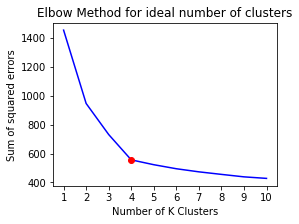

When K increases, the centroids are closer to the clusters centroids. The improvements will decline, at some point rapidly, creating the elbow shape. That point is the optimal value for K. In the image above, K=4


In [3]:
#########################begin code for Task 1-a
data = pd.read_csv('drug_users.csv')
list_i = []
y = data['CLASS']
data=data.drop(labels = 'CLASS', axis = 1)
min_max=MinMaxScaler()
min_max.fit(data)
trans_data= min_max.transform(data)
for k in range(1,11):
    list_i.append((KMeans(n_clusters = k).fit(trans_data)).inertia_)
plt.figure(figsize = (4,3))
plt.plot(range(1,11),list_i,c="b")
plt.plot(4,list_i[3],'ro')
plt.xticks(range(1,11))
plt.title('Elbow Method for ideal number of clusters')
plt.xlabel("Number of K Clusters")
plt.ylabel("Sum of squared errors")
plt.show()
print("When K increases, the centroids are closer to the clusters centroids. The improvements will decline, at some point rapidly, creating the elbow shape. That point is the optimal value for K. In the image above, K=4")
#########################end code for Task 1-a

### Task 1-b: Visualization for K-Means Clustering

#In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [4]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
# Training and testing dataset for further task 1 and 2
###################end code for Task 1-b-1

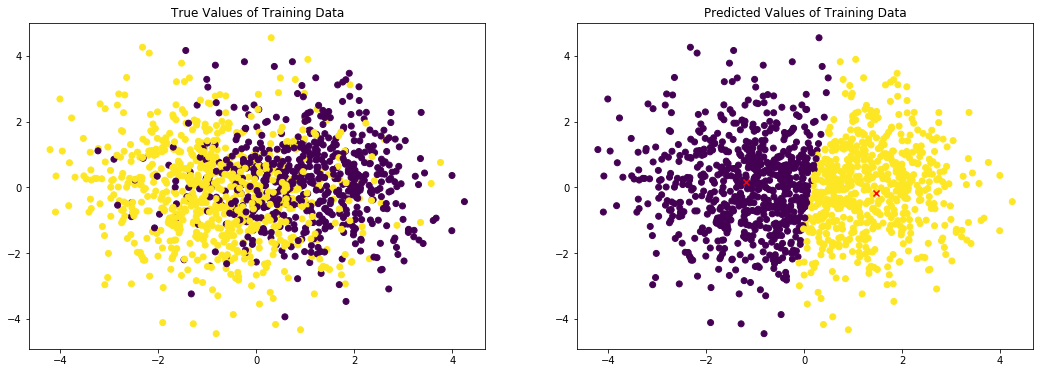

In [5]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

pca_d = PCA(n_components = 2)
X_train_pca_d = pca_d.fit_transform(X_train)
X_test_pca_d = pca_d.fit_transform(X_test)


# KMeans model creation
km_model = KMeans(n_clusters = 2)
km_model.fit(X_test_pca_d)

# Compute cluster center and predict cluster index for each data in sample data set
train_predict = km_model.predict(X_train_pca_d)
cluster_center = km_model.cluster_centers_
# Model and fit the data to the PCA model


# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
#true values plot
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.scatter(X_train_pca_d[:,0],X_train_pca_d[:,1],c = y_train)                                                
plt.title('True Values of Training Data')

#trained values plot
plt.subplot(1,2,2)
plt.scatter(X_train_pca_d[:,0],X_train_pca_d[:,1],c = train_predict)
plt.scatter(cluster_center[0][0],clustedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABBQAAAF1CAYAAABYj7nEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xd4FOX2wPHv2b6bQkIXkaIoNhAR7L2DyhUrqHAtyNXrz94Ru4hi4dp7Q8WKomBX7ArSLKAgoEjvJKRs3/f3x0wgZQPZkM2S5Hyex0czOzPvmUnceee8TYwxKKWUUkoppZRSSqXCkekAlFJKKaWUUkop1fBoQkEppZRSSimllFIp04SCUkoppZRSSimlUqYJBaWUUkoppZRSSqVMEwpKKaWUUkoppZRKmSYUlFJKKaWUUkoplTJNKChVT0RkiYgcnuk4yojIISIyX0SKReTENJfltctpV5f7KqWUUtsiEekkIkZEXPbPH4nIv+uh3NtE5JWGdu7aEBG/iEwQkUIReaseyntWRIbV9b5KNXSaUFANhv2SWfZPQkSC5X4+O81l3ywik5JsbyMiURHZNZ3lp8ldwGhjTLYxZmLZRhFxbuFen5lqQcaYsF3OsrrcN1Uico/9+yqy/5kjIg+JSOsUzjFZRM6p69iUUkrVLxFZWO75tlJEXhCR7HSUZYzpY4x5qYYxHV3X5YvI9iISE5Gdknz2rojcX9dl1oPTgDZAC2PM6eU/EJEny9VbIvazv+znj2pTmDFmiDHm7rreNxUi0sVOVJVdywo7qXJUCucYIiJf1XVsqunShIJqMOyXzGxjTDawCDip3LZXK+9f1ipQR8YAh4pIh0rbBwIzjDFz6rCs+tIRmF15ozEmXuleLwP6lNv2RuVj6vhep9tLxpgcoAVwOtAJmCYirTIalVJKqUw4yX7W9QR6A8Mr7yCWBl1nNsYsBb4ABpXfLiLNgb7AFpMd26COwJ/GmFjlD4wxF5Wrx9wNvFGuHtOn8v4NrB5DuWvbG5gEvK+NHSpTGvSXo1LlichdIvKGiLwmIkXAOSLyiojcVm6fo0VkYbmf29uZ+dUi8reIXJLs3MaYf4BvgMpf1oOxH8IisrOIfCkia0VkjYi8LCLNqom11nGJyP4iMkNENtgtKvdt5p5cJNawhrUiMl5EtrO3LwQ6AB/ZGW5ndeeo5rz3iMhY+34XAQNE5CARmWJ3PVwmIqNlU1dPn51Rb2///LqI/E9EPrF7CnwvIh1T3df+/AQRmSciBfZ+NepBYIyJGGN+w2rhKAEut8/XSqyuqatFZJ2IvFfuvj2AVeF81r5vD9jbnxBrSMsGEflJRPZP5X4qpZTKLPuF+yNgTwAR+UpERojI90ApsKOINBOR50RkuYgstesdTnt/p4jcbz///wJOKH9++3xDyv18oYj8YT/XfheRniLyMtazeYL9jLnO3nd/EfnBfs79IuWGT4pIZxH52j7PZ0DLzVzmS1RKKAADgNn28xCxeu0ttp9n00XkkGQnEpHDRWRJpW0be1eIiENEbhCRBXYd5E2xkhdlz/lX7O0FIjJVRNpUU85u9r0rEJHZItLP3n47cAtwpn2vLtjMdSc7b1lL/3kisgj41I75bbFa/Qvscncrd8zGupvY9TYRuc6uLywTkcG13LeViHxQrg5xt9SwB4ExZrkxZjRwJzBKRMQ+53AR+cv+uyh/37oBjwKH2Pdtjb29n4j8bO+/SERuTuV+qqZNEwqqsekPjAWaAVVa0suzKwETganA9sAxwLVSfbexl7ASCGXH7wHsAbxetglrGMF2wO7AjkDKX8g1iOsR4D5jTC7QBXi7mvMcC9yB9cK8PVZPg1cBjDGdqNjzIJ5qnMCpWPekGTAOiAL/BzQHDgFOAoZUezScBdxo778cuD3VfUWkLdbv+UqglX1N+6RyEcaYKDDBjhms78UnsSp1ne1to+19r8b6vQyx79vV9uc/At2wej28B7wlIu5U4lBKKZU5IrIDVkv9zHKbBwFDgRzgH6xnXgzr2bs3cCybnnMXAifa23thPXurK+t04DasOkUu0A9Ya4wZRMUemKNEZHvgA6z6RXPgGmCcbOpVNxaYjpVIuBPY3DwN7wItReTgStc4ptzPU4EedlljsZ5nvs2cszqXAScDhwHtgPXAY/Zn/8aqO+yA9dy8CAhWPoH9HJ0AfAq0Bi4FXhWRrsaYW6nY8+C5WsQIcCiwK5sSQBOBnYG2wCzg5c0c2x7w29d3EfCEiOTWYt8ngAKs4Rvns/nfYXXewap/drF//hM4COs+jwDGikgbO3H0f8C39n0rS0AVYzWaNcOqv10uaZ5fSzUemlBQjc13xpgJxpiEMabKw6mS/YFcY8zddmv1fOA5rGx9MuOA9iKyr/3zYGCiMWYdgDHmT2PMF/a5VmG9hB5Wi2vYUlxRYGcRaWGMKTLGTKnmPGcDzxpjfjbGhIAbgMPEbvmvA18bYz4su9fGmJ+MMVPtIRMLgGfZ/PW/aYyZYb/Qj8WqwKS6bz9gqjFmov3Z/ViVllQtw6o8YYxZaYx5z76mQmDkFq4DY8wYY8x6O4a7sSpIO9YiDqWUUvVrvIgUAN8BX2N9h5d50Rgz2+5S3xzoA1xhjCkp95wvezafAfzPGLPYrheM3EyZQ4BR9jPTGGPm2z0hkzkH+LDc8/YzYBrQV6xhmL2Bm+35h77BegFPyq4XvYXdOCIiO2Ml4ceW2+cVY8xaY0zMGPMA4AW6buZaqvMf4CZjzBJjTBgrgXKaWD0Xo1jPyS52nWG6MWZDknPsD2QD99j1oUlYL/wDaxFPdW41xpTaz/yEMeZFu24VsmPeR0Syqjk2BNxljIkaY94HwsAuqexrJ01OBm6xY9hSEqM6ZfNOldVl3rR7LySMMWOBhViJrqSMMZOMMbPs/X/BaiyrTR1WNUGaUFCNzeIU9u0IdLC7tRXYFYrrsLLSVRhjirGSCoPFGkt5FuXGHIpIW7tL31IR2QC8yOa7HtY2rvOwekDMtbvG9a3mPO2wWlTK4t+A9bK9fS1iSqbCvRaR3cUaKrDSvv5b2Pz1ryj336VYlYZU921XPg5jTAJYWoPYK9seWAcgIjki8rzd5W8DVsvIZn+PInKjiMwVkUKse+zb0jFKKaW2CScbY/KMMR2NMf+t1BhR/jnXEXADy8s9m5/CajmHSs8jyj1/k9gBWFDD+DoCp1eqExyM1RrdDlhvjCmpYblg1VvOsHsdDAI+tpMjAIjI1WINxSi0y2pG7esy75aL+Q8gjtUK/zLwCfC63f1/VDW9+toBi+1ne/nrq6t6DJT7nYk1bGWUPVRgAzDf/qi6619TqYfn5uoy1e3bBnBS8W8nlbpsmbJ7UlaXOVes4TFl939XNvN7FJED7CEeq+26zJDN7a9UeZpQUI2NqfRzCRAo93P5ZMFiYJ5dkSj7J8cYc9Jmzv8SVmvEcVgvjeVnCr4XK+PczR6OcC7WMIhkah2XMWauMWYAViXmAayuj8m6Iy7DeqAD1osykE/tXriTqXyvnwFmADvZ138H1V9/XVmO1Y0QsMZskmJFw24tORH41t50g33O3vZ1HEvF6zCVjj8GqxtmfyAPq3UgSPqvXSmlVHqV/75fjPWMb1nu2ZxrjNnD/nw5VqKgTOVJnMtbDFRZbSFJmWX7vlypTpBljLnHLjO/Ugv65srFGPMtsBb4F1bvh43DHcSaL+F6rN4W+caYPKCQ5M+zCvUYe7hm+cmNF2MNqywft88Ys9Rupb/dGLM7cCDWM3gwVS0DdpCKE2J2oO7qMRhjyt/vwVjDXo7ESqSUDR9I5/N8JZCgXF2Gin9HNdUfq/FlvojsiDWM4mKsFTDygDlsuo7Kf2Ng9UgYB+xgjGmG1ctU6zGqRjShoBq7n4ETRCRfrIn1Liv32Y9AxM7G++zMdDcR2dwY/C+xHqJPAGPtLu5lcuzPCu2xmNekIy4RGSQiLe2MfSHWgyFRpQR4DbhARLqLiBer++W3xpglSfatCzlAoTGm2J5f4sI0lVPe+8B+ItLXTgxchZU02SIRcdtxvokV+8P2RzlYLQcFItKSqjN+r6TicIYcrO6bqwEPViKlNuNNlVJKbaOMMcuxeqw9ICK5Yk3gt5OIlHULfxO4TKxJlfOxktPVeRa4RkT2EUsX2TTZcOVnzCvASSJynF0f8Ik1IWJ7e5jENOB2EfHYcyNsrlGkzBisRpA8Kg6RyMGaI2I14BKRW7DmeEjmT8An1sTIbqxnpbfc508CI2TThMutRORf9n8fYddrnMAGrGdosrmcpmDVq66zn9mH29f3epJ960IOVtJoLVayZESaytnIrkeOx/od+u16SY1XaxBr+fLLsO7/9XaCJBurbrja2kWGYPVQKLMSawhv+V4hOcA6Y0xIrImlqxv+q1QVmlBQjd2LWN3s/gE+ptxDyB4T2RfYF2ts2Rqs7ovVPTzLMtkvY7X8j6n08a32uQqxXnTHpSmuvsAfYq2ucD9wpjEmkiTWj7Febt/FasXogDWvQrpcCQwRkWKsiZc2OylmXbAreAOxkgFrsDL8v2FVCKrzb/veFWDdm6VYvRHKunzej9XNby3WmNoPKx0/GmvYy3oRGYVVGfsGq/vqX3Ycq7f+6pRSSm1jBmMljn/HGt72NtbQA7B66X0C/ILVW++d6k5ijHkLe6I8oAjrhbK5/fFIYLjdVf0aY8xirN4Ew7CeLYuBa9lUhz8L2A+rq/utVK2bJDMGq07whj2/QZlPsHpe/olVPwlRTfd7e46h/2IlR5ZivfiXb7B4CKsu9Kn9zJ1sxwlWr8y3sZIJf2DNXfFKkjIiWHMl9cF6tj4ODDbpW6r7BaxeEcuwltX+IU3lVHYx1pwSK+0YXmPz9RjEWqGhGPgVq9fsKcaYMQDGmF+x6kU/YdX/dsVKzpT5DJgHrBSRsiGlFwMj7d/VMKwEmVI1IhV7+iilVMNl91JYgTVD9o+ZjkcppZRSKhViLUmdZ4xJaSlMpTJFeygopRo0Eekj1trgPqzWmVKsJbSUUkoppbZpYk1q3c0e/rI/1uTb72Y6LqVqypXpAJRSaisdCryK9X02C+ifbAiIUkoppdQ2KBerHrMd1rCHe4wxEzMbklI1p0MelFJKKaWUUkoplTId8qCUUkoppZRSSqmUaUJBKaWUUkoppZRSKcvIHAotW7Y0nTp1ykTRSiml1DZr+vTpa4wxrTIdR1Oh9RGllFKqqlTqIxlJKHTq1Ilp06ZlomillFJqmyUi/2Q6hqZE6yNKKaVUVanUR3TIg1JKKaWUUkoppVKmCQWllFJKKaWUUkqlTBMKSimllFJKKaWUSpkmFJRSSimllFJKKZUyTSgopZRSSimllFIqZZpQUEoppZRSSimlVMo0oaCUUkoppZRSSqmUaUJBKaWUUkoppZRSKdOEglJKKaWUUkoppVLmynQASqmGxYS/x5S+DIkC8B6DBAYgjqxMh6WUUkqpJiKRSPDNWz/y4XNfkIglOHrQYRwz6FCcLmemQ1OqydGEglKqxhLFT0Hx40DQ2hD9HRN8G1q+g4g/o7EppZRSqmm4//zH+XbcZEIlYQDmTp3P1298z4gPh+FwaAdspeqT/h+nlKoRkyiA4kfZmEwAIATxpZjScZkKSymllFJNyIJfFvLN2z9uTCYAhErCzPp+LjO/+C2DkSnVNGlCQSlVM9GfQdxJPghBeFK9h6OUUkqppueXr2aTiJsq20MlIU0oKJUBmlBQStWM5AOJJB84wNGyvqNRSimlVBOU0zwbl7vqXAken5tmrXIzEJFSTZsmFJRSNePuDo4WVP3a8CJZ52QiIqWUUko1MQf33xdxSJXt4nBw5FmHZCAipZo2TSgopWpERJD8F8DZEcQPkm39O3c44u6e6fCUUkop1QT4s/3c88nN5Ldphj/HRyDXT3Z+Fre9cy0ttsvPdHhKNTm6yoNSqsbE1QFafgyxOWCKwb2nru6glFJKqXq1234789qSp5g3/S/isQRde++Ey62vNUplgv6fp5RKiYiAe7dMh6GUUkqpJszpdLLrvjtnOgylmjwd8qBSZuJrMZFpmPiqTIeilFJKqSZq1aLVzPruD4rWF2c6FKWUarK0h4KqMWNimA23QPB9EC+YMMZ3NNJsFCKeTIenlFJKqSYgWBzkzjMe5JevZuP2uomGo5x8aR+G3HOO1YtOKaVUvdEeCqrGTMlTEJwIRMAUWf8OTcIUPZDp0JRSSinVRDx44ZP8/OVsIqEoJYWlREJR3nvsEz5+flKmQ1NKqSZHEwqq5kpeBkKVNoYg+DrGmExEVCOJRGKbjk8ppZRSNRMsDvL9+J+IhqMVtodLw7z1wIQMRVUziUQi0yEopVSd04SCqjlTVM32EBCv11BqYu60BfzffjdwvHsA/XIH8fiVLxCpVAFRSimlVMNRWhSCaoY1FK2rpp6SYT99NJNzd72M41xnckrL83j93vGaXFBKNRqaUFA15+6RfLurKyLb1nQcyxas4Jojb2Pu1AUYYwiVhPng6c8YedZDmQ5NKaWUUrXUvG0ezVrkVNnucAg9juyWgYg275evZ3PH6fez9M/lABStK+aVO9/mpVveyHBkSilVNzShoGpMcm8CCQBOe4sT8CO5twFgTBAT/ABT8gomNj9DUVrefnAC0VDF3giRYJSfPprBqkWrMxSVUkoppbaGiHDFk0PxBjyIw+qp4HI7CeQGOP+ugQAUrS/mkxe/ZOJTn2X8mf/SrW8SLo1U2BYuDTPufx8QCUWqOUoppRqObatZWW3TxL07tHgfU/IMRGeBexck60LE1QUTnYVZdy4QBxODIsH4T0By787IjMsLfl5IPFZ1GIbb62bJvBW07tCq3mNSSiml1Nbb74R9GP3Nnbx533ssnbecbofuzmlXnUSr9i34ccI0RgwYjTgEYwxPXGkYdOvpDLi+f0ZiXTJ3abWfFawq1PqIUqrB04SCSom4OiDN7qywzZgEZv1FYDZU3Dn4IXgPBV+feozQskuvnfhz2gJi0YpJhWg4yg5d29V7PEoppZSqOzv33JGbXruywraSwhJGDBxNOFix5f+VO9+m17E96LJ35/oMEYCOe+zA+pWFVbaLQ8hrk1fv8SilVF2rsyEPIuIUkZkiMrGuzqkaiNgsMCVJPghiSjMzRvDUK0/E7XNX2Ob1ezio/360at8iIzEppZRKP62PNF1TPpiBw1m1ahsNRfn8lW8yEBGce8cAvAFPhW2+gJcB1/0Lj9ddzVFKKdVw1OUcCpcDf9Th+VRDYWJANcMaTGbGB7bt1Jr/fXsX3Q/bHafbSU7zbE696kSue/GSjMSjlFKq3mh9pImKReMkWyXaGEM0kplVnvY4sCt3vn8DO/XohNPlpEW7fC6452zOuunUjMSjlFJ1rU6GPIhIe+AEYARwVV2cUzUg7m4kz035Ef/J9R3NRjt278gDX96esfKVUkrVL62PNG29++xNIsn8Sd6Al0NPOyADEVn2PrIbT864L2PlK6VUOtVVD4X/AdcBuqhuEyTiRvIeBHyA3a1PAuDuDv7MTIKkmhZjDCa+HJNYl+lQlFKZpfWRJiy/dTP+c/9gPH4PTpcTBHxZXo4YeDDdD9090+GpJsCYOCa2BJMoynQoStWbre6hICInAquMMdNF5PDN7DcUGArQoUOHrS1WbWPEeyi0+hQTHA+JtYj3IPAcioiuTKrSy0SmYgqug8QawGDceyF5DyLONpkOTSlVj7Q+ogD6/fd4ehzZjUljvyUcjHBw//3Y/YBdMrLilGpaEsEPYcPtYEJAHOM9Amk2EnFkZzo0pdJKTLLBZqmcQGQkMAiIYTVR5wLvGGPOqe6YXr16mWnTpm1VuUopZeLLMGv6gAmW2+oE5w5Iy0+0AqkaHBGZbozplek4GiKtjyilMsVEZtjLp4fKbfWA5wAczZ/JUFRK1V4q9ZGt7qFgjLkRuNEu+HDgms09vJVSdW/h7MW8/cD7/PPHUvY4cBdOvfKkBrWaxazv/mDsyHdZvmAlexzUlbOGnUK7ndpu8ThT+ro9KWh5cUishug08PROT8BKqW2O1keUyrxZ38/hnf99wJql69i3Tw/+9X99yMlvOC30JvQ5puR5SKwH72FI1oWIc8v1KVPyNBWTCQARiEzGxFcgzi3XaZRqqOpkUkalthUm9g/E/gBne3Dt0SRaqH/+chbDT7qHaDhKIp5g/sy/+Pj5L3l0ykja79Iu0+Ft0Tdv/8iocx8lXGqtCLJswQq+HTeZR6eMZIeu22/+4PgioJqZu+Mr6jZQpZRSqoYW/LKQpfOW07lbhy0/yxqJj57/gscue4FIMIwxsODnv/nw2S94cuZ95DbPyXR4W5QofhJKntjU67F0ESY0AVpOQBzNN39wfEny7eKGxCrQhIJqxOp0gLsx5itjzIl1eU6lasKYGIn1V2DWnIgpHIZZdzZm7amYREGmQ0srYwyjhz5FuDRMIm7NQRaLxCktCvLMDa9kOLotSyQSPHrZ8xuTCQCJeIJgUYjnh7225RO49wX8VbebGLj3rLtAlVINitZHVKaUbCjlioOHc/lBw3lgyBNc1PM6bu53T8aWrawvkVCEx694kXBpeOPSnZFQlIJVhbwzemJmg6sBkyiC4scqDaGMQqIQU/Lylk/g3pek7bQmBs4d6ypMpbZJOmOeahRMyXMQngSEwRRbD4TYXEzhsIzEs3D2Yn76aCbrVqxPazklhaWsWrS6ynaTMPzy5ey0ll0X1q8spKSgpMp2Ywy/ffv7Fo8X/8ngbA64y231ge8YxNW57gJVSimlauCRS57lz+kLCJeGKd0QJBKMMOOL33jlzrfrPRZjDHOnzmfqJz9TnORZW5f+/m0RDkfVXqHRcIwfJ0xPa9l1IjYHxJPkgwiEv9vi4ZJ9obXCWflXK/FD9lCdlFE1ejrkQTUOpWOpOnYtCuGvMSaISJJW7DTYsK6I4SeM5K/f/sHldhEJRekz5Ej+7+EL0jL8wuP3IA4HUHXd7ey8rDovL5l4PE4kFMUX8KZ8jVnNAlQ3L2xem7wtHi+OALR4B1P8OIQ+tR7egbOQwNkpxaGUUkptrXgszjdv/0g0XHFun0gwwgdPf855dw6st1iW/7WSG467k3UrC3E4HMQiUc4bMZDTrjwpLeXltsghFq1aFwHIb9MsLWVWFovGiEXj+ALe1A92tASTrBeJ1Gi4gji3gxbvYoofgciP4GiBZA0B3wmpx6JUA6M9FFTjUKGLWuXPwvUWxr2DH2HejL8Il0YoKSwlGo7yyQtf8dGzX6SlPI/XzWFnHojH566w3Rvw0v/yvmkps0w8Fufp617m5Lx/c3L+vxm04yVMnphaK4Qv4OXwAVXj9wW8DLj+5BqdQxz5OHJvwtH6axytPsaRNRgRZ0pxKKWUUlsrHosTjyWSfhYurb+6iDGGG/vcxfK/VxEqDlG6oZRIKMqLN7/BL1+lp/fidju2YcduHXC6Kr5a+AJeTr0yvaOPSouC3Dv4EfrlDOJfzQYztMc1zPlpXkrnEFdncHelalurF8k6v4bn2AFH3igcrb/F0XI84j+xSczlpZQmFFTj4D0cSPIS6eyAOLbc0l0XitYXM+Pz36pk6MOlYd556IO0lXvZY0PY64g98fg8ZDUL4Pa5OWbQofS/LL0JhUcvfY73H/+YUEmYRCzByn9Wc9eAB5n1/ZyUznP54xdywEm9cHvdBHL9eP0ezrzhZI46+5A0Ra6UUkrVPY/PQ5e9qw63cziEXsf2qLc45s/8m7XL1mMSFbsAhkvDjH/0o7SVe/v469ixe0e8AS9ZzQJ4fB7OufV0eh+/d9rKBLil3z18/dYPRCMxEvEEf//6D9cefQcrFq5K6TyS/xS49wa8IFkgOZB7B+JJb/xKNXQ65EE1CpJzFSbyLSRKsIY+uEHcSLO76y2GYHEIhzN5ji6dYxf9WT7u/mAYKxauYuXC1XTYvT35rdPbvbBkQymfvPQV0VDF7oHh0giv3vU2Iz8aXuNzef1ehr9xFQWrC1mzdB3b77wd/ixfXYeslFJKpd2VT/2Hqw6/lVg4SjQSw+Nz483yMvT+QfUWQ3FBSbX1kcLVG9JWbvO2+Tw+bRT//LGEgpWFdOnZmazcQNrKA/jn98XMmTq/yjCTWDjG+Ec/4qL7/13jc4mjOdLiVUx8BSQKwLUjknReBaVUeZpQUI2CONtCy48xpW9CdIb1EAichTjrb6mmVu1bkNs8mzVL11XY7nQ52bdvz7SX37ZTa9p2ap32cgDWLluPy+2sklAAWDx3Wa3OmdeqGXmt6mecpVJKKZUOXfbuzPO/j+b9Jz7h798Wsdt+O3PC0GNo1jK33mLo2rsL8STzGXj9Hg4+Zb+0l99xt/Z03K192ssBWDp/BU63C4hU2B6Lxlj426JanVOcbXWZR6VSoAkF1WiIo5k1y26myhfhqmcv5vZT7ycajpKIJ/D43ARyAwy+9fSMxZUOrTu0JBGvOpuiiLBzT10eSSmlVNPVcvsWnH/XWRkrP5DjZ+j9g3n62jFEghGMAW/AQ5uOrekz5KiMxZUOnbt1IBau2rjh9rrZ7YBdMhCRUk2PJhSUqkO9j+vBYz+N5J2HPmDpvBX0OGIP+v33eHJb5GQ6tDrlC3g549p+vHnf+xUmmvL6PY0ueaKUUko1NP0uPo4uPTox/tGPKVhVyAH9enH8+Uc2uiGF23VuwwH9ejN5wjTCQauXgjgEX5aXfv89PsPRKdU0iKluzbY06tWrl5k2bVq9l6uUqjvGGD545nPeuHc8BasK6dq7CxeOGkTXXjtlOrRt1rIFKyhYvYEdu3es3bJWqtETkenGmF6ZjqOp0PqIUg1fLBrjtXveZeITnxIsDtHzmO4MHTWIdjvpsIVkjDEQmw8EwbUbIu4tHqOanlTqI5pQUEqpNFu/soBbTh7F37/+g9PtJBFPcOG952jriapCEwr1S+sjSqmmxMQWYNZfBPFVIE7AgTS7D/EdkenQ1DYmlfqILhuplFJpdsvJo5g3/S/CwQilG4KESsI8fd0rzJz0W6ZDU0oppVQTYEwMs24QxBcBQTDFYDZgCi7HxGo3gaVSoAkFpZRKq6Xzl/P3r/8Qj1WccTtcGmbc6IkZikriNs2/AAAgAElEQVQppZRSTUrkBzBBoHLv9Bgm+GYmIlKNhCYUmihjqi4npJSqe4WrN+D0JJ//du2y9fUcjVJKbVvica2PKFUvEmupmkwAiEF8ZX1HoxoRXeWhiUkEP4PikRBfgpFmkPUfJOsCRCTToaWdSWzABN+H+D+Iey/wHYuIJ9NhNUomvhITfBviSxDP/uDrk7F7XVxQwnuPfcSUD2bQfLt8Trn8BLofunu9ld+5e8ek64G7vW72O6FnvcWhlFLbCmMME574hJfveJuCVYW0bN+CIfeczVFnHZLp0OrFmmXr+OKVb1i/soC9j+pO7+N74HBoG186LJ67lE9e+JIN64o54KRe7Nt3b5xOZ0ZiMfEVmJIXIDIDXJ2QrCGIu2v9BeDeB5I2KAYQ72H1F4dqdHRSxibEhL/HrL8YCG3aKH7IGooj+5KMxVUfTHQeZt1AMFEgCBIARxukxZuIo1lK50okEqxevJZArp+c/Oz0BNyAmchUzPoLwcSAiH2vt0NavIU4ana/rO+lBCJb99AvWl/MRT2vpWBlIZGQtU61N+DlogcGc+J/jt2qc6di/KMf8ewNr25cYtPtdZPbMoenf76/0S0pqraOTspYv7Q+khnvPfYRz1z/asVlhwMern/pUg45df8MRpZ+Mz7/lVtOHkUiniAajuLL9tG1106M/Pgm3J7UZtuPRWOsXrKWvFa5+LP9aYq44fpi7LeMvvBJYtE48VgcX7aX3Q/oyt0fDMPpqln9oq7qIya2CLP2FHvIQRSrk7gHyX8c8R68VedORaLwNgi+CwTtLT5w7WjVh7WRTZWjkzKqpEzxaCokE8D6Yit5FmOiGYmpvpjCa8FsYOMXqCm1emkUPZzSeX6cMI0B7f/DBbtfwZntLuTmfvdQXFBS9wE3UMYYTME11v0lYm8shfhiTMmzNTg+RmLDA5hVPTErdyexui8mPKXW8Yx/5KMKyQSw5i546poxhMpVZNOhpLCEl257gwv2vJIvXv2W/pf1pXefHuzUoxOnX32SJhOUUk2SMYaXb3+rQjIBIFwa4YXhr2UoqvoRj8W5a8BowqVhomHruRQqDjHnp/l8/PyXKZ3r/cc/5rTWFzC0+9Wc1voCRg99kmikcdflUhEsDjJ66FOEg5GNcxiFisP8/sNcvn7zhy0ebxIlJAqHYVZ2s+ojawdgon/WOh5TdL81CSJlv6MEEMIU3ky6G3dNfCWJwjtIrD4eYgsgMBjc+4KrG2RfgbR4XZMJaqtoQqEpif2TfLuJQaKwfmOpRyZRCLFkD4EohD+q8Xnm//w3IwaOZv2KAsLBCNFwjGmf/sKtJ4+qu2AbuvhiSCSbFyACoQ+2eLjZcBuUvgSmBDAQn49ZfyEm+nutwpk8YVqFZEIZh9PBgp8X1uqcNREqDXPJvjfyxr3vsej3JcyZMo/xj3zIdp3b8OSM+zjvroGaTFBKNUnRcJSidcVJP1uxcHU9R1O/5s34K+kQuHBpmM9f+brG5/nu3Sk8fd0rlBSWEioJEwlF+eLVb3nssufrMtwGbdZ3c3C6qr7mhErCTHrtuy0eb9YPheD7WI0jBqIzMOsGYOKrahdQZDJWEqGSxCow6ZtPycRXYtb0g+DrEP8LolOgdAz4jsfRchyO7PMR8aWtfNU0aEKhKXHtlHy7eMCRV7+xbCUTnU1i/aUkVvclUXgDJraw4uehSSTW9Cexcj/M+ktJPgkNQM27sL39wIQqL6exSIy5U+ezZN7y1C6gsRIP1d5r8W72UJMohOB4qvSiIYwpfrxW4eS1Sf53HY/FadYyPS/0f/36D/ef9xirFq3e2AIFViXm4+cnsWpR464wK6XU5ri9bpq1Tj7UcPsubes5mq034/NfubHPXVzY7SqevPol1q3Y9HJojOGj577g/N2v4LQ2F/Diza8Tjyd5qQRc7ppPa/bqiHFVe3gEI3w25pu0975rKDy+6lvcfVlbqI9E/4Dob2zsabnxgwim9PXaBeTIreYDsYaG1jFjDCYyDVNwpd1DN1bu0yAU348xletbStWOJhSaEMm5GqichfRD9n8RaTjzc5rw95i1AyH8KcTnQ3A8Zu3JmOgcABKl72AKroDYbCvrGy3LClf+c/eC/5Qal7tswUpMourLssvjYs2StbW/oEZEnG3B1YWq99oP/oGbPzi+1E5IVGYgNq9W8Zx6xQl4AxUrDg6ngw67taf9Lu1qdc7qJBIJRg56mMsOHMY34yYTDceq7ONyu/hjcu2uRSmlGgMR4by7BuANVPy+9/o9DLnn7AxFVTsTn/6MW04exbRPfmHh7MW899jHDN3rGtYut5IKz974Ko9f/gKL5yylcPUGZnz+K5FgpMp5fFleTrjw6BqXW12dQxxU2/ujqdnz4F1xJVlhyZflpe+QLdzr+EJIOmdCBGJ/1C6gwHlA5XkuPOA7rs57CBgTwqw7C7N+CESnAckmYhSI/VWn5aqmSxMKTYh4eiP5T4BrV8ANju0gdxgSOD/ToaXEbLgNqxW77OU+AaYUU3QPxiSg6F6qtnIbwAWSBXisbLC7G5J9cY3L7XHEHri9VR9O0XCUHbt3rM2lNEqS9zA4Wtv32g/4wHs4Ehiw+QOdO9iTZlbmAPdutYql59HdrYqr30NWswDegIfO3Tpwx3vX1+p8mzNp7Hf8MP4nwqWRpIknsFoMmm+XX+dlK6VUQ9Ln/KO48qmLaNu5NU63kx123Z6bXr+S/U7YJ9Oh1VgkFOHpa8ZU6CkQi8QoKSzhzfveo2h9MeMf/rBCjwFjwOEU3F4X/hwfHp8br9/DQf334/ABB9W47N3234Vki3N5/R6at21YPU7TxelyMmLijWTlBQjk+PFlefH43Jx8aR96Ht19Cwd3qWY1BC+4u9UqHgkMhMBp1jkkx/q3Z18k945anW9zTPFjEJ1lz2dV3U4xcLSo87JV09RwmqVVnRDvQYj3/UyHUWsmYU2mmFR0pjV+31Q3SaIXaTbKagl37wHuniktl9n/sr58+MznFMdLiMesLou+LC8nXXycjocvR1w7QKtJEPnBWtfY3QNx77zl4xw5mMAAKH2DigkhL5L131rHc+oVJ9LngqOYP/NvmrXMoePuO9T6XOVFwlG+GzeZ3779g+12asN370whVFJ9V1OH00FeKxe77XYPibUggf7gO2mrZ45WSqmG6KizD+GosxvuMpGL5ixNWoeIReJM++RnDjl1f9xed5WhkvFYgo577MCZ153MhjVF7HX47nTullqjxHl3DWTmF7MIl4Y3TujnDXi5cNSgGq9e0BTsuu/OvLnsGaZ8OJOSwlJ6HrUnrTu02uJx4t4Z4+kNkZ+Asue6gHi33DhS3TnFgeTejMm+BGLzrdWvXHVTHzGJYmtZ9NgccO0GpePKxZ2MG5ztMQVXYiTbSnZ4D28SS8ir9NCEgmpYxAu4Sdp9S/LAkUO1HW9c7RDfUbUuOr9NHk/MuI8xt7/J1I9/Jrd5NqdddRLHDNa1eysTcYH30NSPy7kR42gFpS9AYgO490BybkLcu7B6yVqeuPIFpnwwA6fLyREDD2bofYPIyt3y2MNAjp/uh+5em0tJqqSwhEsPuInVS9YSKg7h8bmJRaoOcSjj9rrouKtwyzO/4ogVAWAKf4bQJ5D3uD7ElVKqgclrlUu0mu/9Fu2a07pDywrz6JQREXbo2o4jB9Z+qcDOe3bgkcl389Itb/DHlD9p3aEVZw8/lf369qz1ORsrj8/DIafsl/Jxkv84puhBCL4NJgyeA5Dc4YijOSb6J6boLohMt3q8Bs5Csv8PkS0v+ymO5uDZtzaXkpSJLcGsPc1ejjKI1TN0c3MjeKzhpfElEF9gnSMyBQLnILnX1llcqmnRhIJqUEScGP9p1hd8hS9MP2Sdj4gHEzgLSsdW+VyyL9nq8lu1b8HVz1zM2uXrmfH5r/izfURCEbz+zU/wo2pGxIFkD4XsoRW2B0tC/N9+N1KwqpBEPAFE+fSlr/hz+gIen3pvvb+QvzriHVb8tXJjZXJjC5RQZU7KrLwAj/14Pts1u5SKf5NBiPxojW/09AaseRi+HTeFT1+0lg879twjOOTU/XA4dHSaUkptS1pu34I9DurKrO/mVEgoewNeTr/6JFrv0JK9jtiTnyfNqpBY8Pg9nHHtv7a6/E577MCt465h6fzlzP5+Lg6HEI/FtYdCHRHxIrk3Qu6NFbab+FLMujM39YY1hVDyAia+CMkbXe9xmg23gylg0woSQazKSJIKiXMnCAyColFU7MEQhNIxmKxB1lxYgDERTOm71mpokoMEBiLeA9N9OaqB0oSCanAk9waMKbRad8VjjbsPDEACg63Pc67BkICymXjFA9lXIb7j66T81+99lzG3vYXL7bReZAVGfDCMPQ/atU7Or6r68rXvKd1QaicTLLFIjCV/LufXb35nr8P2qNd4vn7zh6QtUyKCx+8hXBrG7XXjcDq45a1raLf9ZExxkpYsE8SEf0Q8vTHGMPLsh5g8cfrGoRO/fvM734+fwrBXr0j3JSmllErRLW9dzR2nP8DvP8zF5XGRiCe4YOTZ9D5+bwBufuNKHhz6FN+/OwURIbdFDpc/MZRd9qlm1a0UJBIJ/vefp/ni1W9wuJw4RPDn+Lj/y9tpv/N2W31+lZwpecnqsVBBCEKfYeLLEWc93/vId1RdjtJOJEjAmkdB/IAbyXsYU/IkkGRuBXFZQzz8/axkwrqzIDoPK0EBJvwNJvtCHNn/l75rUQ2WJhRUgyPiQfIewMSHQWIpODsh5ZbjEXEhucMwOVdDogAcLepsFYvfJ//JK3e+TTQcrdDiMPzEkby54lk83i13d1Opmz/zr6TzEyTiCf6ZvaTeEwruan7PLreTq565iD+nLyC/TR5Hn3MoLbbLx5TOwRqqUzmp4EXsJVvn/DS/QjIBrKUmf3hvGnOnzqdr7y7puRillFK1kpOfzX2f38qqxWtYv7KQjru3x1duZSF/tp+bxl5BsCRE6YYgzdvm1VmPukljv+PL17+ze8hZ9ZFgcYjb+o/i2Vn131LeZER/o+qzHGtIbuwvqO+EAi6Sr+LgRXLvwkR/BWcHxP8va64qRwusJdOTHFO2hHzoowrJBEsQip/E+AcgzpZ1fRGqgdN+tKrBEmcLxN29QjKhwufiRZxt6nRJzI+fn0QkWHVMpDGGmZ//WmflqIo679kh6brRTqeD9l3rdvnHmug75Ci8/opLnjkcQpe9O3PkwIO56P5/c+a1/6JF2YoOvuNIOiW3CPhPBKy1zCtP3gXWKiLTP9O/LaWU2la13qElXXvtVCGZUJ4/y0eL7fLrdHje+49/UiXRboxhxcJVLJm3vM7KUZW4diNpe6yJgDMDK375+mI1WJTnBv8JiP9EHLnDcGSdgzisycMlcEaS/QHxgcca0mBCX1AxmVC2jweiU+syetVIaEJBqRSESjbNqFyBgXCStaVV3Tjy7EPw+r04HJsqYy63k9YdW9HjiPrtnQBwyhUnsNcRe+INePH6PQRy/LTYvjnDxiYfmiCOXCT/WZB8azlNyQJphuQ9YU3QhNXSlWxZUrfXRU5+VlqvRymlVMMSDiafxd/hcFRYylLVLck613qxrsAL3oMRV/v6jyf3JnDtZA1vwGf929UFybkp+f6uLtBspLWfZFv/dmyH5L+0qQHO0Zzkr4gGJHkjnmradMiDUik49LT9+XHCNELFFWfQjUVj7H1U7dYmVluWlRvgkSl389BFTzNz0iwcDuHgU/fn0kcuyMiEhS63ixETb2TejL+Y89N8Wu/Qgl7H9djsZFji6QWtv4for4ABd/cKM0IfdsYBPHP9y1WPE+GwM3QiJKWUUpscceZBLPlzOZFKjRkev4dOe9bNcoSqKnF1gOYvYwpvg9gswAeB05GczKyQII5caPGeNf9BfAG4uoC792Z7wzj8J2B8R0P0F2t+BdeeFfaXwJmY4DtUWS1C/OBJfcUM1fhJ0tbWNOvVq5eZNm1avZer1NaKx+Pc2v8+fvlyNqGSEA6nA7fHxUUP/psT/3NspsPLOBOZjil+HOILwbUHkn0p4t65TstIJBL2gy8MiXXgaIlUaS1omGZ88Rt3nv4AiYQ1wZLD4eDmt66mpyarmgwRmW6M6ZXpOJoKrY+ohipYEuKKg4azbMEKQiVhXB4nTpeLW8ddQ+/jemQ6vIz74f2pvDnqPdatKKDn0d0466ZTab1D3Y79NyYOOKwVH0wROFoj0jhW2UiUjoMNd4A4sXom5CD5z9V5nU5tu1Kpj2hCoZExJgGRHzDhH8DRHPH3Q5ytMx1Wo5JIJPjpw5l8/+4U/Ll+jj/vSHbsnoFxc3XEJAogsQacOyBS++UvTWgSpuAKNmW0HYAXaTEWcac+LGHqxzN57sZXWTJvBW07teL8EWdx4L96Y0wcU3Q/lL4KCIgDsv6LZA2p9+Uj0yEaifL7D3+CwB4HdsXl1o5kTYkmFOqX1kfSJxaN8cN7U/ljyjza7diGIwYeTHaeDt+qS5FwlG/e+pHpn/9Kq/Yt6DvkKNp2arh1vnUr1lNSWEq7Lm1xOmv/Yv72gxN46ZY3CNlDP5wuJ4FcP0//cj8tt2+R0rmMMZjgeCh5DOKrwb0rknM94umJMUFM4c0Q+hhwWC34uTfjsOdGauhMohSiM61hmu7uiOhI+aZEEwpNlDFRzPqh1v/8phTwgDiRvMetiVYiUzCRydaYbf+JG8duq/QyiXWYoocg/CnggcAZSNaFGW9VNyaEKbwRQp9ZywUBZF+BI+vcWpzLYFYfAYllVT/07I+j+ZiUzjflg+ncecaDFeal8AY8XPv8JRzSZyqUPE/FCYP8kDscR+D0lGNXaluiCYX6pfWR9CgpLOHyg4azatEagsUhvAEvbo+LB7++nQ67tWfyxOn8OW0BbTu35vAzD8Sf7c90yE3C8r9W8tywsfw86Tey87M57aoTOWHoMRlPxhesLmTEgP8x+4e5OF0OPH4PVzz5Hw45JfXu9aHSMKe1vqDKPBIut5MTLzqWSx46P6XzJUqeh6KHqFjn8CHNX8aUPAvhr4Bwpc+eQzy9U45dqW1JKvURbfpqTILvQWQGm770ImDArL8cPHtBdDqYUgw+KH4Q8p9GPPtmMuJGyZgYRH6ExGqMaw8ouAjiK9m4zFDxU5jIDMh/GsKfY8KTQPKRwGnWZDn1FWfhzRD6HOvvxH5xLx6NcW6H+I5L8WQlkFiV/LPobynH9vR1r1SZ5DJcGuHp617mkMMmU3X24SCUPAHbeEIhEo6ycNYisvOyaLdT20yHo5RSafHynW+zbMEKomHruRcuDRMuDXP3WQ+BwMqFqwkWh/BleXn2hlcY/e1ddNh1+wxH3fiEg2GmfvwzoZIwHXdvz3XH3EFpYSmJhKFwTRFPXj2GJXOXcd6IgXz5+g/88tUs2nRqTd8hR9X58IDNGX7iSBb8vJBYNE40bE2Afe/gR9iuc2u67N05pXMt+mMJTlfVlvRYNM7ML1KrjxgTheJHqVrnCGGKRllzEFB5Qu4QpvhJpPm2nVAwiRKI/wWOVohT6yNq62hCoRExwfEkXeaFkDVZy8YMashONFwKrX9oNOO9tgUmthCz7hzrBRtjv6gbKq73G4LIVMzaM6wJdEwp4MSUjsXk3oEjcHL640wUW+sMV34QmqD1IEw1oSA+rK+TJGsz16InzNJqlrxatWgN/8xNMOHFdiz/x0uPg4voe/Y6snITEF+Tcjn16Yux3/Lwf58BA/FYnA67t+eO8del3P1SKaW2dV+/8cPGZEJ5//yxBKfLSSxifRYqsRIN9w5+hMd+uqe+w2zUZn0/h+EnjrR6ECYM4WBk43+XCZeGef+JT/hxwjTWrSggVBLG7XEx7sEJjPhgGN0P3T3tcS6cvZiFs5cQi8YrbI+GIoz730Suf+nSlM7XvG0e0UiSugjQqkOKSZLEWjDJz0XsT6pdLC++JLVy6lmi+AkofsLqnWqiGM9+SN7/EEd2pkNTDZQOhmlMpLr8UIyK3bHKRCA6K40BNS3GGMz6iyGx2p6gpxTr3seT7B2H2Bx7H/tnQrDhFitrnPZgC6n2f//E6pRPJ+KCwADAV+kTPwSGpny+ltsnT0JkNQtwaZ+d+fDllkz7Mpcx97Vl6BFdKVjrBPeuKZdTX/6cvoDRQ5+kdEOQ0qIg4WCEBT8v5MbjRyRfhlQppRqw6lbfMQmzMZmwcZuBv379h6L1xfURWpMQCUcZfuJISgpLKd0QJFgcIhFPVEgmlDEGVi1aS6jEqidGIzFCJWHuGfRwvTyf1i5bh8tdtWErkTCsXJh6faTl9i3ocdgeVZZh9gY8DLguxQYbRz5Q3XCQbKqsgmAdBJ5td9SaCX0ExU9iNS4WA2GITMYU3pDp0FQD1mQSCia2AFP8NKbkeUw8yTjvRkD8pwHJxiFW92s21oR2qm7EF0J8KVaPhC1JANGqm8VlDU1JN0cbSDoBowPctXsQSs614D8Ja+6OLMAPWRcggTNSPtfg28/AG6g4x4TH78EYQzgoxOPWAz4SclKwxsVrD7VDcrbdh+H4Rz4iEqr4+07EE6xYuIoFPy/MTFBKqXpnjOGPKfN4dcQ43n/8EzasLcp0SGlx7HmH4/G7K2xzOCTpiyMAxmR8HH9jMvPzX2ucDIhFYsSiVVvhN6wtYvlfK+s6tCq67N2ZaLhqfcjjc9Pz6NqtcHTT61fQ85i9cHvd+LN9ZDUL8H+PXMBeh6c2QbSIFwJnU7Vu7QVTzTBPXEjWf2oTdr0wxc9QtTdzBMJfYRKFmQhJNQJNYshDoughKHkWqxXYAUWjMbm34QicmunQ6pavL4S/sWebTYC4AYHAuVD6HJhKXyCSBa7UZ99vCoyJQvhLq9uaazfw7L/lyo4JWQmaLT7DnYAXKE3ymbGHD6SXiAuTcyNsuJ1NDxZrhmLJubyW53QjzUZgcq635lNwbo9I7SbaOnbw4URCUV4c/hrFBaUEcv2cdPGxjBs9scq+saiDHz/rzCWenrUqqz6sXrw2acuQ0+Vk/cqCDESklKpviUSCkWc/xI8TphMNR3F7XDxz/cvc8d717H1k41oaduAN/fnly9nMm/k38UgMl9dFIMfPAf168emLX1VIsDocwi69d9IVIKoRLAnxw/ipFKwqpNuhu7HLPjtt8ZhwMFKjtg23143L7SRYXLWlPRE3ePzpnzy6WctcTrniBMY/8tHGXhIut5Ps/Gz6/ff4Wp0zq1kWd71/AwWrCylcU0S7ndrg9ri3fGASknM1RrxQ+qJVz3O0At/JEHwFTJKGIXc3xNWhVmXVi8Taaj5wQqIQHM3qNRzVODT6hIKJ/g4lz1Gly/+G2zDewxBn/U06k24iDiRvFCZ6PkSmgCMPvMeAeDGx+RD+GqtV3APiQPIe1yVgkjDx5Zi1Z1prCpuIlZhx7gTNX0YcgeoPdO2C1eW/cqLAA5IDZoP9Yy/wnwGFw6iaJfaCe586u5bNcQROwTjbYEqetHpWuHsh2Zcgrq1bAlMcueDI3er4Thx6DCdceDShEmuG8MI1Rbx1/4Sk+waabTsPwEQiQemGIP4c38Zlr3r32Zs/Jv9ZZaLJaDhK196bJuKMRWOMue1NJj71GcGiEHsc3JVL/ncenbs13GVJlVKWb8dNYfLE6Rtnny/7PrjjtAd4a+WzjWqJWI/PwwNf3c6s7+bw57QFtOnUiv1P3IdoJMa8GX+z6PclREJRPH43/iwfN4y5LNMhb5Pmz/yba4+6nXgsTjQSw+lysm+fvbnp9Ss2u6xijyP3TNrrwONz48vyESy26h4H9d+XXfftwgvDX6+wKoLD6WDHvTrSsl39rAZ2/oiz2LF7J8aNnsCGtcXsf9I+DLyhP7ktcrbqvHmtmpHXauvqByJOJOdyTPalVsOcBCD6Myb4crK9YRua4NCYmDW0VnI2NYp594fg+1QZjitecLbbdGyiCFN0D4Q+ABMH72FI7nCdwFEl1XieXtUwoQ+pOgMrgAPCk6AW3bG3deLetcp4csl/GBP91ZqcUfLBd5xOvlINU3i9PY+A/WVrohCbiyl+GMmtvlu9iBPy7sOs/z+suROi1oPHuQPS/A2spJZ7431PxOZZPWfEhTVGz4U0f6ZeJ8kU70GI96B6Ky9VIrJxObH81s3Ybf+dmf39XOKxTQ9CX5aX/pf2zVSIFbz/xCe8dMsblBYF8fo9DLyxP2dc+y9OGHo07z/+MeuWF2zs2unL8nLa1f0qVJjuHfwIP74/beOLxi9fzubyg2/m2d8eoHWHVhm5JqVU3fjkxS83tsCWl0gkmP3DXPY6rHH1GBQRuh2yG90O2W3jNpfbxSM/3s3MSbOYN/0v2nZqxQH/6o3HW7vW48bMGMOt/UdRXLBpXqVYJMbUj2fy2ZhvOP68I6o9Nrd5Dhc9+G+eunoM0UiMRDyBL8vHXofvzm3vXkfRumL82T58AS/xeJy5P83n+/em4nA6EBFym2dz8xtX1cdlAtbfyhEDDuKIAdtyfcRhD+cE494LJNeeB6t8VxAfEjgrI/GVZ0wcU/wwlL5kNYw58jDZN+AI9EOyL8OEvig3zxeAD3JvtubDwp4TbN0giM1n4ztU+HPM2pnQ8rPNN66pJqnRJxTUJuLuDu7umQ5jm2YSpRCZRtWJFCMQeg/shMLGVRISq60eBZ59ERHEewimxUS+HvsE7zy6iA3r3fTueyBnDQvTvG1+hTM6cq7ABAZAZLLVg8F7CCLp717YkA1//UquP+5Oli9YicPpIBqOcfSgwzj+/CMzHRqfvfw1T1/78sZWnlgkxit3vI3D5eD0q/rxxPRRvPPQB3w//ieatcih/+UncGC/TctKrVq8hu/fm0q00lwL0VCUcaM/4OLR59bn5SilVFqICD2P6kbPoxrXMI+6tnDWoqRzbIRKwnz4zOcbEwrrVxbw9Vs/EiwK0fv4HhuXWTzpouPYbb9dePLqF1nwy3AQipoAACAASURBVD94A1523mdHoqEI+a03tdo7nU6Gjb2CRXOWMmfKPFpu35y9jthjsz0gmjoRBzR/DrPufKs3K2K9uGdfhngyv1ykKXoQSl9hYy/YxBrYMBzjzEW8h0PLidZcCtEp4Ngeyb4QKT+RZHSqNS9YhQbZBCRKIDSxUTbGqq3T6BMK4uuLKRlD1ZlYE+DN/EtIGRP7GxN8FxLFiO8o8ByoExRlxGYGHRoryWCis63MrbFXZgDAhfH2RXKvZMxd3zPuwUV2S1SYD576gm/emsIzvz1Is5YVhwKIsy34079MZGOR3yaPp2bez7wZf7FmyTp23mdHWrXfNpZdHHPbmxW6jAKESsO8dve7nHblSeTkZ/Pv287k37edmfT4xXOW4vG6qyQUYtEYf05fkLa4lVL147hzj+C3b36v0kvB4XCwx4FdMxRVVXOnLeCr178D4PAzD6owLEvVn3g8UW09MBFPADB54nTuOvNBjPl/9s47PKpijcPvnO2pJPTei3QFFJEmIChWBBtKtyAqKmIXhKtSRQFBRUVFiqKACCgoIr1IERAQRJDeAglp23fP3D9OCGz2bOoiiPs+z32unN2dmZNszsx8832/n8Tr9vHpa7OwRlno/EgHHhrSjVkj57Fn437cDjeZZ+18PeY71n67kcmbRgVpClSqU55Kdcpf9Pu6UhDGGlByhSakraaDuQlCKXaph4WUnsBgQjYuZMZEhKUtwlAGET8kdCO+v7LXvIE4kN4/QvpeRPjvcuUHFEx1kdH9AkUZERA37LLRT1Ad8yB9GFrqkQ/pnAuWVlBsYoE0DqT0XCAkWD/71PxKQ0oJnrVI5zxARVjvAMuNRb5Xl8PNpsU7qFevEvHFDiACggsmsHbOsoZ8Kstq50K84F5A+r7VfDO2WoDglM/rJzPVwfxJi0NuJv8pDuw4xPLZ61D9Km3uuZ6a11S7pOMpDEIIajWpni9hKj08Lg8nD54moXQ8sQnhK/tJPp6iez3zrB2/z59nfXT5mmV1la4NJgPVGkU0FCJE+LfTqut1rPn2V9Yv2KyJMlqMCCEYOue5y0Y/4dNXZzFvwvfZc9jCD3+iy8DO9BvxYIHacWY6WTt/E2mn02nUtl72qfmVht/vZ83cX1n59TqsMVY6P9KB+jcU3cI4PSWDgzsPoxiC14CWKDM39WqDy+FmRPfxQdo8Lrub+ZMWs2ber6SdTg943ePycvJAEmvmbbyk5QVSSnat3cO6BZuxRlto/2Arytcoe8nGU1iEUKAIGQlSzQT1JCjlwldGoKaiOYnp4D+avzYMVUEYdM7YbFl6YREiBHJ5zGAXGSX2aaTtNnAt0wT2rJ0QFwiPXEqkmgHprxMoGukEzxotOGBtn792fEeRKQ9oG91zQoLGWpA4rdBK+5crMv0NcM3Ndq2Q7uVg6QjxYwodVNi+chdD7hiNAMpWjmHUbIWoGANGkweIAkMpROyz4D+Qi0KuZP9OFaNZxZMjIcbr9vLb0t8vaUDhy5HzmPnmXLweH1JK5r/3A12e6ky/kQVbKP6bmfPuIqa9PhuBFuhp3a05gz7uj9la9FKTCrXKcWDH4aDrJSok5muzUKZKKZp2aszmH7cFBKRMFhPdnr29yOOLECHCpUVRFF6Z+TR7Nu7jt59/Jy4xhjb3tiiy8Fy4OPTHEeaO/x7PBRtQt8PDvAk/0OGh1lSuWzFf7fy5aR8vdnwD1a/i8/hQjArX396Ul2c+jaJcOULQfr+fV28dya61e3DZ3QgBq+ZsoPsrXej+SuFdxH6esZJ3H/0Ig0nB79M2hkaTEZ/Xhy3GSs0m1ej8cHu2/PQ7QgmRweBTSTmVqpt06cx0sX3FzksWUJBSMrbPZFbP3YDL7sZgMjB7zHc8NakfN/e5fDKHLyZS+jXBQ8dXmo6W9COjeiBinyu6WLqSqAksymC9lpz6aiExNwdDefAd5LzFuQLCirDdUbTxRbgiuXKe7HkgjNURMY8iovtcNsEEADzrs+wdcyAdSFewRV4oZNoLWj2/tANeTWzFuxuZ+X74xnoZIL17wTkn0AJTOsH1E3i3F6pNl8PNkDtG48xw4shwsn+noOe1V/HB0HKczbgHET8CUWIRIh9WOsVLO/F7g9PEhBCUqlxwUT0pJX//foi/fvsbv18v/Sx/HN9/khlvzMHt9KD6VaQqcTs8fDvxBw7sOFTodv9NrJqzns+HfIUr04Uz04XX7WX13F+Z+MQnYWn/0bE9seSw2LJEmXlkTI98t/Hql8/Q+ZEOWKIsCCGo3aw6b/8yjLLVSodljBEiRLi0CCG46rqaPPhqV25/vNNlE0wAWL9wS4Dg7Tn8Xj/rF2zOVxuqqvJ6l7HY0xzac9bjw+3wsGHRFn6ZtSbcQ76kbFi4hV3r/swuYZES3A43M9+cS/KJs4Vq89Sh07z76BQ8Lg/ODFd2cEciufPJmxnyzXOMXfZ6viwQfW7t8CAnZquJ0oVYj/h9fv7cvJ+Du47otptffvv59+xgAmjfL4/Tw3tPfEJ6SrBmxJWItH8Ajq8Bd9a63QWOGUj7Z0VuWwgjxDwL5DxMtCJinstnGwoicSZYOwEmQNFKsYvPiQi6R9DlPxNQuHwJNSkILcKYD6SakbWZzpni5Abnt0UZ3OWHZw3BgokALqR7RaGa3PzjtqBrTruBH6YX48v3qiFsnc+LJRqqghK6Zr9iDS/V6pkxmgLFjMw2E92eva1A49q39QAPVR3A0y1f5bm2r3N/+UfZvnJXyPerqspvy3aweOoy9m8/GPDahoVb0Jv/vR4fa+ZvLNC4/q3MGjEvSOPA4/Lwy6w12RZaRaFpx0b8b8FL1GpaHVuMlWoNK/Pql89y4335PwUyW808MaEvCzOms8T7FZN+HUXtpoUr7YgQIUKEgmC2mDDopNgrBgVTPl0Y9m87iCM9p3Wyloa/+JOfizzGy4m18zfiysypzwUGo4Gty3YUqs0Vs9ehqsGTtdFkoHLdijTr1Dg7y6Nxu/rZWgp6mCxGzFZzUBaDYlDo2Du0Q4QeGxdv5Z4yD/N8+2E81fxletcayKHdodPnvR4v6xduZslnyznx96mA11Z8tVbX7cRgMrDlp98LNK5/LfbPCNY4cIIjPAccSvSDiPi3wFBNc6YwNUEkTkOYG+W7DaEUQyn2DqL0TkTpP1ASP0UY85elFOG/x3+i5OGyxtIi1AtgqISa3F2rh7LehIjuG+KUXCW0mGDoyeZfiYjOSg/LWWtuQiiFO+nxOD3o7bZVVQZNekIISJiITOmZZbmT8+dr5o0Fz/JWjx/YuWYPBqMBk8XI0+8/UiBhK5fDzfPthwfYRTkzXbx220i+2D85QKEZIPnEWQa1GcrZk6mazoOUNGpbn2HzBmMymzCYDLqpkYoiiI1z4PcmoRhLXpGaG+dICXFipCiCjLP2bHvKonBN+wZcs3FUkdsRQlzRv4sIESJcfrTq1pypr8wMfkFoG8Qnrn0Jv89Ph4dac8eATrqlYqpfJZRi27n0/SuFmIRoFIMStKkXQhAVV7j5xO1w6WaJqH41oBQFwBpl4dUvn+WN+97B4/IELQONZhOjf3qN8f0/4uifxxGKQlxiDK/MepriZQNdp3Lj5MEk/nfPuICA/Im/TzL4xmF8eeTDoJK+AzsO8Xz7/+F1e1FVFdWvcku/9jwxsS9CCIxmTTtEL8vBnmon9Uwa8cXjrtg5UEo1yxlCBzUtbP0I220IW8EOsnTbEYKQf9QRImQRyVC4xAhhQRT7AERUlr+tDbCAqR5kTgHvZvDvA/tUZPJdmoBLzjaUeDDWIfgP3gzWW/+Bu/gHsXYKETtRwHor0rUYNbkbalI71LShSP/JPJu8ukND3QncGm2hVdfmQdeFqT6i5CqIfVWL/mIEzKCUQhSbQHyZpoxZOpQZByYzaeNIvjn5CW3uDRU40mfd/I0hFxW/zFoddH3UQxM5eSAJZ6YLl92N2+Fh+/KdfDNuIQAt774uKGhSrZ6TD5b+wS1dRuI93oo9P17N1JdH47QHn7j825G+A9RtegahBH95LFEWvG4vZ0+lXoKRRYgQIcLlQckKxXn6w0cxW01YY6xYoy2YrSaq1KvIjDfmsnfzfvZvO8jnQ77i+fbDdcvwalxdVTebwRJl4aaebf6J2/jHuKVvO0zm4HM5xaBwdYcGLPjgRx5pOIheNZ/i01dnYU+z67QSSPPbm+oGaoQQXHfrNcHvv60JM/6eTK9h91KqUgmMJgMmq4kKtcsx9uehXHVdLaZsfZvP9kzgw61jmXnoA+q3vKpA97l46jL8Pl/ANSm1w5gtP23PcV3y2u2jSDuTjiPDicvuxuPy8uPny1nzrZYNeVOvtphtwd8RZ4aLiU98zD2lHuZm8/1MGTytSKWely3erUAIS05jbaTvEFKNrEci/LuIBBQuA4TlOkTJtYi4NxBxr0Dxr8C7k8B0KA/4k5GO2fptFBsDIo7smikRBYYKiJinLvbw/1GEUgyRMDkrUyEm6382iH8b6ZyDTH0JvL+DehScc5Bn7kT6z+TaZkKpeB4e/RAWmxkl6xTfGm2hScdGNLu5cYhxxKBE90ApuQRR6ldEyaWIkqsQ1vNphIllEqh8VQUMxoJ7OacmpePz+IKue1zeoJN2e5qdnWv3BJ2SuJ0efvhISzEtXjaBZ6Y8pi0Uoy0kllEYO3c/FWq4MJlVzBZJjQYO7nzgC97oNrLA472ckdKPTOlJ7xf+xmpTUQznf04mixFVVXms8WAerDKAZ1q9xpljyRd8tvB1ohEiRIjwb6Njz7bMOvwhT07sy5Pv9eONhS9xePexgNNpt9PD3zsOs2lxcLmgwWhgyOxB2cEIAGuMlbotatGpT8HS7C93qjaozIAJfTBbzUTF2YiKtRGbGMOIxa/yTr8P+Oj56RzceYTj+08y551FPNn8FS2TIBdqNalOx15tsEZbEEILJFiiLNz9zK1UqKWv/5VQuhgPDbmHmQc/4KtjH/HFvkl8tntCQFZkqUolqVCzbKFO/ZOPpeDz6BxwqCpnTwWeqO/beoCMlOCDL5fdzaIpPwFQt3kt7hl8J2arCbPNjCXqfADl3JSr+lXmjv+eD579vMDjvZyR6lnk2X7ol+6awHcQeeYOZFJL1LNPBBwiRtYjES5nIiUPlwlCiYZzqUnuFUhh0lFodYFnFdAv+PPGGlByObgWIX1HEOYGYGmP0BN8vERI1Y50LgDfH2CsjbDdVShxF2FpCaXWg2cDSFVTo8WPTHqOQLcMH8hMpOMzROzzubbZ5anONGxdlx8/X44zw0mrrtfTtFOjfClSa6UW4RXWatD6KhSjAjnWHtYYK41vrB9wzasTeDiH5wIbwpt6tKFpp8asX7CZipV+wWLbwYW3ZzCA1eYn2rqRQ7uPUvmqCmG5l38Sr8fLpiXbSE1Kp0GrOlSsXT7re5JJpZouJi3Zy4x3yvDH5igSSvrZvyuazLPnT412b/iL59sPZ/BnTzDpqans33oQa4yF2/t3pM+bD1wW1m5pZ9JJPZ1Oueql8yXM9W/C4/bidXuJjguTfVaECBEKTHyJODpl1djPm/C9bp2+K9PFthW7aH5bk6DXGt9Yny/2TWL5l2s5eyqVxu3qc3X7BpeVw0Pq6TR+mraC4/tOUe+G2rS55/pCuf10frgDrbtdz/YVu7BGW2jUth7H9p1k/YLNAXaNXreXM0eTWTF7HR17tc21zacmPUybe1uw/Ms1KAaFDg+1pu71tfM1nvgScQW+h7xo2qkxK+dsCNKLUP0qDVoHZjt4XN6QzhNux/mfR69h99KxVxs2Ld7Gqjnr2L7ij6D3S1Xy/Uc/0+fNB/6Vc4JU7eBeAdIFlhsQhjLg/F5btwahoKXfXpDF4l6JTH0Woh5AZowA/2GkSICYxxFRvS6LkhDpP6WJShqqFN2d4jJDSidIGT47zyucS786jhCMUhKkXvRSAUNon16hxEDU/UGFD9K7G5k5GXy7wVAdEfNEgYRZwoH0n0AmdwXVDjhB2JCZ70HxbxDGSgVuTwgrWNqeb9+zRXPLCArCeMH1CzJmcJ4P3+qNqjDg3T4FHkte7N2yn6VfrMTj8tC62/Vc06GhVj+oZiId08H1MygJiOieCEtrAGpeU43rbm3Cxh9+y9ZxsERZqNWkGk06Bv7uipWMp1z1MhzOIZBkNBlodfd1AdcSSsXT+eH2qOkbwREciDCaJKUq+Dm298S/KqBw5ngKa7/9lc+Hzkb1qfj9KlJVade9Fc9OLMe5OpkK1T28NFmzdpz6Vhn27QicKFS/StKRZAa3fR1flluHM8PFd5OWkHz8LC9NH3jR7+Xo3uN8N3kJJ/afonG7+tzycHui46JwZjoZ3XMSGxf/ll2D+ujYHtz6yE1h6zs9OYMpg79g1Zz1gFYq039cr4uySL0Qe5qddx+bwtr5m5CqpELtcgz6uD91m0f8riNEuJQklimG0WzA6w7ULTLbzJQoH7oOP6F0Me5+JrjkcvuKXcx8ay4n/j7FVc1r0mPoPVrg9x9k75b9PN9uOD6vD4/Lyy+zVjPzzbm8t2EEsQkFP+SIKRbNDXddm/3vPb/+pbupdtndrFuwKc+AghCCRm3q0ahNvQKPJTeklGxbvpOVX6/DaDZyU4822VkMySfO8s24Bfy+8g/KVi3FPYPvoM61NQFtHvj67QUc/uNodpDEGm2hXfeWlK8RuCat1bSabt+WKDPtHmgZcK1s1dLcMaATq+duCDlmxSA4czSZ6Lr/nk2d9B1EOr8H+0cgFECFdBUZ81SWQ5leWakEcq7JPOBZi/SsI9u6UZ6FjHeR0omIefxi3obWnXcH0jEL1BSEpRPYbkMIM9KfhEwdmJVNbQAlCuJHISzhK2uSviPIjLfAvRaEGWxdEbGDtPX/RUT6TyDTXgSP5mwjTQ0R8aMRxsoXtd9/O+JSpNA0bdpUbt6cPwui/yJSSmTybeD7m8C0KCui+FcIU938t+XZrgkI4uK8+IAVkfC+dtJ/EZDSrwkWiujsiKV6dgC4fyFQxFAB8/UoiUW3yZG+I8gznQnMULigH0N1ROJHCMM/u3CZPfY7pg//Go/Li1Ql1mgLLe5sxovT+kJKF/CfumDMNogZgBLzGKB5XC+bsZofPvkZv9fPTT3bcsvD7XRPpf/cvJ8X2p9fIFmjLcSXiGPyplG6m0HpWoInaTAmc2AKhNOuMLRXLZ79bAoVaoYOXl0uSCl576mpLP5kGX6vPygl0Bpt4dkP7qVth1fJ+d1489FqrF6U/8wSs9XE9L8nk1gm/2JWoThXF2owBJbDbFm6nde7jMHn8eP3+bHYzMSViOX9zaN599EpbFqyLWBhb4my8PrcwTTrpF+aU6Ax+fw8XH8QJw+cyg6mGEwGSlcqwdQ/xl/U7IxnWr7G3s37A7JtrNEWPt7xDmWqlLpo/V6OCCG2SCmbXupx/FeIrEdyx+1080DF/kFp7NZoK1/snxQkEJwbK75ey9t9388+qVYULZ1/4voRVKl3cdTj/T4/LoebqFhb9qFCv7rPcHjPsYD3mcxGbh/Qicff6V3kPrcs3c7wbuNwZgS7BxmMBuq3rMPwb58nOj66yH3lFykl4x7+gJVfr8NldyMUgdlq4v4X76Jj7xvpf/XzODNd+Dw+hBCYbSZenPZUto6U2+lm4Qc/sfyrtViizNzevxNt72uhe1Cz7rtNjHhwPH6vis/rwxpjpWr9Sry9fBhmHX2NGW/O4YthXyN13C1MVhNzk6aGRTT5YiOlW9tku9ehvxa1QuyLkDk2S9T7QgShxdV1ENGIUhvDkoUspRcwBGUYqPYvIWMkWqqsqpUXG6pD4ixI7gL+gwTtUUp8izAW3ZlKqqnI0x1BpnN+32AB8zUoidOK3H7IfqUHeboDqEkX9KuAiEeUXP6fy1YoyHrkyspPuUIQQiASPgVjPcCSpRcQq0X/ChBMALQ0KZwEPqhcyPQ3wjjirL6kRM38GJl0LTLpOmTS9doDCcC9imBHBBU86zXF23y0Ld2rUNNeRU17A+kNtE8UxopgaoS+DacK/v3IlL7/aA3amWPJfPH6bNwOT/ZE6bK7WffdJo7tmAj+JAInHSdkTkJmqfwaDAY69mrL+NVv8t6GkdwxoFPIFPfaTavz+d6JPDSkGzf1akO/kQ/S+ZEOvHnfu4zpM4l9Ww8EfsDSHsVcEY/r/GLA5RTs3R5NdPEW/4pgAsCST39h6ecr8Hn0/bZddjeLPtkMtnsI9GS20ri1JjqWX0wWE8f3n8r7jbmQdPg0L9/8Jp2t3bnV1p0hd4zK9itXVZWxfSbjdniyBTndTg9nT6Xx2ZCvgoIJoHmezx49v0hjOsevP/xG8omU7GACaP7gZ0+l5duDvjD8/fsh9m07GFS64/P4mT9p8UXrN0KECHljsVkYt3wY5aqXxhJlwRptoXi5BEYufqVAwQRVVXn/6c8C0t7POSl9+uqssI/b5/Xx/jOfcWexnnQt2ZeHqg1g/cLNpJw8y4kDwc9xr8fHqm/W57vtFbPXMqbPJKa+PJNj+04EvN64XX1iE6KzNZkuxO/z88e6PxnV473C3Vgh2bV2T3YwAbRyArfDw5cjv2XK4C+wpzmydZuk1F6bMODj7OC3xWah26DbmbxxFO+s+B833n9DyKzPFnc246Pt47jn+Tu4uc+NPP5OLxq2vYpXbnmLSQOncnx/oFj2HY93IjYhOLhiMCp0Gdj5XxFMAJAZ7+QSTADwgG8fmBprm/NsbKCUp0BJ49IHanrhBwtI7x+oyd2QpxogTzVETXtJK9MATbshYyTaYWTWGl06wbcfMieBeoJgHQgv0q7jElOYsTm+1kpFAvYNbvBsRXr3hKUPXdzLsxw4LuxX1bKfXT9cvH6vACIlD5cpwlAaUWIO0ndUi9AZaxYuEplj452N/yBSesOqsSAdn2oPmnNikvIsZIxCFVFZVo96YkQG8rKjkVIiU58Bz8qsqK6CdH6DjH0aJfq8noRImIxMfQ48qwmO9KqgngLfLjDV559g84/bUXQ8vV12N9L1C7ppb8IE3h1QiOyRhNLFeODlu0lPyWBAkxdJTUrD7fSgKII189Yx+JOHaX1PO60bYcJY6hvsh8diP7MAl93LL9+WxqM8xGtfP1Tgvv9pMlPtzBoxl3kTfsDvzV0F2u30IOKGg6WZNtlJO9LSmbL1G2I0f4DB5cWfi5f3OTwuL+VrlCn0mD0uD09d/yqpSWnZNcmblmxlYItXmLb3PU4fSQ6wCT2Hz+Pj14VbdNOOAU4fTQ66VhgO7jyCW8cb3Jnp4uDOI7qOJ+HgxN+ndIVLfV4fh/8I7XMeIUKEf4aqDSrz+d73OLr3OD6vn8p1KxRYDyHtdDqZaTlPZbX5fdfaP8M11GzGP/4RK75cm52in3ToDG/d/y5D5wzWc4kGwKjj2JATj8vDoDZDObT7GK5MF0aTgW/f+4GXZzydXfZgMBgYt2I4b9z7Dnu37A9ajng9PrYs/Z30lAziEsOrvxSKdQs243LobHSF4Lel2/V1Muxukg6foWzV0gXur1z1MvR98wGO7TvBk9e9jNvhxuv2sXPtHpZ8+gtvLXqZRm21tVhc8VimbB/HxAEfs2nxVnxeP1GxNh4a2o2uzxbd9vBiI/0nkZkTwTmX3LMMVMCJSPgY6ZgDznkgBFi7gjBA+vCs9+TDXlWYQddGvgBjTnlQ0z8AwAPORUjfUUTxGZoThTDq3I4zS8tNb93uB3+Y5mzvTvTXyAbw/QWmOuHpJyf+Izql0wAOpP9QxDwzFyIBhcscYSxiHbuSoG2kgxqOIpy/fiklZH5IoDMF2r/tE8F6u/bw5MINkQmsN+ctLONZqwnbZLetAi6tjsx6B8JQEtDsM0XiJ6jJD4B3i05DBlDP6ly/OJhtZt06SsWg4HLGA0fRDXwoiUXqd+47i0g5eRav24fF5mfAm8dod3cqBsNm/KdrosS/iTBfjVBiKFZlODAcgB7X5d5ubkgp2bf1AKcOnabmNdUoXblkke4hNzxuL09d/wqnDiblGUyw2My0795K+45Zb0FYb8Hr8fJK5xHs+XUlHneWgFQezlRCCNp1b0lC6WKFHveqORtwZDgDFm5+n0pGip31C7dQv2Ud3UUdQGxiDA7d9FmFRm0KlrUUioq1y2GJtuDMCJzEbTFWyte6eBkr1RpWxucJDpSYrSbqtsifEFmECBEuLkKIImkdRMXZQi7GE8oU/rmqR2aqnV9mrgnO6HJ6mP/eD9RuVp3dG/4KeN5abGY6P9w+z7Z/+GQZB3cdyc608Hn9+Lx+xvSexJykqdlZhGWqlGLyxlHcX+FRko8HrzsMRgV7quMfCyhYoywYDIYgO2rFoBAVG0VmanCwR/WrxBQrWlnGueyHc1mafq8fv9fP4HbDqd+yDs998jgVapWjRLlE/jf/xSL1dQ5VVflj3Z+kJ2dSt0UtipUs/MY7L6Q/GXnmzqzU/DwyYEUUwnoLQpgQ0Q9A9ANaan/yA6CeRFsfZ2ku5IoBogcgROHX8NIxE2TOedcD3t+R3r2ag5ru/QhQymWVZOfECpaCWaSHxFRHyxYIyvZQwVglPH3oYbxKC9bIHHoWIgphCq+myZVGpORBByl9SNdPqOljkY6vkGrGpR5S4Yl+mMBUbwArRPUIs0KsN+uBqoP/FCL2RTDWygpkWLX/N1ZFxA3Ns2Xp+pHgQAWAinSvDL5s7aT1EdSQB0wN8+wvXDS/rYluTaDRbCSmXH8gZ7q9AkpZ7YFWBNZ+txGvW3sYDvnkIDd2ScVskRiMIPx/IVN6I32HitTHhaSdSWdA0xcZ1GYoY/tMpu9VTzO272RUNR9R9kKw6pv1JB05k32PobBGW6jaoBK3PRYoWvjdpCXsXr8Xl92tCTjmEZQATeBS9aucPJhU6HEf3Xs8SCUbwON0c2zvcRJKxXNV81pBp/WWKAtdnr6VfiO7Y4k6/51RDArWqv6NuQAAIABJREFUGCsPvtat0GO6kOa3NyE2IQaD8fy0oBgUouOjaHl3EaJNeVC2Wmla3NkMi+28wrqiCKzR1qDfXYQI/zXcTjdLv1jJJy/NYNnM1XnaDl6uWGwWOvRog9kW6KRgjbLQ/eUuYe3rzLGUkNkGx/46wSszn6ZE+USiYm1YbGYsURYatK5Lt+duz7Pt5V+uCSjbOIfX7WXv5uBNVrNbrg54pp7DEmWhVOUS+bib8NCue0sMpuBMMKlKHhzSNaj8z2Qx0rRTo0KJVF7Itl926q6DAHat/ZOnb3gVe3pwMKOwHP3rBD2qPcErt45gdK/36F7pcWa+OSds7edEOj7PSpHPax1hA3MbMLcO/HzGaPAfzsoUUAkWZtTDAmoSsigHZN4/CbIRAy0rwX9AKyEWsQRnIlgRMX3B1o3AvYUJlESELTzrEWG7V9vYB/Rv1vYRxouYZWy+HgxVtb6yMYFSGix5Bxz/y0QCCjmQaiYyuYum8On4GJkxEnn6Ri1i9y9ERPWEqB5om/howAK2uxEx4VWrF8Ks/cHpYayKUGIQxechEj5GxL2MKDYFUXwhIj8pWyJU/ZwPPJt03n4PGMoQuGG3QcyT+esvTETF2hg273ms0RZssTZsMVZMFhOPjnmIcrU7QtxQLbAiYgCrVtaSOLXIgZ5zJx7lqrhp2NyOxZpzMvci7Z8XqY8LGd3jPQ7sPIzL7saR7sTj8rLy6/Us/ODHsPVxIb+v3IVHZ0EHgNBEr5rd3JjnP3uC8WveDLICW/LZ8gA7r/zg9fhYNnM1/a95nlOHThdq3FUbVMYWExzoMtvMVG2gOZ289tWzVKxTHmuMlag4G2ariQ49WlG5XgX+2vI3VRtUokLtspSuUpKOvdvy4W9jw5YNYjKbmLDuLa695RoMRgXFoNDs5sZMXD9CV0grnLw0fSDdX72bEuUTiY6PolW365m8adRFPVmKEOFyJ+nIGXrWeIr3nvyE2WO+Y8LjH9GnztPZuiv/Np6Y2JfW3ZpjspiwxWoaNg8O6Uq77q3C2k/pKiVRfcEbPKEIajWtTqlKJfli/yRe/epZHhvXi3dWDmfk4lfzZcNrjdZXmPe6fcFaRUDP1+8lOj4aU1aAQwhNiPLp9x8JEuW9mFSoVY4B43tjtpqwxVixxdqwRFkY8vUgbunXnrufvQ2z1UR0fBRmq4l6N9ThxWlPFrlfW2xo/QMppeayMXN1kfs5194rnd/i9JFknBkuHOlOvG4vX42ez+aftoeljyDcawgdBDAARrDcogmhFxsfvL5zLSEwczc/OMAxA3mmi6Z1UBjMDQk+1ELLWjDWRAgFkfgpKKWydNxitPfHPKlpG6ipYKwBSiVQKkJ0L02QsRBW8HoIQwlE4ldgugZtq2oC662IhM8uql2mdt/TIao7iEQQxcDWDVF8dlhLxK9EIi4POVAzxoJ9GkGRO2NtlBILL8mYwoFU7ZqIilImbH/wOVGdiyDtFQLrnoruKKF6dkBK1xCvGiH2BUTUAwhx/uGoWTLOBNfSCywZgxctUs1AOr4BmQKWW1HMRcsO0MOZ6WTjYk1Qr0nHRgFCVlK6wPsHKHEIY42w9Ld63q+M7vUe9Zue5pUph4iJ08kUMDVDKV508ZzMVDv3lHk4W8zpQirUKstneyZm/9ue7mDa67P5ZdYapJS0vbcFfd58oMAplW91f5cVX63Tfa1YqTiemdKfG+5sFvLz/eo/W+jafIPRwM19b+SZDx8r8Ge9Hi/96j5L0pEz2VkRRrORctVL89Hv47IXl1JK9m7ez+mjydRqWp018zbw6atf4nF6kVJzCqneuApv/zLsojkvhHKhiHDxibg8/LNczuuR124fyabFW1EvOOE1GBVu6HIdQ2YPuoQjKxoZZzNJOZlKmSolsdjyL4xbEKYNm82ccQuzRQhBy1qb9OtIKtctvKPEoilLmfD4R7qvRcdH8cTEvrR/sFWAxkTKybPMeWcR21fsomy1Utzz3B3Zdo0XknwihcWf/ILf56dj77aF0i7Ii7Qz6Wz+cTtGk4Fmt1xN1AUb/sxUOwd3HaFE+cSwuevMGjGXWW/NyzWIf+eTt/DkxL5F7mvf1gM823pIwO/8HNff0TSgpEL6TyEz3tbS6oUVbPchYh7TDscKgHr6VvD/pf+ioRrEj0AxXxP686ca6zg+5BcbxA5Cie5V4E9qpRqdQGYS4KJgaYGSMOX8+6RfKyFW08DcFJnxLji/IztrWNjAcjMiftRF2+hL6QOUIBeKCBefgqxHIhoKOXEuRDcNyHcA6U9GGIr/40MKB0KJBiU8G9ZQKLbbkMKGzByvCZsYqiFiByOKWFMljFWRIevKfJDxDtK1GBJnIYS2ARJKDCLmMYgJvfFTXT9C6tPn27V/hGpqqgUoTFcFBCiKgi3GRpt7rs/+t/QngzAglGKan24uk01haNnlWvZtvZXlM+diNusFDE1gLpjNoNPuIvOsncSyxQI2mS6HW1fJGsBxQS2+qqo81/Z1Du8+ml2q8MMny9i2fCcfbR+nK8oXilIVz53IS4qV8JGZbsDn0Saa1NPpjOw+nh6v38N9L9yl+/mOPdswffg3+chSkORM9/P7/GxbEULoNA9MZhMT17/FlMFfsPbbjSCgzb0teHRMj4CfqRCC2s1qULtZDdJTMvjk5Vl4XedPMFx2N/u3HWTl1+tp/2B4T/bOEQkkRIhwaZFSsmnJtoBgAmi6KxsWXp4BkPwSmxBT5FT6vOj5+r2UKJ/I7NHzSU1Kp851NXl0bI8iBRMAajaphtFkCHDDOYc9zcHEAR/z28+/8+K0p7KvJ5ZJ4NExPXJtd9bIeXz22pfZZesz3phDuwdb0fWZW6neuErYnsnxJeKy5w0pJWeOp2CLsRIdF0VMsWjq3xBesbv7XriLQ38cY+Wcdfg9wT8za4yV2k0LZjNoT7PjtLspXjYhYBNrT3foCmEDAbanUs1AJt8Nagrg18p17R8jfTsQCfrBopAoiaGrHfyHIKU3avzbKLaO+u+xdATXIvJX6pATJ3g2QCECCsJQHIrP1Zzg3Ou0wEDUvUHZy0IYwKyJjUrvbnDOJ+DQUDq1LIuo7mBuVIh7yMdYi6AVEeGfo8jhHiFERSHEciHEbiHELiHE0+EY2KUj1ENbamqsEXJFWNujlFiIUnobSol5RQ4maI1GgyG3RYALfH9mCbjkD1X1QOpAgoIU3s2Q8hAyqTmqIzx2fOeQ3t2oZ25Dnm6DTLoBNfl+zcUjzAgh6PPGA7y38VPS7S1R1QsDIwKEVSuFyQf2DCdv3PsOXUv0oU/tgdxb5hGWTj+vW1G8bALFdIQKDUYD19/eJPvfW37azvF9JwN0D3weH6ePJLNhkZ6AZmjqtahNjYZeKtVykZFqwOe54O9SasJbXwz7mqTD+qUJXQZ2psbVVbPLD/SEM3OjdKXClxgUKxnPi9OeYkH6dBakTee5jx/PdWG9Y9Xu7FTZC3HZ3ayamz+LswgR/itcaeuRUMFaUUCHhf8iQghufeQmvtg3mQXp0xmzdCg1GlctcrtV61fElEsJmMvuZtWcDRz640i+2zzx90k+e/V8MOEcv8xczaDWQ7mv3KNs/WVHYYesy5al23mo6gB61XiSbqX6MfSu0WScLWT6fC4YjAZenjGQaX9OpEKtsgHaFgajgbjEGFrfkz8HodNHzzC4/TC6lupHrxpP8lC1Afy27PzPpXazGrrCxpYoM60vPNRxzgU1k8BIgAvcG5DeENkGobC0IvRWyq+1m/6Clo2qg4h7CQxls0qSC4oxj7Vx7ghjZZSEKShldqCU3ogSOzj3DA3PWvQDH+4sd7UI/2XCMSv5gOeklFcBzYEnhBDhkR2/FNjuRlcsz3gVoojq+xEKhxBCs/3DSkiLSelAuoM3WFK6ke6VSNcyDu/+i/ULN3Pi71PgnE1oRV6PJpCTPhTpDc8kLtU0ZMpD4NurtY8XvNuQKQ8gpRfpO4CaNhQ1uTtqxlikX8eZo4DEl4ijZN0pKHEDQCmZlZp2I6L4HIQh71TKeRMW0bVEH1bNWY/X7cPt9JCenMGExz9my1KtHlEIwQufPYElypIt+GSxmYkvEUuP1+/Nbmv/toO6GQHOTBf7tx0s0H1d3a4cZ47Dkb+s+H0Ket8JIQS/fv+b7ufNVjPvrPofQ755jh5D7+GuJ28JEAQEsFhVSlfwYDIHLk4sURbue1E/8+FiEBVnC/iaRsf5ad4xjUY3ZBKXGBX2/pIOn+bN+9/lzmI9ubfcI0wbNhuvjgNDhAiXKVfMekQIwfV3NgvK3jKajbTudnEsXCPkjdlqpv87vbBEhd54CeD3VbuDrtvT7Kz7bhMbF//G7l/3smHRFlJOnmXGG3NDtuV2ekg7nc7QO0aTcjI82hmH/jjC613GkHT4DB6XF5/Hx6Yl2xhyxygA/ty0j5EPTWBQ26F8NepbXTvjglK6cine3zya2/t3JDYxhqg4G+26t2TSryPzLHvx+/18+Nw0Hqw8gO3Ld+H3+vG4vCQdOsPrd47myJ/HAE3g88n3+mGJMmcH46xRFspVL8Mt/S4Q1PNuQ1foWxjAF/x7yxVDZfJ2ZVDAo39wIpRERInFiPgREP0EWO8iWEg9FEZEVPcCDLaIiGhAL5imICmaG4ge0rsHNaUP6qmrUU/fiGqfyaUo04+QP4qcRyKlPAGcyPrvDCHEbqA88EdR274UiJhHkZ512kNFekBYQNgQxd651EP71yF9f4PrJ+0f1k4IY+FPB4SlBRSfjUwfnjUZ5HyAm8EQeHIs3euRqU/gcgiG9ynNzo02TGYLXg9c2zGOlyYKTLolAefwIO1fIIqN1dqTfk0EUqaBqWmByl+kc4GORY8KMhNpnwqZH6DZ46jg3Yy0f45MnIlSwNKEnAhhRMQ8DjGPF+hzy79ay6evfqnrgOB2uJn51jya3KSltzVqW48p28ayYPKPHN17nEZt69H5kQ4B2ghlq5XGEmXWtSQsW61gdaK/zv8Ut1NBytCZBUIRuXqKK4pCs06NadZJ+/nWaladKYOmYk/PRAi4uXsyPQaf5N3nKrJxWRwGkwGDyUb/cb24pn2DAo23KDRsXRezzYwjw8ntvc/wyJDj+LwCIcAc9QXS2x5hCo/uR3pKBgOavURGSiaqX8WR7uTrsQvYv+1g2Oy8IkS4mFxp65GBkx9m/7aDnD2VitflxWQxUbJicR5/t/elHtq/jj837WPj4q3YYqy0va8FJcoXvny188MdKF+zLOMf+4ijfx0POpswGBUSSgcKyv74+XImPvEJBoOCy+FGqpoejt+nUqJ83odVqqry84xV3Dv4TgA8Lg/blu/C5/XR+Mb6AVoIeTFvwg9BLkk+jyYqOXvsfK0kMEv4eOfqPXw1Zj4fbR9HqYpFc6WwxdgYML4PA8b3KdDnpg//hoUf/Ki7mfR6vMx/bzFPTXoYgE69b6Raw8os/PAnUk6cpcWd19LhoVaB4syG6mgq/jkPOWTBT/wzJ+fvfbmc/Athzra1llIijdUhcxLBlonnMGqOCvGjEBfTQjEn1k6QPlLnBR84ZyJttyAMZcLSlfT9jUy5/7y+hN8OmWOQ/uOIuOfD0keE8BJWUUYhRBVgFVBfylAegpe3CBJodWV4N4F3BxjKgaV9gYVa/uuomR9B5nucTykzQMxAlJhHitSulG5kUiuQqYEvCBuixE/ZJ+9SzUCebgnSyfjnK/DznAS87vMJOWabia6PHqH3i3lkApiaoxT/Aunbh0zpnWXtI7TgQMzjKDED8jVuNf1NcHyh84oZRBzIM7qviZLLEYbwqPgXhIcbDOLQrtApm6UqlWDmwQ/y3Z7H7aVHtSdITUrLTkkUiiC+RCzT/34fa1T+9Sq+GfEEn/7vZLZugh5mq5kvj3xIXPHcPb6TT5xl0pNT2bBoMxJo2jaDJ0ccpFT588Gf9LPRZPjfomztjhdNBDE39m8/yMeDXmToJ9ux2nIE0pTiiJKrw1JjOHvMfL4Y/g2eHJkkZpuZD7aMoVKdwnvQR8g/EVHG8HClrEf8Pj+blmzjyJ5jVK5XkSYdG0Y0TgqAlJJxD3/Aitnr8Lo8GExGFEXw4vSBtCqiHe7po8n0qfM0bkfgxi+uRCxfHpmS7Y5zeM8xBjR5IaRuj8lizNMGGaDrs7fSf1xvtq/YxetdxmRvsP1eP4M+6U+7B/KnqfPcja/z+8rgGFtUnA2/1687zviSccw8+P5FE9EMhaqq3JXQK+gw4kKubt+AMUvztiA/h/QnZQkSXph5YQRjDUTx7wokLqieaq6JeueGSECUWpvnPC19+5Bpw7TSW0xo7g86h2cJnyDM114SkULpXo08O4DgYIcBjPVQSoTHolNNfQFcCwi+fwui1PqLJi4fIZCCrEfC9m0UQsQAc4Fn9CZvIcSjQojNQojNp08Xznbtn0IIof2xRvdDWG+JBBMKiPQdzAomuNEyUH3af2dORPoOFaltISyapYuhopbCL6JBJCKKfRiYxu9eClKgqgQFEwA8Ti/fTy+bR28WsLRFShWZ8jCop7UJSGZm3c8UpFvfbUB1zEVNao16sg7q6Q4gFUAnRV0YQCaH6N+DtBdQIChMJB8PPUEKAXWvr1Wg9swWExPXvUWDVldhMBowGA3Ua1GbCWvfKlAwAeCq5o0w6s7LEpPViNlm5qXpT+UZTPC4vQy8/hXWL9yEz+vH7/WzeXkML3Sric8XDUQDZuIq9qVi/c5hCyZ4PV7WLdjE4qnLOPrXiTzfX71RFd6aU03H/hPNvsmzMSzj+mPD3qBgAoDRaODA70X7u40Q4Z/kSlqPGIwGmt/WhHsG38G1t1wdCSYUkM0/bmPl1+twO9yoqsTr9uJ2ehjd8z2cmTpp7wWgZIXi/G/+C8SXjMu2wSxbrTTjlg8PsNr96fPluiKO5/C6fZgsuc8v1mgLV7dviD3dwZA7RmFPc+BId+JId+J2enjn4Q+1cs4cqKrKlyPn0bVkXzqZ7uPxJs9TtlppzNbg1HWPyxtyM51+JoNlM/75Onmv25udLaGH2Wqi8Y31CtSmMJRCJM4AYx20RG0jWNoiEqcV3KnA1DCXF60gYhAJU/IOJvhPI5Pv0w4zUdHWzwZA0Swbz9m+x72FYmketmCCVO1I5/dIxzykPynP9wtLKzDW1nnFD74/kf7jYRkX3t/RLSURJvAfDk8fEcJKWFbIQjPnnAvMlFLO03uPlPIj4CPQTgTC0W+EyxT3z+jXlKnaa8Z+RWpemGpDiZ/Btw/wgrF2trvD+a7sgB/VDz6v/gThchgh9mXImAjo1wiKqHu1TBWZSrDmghPpmBUkPKk6ZkP6CLJr9PyHwfkVKPGgejnvOWwBY33wbiWkwq97JfCq/mtFQFVVfvt5BxsWbSE2IYoOPdpQvsb5AEvtZjXYEsK32RJlCdBHyAvpOwwylVKVavP2L8Nw2rWTBlsIP++8qNu2J3WaLOaPTeBxaZOqyawSX8JAr/89Qou7mhGXmHswAWDttxvJSMnE7zv/XfX7VFJTYvl13VO0vL0UmK9FGApun3V4zzF2rPqD+JJxXNv5muzF5YGdh3m+/XC8Li+qqqL6VTr0bMMzHzya60JGkA5C77EpsgJcRadK3YpsWrw16KRMVVXKVg+/fVmECBeDyHokwoUsm7la10bQYFTYumwnLXKxGM4P13RoyOzjH3Hg98MYzUYq160Q9Cy3pznw+0IHFABKVixByy7X8e2E7/Hq2DBHxUXR7ObG/DJrje7n/T4/S6evpGeOuXnKc9P4/uNl2VkU+7Ye5PCe45itZnxef3bGoCXKQssu17LyG32xXyklGxZtofMjHXK9j8Lg8/pYO38T21fuolTF4tzUsy3FyyYAWrZhqYrFOXlQP/AXFRfFbY+FcFDIgZQS/PtBurOs4Bcg1UwQpsK7esW9DmdWEbTmFYmIuCFgbYcQeZejSMeX2rgC1plewAoxA7UDM/MNCCWuQMOTUoJvh2ZPbigP5hbZ62XpXodMHYCm+iEh3YeMeRYlJo81ugyhqSEMmthlOGKexmrgP0DQult6IExlFRHCSzhcHgQwFdgtpYwIDUQgpHBiyOuF6EEIhKkmwlQ3OJgAWcq7YDRBzQbBpxBCCBq1rY8S3Ufb6OviB6S2YQtVGqQGHn5JKSFzAsGCP64sW54eWQKJMZr3sZoBxlxq4JWC1XmeOZbM2vkbOXEgdKTZ7/cz7O6xDO/2Nt9NWsyXo+bzWKPBLJt1/vTh4VEPYo22BC2MajatxqSNo/KV/i79Z1CT70WeuQ2Z0huZdB2qYza2aGuhgwkAimLlzSWf8OALFShXxUfpin66DazG1N1Tublvu3wFEwCO7DmGMzM4jdLt8HB0fwLCdluBgwlSSt555EMeb/ICHwz6nLG9J/FAhcc4sOMQUkqG3DGKtNPpODKcuOxuPC4vv8xczcqv9TNdziGsHdEVapIeMBdtQXyO2/oHl3RoC+SK1LymWlj6iBDhYhJZj0TISa4uPmFakhgMBmpcXZUq9SrqBoavv6MZ1pjQc57RbOSGu5rRb2T3kEsNl92Foig4M5x43cFCuX6fH3uaI+CaPd3BoilLg0oyvC4vda6ryU09WhNfIpaoOBtmm4mTB5NILK2/HhKKoHi5hJD3oMfRvcdY8+2vnE1KDfkep93Fk9e9zLh+77Pw/R+ZPvwbetd6ih2rNXFEIQSPv9snSDgZ4LrbmvDBb2PyzEYEkL79yDOdkGe6IlMeQia1QLpXaRbjRbAIV4zlofgCMNRA21KZwNIZSq5G2G7NVzABAN8f6FrWCyPCUEbLli5wMMGNPNsbmdwDmT4CmToQeaYj0n8KqTq0YIJ0ZGXeOrT+MycgvXlYY1tvQtOgyIkZjAWzAA2FiH6MYIF8q6Y1ERHIvywJR87MDUAPoJ0QYlvW/zqHod0I/1YsN6H/1fIgHXOQ7l8v+hCEsQpEPQTYGDj6KLZoP0aTFkE2WUxExdkYML539rhCtAJ4kUoiuorACLDekuOaN8vbWAf/cUTME4BBi0TLNPDvyXJ+0FvZ2BDR+cvmcGY6GdDsRR6o2J9hd4+lZ/Un6F1nIOkpGUHvXfvtRrYu24ErazN9rmby3Uc/zE4BrdG4KhPWvkXz25tQvFwi9W+ow8glr/H+xtFUvqpCvsYkzz4G3p2AKyso44D0EUjPpnx9PjcstuJ0HzaBaX9/y4xD8+g7ZixRsfkLJJyjct0K2GKDF3mWKDOVriqcXsCK2etYNms1HqcHt8ODI8NFenIGQ+4czd+/HyLtdHApt8vuZtGUpbk3bO0Mpqs4H1QQgBViByGUgi3yQlGyQnHeXj6MGldXwWBUMJqNtLizGaN+fK3gaaARIlwaIuuRCAHc1KMN1ujgDaMj3ck34xZyYMfFL+dq2qkRjdvW0x2HxWYmoXQ8971wF1KVqKq+Y8A5gWRrjFW3fEIoCtffHljqnHT4DAadUj0pJcf3neDB17rh8/px2d1kJGeya+2fpCSl6fZvtpq4/fFOed4rwJnjKXSv3J8+dZ5heNe3ubfMIwxqOxSPTiBk3vhFAcF9j8uLy+5mxIPjszUiWtzZjLe+f4VGbetRvFwC195yNZM2juLNBS9Rolzem0spvciUHuA/BDizNtCpyLNPhcW6WzHVQin5A0qZPShldqEkjEdRQluL6mKsh+4mXfqyRCQLjsycAp7NaOtXl3bf/uPItBfAswr9dacH6dBN7MpGRPcDQyk05zXQUhKsiPiR+gd8hUCYGyESJoGhAloyvRWi7kHEvxWW9iOEn3C4PKwhnEfPEf71CGMlZOzzkDGWIFEZ/37k2UcgcTrC3OiijkOJexFpaUXNa79lyloH331ahr93Sa66ria3929KYvzXqCk7QSkNaipBZQeGygglEZk5meyUsAAkZExAzRiuPfRintdOkpUEUHV0EQwVkI6vs/q6cGINoeRruwNhzV964dA7R/PXlr8Drh3be4JnWw1h6q7xAdeXf7UmRAqoge0r/qD5bU0AqNawcqHV/aXvAPj+IriUw4m0f4Yo5Km6lD5wL0W6loFSDGG7RyuBQVskHdh5mM0/bsPn8VHn2po0blcfJYRne4u7mvHRi9PxOL3Z6agGk4GEUvHZP4OC8uWoebo6BKlJaRzYeTjkWEKJdZ1DCBMkTgfXD0jXDyCKIaLu589tMaydPxOT1US7+1tSoVa5fI3T4/Kwe8NfGEwGrmpeM7suu1aT6nywZSxOuwujyYDJXMBFUYQIl5DIeiRCTq5u34BOfW5kydRf8Lg8ARkAO1fv5umWQ/hkxzhKVbp44seKojDs2+dZN38TK2avxev2IaWm53DNTY1o3K4+M96Yw/F9JylVuQSnDpwOcDRQDArXdr4agJ+mrdDtQ1VVhnUdizPDRbWGlRgwvi/VGlXG7w0unxACqjaoxIw35uDMdGWXPQD4QohD9hvZnWoNK+d5r1JKBl7/CqePBK6Bdqzazcju43l9bqBC/y+z1uBxBQcaMs/aObr3OBVra8H9Rm3r0ahtwbQSsnGvAekkeA3nQzrnIGKfKVSzUjrBuRDpWQ+GigjbvQhjhazX/Ejv7+DZqD2QLNcjctFbEFEPIB2fZ7mBnRunBczXIEw1CzU+HNMIXGsCaG5l0to5ROatCoQWwAQQSjwUX4h0zgX3aq2UIqo7qEmo6aM1BwrbHfmyJwe0shPvdi1b2Fgv+wBDWFpDiWVaIERYwyI+HeHiEfntXMFI9ypkxjitht9QEWKeQ7G2ubh9Sg+4lmhRUfNN4FlCsJ6CC5k5AZH46UUdC2h2k8LSgrLFoH/Wvlr69mniN3Y3WnaCCa28wYr2ILVoaWbFxmgf8B8leCI6R1Y2gv8wpD0PQoHopyFjJIFZDVZE7CBk5sfk9bDORtVzfgjm1OEkti3XT1E7suc4x/efpFz18zVnAfZJOcjNarFAqMmELKTz5+GsEQKLO/SKAAAgAElEQVTtlKE3+HZlpecZkI6vkXGvs3/P1Qy9awxnjp5fxFhsZqo3rsKYn4fqKlObzCYmbRjJpIGfsn7BJkDQssu1DJjQJ8j7PX/jkxzdoy9I5PP4KFu1FIoxOKBgiTLTrnvLPNsXwgS2OxG2O5FSMnngpyz5bDkepwfFoDB71Hf0f6cnt/fP/RRp3YJNjO7xnia/ILWf0xsLXqTOtecXLUUpSYkQIUKEC5FSsvSLlcwaMY+Uk2ep3qgKj73dM+CZczFwZjr5adoKkk+c5brbmrBm3q9If+B6xOvyMm/C9/Qf1/uijsVgMNCqa3NadW0ecP23ZTsY1HooPo8Pv8+PKUtvx2wz43F6sEZbsMVY6f+ONr7Th0OsCyTYU7WSh31bD/LyLW8xfvUbdH6kA4unLgsQNjTbzDzwyt0MuX1UQDAhFEaTgdRTIY1SAti0ZFtQMOEc6xZsxu10B8zHoYLWqirDux6RehoWXlBPFqpJqaYjk7uCPwltrWdC2qdBwhTAjUwdBFLLEJUAmVaktQMi/m1dQUVhKAHFv0amvwGeXzXLeltXRGzhLBKldGb3H4wKpms578J24UCiENab82xfKNGI6J4Q3RMpfcizjyK9v2WtzczIzEmQMEkTccwF1f6FdvgoTNq4lJKQMBVhrKT1I4RWIhzhsicSULhCka5lyNRnyd68+vZA6iOo5g6IhAna5iTcfUoPMqU7eP9Ce8Dqnepn4dsb9v7zi0z/X5aQ3bmxZUVwDWXAfA0YqiJs3RCGLP0C03XgXk/egQAXMmMcSsklqMIAmRNBTdKitzHPI90bwLcz/wP1B6biaScWHsCcHcGVUvLzJ/9DCImU+gdzKSfOBgQUbu7bjnXfbcrOUlAUSd2mdoqXddOoddGtAaWUSNfP6AtdmsFSyKCWa1FWCcW5QI0f8CPThzPk9oYknwjMunA7PezbeoBv3v6OB1/rpjuJJ5QuxpDZgwo3nhxkJJ/g6tZnyTirsOe3qIDfh9+vUufamrw0fSBv3DsOv0/F5/Fhi7FSuV5Fbi2g0NWudX/y4+fLs2tj/T4/fp+fDwdNo2WX60goXUz3c6cOnWbEA+MDMiKcGU5e6vQmXx37qMCOGxEiRIiQF1+/vYAZw7/BlfW82rlmD081f4Vuz93Go2N6XpSSqrQz6Qxo9iJppzNwO9woiqJbTuDz+vhz8986LVx8pJS83XdygMaB1+1FMSrUuLoqFWuVpVbTGnTo0ZqoWK3crUGrqzhxICnPQIDH6WHGG3MY8s0g4kvGMW/892SetVO1YSX6j+vF50O+IlWnBE8Pn9fP8f2BG+9zGRYmiyn79+f3+3m77+Rc79eR7gwIKNz62E1MGfxFkM5DsZJxJJbRn8f+z955h0lRbV/7PdW5JzOAIFkQEAmSDSCKKEmSiIqiYkAJXhOIggQRRUAJKqioKCKiCEgUUIISBBRQcpbMAMPk0LnrfH9UT8/0dPUEw/X6+2Y9zzxKd4VT1d119ll777VKAyk9SPcG9OM3O8JcMqvNsOPmfgj+JPIrADTBbZn5fEBbq3DVoQtc65GW1WDtovudF8baiHJz/tB4wsbn3o7Weqz3PTGhmGqhxgwPVBJ7AtvZwHwLmItPcITAuRw8u8iPzbRrlxnPQcVtEdcb0rMDsqcA7oAgJeA/i0x/DMp/X9Zq+S/Df9/EtAz/Fcjsieg+QD3rtQX133FOx5ICZAJEzupTYuEWKd1I7z6k//yfHl8Qnh3ojs1/BhH7Bkr0k/lkAgGnB6WEE1uABFDsfVAqboYK2xHx72gMq3MxuoywLoxgym8LUJ2rkJdvQV5qgkxugZozC1VVkVmv0r3fOoxm/XstFEGtRtVDXmvavhE9hnTCbDVRp4mfeTsPMX7eSV6ccQZDxq2ouZ+VcIz6kI6vwfGlzjsKKAkaq/1HjutchZ6Whc8LdZukh70eE+/j+SnHuaf/aOSlBqhpj2iOE38D1Nw5RPk68tKMU0z48gSf/XyIqrXzf38JV8RjMBpo3aUZH++fxn0v9qTz47cx7JPBTN88vsiqET1sWrhN10pLMSj8vOo30pMzuXDiUlgAve7zjbqBqKqqbF+xs1RjKEMZylCG4uBxe/li/KIgmVAQ30xbxdJ3V/8t5/3i9cWkXcgILlQjaRMYTAbqXFezRMfMzXJwZMdx0i6Gzzd/BJfPpZKZEp5FVn0qyacvM+yTIXQf3DFIJgDcP6q3rhZDYUgpObH3NAaDgX6j7uablE+Zf/YDhn48iKTjF9m/5TBSLZnBiTXKQuN21waPu2jaCnpXeJRu0f24r+qTrP18I36/nxfvGE/6JX0NBgCr3UJchVBhwS4DbqNVl6ZY7GZMeRUJArLTcuhzxeNsXf7nNJdk9ptay0MYjGCsBdaSOUSEwbWa8HYCQE0nomsXTsh8DnnpWtSMZ5HqX/M9KggpJWrWeMh4Cn0ygYBeAyhRDyISF4L9EbD1RSS8h4ifVuqFvHQuRV9nTAXvHqT/ItIfbpEtcz8nfJ2iahbtvoOlGkMZ/nmUEQr/VxHRp1WCcylSjVQK9Sfg1l/whcOKiP5PsVupjgXI5NbItIeRlzuhpvZFRhI8LA1EhHJuEe5qACCUaCg3mxL9XAxahl9KP2rmaLjcFpn2EGQMIOK9EXHki9ugnUfYEdEDtGO5foDMl0C9AKhaGVvODEhuBc4viIpVGTDmPBpJEhog9BjSiai4qLBTPj6xHx8feIsp35yl3BVe7NEqBoMDcEP2FKTnt+KvFZBqZvhn4vhI91qlBBIXIUpKzhSGEn4d2nEl2emhE6cQkjcX/06brhkYTRJQkZ5t+JLvIjcz3AEjKzWbmc98Qt9qT9K/3tMsmrqiWJuv4Pk9OyF7GgI3UbEq9miVCld6eX3+CUBitpp5YFTv4PaValbk4XH38tS7j2GymNj49VZSL5QusDCYDOjO+RIWTF7KAzUGMqDx89xffSC71ubbf2akZOtakqk+ley0v8Z+sgxlKEMZ8pByLjViakFVVb54bVGIXsBfhZ+W/IJP51lXGCaLibue7VrkNlJKPnl5PvdUepwX7xhPv6uG8Oo9U3A7I+gflRDWKEtYC0YeCpIIBVG51hUM/XgQBp32uYLI00kArfVjdPeJPFT7KV64bRxvD/5IV0cJIK58LOYCjgpGs5G48rF0ePBmABZPW8mc0QvITstBVSVpF9KZ9sQseib0Z0+E1ss8DHnn0TAdIYPBwJivhzJh9cv53xMJzhwXzhwXE/pOJ+W8fgtFYWRcziQ7PX8ek9IPjgXoJteEBZH45R+v1hX2CG9o8UbR8IHre2RqH1RVJ1bynUXNeAE1+SbUlG5I57IS/0ak8xtwLEKX7AC09tv8+FuY6qHEvqi1VshscK8p/fogkraB9CMzX0Revh15+Q7Uy52Q3kP576tp6CcelYDWWBn+TSgjFP6vQikf+T1hBPWP9bEXCVEClX1DLUTCTIS5RZGbSc8vkPV6wNImB3BrTGf6oKL3U7OQ/gtIWcQD3dabcDsaC1h7620NgEBEJiKCsCJihmrjyJkJzmWAJzD+SOOxQcxLiLgJYGwASkWwdkckLkUYKgeO9TbhE6IbyC9X7PFIGqM+OkWFKz0YjCox8T6qXVOFwdMfiTjaSlXOY7X7QhamUkLSKUnKiblFXqn0J6Gm3q9ZLyW3RU25M3+iiMC6+7yS3Rv+eKuLsN2HnnWiUKycOBRqr9n4xhyuqObBVCDxL1BRvdl8PvI+Zr0wN5ixcua6GNLyJVbOWkvK+TTOH7vAnDFf8fr9oWKWkSAdX1D481EUiCvnp2FrD3c+2YHuhdSxD/9yjHsrD2Biv3eYPuhDHrxqCPMnLA47ttvpZuPXW1nxwfecPZJfpXPbA22DvbaFt0/6/SJetw+3w0NqUjqv9HqTc8e07EDLjtfp2pdJKbmufcMSXW8ZylCGMpQUCVfEofoiz8dZqdklJm9LA2txOjAC6re+mik/vELlWkWLx62evYElb6/C4/KSm+nA6/Ly88pdzPhP0TpQGZcziySLY8vF0OjmBmGaPRa7hZ5PF3aQyofRbMRSTHua2ZZPZL/56HvsWrsXr9uLI8sZsTLBFm1l7OKhPD7xAarWu5IKVRPpNugO3ts5CVuUFSklX7y+ONyG0u0NukZFwvXdWtCx/60R3z9/9AJGU7h2kd+nsvrjDUUe+/jukwxo9Dx9qw3knsqao8Tlc6lopfcRFtYyF3x/wuHD9gDh8YgCSmVCE0SR4NMSf8ktNR2BvGH5LyJTe4FrRSBTfwSZOQaZ807JxuX4jMiJPSvEDEVYbgp5VXWu1WK5zBHIzJHI5BtRnd+G7S3VLKRziaZd5c9vgRH2PujaWuMKVO26tT//CWTag5oII4C1A7r3SnrB9PeKtpfhr0cZofB/FVFDiPjxSj8oJVODLw2EvS+awGEEWO9GqfBdsSItADJnNuGLaB94D+mWrUs1CzV9oPZQvHwH8vLNSPeP+uOMGQbmVoA1IPZiBXNLRGwR4jeGGhQpOWKoCnETNZcHAIdeKZceVIT1NoTtTpTyS1EqbkGJnxxUCgbAfxbQSvt/WR/D2q8TuHA6vES+bdcs5u08zMpT+xjx/gVeXzmimFPnUFAQffeWaB5ofg0Db6vLw03P8UybUbqZASl9yNS+4P2VvL5BfEc1b2c1A0zN0asuTUs28vbgr0pwT/QhLNdD9AA0a6UoEFEg4jFV+JTaTa4K2bZabTcGQ3jQZLJIHhl+nv0/LmHx1JUAbPhiMxmXM0OyWW6Hh5+//ZXTh4q2lJJqGnj2oseym61WXls+hEHTHgmpfPF5fbzcdQI5Gbk4sp04s1143V7mT1jC/p8OB7c7svN37q3yBFMGvM8HQz9jYNMXmD7oQ6SU1LmuFg+M6o3ZasJsM2ONsmCyGDFaTGHBu9fjY/nMNaScTyXp94tUqFIuJANljbLQ8ZFbg2raZShDGcrwV8EWbaPz4+0jllGXr5qIUcfa8M+i+5COEbP4JouJQVP68+62CdRtXnz75ddvLgtr2fC4vKz/YjMeV3jr2aXTl3n6xpHcX20gD141hEeveYaju37XPfaIL56m5rXVsEZZsMfaMFtN3HrfTXR94vaI47nm+rq6lWZ5qNW4Bq9/O5K6zWuTk5HL9hW78OpYNhaGxW6hwY316PWfLnx66G3mn/mAwdMeITZRSxa5nR4cWSWpQg1FTLloXvzsqSK3cWQ5dYkln9fHvNcWMbbXZBzZ4efOTMli6C1jOXXgLD6PD5/Hx4GfjvBc29GoqjlYNaoHmf1Wqa8lD8J+T6BdwqJVK4go7VwJs8FQGscQD2S/pVWiAjL3o4CwYcF53Am5HxdbOSB9Z4PxYjjMkLgIJerh0H38qZA5lKCtpMwF3JD5UghpIF0bkMltkJnjkFmvIy/fjpobINQsncDWGY0cMGv3Akvgr1BsJL3g+hbpO6HpJoho8hN8Ai3J9oJWGVyGfxXKRBn/j0LY+yL958DxcaF3rBD1GEKJVK71J85puQlpuxucOv3zwq4tCEuKSBUUwhhwPwjVBZDpAzXbmTw2Wk1Gpj8NiV8jTPVDDyGsiHKzkb7fwfc7GK9CGOsUORwhTMiY0ZA1Go1tlYBJexgmLkMxVgrdQRYldmTV3CCkCnFvFt8CYKzD6QMHGX53bdwuBamC6hd0vC+NIRPOh5W+q6qJhh2nYosvxrLH3CxgUQQXTpsZ83BN3M78DMHhn48xrP04Pj38dmgw6N4cuL5CrIH0Ip1LETEv4ErbhMWqYjCCqoLHJZg5sioXT17G4/KUWDPgxN7TrPlkPdnpudzUsxU3dB+EYrtHU0FWYsB8I0KYmfh9Pe603x90QTp1xIrfry8KajRJXnj7GMN6L6PPsO7s3XRQt/xTMSgc3fE7Na6pGvYeBDIJKT1B6pfmGQwq9sQbw17f8+MBXR9xj9PNqo/W0fCm+qiqypgeE4Oq3XlYP28TLe5oQpterek74i5u7duGn7/9FZPFhMGo8N6zn+ItZMHl9/nZ8+N+vv1wLQihiWb6VapcXZlq9a6k8+O3hfmXl6EMZSjDX4VBU/uTcj6dn5b8HPK6xW7m8Un9/pZzdht4B5sXbWPPj+G92AajQoMb65b4WJkpkeZziTPHFTKf+X1+nm07mrSkNNRAJcDZI0m80H4cc3+fQVz5UA2B+ApxvP/rZI79eoLLZ1O5ulmtYi0sEyrG0WdYd76ZtjI4d5mtJirWqMDMHROxR+dni7PTc1AMkXOHZqsZg0lBEQqvLnsxaCGsB4vNTFz5mCJ1EgrDZDHyzrbXiY7Xb1nMQ7PbG/PpKD3tJVD9KjvW/Mbrfafx+sqRIe99N+fHsPlU9WstfLu+30uLW4dCxjP6J/XuLvF1SCnBuxPpXAZIhPVORNxkiB4SsDyspCWmhIIa/z6k9qDkmlkuZO6HCOutmkOangaDMGnxqvk6/fF5DyDTHgjYY+pAidOPc91rIoxJgmsVRD2qVSZkPEtYkix7OtJ8I8JUHxE3EWl/JBCbxWvkRu4MneM6Nb21rNe0c6AAflDqgOlqRFS/P2wrXoZ/FmWEwl8EKb0Br9RYXTX5/zaEEIjY4ajWTpA1QRM4URIh6gmE/b6/7bxK3DhU/yXwbCa/1MysVURYO2lWNmo6KBXDPGWlmo10fAaudQGVXCNhD1bpA2O9Qi+dCKj/F2bgPUjHHETcRN2xCmPtEotDAij2HkhjVWTubPCfB8tNCPsjCD022thAszcMe70uwv4AYALrbQglofgTRw9l7MOvk5lqDHEOWLswgevaZtOmS8Fgx44x8XXMtvCFbGEIJQ4ZMwyyp7Jybjx+XygzofpV0i6ks3/LYRq1vSb/Df957XMIgwt8pxFR/Rn9UCtuv+cI1zRzcP6Eha/erciR36KwRVtKbAX17Udref/ZOXg9PlS/ypYlv9Dg+rpMWDUSg61byLZmi4mESgmkBcpL9/8cxbnfLdRp5KRQyyZCgfKVvURFadoPV9aphMliCsvg+L0+1nyynjOHz3Pnk7dzRY3Qz1nmvAsyE/12FmuAZQ9vA9ITUwSt3cQZyMAc2fE7Tp0SUleuRjq06dUa0PQYegzRLJ6Sz1zWzVqZbWZOHTgXJsZ4+Vwq45e/SLV6VZBSsnXZDpa/twZHtpNb77uJLgM66NptlqEMZfjfhsftxeP0EBVn/59QSjcYDbyyeBjbV/3K7BFfkHT8IpVrVeSR1/pyU89Wf8s5FUVh0vdjeLLpMM4dvYA/sOi02M00vrkB9VtdTW6WA0eWk8QrE8J6+1OS0lj41nL2/HgAs1W/8jK+Ylwwe5+HHWt248h0BMmEPPh8ftbO3cjdz4fOXaDFa3Wb1y5RtUQeHnn1Puq3rMPSd1eTnZ7DzXffoAk4RoeWnlesXh6LzRTWpqAoglZdm9P89sbElovmhh4ti7ULFkLw4Ng+vDO4cKJKHwmV4hn11XNUvbr4ithaDatz+8O3sO7zjboEv9ft47cN+0lJSqP8leWCr1/4/SIeZ/ic6vf5uXQqGWFpj8SEbutDUa3BhSCzJ4LjK7RFtUS6VoK1J0rcODDWDNlWGKshMVJyQgHwBaoBDNU1V7awzL4TmTMTaW6BsPdBKOVC384aF6hs0IMVEfe6/tpEuiKM04dUHVoNq3sD+hXPHqRrRTBpJ0z1wBSIz93bkbkWoPCYrAG3s0KfmXoOEfc1QolGSh84lyGdiwEFYb8brN0QovR23mX476GMUPiTkNKnlU055qOxbHHImJEotjv/6aEBoJgbQ/k/XmauBymdmkWMMIOpWRgxIBJmIh1faZUK0g3WO8H+EDJrQsDpQIAwI6OHokT11Y6p5iBTewY8fQtOJgVtb2wQ8yyisDif/4LG3kodtVjfKaR0IYrVPygZhLk5wty8+O1ixyDT+qNdi4p2HRZE7KsIc7NSnfP00StIT4nSSKsCcDkMLP+0fIBQsIDhSkj8BiWCeKEelKiHkabGXDw/HZ9XZzISkHK+kOiiqSG6k4uwB6+t3f19ee+lL0KCGIvdQo//dA4L3PSQk5HLe8/MCSkndeW4OLjtCJsXb6fdPS3BtQbp2QWGagj7XfQd0YvZL30RKE0VvNinNnN/OURMvP6kXu7KBEZ0fh2fV7901OfxsXfTIQ5uP8bSd1cxYdXLNGp7DVlp2SyasoIefZeTUF7v2ArET0Gx6pesNm7XAJ8nfD9rlIV299wYPHekhYDHpV+6WrF6BW5/8GY2zN8SDMiMZqMWDEuJpxCh4Pf62bhwG/1G3c2Hwz9n5QffB/c7sfc0a+du5O2trwOw6/u9ZKfl0OSWBsVmz8pQhjL8M3DmOHl70EdsWrQNqUoq1qjA8x8OpMkt1/7TQwPg+i7NuL5L6ea/4pCdnsOh7ceITYymXss6Ic9Ng9HAu9vfYPG0layftxmDUaHLgA7c1q8t43q/xfZvd6Eogphy0Tw360lad9Xm9uQzlxnYbDjObKeW/Q4cMq+wUAiNqH165oCw53TymRR8OqX7HqeH88cu4HF7Mevo3/wR3NCtRbHVZQaDgSHvPMrUAbOC87HBZMAaZWHw9P7F6kcURnyFOMxWs26rRx4sdjPXtL6aSWvHlGi+z8PTMx/n+jubM6HvdN32BpPZSNqF9BBCocGN9Vj3xeZwDQchqNuyDkJYkLbe4FxKSIZd2BDRRWty5UF6jwWcqwrsL53gXIK03wOGGkjncvAdAWN9hK0b2HqFn7MoKOVRUx8iWP0aZjupgmcjeLYjcz+GxIUIY02kPwmZ/UGR1Rai/DeRq3At7SBbTy/KolVMgJZAElKn4FPm2z0Whrk1mK4F7z7y74FFa4eQOiKbwgDuTUhrZ2TGYHD/TJ4WhMzcpyUa49/VSBPPJm1MlpvCiJUy/HMoIxT+JGT2G+BYSPAHo6ZA5kikEo+wlNLL9V8A1bkasl4C8phCEyR8iDDnC6gIYUBEPQBRD+TvlzkOnN8QJAukC7InIg3lEdbbNatB/2VCyQQAAYbaYLgCEfWYvv6CsX6Eh5qiCTleug5pqIGIHVe6tos/AWFuCokLNSEd3xEwNkRED0KYSl5mmQdnjgs1AtHtcsaDqRlYOyFs9/yhVhZhbkqzjvezc93nYX2ifq+f+q0KTUSmJlrZnec38icKU0BQUhMf7DGkE+nJmSyesgLFqOD3+rmj/y30H3dvica0d+NBjGYDnkJzsSvXzcavN3Fz+/GgXgww8hZk7ky6P/EZuZm9+GrSUqQqUSUcPnAbzW/4EUXJn5xVFVKSzBze6cTj0iZhs9WELcaK3+vH5/GhShlsn8jry5zcfwbv/zqZQc2Hk34xg1tuhwTdBIcRYW4d8dqi46MY/Hb/kOoLa7SVBtfXpW1v7ftZr/A9D8AaZaFDv5sjHvuZ95+gXos6LJ2xGke2kza9WhFXPo554xeGbSulD3/mO+z65lOWvhONz5tPOLgdHs4eSWLhW8tZPP1bfG4fUqr4fSo9nurMgEn9/icyn2UoQxny8Urvt9i36RBet0aSJh2/yKg732DGjokRW7f+zVgweSlzX/kao9mIVCXxV8Qx6bvRVL4qf5Fsi7LSb9Td9Bt1d/C1F24bx4Gth4O6OalJ6Yy/dyrTt7xGnetqMXfcQnIzHflVXYG5wGg2ceVVV1C13pX0fakX9VqGP6frtaqj+2w0GBVWfbyOVR+vp27zq3j+o4HUalTjL7wbkdG+b1sqVC3PvPELST6TQtPbGnHfiz3/EDmck+lAjRCQlKscT9W6V9Kx/63c9kDbUpEJoFVAtO7SjA4P3sy3H64L01Tw+1Sq1Q/VRGjX5wbmjV+kETmBz9NiM9PwpnrUa6FVfIjYUUg84FypJZ+QEDUYrOHVIrrwbEI/i+/RiATnskCrgROwIXPfgXJfASIQ9woQFjBcBb496FY1+g+DPy/+Mmm6DFIlv8U2bzXvBunR7N9jX9UScRErEwARU2RLrzDWQdrvL1B9gSZAbu2JMAWISMvNkKV3/VaEtaPO69pnSblPkbmfBhKJUiNZfGfB9Q1h7ITMRWY+B9lvabFdSHWyEzybkY65kDMNEAHbMD8y5mWUqL+v6roMJYf4O+x6ikOLFi3kzp3/fs9zKZ3IS60IXwQDpqYoiQv+62P6OyF9Z5ApdxLGuIoYRMWfIlYBSOlCXmqJ7n1SqoFiBd9xdO1jRIzmi2uJvIgCULNeB8fXFG1baUMkLgjTVAgbrz8V1CQw1NQtWZfubcjcD8F/Ecw3IKKfQBgqae4S2ZPBvUmbPLAFrB4NoJRDxL2BsBTfilAYr/aZwubF28NeN1tNPPbGA9z1TNGWVyWBM9fFE42Hkno+LVg2b7FbaHfPDbzwyZCw7aX0aPfAsQjwgbUzIvophBIXdtzkMymUr1KOqFh7oWP4AENI8CWlCtLJr+uP8WqfqWECUEJAu97xDJ+6BYOx0ARnqIUovwavx0fGpQziK8ZhsoBMexTVvRekC4/bgKoqvHRPXY7sDuVTzTYT45a+yFv9Z+oqc5utJvoM686iKStwOz107JvKoFeTsEUVDA5MYGmDkjArwp3Ox+97TjF75HyO7DiOwaDQpldrHhh9N/EVYtmy5BdWvLeG/T8dRgiBz+vHGm2lfss6vLHm5VKJmCWfucwj9Z8Jq2wwW1SubuLgyG92fF5BQYHO/HtiDisntUZZGLXgeVoXyDSqqsqyGatZPP1bstNyadKuAQMm9ysTevwDEELsklKWiVr8l/B/JR5J+v0iAxoPDfu9KgaFjo/cyvMfDvyHRvb34Nf1+xjTY1JIFZxQBFXqVOaTQ9MjEp6R7pNQBPVa1ib9UiaXTl3W3ddit/DR3ikhhIUeRnR+nX2bDuLOO4eOnE9UnJ1Pj7xDQsW4sP0LIvlsChnJmdRoUDWsBU1KyaaF21jy7ipyMnJpc9f13P3cnUTHR3Fi72k+Gv45B7cfJSrWjpoNLbYAACAASURBVESSkZyFEIIqdSoxcv4zpSY0fF4fQ1q+xIm94e4I1igLo78eSqvOTUt1TD1cPpfKE02G4shyBkkdi93CQ6/04Z5hPcK2z0rL5vNxC9m0aDtGs4HOj93GPS/0CKsEkWqW5pxgqBIWr0rpC2/DlT6QHnAtQWZNIrzawKwlUtQ82+48KGC5BSXhg5A2X2Q2MvU+raoWF9oXw6htHxYfm6Hc15DWC93YGCPYugfcxCK1VljB/iBKUYLjAaju7ZAzXdNpEFaw9kZEPw7CgHSsAOd8LTkWJDesYOuGiB1fquSCdG9HZjwZWeshIgxo96twRakVUX6J1sKcdw7pRua8B86Fmk6YtT0ieph+e3IZikRp4pGyCoU/AzUtUAOn856/aHX4fyOk8xt0xWKkB5k+GGluibDdhTAUmmzVDPQWK9p7Z4ux7PVr2g95p1LTtWoG714w1kPY70MYKiJiRiKNdcExR3t4q2mEH9iNzJ2FiJ+mf33Sg8x8EVxrtXYO6UXa+yFihgcfmKpjYUBMJvAwdJ5GulYgy82DtIcDAn0qyIJqvD5QL2iWl+WXIQr12xWF47tP8svq33TfS6xSjq5PdChy36M7T1CpZgWua9+wyGyBLcrKzB0T+WriUjYv3o4t2kqPIZ3o/PhtutsLYUZEPwXRRSs326KsIZkxKd3I7LcD5E8WEIWMehiintIERAMKx9c1TqD9XQmsnBNKQhjNJtp03B1OJgD4k0C9hNlSKZh5UVWV3359gZO7t1C1VhotOl7Dl9NyOLI73BJJ9UtO7j2DLcYGOoSCVCX7Nh8KBonffVmOmvVc3PlQKl6PgjXagMHSSBNqKgF+WvoL+woIQq6avZ5Ni7dTpU4lTuw9jSvXjVAEigJNbr2WPs93o2XnpqXO+lSsXoHH3rif2SPm4/epSOnDZJLUbujg2F47Pq/+8RSDoqu67cp1s3LW9yGEwvvPzWH17A3B4H77yl3s2XiAD/dMCdOeKEMZyvDX4+LJZExmY9hCWfWrnDl0PsJe/14sm7E6TBdAqpJLp5MZf+9UGrWpT4cH2xGTEKoWf/lsqu59kqrkyC+/U1SSTfWrRCfktxQmn7msWfoeTqJhm/p0fqw9UXFRvLpsOIunfcvqj9fhyHGRnZYT1HDIg9ftZfXH67h/pL5ddVZaNq/ePYVD249iNBtRVcmAiQ/QfXCn4DYfvfg5K97Pb1VLOr6MDV9sZszCoTzXbkywDaAwMX/qwFmebzeWeafeCyP6i8JPS37hwgl9wewGN9ajRUd9qz8ptbnz3NEL1GxYjWtaX13kIrRC1UQ++PVN5o1fyK/r91GuUgL3Du8R1A4qjNhyMQx5+1GGvP1okeMXSiwo+aKYUs1GZr4K7u8BJ1KUg+inNWvx7EngXAR4A1aQeot2FVS9WF/VEkuAEDYwaLoWkmiIfg7cG7W1g/kmcCwG72adwZq1mAYzusk4YQb39gjjQtvPcgsiJoIgZWE4vgLvIcCpaUM5Pka6VoPwB6qHnQSXjJYOiKj+YGpe+kpFc2uw9gTnEvKrL0qCSPoJPqRzGSLm+eArMv1JrS077745VyDdW6H8mvCW6TL8ZSgjFP4MlIrof8kFGP83ehb/Uqjp6BIKuMGzBTy/IHM/gPhZoa0FSgUtYx+mcVAcFBCVNYFDAhUSqXcHmE03uDciHXOg3HxNZdbeB+x9kJ7dyPTHCi3qQdNUOB7xbDJrgtanhUdjpQEcnyGdq5HmRmB/GLLfILQKwqeJcWa+HLDbKYod8SId8xCxo0p8B/ZvPhwmppeH67s21xXN83q8jO35Jns3HQAEikEQXyGOqZteDek9LAiPy8Ou7/cSmxjDcx8OpGn7hn95SbtU05Ap3UFNLvBqLuR+DO6fwHeUvHsrZApDXsvGkVOT7d8lIKXE5/NjMhu56ppIzLaqTbJ5R87M5flbxnLh90v4PD6MFiMJFZOxRukLDRrNRmLKRdNt0B188vKXIcGqpgpejytqlGffZhHw8RbMeqUKX71bkfrN/Tw+eRg1G7cr0b3IychlwaSlIVUDfq+fnPQcjuz8PRh8SlXiVyWHtx+j0c0NSk0m5OGuZ+6kVedmbFy4EX/mB7Tpks6wu2rjcUU+nsFowBBoVymMgoKRmSlZrPpoXci1SCnxOD0snLKcp9557A+NuQxlKEPJUePaarr6KiazkWtvrKezx78bmSn6Fnpet4/Ni7bzy6rfmDtuIdO3vBZCatdqVD2iDk1RZILRbKRV56ZBguLgtiO82PG1YEvczu92s3DKCt7bOYnEygnc92JP7nuxJ2s/38i7Qz7GWeg56nF5ObU/ksUfvHr3lEBbhj843vee/ZRv3l6lkSUPt2Ppu2tCxIS9bi9pF9OZNnCWrlBhQfi8PjYu2EqXAZGTEoWxa91eXbFgk8VI297X685P2ek5DGv/Chd+v6TNm0KztZz03ShshQQk85Cbmctv6/dRrV4V7hzYMdi68FdC+k4gU+4iRDRQpkH2RK1E33eM/Fbmc2i6BuZAywQBYerI1p2Fl1fSf16rTpA5WtZcGLRz+CIlHyXCEI+09QhoMRT8PM1g7aW5S6hJ+udOXIRSTDVu8EzeowHhxYKfrUdL+AH51xn4r3fPHyMTCAjGx41D2vsEtNYKX1tR0ItX/CHVDtJ7INCOW5CE8YGahXQuRwR028rw1+OftyP4F0MIk8ZmUvihaEXEPPtPDOlvhbDcovV1RYRHU6LNfE4rXc/bTxggZjiaR23w1RKcMZDp9x0FAnoVMov8B4UHZA4ya0zobsaa+YRACAxgaqx7Jim9gT6vwkywD2SSxmCn98fv09Nq8AUmnwjiNCHbhZcKFoX4irEYzeGkldlqokK1RJ094Os3l7Nn4wHcDg9uhxtntotLpy8z6cF3dbc/f/wCD9QczLQnP2DO6K8Y22syT9/4cpieAoD0HkFNH4iafANqSi+ka22Jr0VmT9HKDcPgCfQVhhIFiuJmyIQcrrutEW16X8/oBc/jcXoYfk9tXn6gFj+viwnqHPj9gOnaEIGeD4fP48yh8zhzXHg9PpzZLpJ+v6hbrgmaVkLbu1rR46lO3Ni9BWabGVuMFVu0lSvrVKLviLv4aemOAJmQj+wMC5fOX02NRkW35RTEib2nMekIc/l9qu4C3mAysG/zoRIfXw9V617J/SPvpd/QXGrWd+EugkywxVgZ9skg3YDBarfQvm++lsmZQ+d1r8Xn9XNw29E/NeYylKEMJUNi5QRuf6gdFns+YSoUgcVuodczXf7Bkf09aNOrFRZbZPtht8NNbkYuUx57P+T12MQYejzVKYRYVgzFxyM+j4/zxy+Qcl4TlHvr0fdw5biCfftup4fMy1nMGRMqgl2rUfUwxwfQSvjrt75a91zJZ1M4tP1omHiv36dy/tgFvp+7kREd82z3Cl+3h9M6rj6F4cp1k3w2pchtCqNC1XKYdFyaTGYTiZX1HaveHfJxcB52Ody4ct0c//Uks0fO193+wNYj9K0+kJnPfMIno75k6C1jee2+aahq+PXs2XiA59uNoU+lxxh661j2byn5HCkzRxLuQACaW1VBIcE8+MBYB0ytwNoDYkcReQklwBbaiiozhmnxj8wlL1bGuxtkpM/Aoomex4wAUyPApgkaYgPTdWC+IRgbh8IMlvYlJhOAgOW63m8gAmmiZoG/dLFsYQhTQ0TM0JJtrCRC/DT026KtiIIC2N5D6F+Ls1Q2oWUoPcoIhT8JJao/Iu41TWxFxIC5NSJxHsLU4J8eWokgXRtQL3dBvdgQ9fIdSFckT1o0NVhTU8IJlMIHdYY96BR7H0T8dO3BqCSC5ZZAhUdxA0xGpvZFSreWxdarAPDuDXFAEEo82O8hlMAAhAUR9USE87gp2uJH4vd58Pv0GWm324ZWmhYKnxe8waFZwVw6UcgburfQ7ZdXDEpEcb7VH6/XLXvd/9NhcjNzw7af2O8dMlOycGa78Pv8uHJcnNhziq/e+CZkO+k9gky7F9w/gJoKvgPIjGGoufqBAcDZI+cZ22syvRL7k31xKSUvbwtcJxfYuvQXNszfzNiek/B5/aQkmdn5QyyvP1mDWa9UxpGtkJlmDWtl+fGrn4LBXkng9/n4df0+hBCMnP8ss357k2c/eJIJq0by0b6pTO4/g9zM8ADEHmPlhTlDSsXWl6ucUKqxIYlYWVEaCKFovtnYaNo2G6GEfx41r63G4suf0L5vW4Z+PAiLzYzBqJFa1igrtZvW5PaH8r97V9SsEGa5CZotWfX/g0JwZSjD/yqeeX8Aj4y/l4o1KhAdH8VNPVsxc8fEiJVp/0uQUvLtR2t5oOYgutj6Mrjli+zZqGO9HEDXJzpwRc0KWOyRSQUp4ejO42Hk+BOTH2TI249S49qqlKsUzy33tsFsjXycPJzaf5Zh7ceRcTmTCyeTw973+/xsWx6qx1Hnulpce2O9EOtJxaBgi7bSsf8tuufJSM4s0l5Z9at43b6g+GZhRMfZKW46skVbdUUli0LH/reiGEMTHHmOFy07XRc+TlVl8+Kfw+Y6r9vLus83hW3v9/t55a43cWa7cOW68Xv9uB1ufv52Fz9+9VPItjvW/MbLXSawb/MhMpKz2LvxIC91fI1f1+2NOH7p+Q019QHUi83A+2tpLh2Q4DsEnh+03vys0ehaUYKm/RUzMn9PNUtr0y26v7fQ6RxIz26EEoWS+CUicb7mEpb4JSLhPch8Ad3MvlIBYl4uzYWBoaLWglFi+DWdhT8JoSSArQcQKbYxgKU9osJPmmtW9GC0uD4wVmEHyx1gapm/i7F6hHylFYxX/ekxlyEyyloe/gIIWzfNJuZfBulaj8x4jiAT6z+FzBiOjPWg2LuHbS+EAgkfgWuVpmzr3R2oGCh84NDS8+D+1vYIa/vgv1XHUsgaQ/G2OrngWl9E24SRwq0nIuZlpHJlQFMhE8xNETEjEMYIIkQiCgyVitS+OLAjCrdT0OTGXMzW/IWYM1fw3aJr6dl/V0hlhNcNJw/bmDW2MpMXncFgjtXaMkoBi83CWxteYWyvyWQkZyKEwBpl5eWvniXhinjdffQWd8H3Ck3sWanZHN99Kizr7nF5+X7uRvqPzy8PkznTA6VlBbd1Qs4UpL2PVrFTABdPJfNU6xE4s11IKfG6I5MJWgNBOE4f1SYavay922lg2ewKnD0ey419BlEtJZ1185YhVUn7+9voZjSKglQ1cqVxuwa8tmIEVeteSdW6mn/2wW1Hwm2pAsjJdPBSx9eYtfstKlTVrxopjKpXV6ZOs6s48ssxzZYsAJPFiBAiXEDRZqZhm6IzDilJaaz+eD1Jxy/SuF0Dbu3bBqs9fKIW9v5IjAwcP4uDO6Jwuwx4XAKTxYTJYmTEF89gMmufZbt7bqT2dTVZPXs9GclZtO7ajJt6tgoSDAAVq5Wn+R1N2PX9npBxm6wm7hkW/hwpQxnK8PdAURR6P9eN3s/9++KRr99azrxXFwb1AI7tOsHLXSYwae0Y3ZYNW7SNmTsm8d2nG9i6bAf7Nh/SX2ALgWJQCr0k6PRoezo9mh+PzB75BUveCddlKIwLJy5x7ohembkGvWfu+OUv8tnYr1nz6QY8Li+tOjflybceIipOv5+7RoOqulUNJUW96+uw67s9uB36peRmq4kqdSvTqkvpBBQrVq/AuCUv8Ea/d/A4PaiqpHyVcoxbOlw38SGlxO/XT9QUjkUAju48gdsZfv9duW7WfLKB9vfnV8a999ycfNHLANxODx8M/YwP90wJH4vnN2Taw5TYxlEXeZ9J5BgLTBD7Nni2obq+02JLa6cito8EF6Q/jGrrgxI3RnNcCLguyDznCD2oFyH9IWTispK7fplvAhEdiO8Kxk3GwF/Be6aA6RqEoVKRh5S+k0jnQlBTEZZbNd0FEf4dEbHjNO0Kx2eFzmMFJUYjUQJkhxI9CGm5CenQ2iSEtTOYbwxN5phaapoX/tOEVFcIY6nj7zKUDmWEwr8E0ntY0ykQUWDt+Jd4r8rsNwl/uLog5y3QIRQA7YFg646wdUc6FmvWNSGl6kJbmBtqFXt+xd4TFQ9kTwWZTuTstUT6k5HWu5G5c1GUgg9zM1i7Bh84+eNUENGPQXTJ+reFEMiYMZDxFNpkET4Wn1cw/YVqPDP5HE1uysHnESgGmDPpCs6fr03bex8k6+QzVKvjRErBtu9jeXt4VXw+ha0/dOLm+0dqokClxFWNazD3+AzOHDqHz+unVqPqRfbSN7n1WjYt3IbfF7qgrlKnEvEVQhWli+oZLUwyaAy7zvbSp+kiGEIV/RdMWorb4QmeY+3XCfQacBlzoXhLSm0xj8GKKPB99Hlhy8o4hJBIqT95qqog19mY0wcv8OEL84PB6KZF20ioFE/y6RRdYcFI8Li87N9ymA1fbuH2B/P1EDIuZ+m2gGgXoIleffnGNzw9c0CJz/XqsuFM6DudvZsOYTAZMJmNPD3zcc4dTWL+hCUYzZoDhtFkZMKqkRgMhsA1q3w1cQmLp60kOz2XWo2q0/WJ2/n4xXn4vH68bi9blvzM/AnfMHPHRGLLhTqVCCEQUQ9StdWDfHIkg1UfrefwL8e5qnENug3qGFa6WrXulQyY9GDw3+eOXWDVR+tITUqjVedm3NznekbOf5YZ/5nNhvlbUFWVitXK8+wHT3BV4/+OLVoZylCG/w6klOzfcpgDW49QrlI8bXu3jtgLX1L4vD7mv7Y4+PzOg9vpYc7or3hz/Vjd/ax2Cz2GdKbHkM7MemEuy2euCSE1DUYDLe5oEqb2r4dHXuuL2Wpm4ZTlOLMjLzpVVcWZ46Jp+4bsWrs3pLXAYjfTfXC4jZ7ZambApH4MmNSv2HGAlkjo/+q9zB4xv8gEQSRUr1eFus1rM2f0V+FTtoAOD7Vj4JSHg3NKadD89iYsSPqQk/vOYLaaqVbvyojVeYqiUKdpLY7/eoKCoYZiUGitQ2ZIVUVEWCgXJFiklBFJndMH9ZNC+vFuUbCWcvsALN3A+SnSuxPNzlHRdAKUcgH9qNIQRW5wLkbauiPM+RUg0p+MfrsGgB/8yUjnEs2+vQQQwgjlvkBmPK25PKCAEgdxb2q2l65VkEcGKAmI+HfyxyJd2r11LtYSfqbmYLlNc4wItExI13eavXu5uYhCyUYhjIjYoRA7FNV3Fpxfge+kptFg7xMWMwtTY0Rcfuuy9B5AdSwC6UBYO4GlHSLxC2TGCPBsBiQY62sua3/BuqkMkVFGKPyPQ0qJzHoloIjqA4yQ9QYkzCjWSrFY+M/ov65eREq/pn1QFGy9wLNVc0UATWQGCyLhvZKXf0sv2gLeQlEP71PHqjOqxyaee8tOw5bZ+HxgsRow2q9FxI4u2bmKHMYByHwJrdLBH/gL9Xpq2MpDbpaZ0Q9eRbkrvCRU8HL2uBXFYOPZD1pw+cQ6Tu2JZtW8eDZ8k0BOZn4Qs3NjHdo9WD70nFKCdwf4ToCxNphaRLxvQghqNKhW5DU4sp2M6TmJQ9uOovrzx222mjCajAz/LNyRIa58LDWurcqJ3adCJnyhCBoUzgoZKkfQQFBBhPdPHtx2NGQxP29qJeo3z8WZbeDYPjuJlby07ZLB4d02GrRwcPpkS+JiT7FhsRuXw8D1d2Ry/3PJ3NQ5i+d61CESI+92uLQ2jwKBpCvXTWpSOrHlY8hKzdatcIgEV66b9V9sDiEUPhr+eZE9qX6fn1/X7SvxOUBTpp743WjSL2WQnZ5LlTqVgpn/zo93YM+PB4iKs9P89sYh2Z8Ph81l5Yfrgpm0E3tOM+Opj0M+P1eum5Tzacwbv4jB0x6JOIb4CvERVcb1sHX5Dib0nY7P58fv9bN12Q4WTV3BtM3jGTZ7MM+8PwCP04M91v6Xi3qWoQxl+Gfh8/oY1W0iB346jNftw2w18f5zc3jrh1eo3aTmHz5uRnJmROL35P4IcUohPDzuXg5tP8rvu0+hqhKDUaFcpQSGfjyoxONwOz2ofqlrl1sQrlw3+zYfCiHkjSYDrbs2p/dzd5b4fJHw86pf+WzMAhSDVl2h+lWEIkJIfpPFiN/rD6tksNgtNGxzDQsmLdFdu5rMJmrUr4otKrRk3e/zs/O73aScT6NeqzrUuS5yUshgMBT5PkDK+VRe6vgaF05eCpmbLHYL9hgrA6f2D9unXss6GEzhcadiUGh08zXBfwshiE3U5vbCiK8QIWnjO1LkeMNgbgOeX9DcqEoB9SR4D5OfaFMBF6j+QBVAceLdheFCur4LEgqqqkLOB8Xs4wTPJighoQAgjNUR5Zci/Re0FmBDDW0Ot7RG+gZrOgvKFWBuGZLAk+lDAvcpQAZ6d2h/BSEdmraBcwnY7404BsVYDWKKt7jMg5r7CWRPR2v9UJHu77SKhfgZKOVmIaULpA+hRBd3qDL8BSgjFP5BSCmRji8h90PNQcHUEBH7IqKgcKBnC7iWkb/Y1kp4ZMYzUHFbmJduqRCpxF9JLJ5MIFAFED9FU4j17gpqIxRmIAHNi9e9SXuwmG9CGCpqljQ5kynOj1alOiO7LyD1fDYj76tJjbouatZ3cvlCDP3fGEXT9n/uYSGlD5n2mKbwG3qFuJ1G5k2tzPcLYvB6BHWbODi0y0p2upG0SyasUVYat63Bzbe+DNJJ/QYenLkK9z6Vwn86X01asgmD0RBeGaBmIdP6aaSOVLX+NUMtKPd5iR9+uZm5rPhgLTvW/EbF6uXJvJzFwa1HQso+FYNCo7bX8OLnT0f0ux4x7xmebTOK3AxHMECSquTnlbuYP2FxcMEpooYgM54ltCLFCrYewdK60wfPkpGcRZ1mtahatzIn950JHtPjUhjeuw6KAqoKigJvv1CVek0dvPHlCWa/ks3R3Qn4fRK/X7BiTiK39MigwpUeFINE9esvUE/s1Q84fW4vXR/rwNnjSWxcsLVE9zQPecJTB7cfZdLD75J07GKx+yReqS9KVRwSrogPa19JrJxA+75twrZ1ZDtZ8cH3YS0ReoUmPo+mdl4UoVAaeD1eJvefEVJm6sp1c/bweVZ+8D13P98Nk9kUbJcoQxnK8O+Bz+tj/oRvNBtCh5um7RsycMrDXFk7v7R5xfvfsX/LoWApvTNHIwFevfst5hx99w+TiLHlY4nU9F/l6qJLq/NgtVuYtmk8B7cd5cSeU1SuXYlmHRpFdB7Ysfo3hKLQstN1RMdHMW/8Ipa+W3zLQ/MOTZjcf0ZYNYVQFB6f+EBIO9gfQcblTMbfM0W3XUExKihCBCrRfCFt70IITcug83W8du9UPBEqGwwmAzHlQmOMCycv8Xy7MTgynYEWBUGzDo0Yu2hYia8nJSmNpe+u4uC2o9S8thr7Nh/i7JGkECJeMSq0v78NA6c8jD0mvKrFYDQwZuFQRnV7I+T6Vb/K128uo+a11WnX5wYA7nupJ3PHfh1SOWiNsnDfiF5AIGHjO6DFl6YmWrzr03cG0YX3AKUmEwC8+jbfCDNEvwDOZeDbVYoDKkFnCen6IaCdEKk6IQ8GUK4sxTkKDNNQOfw1Yw3QaReWvhPg2UHxguQATqRzJaIIQqE0kP4UyJ4Wem7p0JKc7o1gvVVbH5XlNf5r+FcTClLNRea8C67l2qLM2hUR88wfKiv/JyBz3oXc2QQXaN4dyNQHIXEBIqDQKp3fBMqmCkOAextYb/3jA4h6FrJGEVoZYIOo/5TqMMJUF0x1I74vPTs0X1ik9id9yOinNaKkSDJBgLEBhw6Pw5H1ZvDV00etnD6qESkr3vuS61rvAWNVMLctlgiRnl+QuZ+BmqKJvdgfCCjc6jgaSBWhQGYKZKRoP5X9v1iJS/TTqW8aztxoWvUeyXVNJ6H4s8hLB9iiVExmlQFjkpj0VA2MRh933HsSqaZrIjSAzBofKC0LTPoS8B1DZr+BiHu9yGsAzaN6ULPhZFzOwuP0hGUv8qD6VU4dOBtCJqiqyvdzfgwsTD3cet9N3Du8B5+N/TpEPMnt9PDFa4u588k7iE2MQTXdzNlz/al8xVyMRp8W/9l6IWJfJiUpjVFdx3Lu2CWMRvB5Fbo80QGzzVQoMBLkSRto/5WcPmIlI9XAgV8kUhXkzQBup4GNy+MxmiSqv/T6sQaTkV+++40zh0JJMyE0vYCn33uM956dE+bRbY2y0Pnx29jx3W7G3fVmWJ+mHix2C/e80KPUYywtLp9N0TI4EWzPCqMowbLS4vfdp5D+8O+Y2+nhxwVbufv5f1/fdhnK8Fch7WI6s0fOZ/uKXZitJjoP6EDfl3r+awi2N/q9w88rdwWfd9tX7mLf5kN8cujt4Pyx5pMfdBe6qRfSOX/8IlWvDl+MlARmi4nez3Zl8fRvQxb0FpuZh8fdV+LjCCG49sZ6Rdpkrp+/mamPf4DBqIAA1afywqdDWDx1ZWQyQWjHbt2lGW3uas3BbeHZbp/Xx2djFlC/9dXUblKThm3qF0mwSCn5aekvrJy1Fo/TQ/v729LxkVvYvGi7/vaq1P4KHLOAmRaJVcox+uvnGdf7rTCyoyDcDjeXzlzG7XQHbadfu3caaUnpIdUOv67bx7KZa7jrma6RDhXE+eMXeKrVCNwON16PjwNbj6D6wrPwqk/l3JGkEDLB4/KwdMZq1n2+CYPRQJcBHbi5z42s+3xjSEzjcXp5Z/CHtOmlafh0H9yRY7+eZMs3P6MoWiXHvcN70POpzkjvUU0vQWagxRNGsPUNWDQWncAKQhafRCgVJJpOQFgSzwDCBrGvQOYIwvUZTAhrN9TceZA9mZK1YZhK3O7wp+A7obVClLSLo0iXuFLCs5XC2mmAJmbp/h7xZ9ZGZfhD+NcSClKqWobXd4yg0qlzAdKzFcqv0BX/0PZza36r/stgbvGPuTFI6UTmzGbnD0bWLawOQIc+6bS4NQdyZiIS8iz+/rgwT9g5fSc1csJYFyFMKPbuqHghZ6qm2i/iIfo/CHvpfVq18v1dSPeP2r31fMuLfwAAIABJREFU7tIenCKRUKvHAHJmBFokIsEC8VNRrLfjduxBCP37kJv6KzJ7ucbgKglQ7kuE4QrdbdXcz6FgH533INK5AKKfQY/GFALMFpXBE85ycJeNs8et+H0KjmxJhSoeuvS7AHFZkLGbwp+T0QQ33JGFLcrP0GlnqVLpMDJlLZRfobmBuFYTPnF4wLkSIhAKHpcHg8mAwWBg0ZQVpF/KCFYj6JEJeXAU6ged3H8mP33zc5DZ/+K1xRhMBl3XAaPZyMFtR6lc+wqGd3gVV44LxdCQ6Dgnt/fvxkNjHwZg9J0vcXJ/GqpfBD5pP6s+WsP9I/vw7Uc/kpqUHqHtQOByKDzdtS5GkwGvO3Qbl0MpnfhwIZzaf0Ynmy/x+3ycOZzEG6tfZmTnCahSDZTcCm5/qB03dGvBI/WfKZZMMBgUTDYzj77el9ZdmoW8p3r2cPHIElKS3AhrZ65t26ZI7YvCYwTCAtIK1crj95asXNJiN9P1iduL3xCt+sBoMhYZAFvslohCl7boP+9AUYYy/FvhyHYyuMWLZCRnBUv3F0xaytEdx3ltxYiI++Vm5vLT0h24ct206NgkpBrgv4kLJy6xbfmOkOo2qUo8Tg/L31vDw69oWcXImjtCv0wqAqSUnAq0MtS4thqKovDwq/disZv5+q3lODKdXFGjAgOnPkyz2xqV+nr8fj87Vu9m76aDXD6Xyr5NB0m7mEHF6hVITUoLm+sm9Z+BvwjXnej4KCZ9N5q6LWqzbOYaXUFBqUrWz9/M5sXbUYwGal5bjcnrxoS1FuTh3f/MZu1nPwYX/0d3nWD9F5to1blZiFBv2Hki3OeslCxcOS4cWUVnr6Uq+eqNJWxfsZO3f3qdjMtZnNx3Jqx1wu1w8+2stbqEgpQSj8uDyWJCURRmDZtLbpYjGIfokQl5yE7PCf6/3+9nWPtXOLHndHCunTVsbnCcheFxeblw4hKpSemM6TkJAKPZgM/jZ9D0h+g64Hak9CJT7yZ04e0D52dasswxNxCTlrwN8q+BCuoFwpNXfq3FQHVA3FStAkEoAbZIQsxzWnVA2j0UTyaYQNg1vQBjvoOHlCrSnVftLMF2D4ql5I5jUkr92MB4laahVSLYEPbiyUHt++0FTEVXPAmrFqSHfU2UgL1mGf7b+NcSCni2gf8kobYpHk3h1L0BrHeE7aKxlv0Ab6B3X0FabkHETytRif8fhfQdBzUNjA3yy9n955k27Ao2LovG5dDOvX1tLLf2yuDZKfuD+wprD6T7B51MvgolfCBI31lk+kDwnw0s4g0QNxFh7YBi7w323kjpQe8HLL2HtEy6sZamMqt3fCmRmcPAtY4w9lfq9dwDeEBUCPST6cENWWORlvZce2Nd/N7whZ3F5qddtwztWNID/lzk5U5I620I+4MIc5P8Yai5oWRC3jn8lzUBGBl54WixSqYsPY4rV5CdYWT5nPIc2W2jSz+31qqCgl5PnMmi8vW+A/mOEGoa0vFlwLoy0mQW/nDev+UQbw/+iDMHz2G0mOjY/xb2/HgwomVUQQhF0LxDfgvN6UPn2Lx4e0h/qMflRfH5NWHKQsGKVL3ElLPyctcJpF9MD8aMORmChW+tpX6rxlSuFcvZw6lhVQRuh2Dfxi08PeNxXr1nahE6BoKcDCPWaFMYoSAUKFfBS+olEyWpXVMUBYNRQRgEtz1wMxu+2Ky7nd+nsnzmGmo3qcmX52exbflOctJzaXpbQ6rVq4LX4yXp9+IzFMPnPsVNPVsFMz2g/R68KcPw566iQjk/CTECKZcw48nm9J/0QZhIYkGcO3aBdwZ/xJ4fD2AwGrj1vpsYPL0/UXFROLKd7P5hPy07XcfO7/eEZ9MCkh8GkwGj0UCLjtcVm13a+f0eZj49m/PHLwYEzjrRf/x9umWuNa+tRmLlBJJ+vxiydrBGWeg2KFyIrAxl+P8Fa+f+SG6GI0QHwOP0sHvDfk7uP0OthtXD9vl13V7G9pqMEALVrzJrmOSuZ7vy2IS/L7MopeTYryfwOD3UbVknKFZ4fM+pMBFf0OaGQ9uPBf99+0Pt+GzMgjCiNaFiLFVKWJ1wZMdxXun9Jjnp2twfHR/FmEXDuKb11dw/sjd9R9yFz+sLq+yQUnJg6xGSz6RQt/lVQQee8DF7eOG2cZzcdwZnIWeeS6fCrR5Be3Ta4+zBMRVGbqaDGU9/wjtbX6f5HU0iz2WSAIHt5fAvx3io9hDa3nU9vZ7pQrV6+aLF549f4LtPNoSQ3W6Hm+O7T3FTr1YYjYZS6f6ARv47sp1FJheC53J6OH3oPNtX7qJO01oIRX9u1Wub2Lx4Ox88/xkpSWnYoq3c/fyd/LZ+X4nOa7KYuKlX6+C/f1n1G6f2nw35Prkd7ogLSa/Hh2JUGN19Ythn+/6zc2h8cwOq/D/2zjNAimLtwk/15NlMRgVRkCCCZAUkgwQFURFJJsAsihGMYMAEGBBRMQcUMaCAIDkLkkUEAZEs7LJ5d/J01/ejZ8Ns9+wuQb3fvXv+wPZ0qO7pqXrr1PueU2st5hNvDcJ/QNxduvB4qYSCgv5WnC7pYEGfZtnB0Q4CC2PsF4K85xGVPoVqK8G/TN/m6Iyw1ECG9sY4rgSSP0I4mkctqEoZRGYMgfCvFM6+/fPQrM10i3uTEuXCY4O/IHOf1i3ChRtcgxEJoxHCjtQy9QVda/2IPkWsrBgboIB7sG4XXwo077eRBc50EEnI+Lv1WN7sfXB0wDwmtCNc15R6nQr8PTiNtb9/GaHfzCeB0oMM7TRulhKZfZeeAiU96ESEX6+18X37tzRRqqlo6f2Q6dcis+5AprVD83wIwJ6tflZ8l1BIJgD4vRaWfZvMvl3FapUcncHRC3Chf112wIlImoQQZSsr65kcN4K6D/Dr9y5zkdkPIMP7CvcTwh71o5XSh5Z5IzLjemTuk8iMIWgZg5BavvEigRUQMCETSoWmr9SX2ngfhHbgindx94sSh1NDsehBj9Otcl4jP12vzSpxkAf8c5CZN+idUwHCO4tUaqMbr6dOJTyM3vEZIQQkpqhUrxWmXhM/dz57lKtHpOtiL/ZW4OiCWeqV1UaUvSQEILBKf872dhh/fkqkkyzCwV1HGNtrAgd2HEaLrBgt/HAF2Wk5pm0FvU4R9ME7LsnNrS8XKUvv/Gk3iknwoIU1Y1AhJDa7H7ccizcnx7AA5fcEmPvWQvLStmKxmQcT2ampTBo+rVSBKwB3oss0gLI7NEY8cQxXnIalHPSnpmkgdEux+i3PN3hml2z/t6/NwxXnpOvgy+h3V8/CoM9qs+KMK33VveElF9B1cIcoMgGAwAo07484nCoWi05IOV0aI8Zs5p0HpkftGgqG+Hn+FlbO+okje//i3raPsW35jojPeIjlX6zhkR7PsnzmGgbWHMlLN7zBlqXbUVUVd2Lk91/wtUW+AjWsghCkH8lk08JtMdv/+4a9jL/mZY7sOYbUJL58P7PfmM/UUe+b7i+E4Nm5Y0mpnow7wYUr3ondaaPnLV3ocG35VzsqUIH/Nvy2drepC4xiUfhj637D9oAvwPhrJ+L3BPDl+wn4ggT9IWZPWcD2Vcb45Uxg/68HGXbeXTzYZTyPX/kC11UfwZrZPwNw/M/UmKKzNesWZfxddU9v6reqizNeX3V3uh24E108MevBcukneHI8PNLjGdKPZOL3BArFY8de/iyeHH0yL4QwkAlZqdmMbPIAj/aewGt3TOf2Zg8xYfCrppaE37/5I/u2HTBMOEuDpmqxxfzQV8v3bvmT3Mw8zrmgJjZnOcpYJGSn5fLDu0u4s+UYflnxW+FH21fuNFhZAvjz/RzZ/Rc9buqsl2ScBDRVo1XPZlSvU7Vc+/vz/WxdtoNqtasYnH1Ajx86X98+atvGhdt46aY3SDucjqZqeHK8zHzp+1K/+4KP7C47lWumcO3oIpJ7+6qdpt+TYlGw2o0DvhpWmTD4NaSpC5fKok9WQnBTzLYQ3hkhE8qq+bdhmk4fhfIU56voLH9VsNZDj99jIYj0fY5QUhDuaxHuQUXWjJbKkUXQUuAaiOJsbcjOlp5Po8mEAoS3IfPfi95Xy0f6FyH9i9BCO/S5Q3iHfqz0gPczZM6jaPnvINM6InPG6iQNAt0VwwxhPfYO74qUF5tD8/0AueMjThgayCzIm4z0fma6vxAuRMo7utCliAPiADskPPivZZ7/r+P/b4aCtRYIh0m6jRthMVHDV//UV6MN8CG9M/8Wf1KZdXukJEMt+i3nv4a01mfz4lRCQeOAEQ4qbFzdigsiAvNCCEh6EdxDkIFVeoaDs0/MtH4DQpsjdWQlg4WQvlqe+IR52/MmQ3ArEChqe2gHMu95RNLz0fv655YprGiEC9QD5dhPb3fPm1pSr9Es5s9IIjvdSvveOXS4MgebPRYr7oe8Z5GuKxDCoZdzyBhss0hEibsJzVILsu/CLNug+HjpckvObRDQ7YGEK3LvBecW6IORmfWkojslACJxvJ6WJ/3oRIwLFDci8amoI76a+L3BNiroD6KpKg6XPYrZVywKdRrXommnCzn422EubFufq+7pHSX4V6lGsmnavc1hpU2fi9i8cAtSSgI+BQH4PQr3dLdzfuNcfs8yDhieHC/nX3yuqWCizaHRsquL798rW4NADavc8cpNTH/4YwQBXV9BwsC70uh2bTYNW6h8/cG17N6cxZ/bD5a6GhIKhMnLyGPjgq1lpuHmZpgQZOi/u/6jevPtaz+Y1gyfXb8mmqpyR4uH8eX5sLvs9LixM33v6MGP0z5l/kfnEQoKOl+VzXV3ncAVp6FpkHt8KVI+gBCC3zfs5bHeE1BVDSn1FU2EjLq3UDDMgd8OM/GWNw0ZKVarBavdaixVkfoqz+6Nf/Ds9a9w77RbufzGzoZ7+OzZrw1ET8AbZNHHKxj54lBTj/RaDc7m80Nvs2Xpr+ScyOWiyxpSo061WI+3AhX4n0Cthmdjd9oM5VUANc8z/j62LPnV1B4v6Auw6OMVNO14ZgPiUDDEw92eISc9WmTuxWFTeOeXSez6OfYK6PnFsivsDhuTlo9ny5Jf+e2n36lcsxKdr29HfHL5UoxXfrXelLjQNI2Vs9bR59bupse9MGwKR/cci8oAWTd3E99Nmc+190drtyz5bFW5dG+KQyiC1EPppe9DURp+046N2LQw9uSoODRVI+AN8Mqtb/PRnikIIUioFG86DisWQVxyHCNfGMpZdavz3tgZpboLFccN4weSfiQDWzGLTBHRFkBKQwaK3WmjyjmVEEIw9rN7GXv5s6hhlaA/hDPeSbValRk0tn/UMZ+M+9IwHga8Aaw2C3aXjaCv6P23OWy06NGU5CoJpB3OoHWvZvS5tTtxiUV19FXOrmT6u7E5rTRu24DNi7dH36SEPRv3mZItaljFl+sFWyPwf2f+kEQKiBN6iUGpkBA/GvJfxViaCmAFeyc961fdS+mlyUG9/FfNKWM/DdQM82YrlZCOjrqwOSXfbQFKAwjtREu/CrR8UJIQ7qFIx+W66Hus6/pmQsJd+tV9iyHnoaJSZOnDGAv7I+W6iynMDC6AUhU0iZGsiZARwXXIzK1Q6X2EvbWxLfmvYcws8UH+VKR7mClpJeytodpPEFitf6eOdhXWkP8i/v8SCo5uOisV9dILnWRw9jbuL8Mx6m3ALM38dCHDf+qCJSVTpqQP6fkYd8LVWG02gmp0Z2Wx24hLqRe1TV/Rvjgqhd/0mlo+hDbpz8XWQi/j0GINkiqox2KfzPcNxo4hCL45yMQJJX7cp/AaKUmg5VL6s7eBTa+fFHE3U7fJ14x64Rjlt9wRENoJ9uYI2wVIa+0IwVPi+OB6ZGAFirMrWtwd4PmQsrIthABsrSJODQeLfSIBKyi1QDtA9PdvR8TpmgPCWguqLkX6vtPTxayNEK5+BoeH/TsOmwYUDpegbc9MVs1xY7ULNNXOWfXO4vkFj5uuNgBINY0W7VbhdPux28MkVw3x1wEHQb+CxWrhvtebEc6czU2XnAsIfZIb0L/nfTvsgOTC1l5adsrFm2fhp0XV6Xx9exyJLbn96XzefiqOoF9BSoHdoZFcRaXniIHMfntmqc/SYrVw7oW16HdnT7oMas+aL8YTzN1A626Z1KgVBOHi7At7cf+7jwEwvNF9HI7hQV0ATZP8NHeTMXugGISAS67UdQ+klPyxdT/H96dRt1kdzqpbg5vGX48nx8uP7y/DYrOghTW6DuvAz/M2k3YonVCJIOiTcV8y88XZBLz5BP169sBX06qxdkESU3/UA/aC7zIUDPFYn+fJi5FiWxyhQCjmClBZwWbAG2T6w5/SfVhHQwB7aNdRU77FarOSdjiD80wIBdC/r9Y9m5l+VoEK/C+iz63d+Wry3CixVIvVQvU6VWncvqFh/1g18lJSrlK2k8Wmhb8QChonRmpY5cf3lxGfHGcq7OuIc1CzhK6Doii0uvxiWl1eejySlZrN7o37SKmRTP2W5yOEICs12zRbLeANknk82/Q8eVn5/Lp6l8FWMuANMuetRQZCwWKy8l8Wap5fg6N7Y48pQuhaD0lV9CyGW54bzK+rfy/TEaI40g6nk5eZT2LlBNr0aWFqj6ipknlvLaLL9e0Z8EBfdq3fy4YFW0xJ7ZKo1+w87mv/OHmZ0WNKUuUEwiGVvMy8qP5esShcfqO+cnXhpfX5eO8bLPx4Bcf/TKNpx0Zcdu2lhSUxBfhrX6rptTVNogXVwvNarBaadmzE41+MjqkhcWTvMQ7uPGz6W7A7bLTu1ZxfVv5GOGj8XA1rCCFp1SWPC1t5yEi1sW5Rddpd1QbhOh+ZNxFjbCnAdT3kP2PaniI4wNkTJX4kmvMKyL5NL4slSGGWcMJ9KHEjdL2GtDallO4WIAj+z/VjTQkKACs4dM0jKTUIbdG1zWwtEJaqiKSJyJxH9KxqYY3cz2DwzgTtD9CK3a92GJn7DIgXQcbOZi1YkJXqCch5ED2LuYxbKbDBNGzOo+ykdz8y72VE5a+MH8Waj8gc9Gdmnt0hhBOc5dOKqsDfi/+3hIIQdqg0E5kzpsimxXYRIumlQgu7KFgviBAQJQVrnOD8G9TZtezY6qdaBp0GtuW9scZUHiEUOkZscU7qct4vIfe5iL2M1NVUU94DW/MYqVIuhEMfTKSarnc+gaX6R46upTC4Yf38xVdXHJ2KxF7K3eDjxE6RUkA4EMmvF6ZvCUsNqPwtMm+Srp8h4iLnKGVCJcNQzPFDpLyLzBgM2tESOwaRWXcjq65CSRiNtF+CzLqNMtPiwhsiIjslBy4NnD0h9JPuvSus+j0ljkfYigSmhBKPiBuGGTy5Xn76bh12ey6KNXqsAAgGgox84iC3j5Ps2e4mpapC3Q6Po9hjkAnhP5AZ12ORfl76SvDzoiT8XoXW3XLZuKwGTXtPIrlaiGXzXFitklCJWw+HFdp0z+Oxtw7gcGmEg4Kbx6ahpEiEULji3qnUrn8bs6c7yUi10KZbHv3uvobEc/px/sXr2bNpn2Hya3PYQEDjtg14fOZoABJS4ul91yTdGcT3HaAinH0jJSI6BjzUjzfuerdU4Sr9pik14JMS7E47uZl5PNprAod2HUGxKISDYdr2a82jn93LqDdGMnzCENKPZlKtdhU+n/ANeZn5pkF/wBc0rIwFAwrHD9tZOz+JNt1yUZxtEUKwbdmOmL7rhnZq0jTFU9M04pLc5GWaZ1kUwJvrJTcjz2BdWq/FeRw/kGaYRKhhlRrlTJutQAUqoNu8Tlo2jknDp3Ho96MIoOXlF/PQB3eZkoEtul1E2OT374xz0HVwe8P200VeZr5BdA90YiMrNZu+d/Vi2eerDRNXh8tOsy7m2kmxIKXkvUdnMHvKfGx2K5qqUa12FV5a9CRNO16I3WU3uBA43HaadGwEwOHdR3njnvf5ZcVv2Bw2OlxzSczscjM3g1a9mrN3i7HMpDQc3n0Uq81iqiNhtVtxxTsZ+2mR+1X9lnWZvOJp3n/0M/Zs/pPkqkkc3VvKAk0Edpc+KbI7bLy85Cke6jIOT0704oU3z8eYns/y5dHpPPHl/ayYuZYXb3yjTI2C1V+vI+gPRekgSU3i8/gZ8cJQZr8+n/SjmQhF4I538tgXo6lUoyheSKmezKBH+pudmqy0HFbMXINiKZvY1lQNh8vOwx/dE5NM2LrsV57s9xKhQMgQF6TUSOalRU+yZ9O+mCGloggG3pPG9fek4o7X8HsVbn0qDefZelwlk9+H7NspyhRVIHECwtUP6ZkYgwBwosdu3RFJz+nXsdZEVv4eAsuR/h91wUP3tYXW7kLYkK7rwPsZZS9MxpiIF0IFxY0MH4p2qJBBpPtmRMKDKClvIrUsXZPNUguZPQrwYP6gfGVnDjuv1P/1L4hxjlj3YQJhLVWLrBCh3823W8+NLPiVgFKFWOXIFfjPwv9bQgFAWM9BVJ5RWNdfcnU3al+hQPJryKxbI6nvAX3Sba3/99ir2BphLujiAGcXUuKTeeLLB5gw+NXCWjpN1Xhi5v1RFn/lgQzthNwJ6OUJkQFWevROKfF5cPbRxWAKOxeHnnrv6qczrJkDQT1OYYcYWIpePxap/yoOi3G1Bc8HJ9XeIpgRHRZw34CIux1hqRz1ibDWRqRMKfxb834HuY/HOI8C1joIa92i4y01kPYW4C9JKETaknENsuoihKMtMn4UWu6rKEopkz41PwZZ4wd1N9gvA3sbsLVEONqXKn4DIGUYAov5ZekcnhqUAaiEQ6CFCwZx/V+HS6PL1VmkVNW/r1ad8/TP8l9FJr9smvIlc58Fmc+y2Um8+mAtpNRJiq+mVeOKG3No1u4vsPUgHHaaDysSqp0dxhWnDya6NoQKvrHIhM4I2wU0uXIJTS7fqDPKtlaF39+4rx/k4e7PkBEJZkKBML2Gd+Gqu3uRUCk+KqgpgLC3Nk2LW/jxct4c9T5asaDJYlXQpDS1NCwLP0xfzNE9x/hz+8Go0oH18zbx1aQ5DBp7NXGJuljXyzdOZe13G0pROjeH32Nh65p41i48m7um3BHZFjgp/s0UEm6beCPvPDidywceo+u1WahhmP9ZZRZ/WQlN098XxWIhLslIst7w5AA2zN8abdPmdtB/VG9c8WXrs1SgAhUoQv2WdZn+y2Tysz1Y7Vac7tjZUXFJcdw//XZeve0dtLCKGlZxuB207deKNiXcYs4EmnRshBaDwGjduwUNWtVl5IvDePeRT/XadakTvi/8+DhW28mFiau/Wc+cN38k5A8VZnEd2XOMR3tPYMTzQ6nfqi67N+4r7HccbgeN2zekaccLyUrL4d62j+PJ8eqld94AK79ah2JCyigWhaYREqIAalhl/rtLTqq9oE+8zcgExaIwfMJgrritR5TVIUCDVnV5efG4wr+nP/Ip374+z9SFx+aw0u6q1lHvRL1m51GjTnX2/XLAsH9ueh6P9HiGycufpuuQDmxYsJVln6+JPfYIOLznL1OCJeQPcei3I3Qa2BYpJS17XEyTDo3KdBzyewMs/WwV899fyt7Nf5ZLdLEA4VCYL16czU3jB5KQEh2XSymZNHxaTLI/NyOPcDBM+/5tePW2t033sdqhcnUNd3yBppYGaJBzP7LKEhRnW2T1jRBcr8do9kuL5gcp7yOzhkfKTYX+efy9us2gUrnQ2rsAQijg7IZwdjO0Q8t7DbyfEx3rW/S2nPQAL8Hzni6QrpXIxPV+CvZmOtmhpCDVY8isERD8+SSvUQzKWYiEeyKX9nJymdoRBeio5och/sFImUgpxInFfLFCJDyMzLq3xLFOiC+fPksF/n2Ikw2OzwRatWolN20qRTjlb4RU0/WVTy0VYb9UV1H9mxweNM8XkPcCRT8QB1iqICp/j4isnPu9AX5Zrrs6NOt6Uakp2jGvkzMOfF9izhxGGGJrbXTREj84e+nKqUo80r9QF1YxMLYu9E6jJKtqR6KB1AiriQjXQKyhjzDWdUEs94NCiMqR42Sk1j0M8aNR4keUfdMRaPnvgmdqJHUrhM6R2cByFqLSBwhLtPK0lv0A+OfFOJsdkfQsaWmX8WTfp7hi6DZ6DsokFBA44zQs5X5NLOj3rhb9P3G87qgRA1KGkRm3EPJuY1DTeuTnRgdxiiKxWCTxKVb6j0jjuruOxmiPVXcTSX4FYa2NGlb5avJcvp/yEaoq8eRaCfqjAwmHS+WpDwOkZt5H7foBHrvi48JShwI43YJnP91L07Yl3hMRr7ukRLJdYt+fZNf6PWQcy6Zhm3pUPadyqfubISsth2F17jTUW9pddqqeXYmjf5yab7TFajHNFqhWuwozDrxFfraHmxvcS15GnmGVz+HSGHBHGt2v0x0wFn1ZiW/eqUooUPSMLTZo27cpD3/4UGFQmpuRx6BatxvKJmJC6KtaBffujHNw5R2Xc9vLQ/EdvhYLe7DZ9YDA5xFsXJ7IhNvq4HA76Hvn5dw+8UbT0/6+YS9vP/Axe7f8SULlBK5/uB/9R/WpGMD/RQghNkspW/3b7fhfwb8Zjxz7M5UlM1bhzfXRtm8rmnRo9Lf99qaN/pAF7y8tnHQ63A7Ob3our656ptDVJTczj19X7cIV7+Tizo1N3V7Kwv0dn2THGvNVSGe8AzWkUbdZncKV6V63dKH3yG5YbVZmTPiazyd8a1JTb9M191WtULxXCIHFpqvxq2GVSjWS6T6sI3PfXoQ3N3plVggQilJqiVidi2pxbF8qitUSuZbKmI9HlVtwVlVVpo3+kPnvLUWqEjWsYrVbsVgVGraux9Pfj4nSDwC4vdlD/Ln9oOn57C4bE5eMw2q38kiPZ/Bkl24HGQuKRcFqsxL0B7E7bSgWhWe+H0PzrrHtOD25Xu5uM5bUgycIl1KC40pwEg6p5uOYAKvNQvNuTRn7ySgSKyfg8/h5+4GPyyR9Gl1yAT1v6cKJoxnMePYbw+d2h+T91buodk7J6zoRVeYirOcajikOKcOA4gGiAAAgAElEQVQQ3AgyX7ePV8wzO0s9R2iH7p5gmDzbdcFxaa6HUCpEcmRR0CSzwN4WpdLHyPABZEZ/k2zr8kIB1xBE4tjCRS4Z2onMGETZtpTF4YzsHykDSXwS4eyNTL9cL9UwI1SECxKeRHEPMD2jDKzQy1XCB/VFz/jRKK7Snaoq8PfiZOKR/zlC4Z+GDG5Eej7WlUsdXRDuoYVkwplAOBQm/+CtJMavLWNPO7iuQEl6Kbp9+dOQ+a9j/PELiLtV98b1fU4BMaBpUJzY9nsVjvzpot5FZilkJixm8c+cvRFJL0Ngjd452i9FWKqUcR9GSOmH8CGksCPUw6BU0ifVJoGZDKxAZt2DOQEC0nElIy4NcWzfcTQNEpLD1Dw3SFa6lXHvH+CCpicrPlkAB6LaypiCMZr3W8h9jC2r3Dw7sg7efGMg17FvFo9Pz44MOGWUY4gqiGorePmW6az+eh0Bb5DESmFCAYHPE31uISTdr8ti1dwaIATVz63E8f0nUMMqqipxuh00aiUJ+jLJTrfSqkseg0alUalaOEIoTEE4LiM/28PPP2whHArTpnfzKDFIMxw/kIYnx8u5F55TrlWwHz9Yxpv3fWBYhREKtOrZjF9W7CzTTaIkzr6gph40mfiKJ1SK59v0D/n6lbl89NRMQzqwEJLX5v7BeY18OFz6e56ZZmHifbXZsjKBoowSO5/sm2rIxPjujfm89+gMgr5guSzcHW47F7VvSHL1ZHre3JnmXZsg/cuQ2Q8A0cGF36sw9vqGNLrsKm6beGPhxODInr849PtRajU4K8rG7N/G6m/W89FTM0k7lE7thmcz8qVhpQa8/82oIBT+WfyvxCNSStbN2cTctxfh9/jpOvgyeg7vaqiTPx34vQFubfIAx/eb2zMWwOG2c+P46xn4UL+o7U8PmMSab42rrq4EFyMmDGbr8h2sm7OpVGLAYjs1y8VhT15L/1F92LTwF4TQS1ZKEgDlgSfHQ9rhDKw2C8f3p1G9TjVqNzTva795dS7vjplhSmgrFoUbxg3k68lz8OSc2uSxwLmpZHZBQqV4vjr+XkzC6O2HPuabV+eVuch+7oXncHx/WqkimEIR1G95Pm+sf4H72j/OH1v3l60TIvRxU2qSGnWrc+yP47plpKJgtVm4pIePYweCBPwKnfplc+3tJyLZCk5ElR8Q1lpINVWPLYVdj71LyWCWUkZs6DWw1C0XqaflvgTeDzEumjn1zNTgGpPPyrhpWyvdDUGalDFaG6NUmY2W8yhEykFPCSIFUW21IWNWyxkP/tnlF1gXiWC7WF+8cw9C2Bqj5b8P+a9jTkzEQfw9iLjhRRbl4V26doKtcZGjxb8MKSXSOwM87+llJ7aLEQlj/medI04mHvl/XfLw/wGxUrfPBDYu3MbzQ16jfe807nxaKUxHN0cQfD9EBBWLfe3WunrpR8kMBeFG2C5CBoqICrNJj9OtcU5dL7u3OWnQrHgnYkPvTGM5K7gQ8aP0Ts3ZtYw7LR1COMFWX5++WeuUvrO9U7HOviSs7P4lkcxj+3SXASAv20pethVF0ZjzYWVuefQ4dodGfFJpz9qMSLHoYjquq6O2ph1OZ97bi9i/5UsubFmZGrVjD8zhkED3870evF9RwGKv+D6ZTydVJ/2YjToN/Yx88hhNLskhbd88Vs36qXC1Jy/LgsNlbLeUsHJOMkG/fu3UAxn0ubUHcUluAr4gfo+fxZ8sJ+DVB+TUw3ZWfp/MO8v2kFwVsLdh7XcbeGHo6ygWBSk1tHCQ25/J5srhKYj4u6MyGNKPZjD+mons33EYi1XBYrFw//Tb6TjAXDtk98Y/mHzrWxzaecQ0LRUkirqZoC/2appZFoLNbiXoD5mSCYpF4ZIrWhRe30wUq2XnPGrX9xeSCQDP3VaH3dvcRBX9Ckzb3X9UHy5s14AF7y9l9Tc/k5uRV2paaYFw2YsLnyy68+AGSpIJAA6XlcmL+2FLvgXQnUGeHjCZbct36LXCIZWmnS5k3DcPnVJW1JnEok9WMOWudwuf8Z7Nf/Jk3xd5Zs5YWnT73yQVKlCBMw0hBO2uak27q/6eeGT+e0uYNvqjcmnDBLxBvp+6wEAoXNDiPDbM32LIUNBUjYs6NGLZzLVlCtGakQk2hy5iV9IxCfTshfgkN33v6ElcoptOp6BhVRxxSXGFgrZlkbb97u7F3LcXcXSvMbvO4bKTfiSj3C4PZhBCmB6vhlR2b/yDC9s2iNp+cNcR5r61kLlvLSpXxr7dZeeiDo34ddVOU4cT0MmMfb8cZNHHy9m/43D5REclheNB2oET3DhuILmZ+VjtVg78eoiNS7fi9+px7Kyp1Vg1N5k3F+7F7j4bYa2l27PnTY7U9WtAECkSwNYEEX9flMC5DP2OzL5Hd4ET6BPl5NcRdvPSI82/TNcr0/7CnDDwQ3BzjM8KUDJGjLiDhfebkwkUE5sP7eCUyYRCmDiZJY4D5+V6Brf/R8rMVpAeEAkoSc8WbQuuMj9OxEHSZJRIrC+1TGTmCN19D4uuE+Hqj0h8Ri8x+Rch8yaB77MiYiW4Dpk5BCp/E1VCXQEj/t1vrgKnjPS/Mnn62knkZ3lYMsvNnzud+Dz61xl7tVPFUCfl6ApKCtHcklXf5ugWSV3SO59wSGBWdqepglXzKlP0OjnBUj2iWFuyFlsBexdE5a/PyI9TSg0ZWIf0fosM7SlzfyEEIuXdSLlFSRZaJfvIcoQwrv5rmsK+31zc3LYRAX9ZPxuzL0BQ0td496Z9jGx8P19Pnsv6hXZmvFKDqY+eg2piweh0q3S9JgecVyASHoX424BEfvikEq88cA5H9jnxey38viWOxwefz28bbBz4dV+UhZSUwlDuUNC24tsDviDr5mzi5mcGccNT17H445UEvEXvTTikkJ9r4ZvpNRDJU8nLDPDC0NcJ+IL48v34PUGCAXhnXCJHft+JzBqFJ20WoaAuGDWm53Ps3bKfoC+IL89PfraHl2+eapr6uevnPYy69DH2bz8Ug0zQ0x8H3f0nNc81fm9Wh5VaDc8yDXLD4TAnDhtdUOwuO4mVExg+YQhSSmqcVy0SkEbjwtb+KBJv329O/vjVRbiEHawaVpn71kLTttdvWZf7pt3GW5tfplrtKrgSnKbXKsCR3X9FW78p1QAjISAUG1ZHkbXs+49+zrZlOwj6gnhzfQR8QX5Z8RvvjTH3eP6nIKXk/bEzjFZkvuC/3rYKVKAC5cOun/cybfSHBLwBU4LWDN4840pon1u7Y3fao1aIbU4bDVvXpe7FdcoUoC2AYlEKrZ6dcQ4uaHE+5zetjd1ZLBtD6NkMl9/cmbe2vExi5YRynbs0hIIh1s/bzOJPVnL8QOlZGgA2u43Xf5qA3WXMEvF7Ayz7YvVJOUmURCwyQiILtbsKsPa7Ddzdegxz31pULhLDYrXQ65aujP/2YXoN71ooOGkGNRxm57q9J505Arre0NblO7jt5Ru4/MZObF6yHb+36DzBgELaETsr59RAJE9BhnZB3qvotoZe9Amupms7BdcgM4ehBVbqZabSh8y8AdRDFIoYaqnIrOFILdPQFs37HWTfAdoRSicMYrk+WEDUxBgjRjSppJkrmwss5+g2kFIFS23MVUrLWSol/eA3xiNCCISjHUryy4jKM0Ek6URATEFEFQLLojdZamA+rdSiMhBk9kO6u5n0RQiUIPjmIr2zyncPfxOklg/eT4xZGtKPzDfX86hAESoyFP6DIbUs8M1Dahl6loO9bSF7t+TTlYWdvhoWPDKgLp37Z9Pl6lzOqWejxjkmNUzWC/TV/OLQcsFyLqgFQoUC7JcgkiYihA2c3ZHBn0B68eQpJKaoBlJBsUgOH2gJLoeevuToiHANAOFCer/UFXClT9duiL8DoZyc6GTM56Om6raNWrp+r1JDOi6LuEPETuMUwgKVv0Rm3wXhQ+gki+5e0ah5GqFgFUp2ig6nysHdTsIhhbULkug9JANb6RqLUdBkiD3bzqJei1BhiunkEa/hyy9icwN+hVBQ0LCFh3073GiaTuI4XBotO+XR/soERMIDCGFBxN9N2DmSD18cRKDEynzAr/DB8zUZ/W4zwsFt0e3QBCKix6BnPJgPQqFIULj/10O6vVWJ/jUcVNiytjnC0Y6fZiwrTK0sDjUi+rh7m5tDe2chlNk07XwhaQdPGAKWUCDMd1MX8MD0O6K2TxrxVgwhKolikVhtcM2tJzi/sY9ml+Vz7GDR5FoIQeO29dm+apfpPUqTeMDmsDHsyQFccVt3dv60h3vbPU52Wo4hSLbarWCpgRDZFDycvw44THUtwkGVpTNWc8tzg2OmUlY9pzIf732DrUt3kHbwBB+N+5IsExs1KSWKugnp84C9RUS1eooJh2WFYiJSP36wrDADpQBBf4g5by3i6L5UOlxzCd2GdTyj6c/lgd8biCZIiuHQ70dO69xSSj2gFK5/fdWjAhX4/460QydY8eVP+D1+LrmiJQ1aF9lbf/fGAoI+k9V/i8DhNLo6KIowtZ3Mz/JQvU5V9m07oO9nUeh0XTvunTYSgEuvbMnxP1MLx6dY6HjdpQih4Mnx0um6tnQZ3B41rPH1K3NZ/MlKhBD0uqUL19x/5Rnr8/b/epCHuz9DKBCKiDyqun7NpJtKTaFPqpzIxKXjeXbgZPKzPAT9ITRN0x0a8k6mpr38sNp09w1N01AUhXAozEs3vVEue8oCNL6sAX1u1bUvRk0dSdehHRjd/gnTfaUGjds3ZPnMtaZZImWhoJRx57o9BiIE9BK/rRv703PUBXopQoySVh0ByLoViRPsrTEV9ZYa0je30Oa7EHllWU6WBgUcvSEQS8PLhGwRSbooobs/0jsb8l+JTHZLDvhOXXNAPUzZ4oo+pHc2whXb3U7YLoRqayGwUp+H5I6L0T4L0r9cH2cdbRHuG5G+BURnKVjAcg5YdQFVqWVHxCRLttMHeS+hBVfpbXP0+OfHbfWQ7pRncLnTILT9tE4tpaqTOcL9X6tRVUEoFIMM70N63ofQHrA11Wt9rOf8O20JbkJmjYzMevxIr1uvV0p5FyHs5KTnRXXM4ZDCkq8qsWpudUa+cAVXDXo1omIbBGwgbIjEZ6OvIaU+IVcPUtRBSf2HU/BDdl4Jns8gvA+bLUAwIHAWS/H2eQXzP6tO697dUJJ6G+5DxA2BuCFn9NkUtj/7oUgHWmxmGFiB9LyHiL+z1GOFtTaiyjy04G+QObBwe1JllYF3p/HN21Xxe/XZod2pEZ+k4vVYCIfgs8nVubRHLgnJYVxxknAIrKYxiYKm2QgFQ7z2UG3WL9EdKh756B6adXJxaNcxSk7oNU1wYLeLd1f9ztJvUsjPsXBJdw9NOzVBqfRelICoJztQ2MaS2LUlDsXRGHeiy1DfaHcIWnbOYePSREJBY8cmhKTjAF2IqlKN5Jj2jNVq6yvgfm/A1JJMDQuWfJ1COFQwKIT5ZdkO0wwaTdVIO3jCsP3onthWXJ2vymbwfWnUviCAN0/Bm1di8BFQtVaV0lJ2DAgFQ1wz+goO/HqI565/JerZFdT9WW1WOlx7KVc/NBiCfQrZ7DoN/ITD5gPFiSMZXFt1OK44Jz1u6sSgsVcbVOAtFkthkJ3+VyZfvvy9QRNCyjBP9X+Fm8dk0OTSPHANJBw3DSX/QRTh0+/VUhWR/GYUeRjwma9yaarGxgVb+XXVTua9s5hXVz/7j5IKDpcdZ7zTVHCsWq2T11MpgOaZAflTQOaCSEDGj0K4h/3XDuQV+O/DzvV7+OaVuaQdzqBlj6ZcfW8fkqqcOf2lk8GymWuYPOItpKoRDqvMmjSXbkMvY/TbtyOEICs125T4dcU5GfrEAD4dP4tQMIwaVrE5bDjjHYx4Idpdy5vn4772j5OXGb26u33lb4V90vWPXMXymWvITc83EKQFsNqt9LqlKy17RBMWNjsMe2IAw54wF4Q7HWiaxuNXvkDOiWhy9Ps3F9K0Y+Myy0wuvLQ+nx98m5++38DzQ14n6D/1ModY0MUZLQT9IYL+EGN7PYczzsnTsx9hz6Y/yk1eKFaFK2/rwT1vjIjqT0vLalAUQb3mdcptlRwFAd2GdgSgUs0UU8cPq91KjTo1ikjkcjks+HUL8lhlC2pq1Bb93OXLkDGHMUu1TEgNJW4Q0r+ghMB7wfkk4AL3QHBdDxnXUi63htB6tNQ2oCSBe1hkbCyprWUHZw9dmj2wBgJLjOeWHn1hDjugQsJDkPg05D2rt02qYK2HSJlW9K5IX+Q5mBFLHggs0UutHZ300pN/csy21MTc+lKA9fxTOqWUqq5T5/1EJyqUasiEJ1BcPU6vrf+BqCAUIpDBzcjM4egTcBXCO5H+2VDpS4St/j/bFqkhs++LVnGVXghuQ3q/RsQNoUW3Jsx7ZzH+/OhBQAhBs24dEFUuR3o/g9A2PTPBfSPCWjv6QsENEXuakp1ESL9O/G16p1L5C6R3NnG2+Sz/No96jfZxTl0/+dkWvvugBqvmN2Xqhi7G+1CPg/oXWOuesayEwnNrORDagnEwCEP+60hnb0RZegqAwIcUDorbP974UCr1L/by/ftVycu2cNkV2dSsE+C1h/Tnl5Nh49ZODeg+IIum7fKxWCWX9TGusmqWi3j/OQ+Lv3SQk2GjYCX7haGv8eWvhxCiOmYZAk6XRvVzJEPuywZHd4R7kJ41UqJjjUtyIxQbZgOIGhbc0ewh1BKDvNVu5bnveiG8b7J1VQIhQ98pcSdIbhh3HQA1z69Og1Z12fXzHsLBomDAarOwe9M+ejsHx0xxVSzGuXyssgWHy07r3s2N2912g2J3Aa6+9QS1LwhEWg3rF0e/Y1KTbF+5E6EoyPLWoUoY3ug+qp9b1VATKqXE5rTx0e7XqVZLtz6SoRnI7PtBPUytepJmHVQ2LhFIGf1dSU2Sl5lPXmY+X02aw+bF23l97XN4c32sn7cZTdVo3bt5oWXsoDH92b5qJ7s3/EE4pBY+YzUs2PGzi8eHnMW9Ew8xe/oG9u34FcQ5NGpp46anr6N5z/6Gd6VJh0b8suK3mNyK3xPg0K4jLPt8Db1uMf6W/y4oisKgMVfz2bNfl7CvtHPTM4NO6ZyadxbkvUxhWo3MhrxJSGyIuFM7ZwUq8E9i2RereWXk2wT9epnYvm0HmP/uEt7eOtHUZvfvhCfHwysj3ooiNwPeAMs+X0Onge1p0a0Jbfu2ZOe63YYV7nAwTO8RXWnfvzWzp8zn0K6jNG7fgH539TLYY6+YubbwfgugqRp5Wfn8PH8L7fq1JqlKIu9uf4V5by9i48JtHNh5mNwTeYX7W2wWLu7cmOYm2itH/zhGzolczr+4TqmWnqeCvVv2m5ZjhINhXhj2Op/se7NMO3AhBHmZHtMV+NOF1WahWZeL2LbiN4DCvtaX52fM5c9Eje2mx9utWO1Wug5uT987elKv+XmGfWqeXx3FYu6koUnJPW3GGhYn4pLc9BrRle+mzC81Nuh5S2cAmne7CHeSG5/HH6U3ZLVq9LzqHWTq05ycvkCMybdwIxxtojcJgSxVaLws6POKk0M+WnrfyCS8JOEjddeEqhtRlIhbQ8pbumublq1fD4F5toamj4tqNuS9ggztQCRPLCZk6dAd8CJCliJpPDJjD2ipkdX74s9NpXCszXu+aLOoCUmPo7guj760UgOUZNBKc+XyQXAlhDaD/Z/TJxZKCtLZx0RDwlHmImUsyLyXwDuz6HzaMch5EKm8g3Ccnl7LfxoqCIUIZO44ovO6wyDDyLwJiEof/7ONCf9uFEkEwAe+byBuCC0vv5hGl17ArnV7CtMJnXEOOg5oy3kX6RNfkXB/6ddRD8VYvfVHxFJ0COHQA/G4QXS7FTYv/oX375xPTrqHy65uw9Sfe+CKK1oNldKnK88XKOzKINI9DJHwyEmxjVlpOWxfuZO4JDfNu14UrUgsg8SuYdN0W50qCwy2kQAy9CuEfgdLbaTl7CgyoQCX9sjj0h5FgYrfK6JS5P1eC9vXxdO8Qx6tu+YZjgf4Y0dV5n/qxpvnI7lKiKH3p9K2Zy6aBk5XiHa9nPy0MCmq5t5i1dCkndH929PvnmvpNrRn4TOTmhcZ2q7Xv4V2oFjPx+awEPSbD4pmIkk2h4X81B9o2y2HStWrc+ygglZMs8FihVcXdyCxkl5PKtWjjJvRgOduzOG39SewWi34vQFUTSPjqLHGEPQMB7tTwxWvkn3CWBditVsQQinMsLE5rKRUT6b3CKPPc/9Rvfl8wrem11k0qzoXXJxBfnaAJ284l4DPGIjZnTYsVvMgR7EINNX4/qcdTOfEoQzTFTeb3UrmsexCQkHYGiCqztfJMwRDxmezecW4UmtFg/4Qe7f8yYNdxrF7wz6sNgsS0MIqd08ZTp+Reh3xxCXj2PXzXsZf/TJZqTlR5wj4FSaOKmaNJWHnxhBPXD2LiUsvpHG7aLGtu6eMYFTbxwwEZHH4PQG+n7qAkD9I086NObfRP5Oddf0jVwGSmS99hz8/QEKleIY/P/jUxdHy38Bou+UDzxtQQShU4D8c4VCYN+5+Pyo7KhQIkZeZz8yXvuOuV2/5R9uzadF2UzcAvyfA8s9X06JbE3qN6MbctxaRdii9sN3OOAfDnhxAQko8CSnx3DOldDvoI3v/MpRGgF4Od2xf0WpxfHIcg8ZezaCxV6NpGqu+WscP7y1BC2v0uKET3W/oiFKsLjMrNZun+r/M/u0HsdgsaKrGyBeHctXdxozK0nBsfyq7N/xBlbMr0bh9w6hYJugLxizD8HsC3NnyET78/fWoOAn0zIbtK3dy7M9U6jU/j+p1qpqWD54uwiEVm8uOYnLusjITHG471c+tyogXhtKuX1GmRX62h1/X/M7qr9dxePdfNGhdN0Z5Inriq4kYY9AfYu13G2KSCQAPvncnNrueoXL497/oe2dPFry3hMzj2SgKuNw+xkz9k+pnm8dhZcOCPhUqePecYG0I9g7GXe0d9YmuKewREUizkoQIlKqgHsB8dd6KkeCQutZALMgwAp9+bUA42kHVlXoJs+JG+pfELlcohA/8c9HSj0J4O4gC23MJyVMRjst0d7Iq85GBVZB9TynnKt62Y5DzENK+AGEpEicVQkDSC8isOyjVrUz6kPnvgXOfXkZtEsv/HRBJzyGVRPDOAkK6i0XiOISt6UmfS0ofeL/AeJ9+ZP7U/zpCocI2EpAyiExtivkE1YFS49d/tj2h35GZgzD1mbU1Q6msC5eEQ2GWfLqKxZ+uxGqz0mdkNzpe17bck3bdR3coxuDbBQmPopxi8K1lPwL+BUT9iIQL4seixA0u1zm+eHE2nz79FTa7znnZnDZeWvQkdS+uo7ddSmRaixjEC4AF3ENREotq+qT0IzNv1TtNiS7vrJwFlsoQ3ErpdXewYWkCk++vRZ8bMujcL5tz6gX0U8RYUNi/y8Xofo1RFD/vrthNUuVQoe6ClODJVXhs8Pkc3ONEUdBFNQVITf/+nHEOug27hHun9AXf1+D9KKqNmqbQu9ZFIGN935KSGRBCkdz4UCpDRqeScdzK+OF1+PM3FxYLxCWqXHSpl7+OXMwrK57BFn4D4f8EEUnTy0i1s3x+Pz5+9leCfvN+QyiCrtefxbblB8nJUEx1GmwOK8MnDOHrV+aSlZqDYlFo268Vd78+nMo1o1ffpJQ8fuXzbFwQrQWhPx8rD7zVk4u7X8EN599nIFDsLhvDnhjA2RfU5IUbpqCGVH1VQ0Drns3oMrg90x/6lOwTJjX8AgTCECDZnTa+/Otd4pPjitqoZYHmActZaKrkuuojyMuK9V6WDrvTxvTtkzm7XtHgebllYEwdCbMMlzZ9WjBh3qOG7dMf+ZRvXp1XuuWaVSm08Ow8qD0PvnenoT/RNI30Ixm4E91Rz+F0oWkafk8AV7zztNIcteMNiUU2iuq7/+PLHipsI/9Z/KfFIwd3HmbUpY9F6esU4OwLavLR7in/aHtWf7OeScOnGUQUhYBeI7oV6t748n3Me2cxa779maQqifQf1ZsW3csfhC+fuZZXb3vbcN+ueCfPfD+GZl0uOqX2j7r0UfZu2R+Vbu9wO3h2zphyWdNqmsart73Dss9X63pCUk+9n7RsHFXOrgxAMBDiyrihMV167E4bd78+nD63di/clpWWw4Odx5F+RCevpYRGl15A6sETpB4w6gydNk5ncR39mV3/yFV0GtiWmS9+x7Iv1kQR58IikCYE/elAKIK2fVvx+Jf388KQ19m4YKs+NguBM87Bw2/aadF2GYoS67ousJwF6r5SrmKH+HvA84FeIocNXNciEh5GKNHjm6aFIKNv1IJb1HkSnwZLfcgagPFhuxHJLyHDByPWimEKx3DXMF3IPP9NjPE46BN8k/dBqYyoujZKa0CqJwAVlOogs5BpnSjTZjwWhFs/f+Q5yPAhZHrfGG00PQHEjURJeNjwiZY5AoKryzjehk74SIi/GyX+DsMeUob08hSlEkI5eZvXWJAyrGdjnIbmgQwfRmZcaRR5BFCqolRba9z+H4aTiUcqlKoAnRmMUTdcinft3wZrA12MxQAXwnVd0W42K72Gd2Xy8qd5adGTdBrY7qRefGG7COzNiFaJt4KSiHD1i3VYqdDUv8A/D0MHJn3g/aBc59i+aicznvuGUCCEN8+HN89HzolcHu09ATV4DOn5AJn/BthLY/dUKCFIKPPf0EtApA9d0dcbYYtdutsFNsABItn0jG265fH5lp0MvT+VcxsEsFhikwkAdRr6iE/w03tIBvHJ4SgRR92qSmPK/D+Y9O0+ul2bic2hFZIJoK9sLP5oBce3XgXe6ZQkPBRFw24/uQHc6dKoeW6AD56vwfN3nMvEr/fx2aZdTF+xm8+37uSByQdp2W4jrw2/mUDmBwiC+rPCR+XqOfS+dgbhUOxAR2qS3zdpZKXZItoJ0e+jw6VxafdMQjkzyDmRi6ZqhINhfs/S1YkAACAASURBVIooTPs80cGkGlYZ8GA/rA6zFbIwc6bvo1KNqkxcOg6700bx1z8+JZ5+d/ei44C2fH7gLQaN7U/LHk1p07s59VvV5bwm53L/9DtwJ5Z0IkHPJrSIqNUih9vB1fddUTiJlloWWuYIZNplyPQ+yBMdUNTVPPxRORl8E6ghlRVf/hS1LalqrLpp89/64d1HTbd7crxlW66FNQK+IAFfkJWzfmLlrOi2/DRnI4POuZ3hjUYzsOZIxl8zEU/OqZEnJaEoCu4E1+lP+C21Ym7/TycTKlCB+JT4mLo1sfuCvw8tL7/YUDoHen/Y44YiO2BXvIvrHuzH62sn8Mz3Y06KTAC47Jo2pFRPxmor6uttDhu1Gp3NxZ0bn1Lbd6zZxb5fDhhq9wPeAN+8GkscLxo/vr+M5ZFyDF+eH1++n2N/pvLMwFc4sucvPn/hW76aNIfzm54b8xxBf4id66NdqCaPmMZffxyPOCMFCHgD7Fy3mzZ9mtOkQyOsdmske+8MlYtKvSTkVBHwBvhk/CxGXvQAiz9ZacjCO9NkAujxxM8/bGbQWbex5tuf9bHJG8TvCZCdlst74w6XQiYA+EAzajNFQwXPRxEyQQMC4PsamXmDgcgXQoW4EZg5K0EYQttRHE0g6TUMCeCWOkh7d5T426DyfJ1EsLUFe1dd98jZSyc2TBPHNZPtToh/pJBMkOFDaOnXIE90QZ7ogUzvqZccxxkn4eWGlBEryAiUSpTubmE4AYTNyBciz7sshNBLBQKQPw0Z2hH1qeb5FJl2CTLjCmTaJWg543SC4QxACCtCiTu9mMFSHfNptigUqfxvQgWhAPoP0jUAYyfhBPeN/0J7BCLlTRDxgBu9I3GBoz24rjmz10qZDnE3g1JF99919kVU/vakmT4pNbTcZ+BED2LWpWlG1XozzHtnMcESInJVagYZM2UrZHRC5r0InqkQWE3sV1hE7HUK2hcAz1cYmdowBNcgkichqv2MqLoEUr6I2TaLFazlLBQSAgaNDtK8ozdKyLIkLmjqIy/HStBvHOwtVsnOTbHrPbsNyKSACVcUSZNL82nVJRdXXBi7U3dCKIBigfgklZVzkpj9XhX6j0zH7pCkVA1To3YQIXRxySVfJ3FJ1/04nMaBw2qTNGlbujDRicPppiKNVrvG9fekctPYo3z/rg81XPSeqGGN/GwPSz8rYqznvbOIAdVG8GTfFwkHzAPs39buZnCt21n7/UZdK6HYZT3ZHt556BOklHw07ku+mqhrF2yYv5UZz33DvW0fZ8236wnGUJ2uc1Ft2l3VmsTK8ZxT/yzueu0WRjyvC4z6PH5O7BhAyLOGwkFPO4HMuo8WnZ2nnLaqqppBbGzQ2P44DDW/sd+nhpdcAEDqwRNMHP4mQ2rfwV2tx+B023HFO2MeVxJ+T4Afpi8p/HvP5n08P+Q1so5nE/AFCQXCbFiwhacHTCr3Of8RxD8ClLxPJ8SP+TdaU4EKnBQq10yhcbsGURNr0DPWBjzQ9x9vjzvBxeNfjMbhsuNwO7A5rNidNvre2ZMmHc5cUGyz23hj/fP0vKULCZXiSa6aSL+7ejJp6biTDuoDvgDjrn6Zh7s/bZpqD5B5rHzxyPfTfjRYN2qqxq51e7il4X18+PgXfDLuSw7tOhqz37farZx9QZFtXvaJHDYt3GYgOoK+EKu+Ws+kZeOZdexdZhx4ixEvnDlR60rVkzldTjVWFsZJo5ztUMNaTLvQw384OPFXWSLCZWkqqCAziZ4oB/UshOAGIBLf5r2CTG0DuU9jvuKvgW8W2onLIfQbBgFGdT/4PkXKIOSNA98XEFoHwaWQ/woyvY/ukiZi2IfZLwP7pfpio/VCRPJrKO6r9SuHj+uZA+EdetsJgHoAmXljRIPAZNGkXAhS3PFAKPHg6odxfC0FNl0bS4Z2oWXdhZbWAS1jGFjOw5yYid0W6fuu8C/p/xHyJ+lCmdKHTgTNRua9cBLn/HshhB3i7sT4/B2IhNH/RpP+VlRoKEQgEscitXQIrIjU/QfAdSUi7rZ/pz22i6DqaggsBC0TbK1154kzvMImhAOR8CAkPHha55Hej8H7Dea1YaDbUUaL3MjAWqTnA51BdnRCxN2CUCrhyfFGTQyTKoeYtmgPiZXUEoNhAL1jExhTsCQEV6Idbw/kRtoVi1nVPYB1AZp4pOfzct1zedD3jp78tW8P4fAirNbogVhK3VpRDQtSqoYQQhrE/BAQ8Au2rYmnXhMv8UnR93DP80fZuSkOm13y3Gf7sTu1yEqE5J0nz+LHmZUQik5utO5mpc/QEzw7sibhkEK9Jj6UEmPeuoWJePMsONyaafaF1SZxx5eSMm+zYLVZTfUb6jb2MfT+NO7sXp/MNJvhXgPeILs3/cGVt/dg3dxNvP3gJ2V6cEspST+aydeT5yK16HYFvEGWfLaKpp0uZOlnqwyrfqFAiNXfrKdZp9psWXrAsHp/dPdf9Lq5M+O/KUrX8+R60VSVyTc/yCOvHsVmKxlcBbBpn1O74dkc3Hlqtoftror+nVxz3xX48nzMmjgHTVVRLCoXtraybXUINRx9fYtF4cZxAzlxJIM7WjyMN9eHpmqcOJLBoV1HcSe6UFW10OLN7rRR+8JzOLrnmGmKdXGyZdakOQZruFAgzG9rd3Nsfyo1z6t+Svd7pqG4eiDF68j8VyB8EKy1EfEPIpz/nNhkBSpwOnhy1gM8edVL7Nu6H6vdSigQ4vpHrqLDNZf8K+1p27cVnx2YxppvN+D3+GnTpwW1G55d9oEnicTKCYx++3ZGv337aZ1n6qgP2LRwW0yxQZvDSpsrWhT+LaVk5ayfmDNtIX6Pn86D2tP3zp644pz488tOF9c0iRYIYbVbkVJDLZHFFw6G+e6NBXz9yjz8+X5CwXDMiXk40ucmpOjZscu+OHNp0aOmjeS9MTM4tOv0LHnPBCpVTyYzNfu0yjA0VZCfrVD1rBg7iAROTqSxGGRQ1zNzXKK7v3k+xiiMWBKqnvXqfRfjjfkgfypSC0JwE8aFtyD4ZukWi+p+4/HBnxEpUxEOXdtBSonUcvQ6/YwrMS1DkGEI7dB1EU7pOasGLQmROA6JBXyzi9oo4nSRR8NFXAj39cXKq/36PloqhJzohIJG0bzBDrYmENppcj9alAODzH/TpJTAD96vkAljEOLMCq+eKkTcrUglBTxvg5oOtkaIhLH6HO+/DBWEQgRCOBApbyDVY7oVoeU8hKXqaZ9XSgn/x955h0lRtF3/V909afPCskiOIkkRRFGCSlBBVBAfUIwoghlMmCMYUVFEUAyoJEVERUAREJCMBAFJIjmHZfNO7O76/ujZ2Z2dmU3g876vH+e6uHRnuqure7qrq8593+cE1iC98y0/dFcvhNaofH1S4qNmJFh+pnkgEiOsXv7HUPA5seuqNOvcEx8PfWIWTIK8t4v20XchPd9B2iwu63sJm37bEhJo6j0wg7jEkmRCIbygNgXjLyIGM5kHlCXUI8DWAiGKMYi+n8rYp7xwQsJd1DxnLuQupCTZkpOp8s0H1SjI01g6OzligS0Uid8rGPdcbTSbRPcL+j14jNseOx7axjAEfR84Rruu+SSlhr847xlxmC3r4jl2wM6kdXv47I2rGD5Qxwi+x167ry5vTt9FXHzRdTu814HPq/DbzBTO75CHKz78mpom/LkyDoQsdrmtftvscPtLnZn62rKIK2F3mnTqmcPRAzYO7naElXaEWhGCes0tIcCpr84ok0wI61eMVH67w8ZPHy+I6a/tdftISdmAIJGSIROfx8+M9+Zw/ZCe7N1ygJEDPmD3pn1IU5KYEuDEYY06jUu2a4K+n6EfPsvTPV4l4AtgGiaqpiKRSEPGFq4CnAlOzmkbPj4IIbj1+b7c+GRvck7kklwtCUVVePuucSz6ejmmYXmWJ1ZJ4NU5z1D77BqMHTIBb7437Lr43D70gE6Xmzvx97pdOFwOrrn3Srre0pEba0QSp444B91uKZpMHNl1LLpQpcNGxsHM/zWEAoBwdj5DIJzB/1kkVU1k9LJXOPj3EU4ezqRRq/qnRa/EMAxWz17P+gUbqVKzClfcdhnValct174p1ZK55p5IqzM9oOPJ95KQcorpwacJfl+AX6cuJRCF1AaLTEhOS6LPkKtDn4156DPmf7k4NOfYt+0Qv05eypjVr9Ph+ov4/v2fYroZFYepGzS9+Gy2rtgR8V15MiJUTeWSYhaTekBny/LtZe5XHlSrU5XWXc6l800dmPLqjHKdzz8FzaFStWYqmUfLlyUSCwnJBrUa+ZCSKPNDxUr3zx9d+QNowTKWgk8pv24AxFy9Sy94phNbr8sftEKPtr8HWTAB4eiE9K1G5j5niS9iEjtY5rXcFBJfhNznsYJwkqISb6OUfQHRAKGGjw9C2BHJw5FJz4CZY2U3S68lshhYF2xTglILqkxCKMmY2Q8Ref28loilvYdFeqhVEfF3gb11UPehZF9cVllIIUrYeobBzIXTsH47HRBCIOL6Qlzfsjf+P44zJQ8lINQaCPtFp41MkDnDkFmDLA/Sgk+RGddjuqdVuj0z/zPk8YuQxzsgj1+EWTCh1AXKfw0yJ/Z3zhsQabMQmmU1JKUnnEwAIABmDrLgczr370Cj8+vjjLcYxvM75ofpD0TA2E7l6FcHiAREUlGKlDTdYJwG9l5twEnvKPYuvZrAyVeI9qg9fWNDZoyvztypVSnIDef27E5LH0GaAr9XwZ2n4vcpfPNBdZbNSSI/R8HnEWxcnsDKn1NQtcjz1zRJ9/6ZKAqMf7EeC77ah6EXiST+vTGOcc+GR5lqN/SiaZLffkzB5wkvIQArq6JBMx9Igc1ulVhUq+nnnNYFPPPhXvoNGMdNT7RDtamhyaXDZVK9tp+et5/E71Vi1jxKJDaHjd2b9nHi4MlyXujS4fcGsDlK502loVsESRTkZxWQm5nHI52eZ+f63RgBA9MwyTmp8NytDTFKBD8MQwPHxZzbqRnj1r7JVQM6U6epFT4RUK5ndf2CTVE/t9ltpNWqis1uQ1VVnvzyISb+PYYRM5/k082j+C7jc5oFyx02/rYlah22ETBYMn0Fnnwvz017hO53dsZmt/H0lCGhdGawiI2z2zSg+8Au1n66QY0G6aha5H3s9wWo3zKGbsEZnMEZVBq1z65Bq8tanBYywe8L8NhlL/LGbe8zc+wvTB4+nTubDmXd/I2Vak8P6Hz06Bf0Tr2DfjUGcVPte/ht+spT7uepwuf2xbQJVhRBv2G9GL/hbZKqWk5GR/Yc45cJC8McJvweP4d3HWXJ9JX0f/p60mpViVJ2FgnTlFHJhPLAEWcn9azkUFkdwN4tB06LjWTz9k0YMOIm+lYfyDdvz/wfnzMmJMeza+O+U27Hky84edQeI9gkIf9DcFxO5WKnCtI4idT3B6PvpwHCQdlz1VI0AMyTSH0nMnswGPuwshxK0zRwIuxtUOJ6IapMBEd3UGoH+1DWvoDIRwaiu0wI4USo1RFCRSjxKFUnWfP8lI8Q1RahpC9C0YJOUSW0D0KQ+eCbD0o8IvVDhLOr5SiR+BRW9rGGpcLpsvoe1E2T0mNlckTtWFxQ6+EM/ts4Qyj8k/AvB+/8YjYyOuCF3FcsZfgKQrqnQP77wch7wPpv3mik++vT3PFKwNaWqEVxagOUlBEItVhOWmBH0JqmJPzgW4LNbuPthS/x6Cf3cWnfS1Ds9SNLAU4RUsKeXe0hbR7CdnbRF6JQVbaysJPrf5Knb+nIHc0+4uFrqnJjywbM+yZSkyLzePTaP1WTPP3hXstKsEQk3+9TePvhOrz1cB1+nJCGzS7pNTAThyvyhanZIKmKjsTG6gUpEREJKQULpldh3w47pgF+n6DeOR5q1PNR9Sw/cQmRWSGaDW580MqQ0HVBajWdyWu38f6cnbTvkcMXbyYz9bXfMHQjNGlJSNHo2DOP4wedfDmyBl539GFH1VQ+e2oKQ9o/Y0XWY0wSbrjnGJ8u2c6EZdu4+eGjVplHFDji7HTu34Gr7+6GZo8+oXC4TK68KZP0WpEvcSEE513anAWTlhDwBUqQK4KTR22smlckkqYHwDDjEXG3AFC3aS0eHj8Yd64HQzfCrbFi3M7efC8v9B5JxuHolpwlkV63Gu16XkC95uEL+ur1YhOiPrefE/szeKnPW6HPLuzems+3j+aW5/9Drwd78NTEh7jl2RtYPWc9a+dtpF+NQfz+8x8R4mzOeAc3DO0ZSs89gzM4g/+d+OmTBezcsCdU2hTw6fjcPl67eXRELX95MHbo58z+eD4+tx/dr5N5JIu37vyA9b/+d12xSiIhJT7kvlAcQgja9byAAcNvCpEJYOnwKDFsMdfM/YPE1AQ+3vQO97x1Gx37tCPldIkklsBl/TowYdtoqpxV5HQUnxxXqqViWbA5NB6bcD+efB9vDRiLt8CHJ89bqq3xKSPS2CkMqk0lP6vgtLhYSCmYPTHW4lEC+eD7lfDyAhdFc7wy5pV5I5AZPYHE0rcrF1xWPb2rF5VbetnBcTmy4POw1P9SoZ4FDstZRNjPRyS/CmYGRQ4TZcA8gcy83dJ9KAeE1sjKDlRLlEMpaaXs5QF9OzL3xaLN429BpH0H8XdD3B2QMhYcV4FvMaZ7NvL4JaBHc+5wQuJT/3syt/8/wxlC4R+E9P5M9DQpDXyRaeFlomBclPY8UDC29H6Eaq3KOQhVAiLxKYsZDA3UCuBEJL0cubGSCrGUWBVrIaTZNDrf1IHnpz1Ks86vnfZ6KNOEeZN2M7zvBMxitfdC2MDZg0Jf3yKUl+FWGHHzXDYt+ZOAT+ApUCnIU/ng6dr8uTqe3CyV335MZsXcJNp3z0GzRb5U6zeVpNfUo2YdADRo7uXhkYe47q4MWnfK59yL89G0yN/Wna+wcm4yhqERiFFLKiV8MrwGudkqdoekTuMAo2f/Tc/bThIIRA4PigLpta1jSVPw96YiomTXZiffja+Gzyspvvo+ecTkm3Hp3Nv1bJbNSabkS7zQG9sIGHjyvfjcfnIy8lCEKCFyJelzz3FuH3aMOo191Gro56aHjvPWt7twuDTOu7Q5jds0QAhBXJKL64dczSPj7+G8zi0wo06YJR2659CqfQFD3jyIw2WiKNbvodlUXIlOBo28lQN/HQrzhC9EwC+YPq4ae7Y6OXHIxuKZNdDSf0QoRRPCY3tPRLeQLOVdbhomCybF8rouH258MpqQY7FjmJIDfx3myJ6itMFqtatyyzM3cNWAy3l38HhG9BvFWwM+4Onur5B7Ms9aiBTrd+0mNRgydhB3FYuonS7oAZ1l369m0vDpLJ62PKZw5hmcwRmUD79OWRq19CvgD7Bzw94KteXJ9zDvi0UR7fncfiaP+LbUfU3TJDczDz3wz6TcCyEY+tFgHHH20PtDDY7nd795a8T2KenJKFFC3JpNDZWDuOKdXHvfVbz47eMMHTeoXNkKFcWir5Yy9ZUZYZ/VaFCdBi3rRGSGlTdrQXNojLn/E/b8WblsAFVTUKOQLaVBUZRS32+JKQmVlE2I3EsPKBzZV9ZvUfLd76FoDhKtJ4Xf+S0nMHxAARULNLnAflWRMLhSFRIfRcQPBMelMY5bGuygpCLiBwQX0uUghES6JbAuigWuAutBVHTZ57e05U4F8fdZWQYxEQDvvDCHBqE1Rkl8FOFoD9kPQu7jyJxHIPfR4O9SYi2knYtIHRMSqjydkNKD9HyPzP8A6VtslZ2fQQTOaCj8o7AT1T9WEFvJNQaklEFmMQpifU5Q+DD3BUs9FgXpugaR9GK4ZsBpgLCdDVVnIgs+hcBG0Boj4gchbE2RZgF4f0Ia+xC2FuDoCrYWENhESeZYxN8Vpe3myMRhkPcKp6TgUwxGQLBusZNjhzayYuYaOl5fJHYlkl5EGket8xCaRX44uoLvN6wXS2zoupft6010f/ig7fMIxj1bk4O7naiatF5ZAppeYJJ5TOPwHhNHnB3NpvHEZ12omT6KZm3yueDyfNz5KgtnpHJknwNFNRn0/GESU3S04HuieAmBNK33hadAsPPPONYuqcbQDwexZPpKVs9ZH9HfGnV9jJi0LywTwZUg6T/kBH5f5CQr4IeNKwqj0ZI6jYvSRP9YmsBrX++keVsPUsL29XGMuLseWSfsGIHov5uiKlHTLwujF8UJhfpNvdz+2HGccUXbO1ySuk28DHy5Jj0ffBa7046UMqyWd81Pf2Bz2iImv0KBxFQD04A2l+YzevbfTP+wAQf2NqP5xU3o+/i1pNetRrN2TVgweSnekqKFQrBrSypDr61Cer00Ol7fjimvL+GCbufRokNTyys7wRmzljcWAr7AKdeWtuzQlEc/vZexD00gLzM/6jW2LLnW06bbeSGBNT2g83T3V8nJKN3SSbWpdOzTjituj1LreIrIychlaIfnyDyahSffiyveyfhhExmz8rWokcczOIMzKBu2GFla0pQxv4uFrGM5MRe1R3bHrm2eN3ExnzwxmfzsAjSbSu8HezDglZtQ1dMbUWx7ZSveW/YK00bO5OBfh2l+SRP6Pn4dZ9VPJycjl4VTl5F5NJvzLmvO+Z1b4Ep04sn3ho2Tqk2lx91dI9rueH07ug/cwswxP5/WPgd8Ot+//xNdbulEg5ZFDlUvfTeMJ696heP7M1AVQcCv0/OeK5j5wdwyo/ye3LJEBMNhc9gQisDv8eOMd5CQEk+H6y/ip08WxHTLKIni7+7iwpOKIrC77Dw77WHeHTyewzuPVqxvdknAX9KG2qB1x9Jdp6Ij1rkIrGVRyXe2Efwuynw+Glx9EEnPI4QSMR+Rvnnl76aSBkqNoGj5bQglFWm/AAJ/RukjWNkXBmhNwdERWfAlOLshbOdYxyYuipBhGZCGJQx/ChCu3pbofcHYIBkQDTrSuxDs54YymqWZicwaQtlimHGI+FsRjtM/H5H6HuTJmwCfde2EC9T6UGWKpXN3BiGcIRT+QQhXb6RnBpEPg4xQTi2zLSGQar1g3VQJqPWj7iMD25FZ94Uf3zMHaWYjUj+q0PHL1UetLiJ5eNhnZmAXnOyPxfJ6rAFNTYfU8ZDzTFCB1gYYlqeuo32Jc/gT6fkZ3N9QfjJBhaQ3wPtd0PbHCBPt8XkES+ckc2iPHT3gY9FXy0KEgtR3gXe+JXwTPwiBAbYmCLUW0jiMzLoH9Og1ZWAt6DWbxB8x/gn2bHOFSjcuvjKHR985gN0psTsVjh06i00bBtHphvOIT0rFf+wrXvhsLw6XiaHDjQ8c593Ha7Po+1QatfSGyIRw2BDOjuRl5bL2t1ocOdSW8X9cTs1GZ9GkbSN+/2l9hCbCTUOOxxA0grVLWtG6/UbceSqLfkglN0uh5UVupo1JB8DhlNz8cJHHc5/BGSFHCYDmbd1MWrONW9s2JzsjtrWTIPYvK02JoiqWS0WXPGyOyJe5K96k111uFKdF0pUUBrO0BCJPUJowc0IaP02pwu3DjtPv/lyenPQU2Nsi88eB+1rMo246dWvHxDQXfrcvzA4zPjmO139+lv3bDjHmwU+Z8e5s/L4A374ziwu7t+a5aY8UHinmucfCrHG/cGjHEYZ98QAp1awU29yTeXz95vesmLmWhNR4+gy5ms79O0YVQjMMg5OHMnEmOPAUeNGjqIoHfAE+euxLNE2leftzePmHJ9i64i8C5cgGMAJGTCuvU8X4xydybO/xkAaEJ9+Lz+PnvXs/5pVZT/8jxwRCmUpKNHuTMziD/+PoOfgK/l6/O0wrACApLYkG59aNsVd0pNWuGnXcEULQ5IKGUfdZOWst79//SYjY1f0634/5GVNKBr0RmTlwqmh8fgOenRpuzbZx8WaevfYNpCnxe/z88MHPNLmgIa//8hwj/vMOxw+cRFEVNE3hiS8folbjGqF9pZT8sXAzy3/4nZ8+WVDycDFhc2g8P+1RJr48nd1/7sMspYRB9+us/HEtDVrWRUrJX2t2svaXjVw9sCt1m9fG1A2aXNiY1PRkrrz9cl7o9eZp0xuyjh9AURVqNKpOn6E9adGhKfFJLhZMXlJuQqEQUkouvvYCck7kkZKeRIsO53DFbZdR5axU7nt3AM9f+0aF2uvUS2H5bIO0GjqXXpOFZpdsXRNHt77Fy4fLueCPicJsh2jvQBn8pwaPUcp7XUm17OiJnI/EzM4NgwARj6gyCZTqyLy3kCe6ITEt+0jhjGxHqQepo8G3BPLHgr4VkMiC8ci4O1CSKuvk5kXmvor0/4FIfikUjJT6QWTBWPCvAbUGIv4ehKNj9CakJ6izFo91bWNc35zHLfFq1zWIpFfBU16BdAPMsgTYKweZPSzcwUK6Qd+JLBiHSBxW6r6ndFxpAuJ/hdBtefGvJRSkcdjSL8AARzeEVrEXZoWOJQ3wzbd8UUUCwtUXYW+FsLdCJtxrCcOE2E2JSBmDUCJr6suCSHwKmf0I4QSFE5EY3V9dFnxKpJqsD3zLkcYRhFoj2m6nBdLMROY8bwmuFH4mYcdGSW5WNs06fEZS3a+Q+oGgLWaTiKwJM/cdcH9JkTJtORH/EPgWWpY58UPAeTX7/phOwfGv0DSd1DSdy3tnc+m1OSydlcyfGy+2jpf/IeSPozgbLRMfQwmqxQu1JiJtFmbWA2HnVRJGIHIAUBRJ4Xqu3jkenh63r1ik3aRm3cPUrDscAiqcDGBTJfYg+anYASSPvH2QNYsScecpOJzRUq4EIuUNkquk0rWEkYiiKNid9ojU/fM75ke1hwQb9S4YwrO3vM6ODU4QEPAJvhHW73hWXR8PvnaIpm08WJk4AYQiw4gJISzNhWHv7+fZm6M7myiqQrXaVTiy+3jU78GyNoxLdJF98iR+nxJRJiIEoIbXtR7ff4KMw1nUb1GHi65uzdghn8VoXWAagq9Gp5NSpz/dB12CmTUkmOJnPWcOdQk3D6nO6GHpFCcmvAVuJr70DVtX7gjLfiisvV36ta005QAAIABJREFU7SrOuagxNoctqo1madADBr///Ae3NXiArw+NB+C+C54g62g2gaAWxrv3jGfH+t3c+/YdEfu/PfBDln67Mqa7RSGMgIERMNiyfDsfPvwFF/ZoXa7+OROcXHJt2wqdU3Ec2nmErGM5NDyvHnGJ4c/90hmrIgQlTcO0fNsN47RHMzOPZjH6/k9YPXs9Ukou7H4+Qz8cXG71+zM4g7Kwb+sBVs9ZjyPOwaX/uZjU6in/2LF8Hh+/TlnGmrl/UK1OVa6550rqNq1F5/4dWDd/I0uCwomKpqDZNEbMfLLCk1a7w8atL/yHiS9ND3Pjcbjs3PHyjVH3mfjyN1FKJHzM/GAud7x8I3ZHbNL5VHHw7yOMGvQhfy7ZFva5N9/LtlU7WD9vI59tfY/92w/hc/to1Kp+WKq/aZoM7/sO6+ZtjCBkSoOqKQx8/RbmfLKAhNR47hs1gIuvbcPYhz5n9Zx1EQS/KSVqMGvvrTvHsuTbVQS8fjS7hhCCZ79+hNR0613XuHUDpuz7kLtbPsL+bYcqf3GKwbKyNjm+L4OPHvsSVVUq/O4qhDPOyYiZT0U/jilxxjsqdC0f/2ww1yx6grPPdaOoEkUhLIBhwYGVfVDZEjndikDLUiLiwg7ShmVHHgPFyh7BinJj5lqWgc7uSPc0SneNkJDwFKgNkCevD5Y5BJ8d369EXbqZB6FgmhVIo/h1NcD9JdLVA4EPiQuIlSUQCz7wfo/0rYT0RWAcRp7sHcw2MMDYj/RvRCY9hxLXL/xMpERm3QGB7SX6FeM4AJ6fkVpThPRRvt9SQCwyowxIKUHfYZ2LrQWiWPa4NLNB30bk+sMPnpnwDxAKUt+JzHkx6JihIZ09rWwX5X+/TtW/klAwC76GvFeDf0nIexeZMBQl4e5KtSelH/zrARPsbcNvOGkgs+6GwB/Bh0tBen5EJj6MEn8XSsL9SFdvizUULnB0QSiVE3gRzq6QOhaZN8rKVFDrIxIfQzg6RN9B301UtlbYLbuZChAKUurW+YnEMicfUhrIk/2D9jcWjuyz80z/hmSe0FAU0P3buH34TG4c1guIVIiXgR1BMqGsVCcbRQOOANSg1kQAkFZqmPd7ap87gQ8fWMDg5/fgcAUHB03S6doc2vVYhtR7BYmfEgNe3jtIRzeEVkxR1nUj+BYiZaRooc0Otz56lMnvVcfntiYkqmaiauD3Wiv33ndnoNlLDlCFv5O1kIp2iXVd0Kp9AVvWxNGhR16JbTSwXxhWvy+NY2DsB7VBzJTWzOM2zqobbcAWVKvbmO3rE8JEoaQEZ5zB3c8f4cIueUg0SJ0MWTdG9DnzuEbWCY2mrWO/vBKS43hu2qMM6/IyXrcvagqnEILzu7RkxewcBj1/CNMkRIIUZlesWnQ5k0Y8wdG9FjHhLfBid9oxAgY3P9uHu9+8lU+fmoLuD2Aahdc+qN2gKwR8Jnv/+AazIB18iwi/DyQ/T07ANMJP0AjAHws3YXdG1nB6C3zM+3Ixl/a9hOS0pEpHkbxuHzfXu48mbRuRfSI3RCYUHuPHsb/Q7/HrwoS8ju07wZJvVlRoIuj3BlgweQl3vda/zNpmZ7yDFu3PKTf5UBzZJ3J4sfdIdm3Yi2rTMAI6t73ULzgOWPhvMvJ6QGdo++c4cfBkSJhuzdwNPHTx00zc+QF2Z8VK087gDEpi/LCJ/DjuF8wgGfbxE5N4auJDdLrh4kq15ynwsmX5Xzjj7DS7pEkYwebO8/DQxU9zfH8G3gIfqqbw08cLeGbqw7TvdSFPfPEg/Yb14s8lW0lJT6ZdzzaVvsf7Pd6L1OopfPXad2QezaZJ20YMevNWGp5XL+r2x/adiPq5NE0KsguwV4BkCfgD+L0B4hJdZY4X+dkFDGn/DPmZ0csVAz6d8cMmUa1OGpf+55Ko26z8cS3r5m8qcwGs2bWQ+LGiKiiKwoRnp+L3WGPx9tV/s+y71dzz1m2siSJyK03J7s37WTV7HUtnrAqRNYVj+Ws3v8f0Y5/hDGo4CCG47oHujB3yGfLUNQ5DKBwLKyveaHfaQg5BhTi86yiZR7JocG5dNLtWIfeKuEQXqrMJLS50U2pwSQhIfheyHyp9u1jQmiESHyojzV4BexvwLyF6NoQAqWGeuArMk9Y20h/MxAUSXwbX9eD5nlJJhbznkejBrOTiRJxO9JINA7zTib6s8yO9PyPi743R53JCHkWeuBSUs0AWlGjLC3lvIl29w9ZI+FeD/jdlkwnF4QH3JEgZY2VblKYZIVzg+g9Ci54ZVRqkvheZNRjMY1iZJxKZ9BqKq0dh46XsffrnKdLMtMorZB7W/esH7xyksRuqfPO/PlvhX0coSONokEwocfPmj0Y6OyO06JHSmO35ViOzHyDswUl5t6hWx7egGJlAcDsv5I2yHiylilUPFHdTiX4eQUoToSSDcIQLp5QC4eiEcJRdLlGqLZD0QfDhk2aORTyoNRDqWVHa0ZF574JnclBZ1olUkkAkgOt6q66rpGCifwWYxykc9KSE525twJH9dmQx14JJL0+nyQUNad3l3Mg++n6lbGay5DUrdNIoDi8YB9ByruSBV0CUsAe0OyR2x66gU0a0aG4A6V2ASBgAQPahX3AZj6IoBmqMp6ffgyeoc7aPbz+sRtYJjbad82hxsY1Rj1THW+DjrNp+tEo8eUKR3PTQceo39ZKfo+CMM/F5FFQNcrKrkukZTIsO0upz9jDrGgoHSB/Vq17HWQ3S2b/tUNi98d3HNWhy/oESoo52pL0Tz/ceH1Vh2utW+fXbVDr1zEEo1YIvyqK6w4I8hdfvr8eGZQloNlnqROf1uc/SuHVDvtjxPl++OI05nywomgcIiaZJ+j2wlxOHjuL3JnH7Rc3ofXcGfQYfx+mS5OeorP/9BsY8OjksUgag+62X9dTXvufJLx9k3No3mTFqFj9/tjCiHwG/wozx1fhu/DSqntWQWx49Ro+bM0MkSdaJ6D+YosqIUoKi7xSEEDzx5YM8f+0b6AGjUkJk7lwPGxdtifpM250aO9bu5uJrLgh9tmvDXjS7VomsCJ2ElHjufLU/nz/3teVsEYwk1Wh0FnXOqYHfG6DzTR25rO8llSoNGP6fd9ixdpeVgRDMlpn08nTqN69Nu57WOXS64WIWTl0alqWgqAptu7c+7dkJq2avI+dkbpjKvWmYuHM9LJ2xmq63VKw07QzOoDg2L9vG7I/m4Q/e63pwYvzmHWNoc8V5xCdVLFNxweTfeO/eT1A1y9LXGe/gtTnP0Li1Zcn8w5ifOLrneOjZN3QTQ/fz9l1jmX7sM1RNpX6LOtRvUUTiSyk5uuc4dpcNZ5wDZ4Kz3M/ZFbddxhW3lV23rAd0NFsMp504B0lpVpAl82gWR/ccp3aTmmFODIXwFHh5/4FP+W3aCgzdID45Dme8g+S0JHo90J0rB1weMS7Nn/Qbfo+/1DmRNCVv3vEBjVs3oGajyHnQoq+WRWrolIBqC79mpmFGEOTeAh+bl29nSPtnMWP0Z9mMVfgKvFHJC8Mw2Lh4C+2ubgPAlFe/ZeJL0ytMJtRomE7m0ewyM9gqi7TaVenS3wp05Wbm8dL1b/HX2l3Y7BoBn06/YddGXRwpqiUCWbzszhFnp/eQbpB5J2WSBLbzEFJHolAu4cKSSP0CoSZC2mxk7gjwRxFHlt7g5zH6Yu8K+W8QQRYUiqLnPoeo+jW4elvBwcCqGJ2RkPdSBU9AJ/qyzsq4FUo8MulFyH0Za75bCXLBPGH9iwrDsl0vvrjXt1BuV4qw4+Rb+mmua8EzixDBI+JAOw+UBEBDxN0A9ksr3LyUBjLz9iCZUOy3zHkSaTsboTVGKMlIW7Og7WXxa2UPunWcXkj3N9b6LOze8lvOePqfYDvvtB/zdOJfRyhYZQ7RWBwD6fkFkXh/uZuSZi4y+54IERGZ9RBUW4BQ05HeX2KIjEhkwRRIeDBckCWwA5k91IocEwjeNnak6z+QMMRiLX2LQE1HxN2BsLcqd3/D4J0N+s4oXygQdyOIVMzckRYLKOwg/UhHJ0TKO4DdSreRbqR3MXi+o4itLQAzyPTnv4/0LYAqU0P1YgDoe61ygyB2b3WSccQWRiaAle74w5ifoxMKolDQMsZLodBRQpanbspqI+b6R2hWOlrUwdUEfTsAx/cfJ3D0cZKiRvSLICVcclUel1yVi0V6aJDyEcsXWMKI65Yk0vyiApyuijHorjhJ43M9KIpFhHg9ggXTU5n7VRX2bIvDGT+Whq1m8/q3TpwswlIpDg7kntk8P+l2HumWhSJyaHyum8zjNpb/nMQPExpxw+A9iEIBSvvFbNs6mC0r3orZF0WRSOlESXoBbGcji2WKvPlAXTYsTSDgVwiUQUov//oFGjW9iZT0q7l6UDfmTlhUtLiTAj0gmPJuNRRFYOiCgF/h6/erM31sOinpAVRbdfzeIxFkQnH43D6+eWsmY1a9zvVDr45KKBQeTwIZR+x89EJNvAUKfQZbgqcXXJbHL1/bMPTwm8jUJQFv5LGd8Q6uutMqlTm/c0s+/vMdZn04j9nj5+PJq6AoErEJQkM3qVozPL3yrAbplbIaO7tNQ9bN38S3b89CBvUEUqonM2D4jVw1oHPMBUF5cfxABn+t2RlRzuBz+/h21KwQoXDP27ezdeVfnDyShbfAFxIHe/ijwad0/Gg4+NfhqJNqT76XA3+dnjTiM/j/FwsmL406Nimqytq5G7isX/soe0XHvq0HeO+ej8PK1jx5Hp68cgRfHxqPzW7jt+kroxKJngIfy77/ncv6hkfg/1j4JyPv+ICs4zlWNFpYjgb9hl1Hj7u7MmvcL2xauo26TWvR5+FrQuKtFcWkl6eTH8XtRtEU7nzlJgzd5I3bxrD8h9+xO2wEfAG6D+zCA6PvQvfrbFqyDSFg+ts/smnJttCCMy8zn7zMfE4cOMnYoRP4c9k2hk14IPy6bTlQroWzqRvM+3IxA4bfFPGdzVl6wMcZ70AIEbLkLA1lRf1VTcUXQ8cm4NU5vMsSvdy0ZCtfPD+tzONBkUCi3WnD7rTz4oxhvHfPePZuPYA3vyKR4/Lh8M6jDOs6nPa92pJzIpdtq3agB4wQsfbtqNnc+GRvvnrtu/D7VUCVGilkHc0OZXt0vbkTtz8ZD/mxxT4tuCy3MaUqlY4eZ92JTHwY4eiIdF0H/mVEzkFL+f20C8C/lNKj8X6kexJK8utI1/WlEAqVgSB6ZoUN4bwaACXuBqStBbJgMni/p/LlIVEgdVBK2HiqtYOBrYoEU1RwXI7pngaen7Hm5gLUWpD4LMLR5dSj9f41xTIBiiOALPgKkfw8ACL57aAoo9cik4QT1AaI+PtO7fjRoMcoCxEC9D1nCIX/PgqFU8r7eSnw/kJEkRsAJnjnQPydIBKJLgQTgILxSH0LMnkUwr8UqR8Mpu+UFDPzg2cGeH4glOEQEEjvAmTSiyhxN0SejZRIz7dQ8BEYGVZtVuJTCPv51vcFnxF9YBEQ/6AVkfdMwVIuDd7AvqXI7EcwvH9g6m6QAs3mjZp+H7xA1gPgXw7Fsya0JiDU0OXOz1FRYgQ8iqvJSzMTAttASQdnd8h7L8oeKjh7IZxdkO5vwb84VufKD+nHUseNgSCh8M7AkQz/rPSJic8rkNrFOFOvAv9K0OoiXP0RWm2emdqOtb+sYceqHzD0uZjShyLKHmSlGUztV8JJEadL0vU/2Yx/2ZrkeQt87Fy/h69eP8qdT5f87b3UqTGdAU8lckXfAwT8Ak2THNjp5OWBTdDVJ+n/RGtQ0hBqOmvnfR1TnE+zmVx5UzYi/g5LbMe3HBKfgbzhZGeYrF+SSMBfvuj14u+zuXnIMFTbe8z7vFtoIVsclmNGiXIDQ3DyiJ3m7dP5e200P+JwZB3P4eSRLJ688pXSVSCD8HlUJo+qTq+BGagq3PzwcZbOScGTb1lVFTZghP18EgTYHYJO/7mIDr0vCn1To0F12l7ZitnjK6DwXAZUTaFGw+qh6GQhGp5Xj4bn1ePv9btD6bcAml1FUawIUPGJr2bX0OwajVs34Pnr3gjLuMjPyueXzxfTc9AVp9zf3Iw8NFv0zImsYzmh/0+qmsinm99l9Zz17PlzP7Wb1KB97wux2U9/jXX9lnVxxNnx5IU/L64EZ5jS+hmcQWVgRhnPIDgElZZFGAU/f7YwaoaTHtBZP38T7XpeEKFHEtrGrzPyjjFsW/UXt73YjxUz13B073G+ev37cBcaaZFpX73xA1+98T3StMRbtyz/iwWTl/LKrKc4v3PLiPYN3WDaWzOZ+cFc3Hkezr+8Bfe8fTu1m1hq7TPHzY36PrHZNa699yo+GPIZK2auIeANhPrzy+eL8XsCLPp6eSjSX5pgrLfAx+Kvl3PzM33CxBTPbtOwXPX6esAgJ6MoQHH8QAb7tx2i1tlncdWAziz7bnVEGzaHxtWDutHx+na8d894DlXQuSAaTNMs1apx1x+7AXipz8hytdd7SA+qVE/h7/V7aNy6PlcP6kZKtWRGLRnOr1OWMu+LxWxb/TeGbsTMtqsMfG4fK2auQfcbYRlgYP1WK39cG3E/m7pJ9vEchoy9m4at6lO9fjWSqiRiZt5D6QtfFRIftbQGlBxw3QWez8vYJwr0TcisQUjtXKxof0WyHBRQ08CwF82po8IE4ygysB3yhpeyXSyUKmMd5TMV4u8LOT0AlvuarRn4ZlE+kcjywA6OzgilROmSozOIeGuuGFonCWv7kMhl8SCLwwoYSi/kvhB+TkYG+OZb5d+nipjOFUYwwzrYU60+pC+21oPGIbC1BHvH8CDq6YJ2LrCQiLWbNEE7+/Qf7zTj30coOLtBXrTIqoZwXVWxtmQu0WuVAkgzx3J/jOuL9HxP9MW731psnehgPRLSF6M9iGSlpNVm3gikqydCOIu+CWy2arzMg8W6tN5K36k6FWFrGfthEXaEzEe6JxBpH+NDeheiClCLzd0NnZjp/Ug30r8uvAzDfhGoDYILcYNzzvdg6JGshN1lp+P17SxyJK9QgFEF/FaNVsJDkD+myDdXmpA0AiWuN/u2HWTzohakxG+mbeeT2CI0CcoLOxZB9H3sTaSb7BM5bF21G0WNfhwpQffDirlV6Hj7+yhxyci4m8C/0nL6UKuBNGjbZhRt22AN4iLNyo5QksA4BjJ6nb1QYvPtNrtJ1eoBThy2atb83gDzpydxZxQxfClz6XpDDg6nxOG0zqNBMw/DRu/k/WdWc/OztwCwdeVfzPl4fox3lqRRSzftuuWAe7zl2iEULGeNF8nevQDNdpJAOTLcVE3y3Ph9CGGAuR9/9gJMM7XsHYshvW4aOzfsiV6tUggBzdqdzZcvTiM3Iy/KeUmiXWG/VyEv20ZK9SZUO+cGPvr1Hb4Zm8yfKxMwdDi0xxEkF4oOpGkmD791mK43b4tg0A/uOFKpzIFoUDWVpu0a88L0x8IzoIwMpOd7Rnyl8e7QWqyea0XZq9erxmOf3kej8+uz6beteN1edm/Yy451u6nfsg4bF2/ll88XRkwodb/B7k172bf1APWaR2qdVAR1m9eO+rlm17jo6nA9BlVTad/rQtr3uvCUjlkWLuxxPlVrVuHo7mOhzAlVU0lOS6J973/22Gfw70fXmztZ6fIlFqK6bnBh9/Mr1FZORm7U8UOakrxg9L/3gz3Y+ceeqItnvzfAjx/OY9ZH8y2xPY8/ooY/tG0J8V7TMPG5fbw7eDxf7Hg/bMxZO28jr/Z/NywDYfWc9fy5dBufbh5FWq2quHOjZ2X5vQF03WDuZwsjjulz+5g7IUY2WQwoqsK2VX+HEQpdbunEpOHTyyQUnPFOLu7ZBj2gM/KOD1j2/epQ+n2jVtZCfPZH8xBCoGgKSBgx6ynOu7Q523/fSb0WtTm2PyOMxK0obA4bul9n3S8bY26TezKfHet2kRdDE6I4XAlO7hs1AEVR0AOWg8QPY36mZqOzOLD9EN+//1OoVKN63TQQgtTqKezdvL9c2RZlwef2oyjRZy/7tx8spmcUvs/ymWu46k5Lg2H5D7+jn9xKhx6lZJliQN6rSBGH5ZCQAokvWRm4xl9ULJhogL6Bimc5mCCSyyATAFSwt0PmvhjUIagIFGt+bWsPBe8Tez1R4ngyiiOT/neUNUBloYHjckRyuHOH1PcjPTMtVzv9z6CumwCtKSJlpPU7Bf5ASh/414Gx11qwu38A31wifzcveGYjE587dZFCe5voWRPChXBcHv6RcP4jJQ4Rh467AVnwcTDIWTg2O8DWCmFr/o8f/1TxryMUhFoTmTgsSCoUsosqJNyH0BpXrDF7e2A0ESyncIbsUYStZfB4b0RuB4RlAFQKihW1t1sTbhn4G3nyFqKLufiQee8hqnwKjg7BjIcSDKtwgVoTzIr53OsBYlgVqgi1evghhIAqk5A5L4NvJs44k6EjDzD6iTr4vQIpBY44jer1qtFzcDcr28M9kTBSxTwI+e9CyqcI8zAgwNkFSQojB3xgKVULgarWxu6ozlszdlP37ODgo6Ri2byowQEzFsusYKkC5xF7YLaBowvrZ2/gpQl7Y2Zr6DpMfKcOhu12usYlI6UfmXkX6Jst0gU7EatemQFaK5SqX1nlNfnjwD2VsoUoi6DZJG9M20XAr/DTpCrMnpSGYcTwG8eBK85dYn9o1sZNlerW+R/bd4InrxxR6uSrfjNfsevgDo35/ozXWLviObyeaRR/EcQnGSSl6hw/ZA8RS0JIet11ggbNfBTkKsyeWJWt65yWG4ZZ/hf5shmrkFKGiWFFOXF+n/sHdoctIlJSGnRdJanJWhSbFfXbssVBcpWxXDsgg6/HpJcgEyxomsTvNcG3DKkfDBPzrN+yTrmFqIQiQMaOYmqaSv+n+4SJMUr/emTWXSANEh0+Xhgfh9dbj0DcJySlVSM/u4C5Exayb+tBmlzQkP7P3oAr3snCr5Yx5+MFMckOQzd5tufr1G1emxuH9aLV5S3KdQ4lYXfYuPfdOxg7ZEIoBdnmsJGQGk/fx//5l3U0qKrK6OWv8NGjX7J0xiqkKelw/UXcO2rAP5IRcQb/f+G8y5pz1YDOzP18IQGfjqopCEXhsc/uIz65Yh7ml1zblmXf/x5Ry6/rBud3tp7JS/tewpYVf/HjuF+ijnWBSir2F+L4gQxyT+aRnJYEwJpfNvDS9SMjso6klPg8fr4b/RODR95G04sas23V3xHtNWnbCFM3ymVVWx7oAZ0qNcJJaVe8kw9+f4PXbxnNpt+2Rt3PEWen+SVNuLBHaya+/A3Lf/idgE8PWSXuWLeb/dsPM3L+C+z+cz9xiS4uua4tqqbweJeX2LF2F1JKTN2wLL6lpT2jKAqaXSPgDyCEwFvgjbqIBkvI0DTN4DgcHItLeDo74+y073UhS2eUnSav2TXue9ciE3Iz8xja/llOHsnCk+cNf18Gp5KZx3LoenMnHv3kXo4fyOCzp6ey5NuVp0SQAMH+h5+zalNLbVcLkhybl2/n9VtH06h5Iu2vOmZN2UpDYfmxdEPBB+DoDp7tlex4JYJU3sI5d3Gx8JIwoOArkBXNZolHVF8dEjw0jX3gnVGO/fzgnoxMfCgsMClsLZCeOMrn+FCWHaeKSHwYoRSNaaZnDuQ8TUhEUsSBvQMkj0RRU5HGUaRnGhhHEfZ2kPQ0Qtgw80aDzCT29TeQGX2QtuaIhMGVXmgL9Sxk3G3gnkLResoJal1wXVOpNk8VQkmBqt8i816xgtHCbmnVJT7+P9KfiuJfRygAKPG3Ix2XWykqGOC8osJijADC1gzp6gnen4oxeS5LAMRWJIKmxN+GqZ0NWYOomJJpOSB1K4Jd+GdBFCeCom+DFicgEoYgvb8GGdAAFtvqgMSXEUJF2tta1oolHtoS7y/Ayk7wxzwtA+noEsnlinhQ07EyDgy63pDNhV1y+WR4HY4fqU77G26m+11dcMU7MU9+TvRFtAG5T0O130IRkflfLrbUj4vXkeZrvDywFZ/9cSXCdTWIVOs6mNmWpWf2IKIPhpLSB1PFqv1yXUf1mr9Rv447JkPu9woyT6TS+7ELkO4ZVjlKYCNFREW0ELoOgS1IfT9Cq4tIegqSnsI8fhmYR0rpl4XCbNrajay2Bz53hDaXF7BhzQ3A38FjGoAKwoGiJIEZeb6GIeh+p2UBOHPs3Iga93AIzr0oP+p9EvB5WDf7E6RpiWk5XCaPvnOA9j1yMAyBERCMf7EG876pSqdrsrnz6SPk5yjcf2UTsk7Ygi4YRfejokjUoKijHrCOHXEFC6PKNoHNadXeRnsPBTyBmCKCQhQu3MPbv6zvJWi2ohTixGpNmP5R3VI1EIQCtRr6QNiR+l7QN1sWUdJPywuuo0HLs9j5x8EyPb1rNa6BM8HBnk37oy4MfF4/00b+EBLnklJalrLF9VykG6djN07Xtxzc0YuhHZ7D7/Xjc/tZONXBpOHT+eD3N1j549pSCSTdr3Ns3wmO7TvBpt+28OCYgXS/s0vM7UtDj7u6Uvvsmsx4dxYnDpyk7VXn0+fhnqEFSnlheTQb5RazLQ1JVRJ54osHeeKLB0+5rTM4g+IQQljPy11dgraRdi7r175SlqQdel/ED2N+5u/1u0PPqzPeQZ9HriGtVtXQ8e5/705qn1OT8Y99WWnLv9jnY4koFuLTJyfHPIbu19m2agcAD7w/kMc7v4jfG8A0TBRVwe608dCYgdiddmo2PouDO8p+55UFUzdD5EpxJFVNpGqN1JCWQNH5CGo0Sue2F/rR+aYOKIrCrHHzop6Tt8DLly99w8j5L4Q+++TJyWxf/XfY9oqqUKtxDW58ojeX9b0Yu8vOX7/vJODT2f3nPsY9/Hn0d5RfDy2kAW6TW0ggwIeyVTB4IrhfbKLT5rm8+lfZjhjV66XRpG0jvhs9hzkfz+fwrmOh0pFoi3m/x8+CyUt4cMxdpNdJ4+nJQ3h68hC6O26qtNvS+vQOAAAgAElEQVSDoilceftlLPp6eVAY0ypziU+OoyAn9tzryuD7Zepr3+Fz+9m6Nq6Cy3tpzaE8n1eq35VH4TzPYfUhVqCqMOBVrgyDIBLuD3NPELYWSO8cyhWAElgLeN9q8P5oLVSdvYOlCD7KLO2wtwP9YHBeGq3POrJgCiL5RQCkWQA5z4T3TbohsAYRWI00qiCzBoE0AD/S8yMUfAxVvrKE7ktNOTXA3Au+/UjfQkj9BOFoV/Y1iAKROAzsbZDuKWDmgfNqRHz/SKH5MiClAUhLh+wUIbQ6iNTxp9zO/wT+lYQCgNDqQsKgU28n6TVwdEF6vgNpIFy9wdk9Ip1Z2C+y3A9iqp+WBTvWQ138wVZAqx9OhgT+pFSmULUsm4Raw1KqLfjcsm1RayPiByLsrZC+peBbRfhbTaDrKtLUUUq4SHkKlGB2QrTj2hFRhnrp/hrck8POJykVHhtbG5E6Ifz6mTkR+xd9dxwZ+BNht8RIZo+fF7H4kRJOHDY4dLAzdc4JCsIUspbSi8RB9IwOSekDqWkRSSdv4uxmF6DFkFI2DMjP1vhjcYA7n7gRI0dFEeXMMhAamBlAsXpttVYEobBxRTyH99q5/Loc7E6rH6YEW7H1lDNO0qZTPudf0w2R9B9kwaeWOqytJSL+bmTBRKR7ilViUPwsTRtdbrkVgAPbD5UZkYhLNKNnakhwxBVdo8ff20+7brnYHUX6JQ+8dpiMo3ZSqwUwTcHU96qTcaS42GFRw1VrQPf+mUz7oAoESs9acLjs1Dq7Brs27I1qPRnw6yRXSyTg08NE0jSbSasOVjrgusWJ1vEFtO91Ic9MfTisjdZdW5JUJQFfmL1lERGh2UzSa/s59+ICpLTjzfgKzVyMzW5NNgMFG3jru3P5+JXO/PTp4pjX2e600/3OJmxfsZZ9W4wSOg1FOHmoWFmTsS9G1pEPPD8yatAR8rMKQhkP3gIfAV+Aj4dNJKVaEoqqRL1uEa25/Xz06Jd0ubkja37ewJyP5+P3Beh2y6V0u+3Scgk3ntupGed2albmdtEgTTcy71XLAxodqTVHJI9A2CqXNXEGZ/DfQOPWDSK0TioKVVMZueAFfp2ylMXTluNKcNFzcDcuuCJSuLnrzR35+PGJlT6WZlOtt2OxhaTNrtG+14Uhy0KAgzsOx2xDUUVIh+Scto34cN1Ipr01k11/7KXR+fXpN+w66pxTizmfzOfY3hMl9lVASswK1vQLRYlKHH88bCLLZ64JIxNUTeHa+67kgdEDw7YtLdV/w8LNFOS5iU+03DnmfbEognwwDZOju4/RpX+HkCVn80us+vUaDdP55IlJUQllacqiz6UkgQB9sIS1P5StGKxvoEf+Tn4cq3O04ZVlXQoO7zzKvW2GYXfaI8pJYkPizvOEWYkmpyWReSSrnPuXaM2U3DH8Jnrc3Y1v35nFsX0naNPtXPo8fA2v3/Ief/y6OWKflPRk2gUtiQ/vtOZBQkCMyon/IjTKnjMWwgSlWimBIQ8o9YPflxWEVMB1B0rJ9YzrWiuLV5ZjriklZD8aDDgG++//HRxXWX31zSX2usIFWkvwbyX2uQfdHQoRWBOmo1bUD7dFHgQ2lSi3cIO+G+n+wsowLhcsvTmZ+xKk/QieH63yCmFHxPUDxxVlCjcKIcDZDeHsVs5jljgdIwOZ+zz4FgMSab8EkTQi3Gb+/yP8A6oS/y4IIRDOK1BSP0Sp8jHCdXVUMQ4hFETKGIvxw4W1yHBiEQUloQGJwe9toNSExKcgfiiWIElCsDShQSRTpTUidm2XA5HwUFGf1HSUpCdR0r5DSX3fIhOME8isB4CStVsKR7Pe5Kv3a+F1i1D021Mg2LU5DqnFqPcUCdbAWRLuz4hcxJuWsmrJVDBH5xjnE9wnf0zor1jREEVRon4nhBOSnqHSqr8YgBdNroyaii8lHN5j57HrG3P380dISQuUn0wAKwNFaxLe54TBFBeJnPh2dZ6/rQHvPV6HPs1aMujypvy+sGoYmVAIuxNcgfutcguRjKjyBSJ+ADLnKfBMRggjaKkEpikwTTvxtUei2qz7tEWHpthdpfuSb1oZHzVaoNkkm1ZYdW2JqToXX5GLo4SThTPOZMjILBo0D/D5a2cx4+NqEc4JhcjJdLBiQctg5kLpkFKye+O+UhfF7jwvl9/YHptDIy7RwBln0KCZl6c+2M9rUw8wc0+AiTs/4CfPVF7+7omIl5GqqoxaMpxmF5+Nza5hs2u4EjQUVaJqknbdcnnr2134fQor5zpRAgtCZAKAzR7AcG+kXuM93PhEL2yO6Ivvxq1suJjG2gU5MV0yVE2ldddzycnI5cjuY0gZOyVRYmPryh0R5ROGbrJq1jquHtwNm7383LJpmIwcMJY3bnufNXM3sHHRFsYOncDT3V/FMCoWydqwaDND2j9L7yp38MBFT7F2XuzaYQCZfX+QTAjWGOqbkZm3II3YC5szOIN/CzSbxlUDOvP6z8/xwvTHopIJAPHJ8Qz7/AHsTjs2h83KCHDZULXIsVS1qSSkxGF3WdvWbVabp6YM5aoBnbE7bcQnx+FwWSUBj3x8b9i+1eqmxeyrzWGjz8M9Q3/XblKTxz65j3Fr3+SxT++jzjm12P7733z4yBcESpCrdqeNe0fdgaJGvnNVTaFanejHjUbaGEZ0jQZDN1n23e8R25dGdkopmTFqVujvWNl8Usqo+hTpdavR68EeUfYoASH4kFZ8R2P6sJP5zKAPO/mOxozxt+Dw7rIcD6y5CTJSD6M0JKclRWSL9Xv8urCslGjQ7NFFJFVN4Z7zH+P1W0bTuE0D3ls2gnY9L+DJK4azYeEWIFjeB8F71M7LPwwLvXubtmuCoipIKdi0Kh6zcokSpUAA5c2OU0GUd1uj7LJioYC9LZH25wAOcFwBab8iqm9FSY4UxRJKMqLKJFAbWdujxWgLLAH1zYQTAgHwzcFyfruH6MtBYZ2zewKQQ+wyBCc4OiKN40jjMFKWMp+QAaK7s/nAMxsRdweliqSXhLEbmTUQmTvccszwL0HmPGFpVFQQ0vszZkZPzGNtMTPvQAYiCa/QtlJHZt4Ivt+wrqtpaaZl9kOeNm2K/1v412Yo/E9A2NtAtcVWiYR5EuwXIaUK2QODqT0+q45IbYioOgUhIh8aGd/fykJQqoDWLDITIv4+pG8FkWlOLkh+C+G4hFLhnUX0QcFB7Ya5mKadl++qz5U3ZhKXaLL8p2Q6XWfHrmyKdsaQ+ARCRHmZxBxMpVWGUTx1K/5ey7EhguQIwr8CKX0I4aDLzR058NfhiJekw2WnfsvoonFK3I2YntkQWB2jT+WBGbPcYfPvCZw4bOfiK3Nj6EzEggsShkSIywjH5cjEJyDvdY4fknwzNp2AL0gCGHBot4Nt6xy07axis0WxNJLZwWqOKUjvr/i92RiBAlzx1gTHuqMcKIoN8EDOY5ier0FrSvf+ScwYZUf36xGLc9UmsNvh8r7nIrRUTP9uFMWLoUPALxj/Uk0Kcq17ITVNRw8I7M7Ie61G3WzS+jowdB9ej8rcqdHTf/0ePwU55RMx1GyaNSktJblC9+vUaFidZyZdQ62av5CYsIkq6Saggq0VrmqjcchUVs9Zz+5N+6jZ+Cw6Xn9RWLQmvU4a7y19hewTOQR8Omm1quDP34pwv4lqbiM3S/DN2DSyMzTaXBb50nTGGej5v/HN2/ujRqmq1zUZ+c0aHutdD68n+iRNURWc8Q72bz1I/zr3oKgKcUlxTFiWTlzcQcKfbxc4+yGUOVGDC5pdo0HLugz9aDCj7yv0t5fEJcWRWj3p/7F33uFRVesa/629p6eTBEIn9CIdQUAUUQQrKlKkKB4REUQFQUFFARUVETiCNMWCYkVBBAUUGyAdRHovAQIppE+fve4fe1ImMxOC7d57Tt7n4QF2WXvtNTOrvOv73pejO08G3eNxefl1+baAvGdngYuD246y7dvfuOrWtkH3hML2tbuZdOe0ovSlw9uPMenOaUxY8liAQ0YhpPcYuHcSrEXiQRYs1lOGKlCBCgBwbd9ONOvciJ8/24TT7qLDLW04c+gcr/1rLprPh8/jw2wz065HKyZ+NiZoZ//auzsy+Pk+nNybQpXaCdRsFGwZOWRyP6Y/MDfIljGuSgzPLR1b5PIQDl/PC51eIBRBbGJMSJOtavWTOHskOP9cURWGz7gv6LjX7Q0iLAqRlxUsVjdi1hAeaj0ubJj/qoXruPf5fgB0vL0dP3y0ISAtTQio36Yu1ghLyPuHTRvML0s3kXYqI+T5kgXNky2LohQA5qGnP/zRFIQyHoXJamLUnKFBc867Hr+FrLQcPp++IixhH64+XreP3Ix8cjPyWfLiF2xdtYMju04GzN+EIrBEmP0RGh7GXT+Ztje0oEajaiTVTsRkMeKyu3jjqZr8e+URjGbNb7mtoosUdtMF/7QMyg6VDwWJPu8sS/OgxLXCUA5pBQFqTd0poKxrfafBeq+u7O/6EXzH0Jdkmu6WEPuqXpZzJdKXAoamYL4mYL4tjE0Rid8ifRfQ9cwS0FwbIfc18B3m0ikVElwr0QmJUJ+tCjKLsqMyjKDEgn0pMu81vc5KFUK+vLCC5WY9ajoUhBlhuR4ZORTyF/rXCV69PX0Zfm2FEM/3/E7ABqa0g2MZMuK+cqe7awVLIO9VitZW7k26Xl38R6EjIF2/+MXvS7axpqcVO74F213leu5/EioIhb8YQokB2z3F/wdkwjo9FEdLRZja651FmFwbocSAX/Ax5HlTS2Ts65A72Z9eYQZrX4h6EkUx6blLrrU6oWFsC8ZWgSrwWjahQ6w84N7AkCdTOXkQNn4bjWqAfqMuUD05XEcr/GqkIWBqp3eSpTsVJUFXdi1ZihqPTFwL6VcHX19UcTsIM7eP6MlPn/7K6QNncNndGM0GVIPKhCWPoarhrZZE9ERk5l8vtCIEdO6Zw6yxNUM6WRTDCJh0FxLPXlDi9RQUS2B0hvTs0x0v/Ncc3u1g7KzTNG5tJ/W0mY//XZndG6NY/VEs/UedD4hSKK1rkJvlY9ZYlS3f10FquqPD6NfPUL+5A/07UOJ74N4E7k1Em0zM/tbIk33qknoicILp80oGvjiQZt3vQEofiuM7NnzyIpnnfaz+OJ7j+4oJstTTppBpEXodJUajE6MRHp5ylmN7rRz53RZ0rWpQady+AVkXckJ6uZfETUO78fNnm4JCZ0vC7fTgyphD2wGpqEYNVVUAI9gGoEQ/TV5WPo9f/QTpZzJx5ruwRJhZOG4xb/z6EpVrBUbhxCbGFP3bHNUMohbz/qRP+fTVr/C4PHS5NRvNGyxG5XYKsjKMYcXRLpwWDOtaj9B2tXrEVOc72nP2SCoHthwp2iFz2d2MuT2WN9fmoaoev3qxAHNnlMh76HjrBTat3B4Ywmw20n3wtQB0H3wtV9/VgQObDmOJMNO4QwO2rNrJS/fMCm57hZD2ns58J1tX7yo3obDgifcDtFAAXA43C8YuDkko4D0JwhgixNMD3kPlemYFKvDfhITq8fQeXTzu1W+VTKP29Vm3ZD352QVcdUtbWnZtFjY0OKFaJRKqVQp5DqBrv85kpeXwwaTPyM+xExkbQd9xvej3ZC+EEORk5LL+iy04C5xc2bNVkFNMdnpuSKtCIQSr3/sx5DNTDoaORhIi9MLWbDVTrV6VkBoNhakIJVG7aU1mbXiRUR1CWCVBQO7/g68OYtcPe8jNzMftcGOymjCZjYxdNCLkvXo9BQ/PvJ/Jd4VyIysBKXmYwIith9ldpKnwZ2CymoiIttLi2qYc//001esncc+EO4PaY8d3u3nvuU85ezSVuKQYMs+GTn0QioK8RMqc2+Fm36+Hg45rXi3Attfn1dj09Q74egdmqwmEpElbO6ePmHh6QDKPTD1Dw5ZOhNAgZg6K9XqkdOqbUnkvUrZ4YCiUTjUOBwOYrgbnakKn0BZCgm0o5L9wifK8/msKn+0nE6KeRokYoDskXOyvpwZIu38zsgZU+jh4E6qEMLpi7gyJndGyRulrgXKpT4SbX5VD48E6UN+o1I5Q1PbaacCi11kXcNDrYb0HYb1DT8f1HS1VNytY9bWTEjkKaRtUNA/G0ES/J382wZupSqB2VBGETlyUg1CQ0gv5M0KU7UTmzdSF7kvDdyLM+seO9B77wzHR/5/xl6Q8CCF6CiEOCSGOCiEqtolKQajxKJH/Qol+BmHp/qeEO7SCJZD9hL+DsYBaGRFxr04mePYj069B5kxG5s1AXhyCzB6u/1jw/2g8u8KUrPrFWZzUaexk4Og0+o9KK4NMAN1u8ZvQ7xw1zt+ZFL6rngIiYiaHnLwoaiKYuhMyNUFNKiIhcjPzcDvd+LwaqlFF80numXAXbW5oUUY9Yet3+WScvzyhlfLC6ycS1n0Ri9sZrhvxK93a+qEkfosS/2EIMmE/MnMAuDfoUQZaKlfdmE2XW3JIquWh9dX5THn/BF17ZWG2wEezksg4b8BpF3g9gWtQKWF8v7ps+T4Sr0fg8wmO7rUytnc9Mi+U9f1zU7laAfO+24vZWmqQlfD5dD3cUwgVxdaT6OT5vPNyPVKO6kKMqlFFKAKf18C7rybhtJcgs0IIORrNklvvC71TIxTBoGevpv+YpPC2pX6s+3A9494ZidlmLgqhLI2qtV3c8+g5zFYNgwF9QoIL7J8gPUdYNOEjzh27gCPPiZQSR76TrAs5vD50vl5/31m0vJlo2U/owpulFrYpB88V7dpv+T4any+4HpoG65aWlSMoOHfCzPkUE4oSPDGKqxLDwIm9OXv0fFC47alDBuZMvhcRMw0RPR4R/wlK3FyEMPD4gmFUq1cFS4QZs82EJcJMgzbJDHmxf9H91ggLbW5oQdOOjVAUhY63tWPIlH6YrKaA36zX5Q0Z6mswGYirXH5xxZRDoRcGqccvoIUgLDA0CDOAm8AYOvS7Av99qJiPlI2qyVUY9OzdDJ9+H62uu+KSecbhIKVk4ZOLefupD9E0iclspHqDqtw89HqEEGxZtYOBdR5m/hPvs+jpjxh55XjmjX63KPWqINfOmUNnQ5btdXvJOJMZkmwIB59X49cV20Kee3Tug5htpoDwemukheGvB0c0ADS+sj61mgRHZAgBLUqkRGSmZiE1PQ1MNapIKXl07lDqNCvbYjfrwiU0CfxkQmGaQ3d6F6U/PMzusIRzeeFxefB6fDzw8kDe2T+LF1aMDyITfv1qG8/fOY2DW46Ql5kflkwAvT3D2UP+Gbgcblx2DxmpBpbu38fsb47SqJXTP4+QupAfemqrEjEIol9CTyUunDCo6HPKv2Kpo4GlDxhqcskUWudyiHrOX5eyUHIc9QJuyHtZd/3KeUrfAZcFFEX2eo8j8/8NgPQcRsudipb9FNK5pmieX1z0CcpHJvxRCDC2QZjboS/EQ4zZESMQ0VMQ0RMQCatQosfraeRxc0BUAmzobWQBSzeErXdx6UocwtxFj8IQAhHxANj6EJxGHibFWKggYkKfKw0tXU/FCIIE777Q9xgaBURaFz/XhjA2Lt9z/8Pwp39lQo+/eRO4CWgK3COE+L9vmPn/ENK9szgkR+brzKUvBZl1P5qm6doIMg/ducALOMC12Z9OgM7wuUPlKCtgvcmfz3WZi27PTrTzTdAybkW6NhYdFoZ6iPgVYL1b/+GZb9TTPEr5u5aEiB6nazIU5YEpgFUXOfFbMT1900ukHDyH1+3F5/Hh8/r4aOoX7Fl/IGy5h7Yd5YU+r/P+q4k4Ci71lRc4ChS+eiee9HOXJn48btj8XRQPPHMOa4SPtHNGvyNB6edIwAUXB+mh2yEg816nNPOtqgQspi02yZgZp1m0/gD3PHqeiCgv506aWDCpWsC7Hdxp4+xxcylrQ4HXLfh2yaUVxjWvoGWn4BSUnPTcgFz8VtddwTsH/s09T99Fzwe68dT7o1iRu5ihrwzkmyVVeWVkbQ7stKL5Qm+qqCokVgtNWjVokU9S9GAGjFjJg8+lUKuhg3ADZNaFHFp2bcaC317jlmHdMVtNQRaNV92YG2ZjxwOu7/n5s1+DhBI1n8bun/bhyd+ATL8ZCt4G59fIvBeQGb2QWnFaQ7POjTDb9AHG7VQY368uGakG7PkKBXkK+TkKLw6rQ/q5sjUq9OcqpTQ7JGarkWc/HcPF1GwMxuDvsebTOHM4XSctbQOL7JQyU7OYOWwB545ewO3yULNRdZ75+HFmbXgxbFhuIe4ecxvDXhuM0XzpXB5VVbjxvrL0UAJRKSm0UnlMQlRIYTVhqAXmawmcpAkQFoRtYLmfW4H/XFTMR/45fP/hL0UpCwU5dlwON0d3Huflgf/GUeDkxf4zcdnduOwuvG4vLoebb95ex+6f9An6GyPeJj0lM6hc1aBy76S+JLeoHZYcDoeV89fS09Sf0ddM5OiuE0XHW3drzqwNL3Jtn44kX1GLG+/rytwd06jbonbYskYveEi3fvSPIwajAWuUlYdevxcAt9PNk9dPJvPcxaL5iMfp4fWh87hwKnyk3M+fb2LBEx+U/SJCkI+RL0WDojSHQk2FfIyXHaFQuh2lJsm7mM+DzceQk5Eb8p55Y94LSmUJB6/be9kCmpeDnIsqZ4+HGDd9xwP+q9h6IxKWQcT9YO2HiJsPlXeDpXfwvZcNN2QPBu9hLrlQ953W6xL/MZhvRic4yvmZCQPS+YPfJaz0It0Djq/R7F8gM+8G+wfgXIbMeQp58X5kyUWxsTU6ofJ3IRoR8zL4zodZjDvBl4aw3oaw3aOP34D0HkXmPOtPpfCA8QqotAQldmbo9Gk/hFBQoifqa4pyBdcrYCmnG5USR9jPVA0jsGjq5D9Xcm5k0Muy9Cjfc//D8FekPLQHjkopjwMIIT4BegGhDX8r8Ich7R8SHJok9fQG17dh8osc4PgcIvqD/SNCs3kCoiYhZL5OOsiSzzD6/4Sz+PEPON7DyKyHodIihOlKvVRDTUTMlHK/nzDUhoRVyIL3wLMDDHURtgcQRl208MSe01w4lR6Ux+d2uFn2xjdhxZQ+fmUZbqebtZ9WIrGah74j0/D5BEaTbklYUjgwJ7sej9xoJCdTJe2sicFjz/vz9YIhMZKf46PnPVkIoY/xTrvg2D4rlSqrJFYLzs8EDZlxG9JyG0QOR/gugBKhq+h6gpnQkvOGrHQDx/aZadHRjsksi/QJatZ3cWW3PApyVSxWDdUAqadCpxx43AqnDpWPNAolgBRbJSZoRyuxRjyDJ/Ypvk/TOH3gLB6nl01rYshINTJt6VFskSHcQCQklCAUhJCoBo2ud2QxZsZZCrNYev3rIj3vyWbHT1G8OKw2UgbWoXqDJP3v+lV5bO6DPDB1AF/MWsnGZVvJOHuRvIv5nE8xsu6LWFp0LKB63eKJksetsXvNniDRwpJ1UgrGE5Sj5zuLLHiLPPeD7N14kOoNqmKLtuF160TX0T02Bl/ZjPrN7RhMcHi3De9lpXgWv6MQgrY3tqR5lyZkXcjG7Qwdinhw61FWzF3N7SN6AnD+ZBqPdX6WnPQcv7+5/jt689F3adejVblcGfb/egi3M0TFBZjMRgx+QcenFo+iSu0QAq1hMODZ3iwY8z7OEikVZpuZ/hPuDHuPiJ2BzJ8D9k/1z8B0FSL6aYRa/udW4D8aFfORfwhfzFwZ5Ljk9fjY/fM+Nny5JYjQBXDZXXy3+Gead2nCL0s3hXS6sUZZ6PfkHRz97QSbv94esKg1WgwoihJ2oVuox7B3w0HGXPsc83e9RrV6+thQv1Uyz3w8utzvd8XVTXhz26t8Pn0FJ/el0KRDA+4ec2tR+tuWVTvxhrD01bwa3y3+mUET7w5Z7uJJn14yhQ/gQ/UK6jStAXtT9AN+TYVQA3thW5fHqackXHY3g5JHcMuwG+j1yE2kHrtApapx1GxcjfMn0i6rrL8VUqCEWmsaGgQdEoZ6eoRs0b0OpO/UX1CJ8ratAGNz/V/GZoi4WbplY/5b4N4MvhTKtHqUdnBvJHz6r9RTnoMsGX8H5zdIU3t9LmnuCo6V6HP3QEe3Px+5oIJtAMKQjNRyCUtcOFegma5CseouCppnD1y815+iIAFN14zLmwbxlyDZCuHZSfhUDKsudimsiLj5IXXqQkEIC9LWD+yfEfjZWBCRI8Pco0ClJci8aeBcpb+P+QZE1IQAe8//JvwVhEJ1IKXE/88AQaagQohhwDCAWrVqlT5dgfJAu0jojkABLZfwDKi/IwyrPCoQePRJeaUlyJxn/PYyAszdIOoJyH4UvAcvUUEnMm+GzsqWgvSe0vP0RSSYuyGU4Jx5AKEmhRVXy83MQzUEd1xSQtaFYhFIqeWBLxXU6gglgrOHU/0RgoIlM5NYOj+RpJoe7AUKE986SaNW/nYRVj6e04SLaSfxuhW+WpRAhxtyqd/cgcWq6f1UURMbyMtNJDbhXMD4brFJajd08svKytzYNxShAOAF53KkYxknD8eSfs5AgxYWYivHgy8UKaRHHIzvV5c5qw/7bRiLYTRB6y75PNm3Jc+/l09s7HGSmzrQQoTcm60+Gre1k58jePflavy8IhYp4Zrbs/nXhPNExfonSAJ2/xoZdP+ImUPCvFMxPn11OT98vKHo/z6vCLuhIgRUq+UiKs5LXpYBo1nj3nEXuH1IOiUlMRQFrBEabbvm0vmmHDZ8U7y7bbaaeGh6YOhqZGwE903qx32T+vHBC5+z+PnP2Lwmhl2/RKFpgmtuy+aJmSkoik6cLHz2ApGxVXA53AGTXEVVuK5vLYQM9d13k5e6lAGttmMwGZBSYo2yctWtbdiz/iAmq0mfqI3siaZpPH3zVI5sPx6WuCgLUsLO7/YAEFclltuGd2fVW+uCJqZuh5uFT36Ipmn8/PlmDmw6HCAYBuDz+sjJzGXT1zvoclewf/OZw+f4ZekmfF6Nq+9sT1KdyhhMhqDJvyXCzANTB1K3RW0ad2iAqWA9AQoAACAASURBVBxRDCVxy4M34Mx38uELS3E7PRjNBvo/dQe9Hw+vdSKECRE1BqLGXNazKvBfg4r5yD+EUIKGoEcYhLNelFInnL2eYNHfQhSmU9VvlcyU5U/x7xFvceFkGqrBQI/7u3L7yJ6Mv/EFMs+VnTbgdrr5fPoKHps3LOjc0V0nOLD5MPHVK9H+ptZhidVajavzxNsPhzyXm5mH5g1tUXyxxHwkKy2HnPRcqtVPwmQ2kn4m9BhfGkazEVdprZ0wA6miKpitpgB9h5Ioa8xxFrhY9sa3fDFzFWabCc0nqdW4GpGxEeRnhxHKLgcqVY3FYDKQnnJ5qSulIQQkVvdQtXZpEkkgokPrXJSEzJkInt/+8PMvHxZE5KMBR4SahIiZCICWNQJc35dxvwTnGhAJINMJJDKMYG6jawMENakDmTdDXycIo65boCbpu+ie3frOue0BXRRR5sPFgaCFTjm6NHzgWgOMBmMLPbrZvY0gokRmQ84YNF6E/Pn+NIzSJJwLPLuRnkMIY7CmifTs0SM2hAVhuUW3VfceIrgBTBDzCkKtCsYWId34yoKIGo9EBfsneh2VKIh8quyoaiUaEfMixLx4Wc/6T8VfQSiEcaQvdUDKhcBCgHbt2v2diT3/uTDf4Fc5L/2j9YDlJiiYG0KcxAJW/46f+Ro/k1ZqEFTrIBQ991kYmyASvvTbnqjFTFvCCjTPESiYD85vCcsQlgrnl1Ii86b6f6RCz2viOYhbhDC1Drpd+s4i89/RO0BjfUTEUIShPgD1W8fjcQUPmGariatua6vbuOROAccyvxqvD2kbTNNODUk5dLZoh9blUDl1WMVk0ahRV0P/GRjAcisbV6bhdesdkcetMK53PVp2zqd5hwJuvz+DmPjCztBLVNS5kOO7xSap2/RSbLbE4xZsXmvkszlVcLsEj05L58a+Fkp/vlLCKyNr4ShQi5waSsNgNDLjl1kohmhk2lUkN3bRsnMev22MKrJdVFSJLVKje5+LPHFnA84cNxe969pPKrFnUyQLfjiEaoAcxxAskYfwZhUgpSSpluTZ96vSoMWHaPm/I2z9QcTp+WVaps7IizjyLubzyavLA1Scq9RyYrbKkBoKoNtXWqwaeVngdqpkpRkwhyGWrRGSbr2zigiF6g2qMmrOA2Ht0wBWvLna344Cp11nKdavjKFR6wJ69M9i4ZRqnDqkYLJkk1ijEtlpuTgKnCiKglAEVZJrIPEFdHROu+Cn5XH8uiYSt9NTtDPmzHdydNdJlqYtKorkyEzN4vGrnyUnI/cPkQmFKBm2OnzGEOq2rMPrQ+cFTdZcdhcLxn6A1LSi73xpuApcpBwMnEykHDrLgrGL2b5md1E9P311OTc9eD0GoxpEtMQmxnD7iB4h0xPK9T5CcPeY27jz0ZvJy8onKi4yJGFYgQpcBirmI/8QOtzchm/eWhdEWFoiLHQbcDULxy0OuscSYeb6gddgtpqp26J2QFoCgKII2t1Y3Je3uaEF7x+ejSPfgcliKuofPk5ZwMEtR1j0zMf8/ss+pC/4I/R5NQ7vCAyJ93q8TL57OrvW7UVKDYPBgCXSwsxfphRFMpTEiT2n+Gz6ClIOnqVZ58bcPeY2EmvoKYNV61bB7QoO9bZGWmh3Y0vseQ5eGfQG29fuxmBSEQiGvjqQui1qsW9jaBFZxaCgqgpCCO6d1Jd3nv4o5HWl4XV7Q0Z7FCImPoqcjFBWfToKyZ3CyI9ju08RVSkSi80cEEFWXqhGlU/OLOT0gTM83O6psCLE5YEEHnr1ZoQ4iR6hKwEbmDoi8+ciTZ0R1jt1TTHPLl2019gahBXpOwvOlVy+UOMfhLElInpSyIUxoKckuH4qR0FOkJpfO8zpn9cr+h8RT9gIA80vPFoYZexLATUJpcr24jp4DiMvDioVifxHoP8WhRAQNw+ZvwAKZoe4zgk549GJhDD1FgY9fcXfblJKpOd3yJ3i38j0AgZk/ps6KcJGAufJRjC1Q7GWw5I1DIQwIKInIKOe0AkXEXvZpMR/O/6K1joDlFSgqQFUmIL/DRC23n5BmJI5xFaIGo2ixiJi3wARUXxe2HSmzqYLr4mosf4OqvB+oy4gEjM1+FnCGhS2oxgbgC+dMpVfDaV8oN2/gOMz9IHAqQvLyHxk1vAAERmp5aN59iMzbgXHJ+D9HRxfITN7I93bkFLD5nmA+yek+sUC9Y7JZNGIrxbLrQ/diMybBY7l+rNkgf48+4fc/4wXs9UcEKpvtpm545FuRFTpC7bBiPjPUWJewhpZeldesHtjFJ/OqRwUZh8uIERKiK1a3y86Ex4ms6TZlXYK8lQ8boU3JyRycN/1/s/IDFjA2Ja0s9FkXtB3f7eui/ZrNJSqipqAYqwKvjM6Ow1MfPsUdw9PI66yh4hoH9fens3sb49wYEcEF1JMRWQCgNejkJFqZMt3OrFULekblqYtYuHu6Tz17o0s/PEAyXW/B9cPkD8PmdYdmdEdmTkImT0a3/kufDn1JvpVH4Y9tzgSpmZ9J+Pn6JEA4aIUstINpJ/T62yN8HFFh7J3RSJibPS4/zoW/Dad9w69QZvr6+uiRI5VSC0n4Nq00+nkpAdPpFwOlQ+mJ3F/pyasfF/3NDeYDDzw8iA69roSRVHQfBo+j49Ppm3mxH4z0t9d5mapDL++EfOeq8aW7wJFf6TUd64Obi22+prx4DzSUzIClKz/CCqXSCcQQlCrSfWwOz9etzcsmQD697920+LcwCUvfcFDrcexZdVOfF4fmk9D82m4HG6+fWsdI9/4F4k14zHbdK/6RlfW4/WfJv9hMqEkVINKbGJMBZlQgb8CFfORfwgDn72b6PhITBa971YUgdlmYvTCh4iMiWDcu49gspowmg0IRWC2menatxNtu+sCyqMXPoQ10lKUMmWyGImIi2DYa4ODnmWNtAb0D0IImlzVkHNHU0OSCaCTnvVa1Qk4tmLuGnat24PL7sLt8GDPc5B1IZsX+s0oukZKSX52AdtW72JUx2f4Ycl6Dm07xoo3V/Ng8zGcOZJKQa6dlwbMCup/hRDUb51Mh1va8MrgN9i+9jc8Lg+OPCf2PAcLxn7A1Xd2KNLaKYTZZmLAM3dx89Dr6TP2dhbtn0W/cb0wWcsfOl2WuGaXuztiNF/e/mHexXw63nEl1kgLJosRa5SFZp0aYTCW3U8LAS2u0YX0Th84i9H0J/ctJSydcx5RZQdUWgrmOwAnuH8A1zrIew2Z0ROZ3gWZ9SAy+1FkWnvkhbaQ0ZO/nUwQlcF2HyLhB5T4z0GtinSsRDrX+jfmSsC9jXI5J4A+j4tbqGuQSYH+Hi5d8FEry2WiJLzg3oHU9KgYKSUye6QeOVCmU0U5UCLdRAiTX4cgHMogE0B3pVLrF9cx5yk9gsK7B93OU/r/doL9bYh6VhdcFDbABOYuiNhQZMblQwgTQqlUQSb8AfwVEQrbgAZCiGTgLNAfGPAXlFuBUhDCCvFLdZFF52pQKiEi7i3WLDC1hsQfwbESqWUgTO3A1KnohyHUqpC4Gmn/RGdyDfUQ1gEIQxjRkZAoi2k2ISIfDzgi7Z+HSbXw6B2dsCBznwZvYShUyU7Hp+e/5TyHiH4WtFTuerCAes0KOH/aRJO2diw2SUz1RpgjLZD+IcG5aQ6iLZ/yxuaPWTRhCXvWHyA6Poq7R2rc3PdNcOgqwNK9BSq9Q69HbmLB2PcDcjQVVdKotZ3YhJIDgQlR1NEFQmqChPrD9V37zHv89jjBuZZeD5w5Vqxn4HQozHvaxRubN+lha0oMQpgwus4j5eOAj8XTk+jQPZeIKB9mq8Tr0QfwH5bbqHXlPhpfWVvvnNEJi/uevMB9T14IiA74fmkcLmdwZ+koUDi+30qnm3JBy0FzH2f2Ix8wdPwKjGYPxWtHF1K6kJ48/ZjUUxJ69j/J7g0am9YUL7JvGZyJwRhu0Qsej8L0x2sBAqNJo3pdFx1uCC0SpcNAq5tfoM1d1+Lz+ZCun9CyHsPj8uHzahiMkvMZI6jdZpTepnY3QhEhJ525FwND9H1eHyaLgR+WrC9VTy8vPFiH2atTiIz2sGRWPOnnjKUEL4shhMCeq0fSeNwedqz9vczFfXlRNTlQJ2Du4++Gv7iMNEnVqBJXJabI3vHU/hQ+nvpl2F0kj9tL2ukMlpycx/kTaZisJuKrljV5qEAF/tdQMR/5hxBfNY63987kqzdXs3PdHqrWrUzvx2+lXss6AFzbpyNNOzbkp0824ihw0v6m1jRuX7wIadi2Hm/vm8mKuas5uTeFJlc14NaHbiQmofxOMaFsIgthNBvoO/b2gGOrFn4XpL8gNcmp/WfIOJvJkZ0nmDNqEZnnLuLzaQF9qNfjw5fnYNGEJbTqdgXuMDoOHW5tQ25mPtvX7MbjClw8uuwuNq/cwatrn2PR0x9x4vdTJNaKR1EUPpu2AsWggJQc3XWS55c+QY8hXVm18Psyow9At4HUfD687uD2EELQ78le9HvqDkZf/SwXL2SHTNUIBZfdxRcZ75B3MZ/o+CgMRgNbV+/ihT6vB+lnFEJKSEvJ4PTBs9RoVC0oguWPYM/6A/g8BSjZo/2WhCXhCLPA/uNREeWHARH/Iai1AU13Yct7GX3xrwECGT0JxdZPv1w6KbeGgfSA9yTi5e8hR0NOSdAncdKFeC4LYgzIcdX80QtlfZ4KaHZQKukpB76/SBvDULe4qlKD/DllvUwZ58xgaosw+vsG14/+dIowglPCoKdMV96kb6ApMYgyyYwK/FP404SClNIrhHgEWIMeA/OOlDKMz0YF/iyEsCIiBkPEYKSWj7R/hMydBkqcTi6Yr4aIQWHVFIQSi4gc/scrYLkDvPtDkAQKxM5CmDsGHg5p8+Y/pZ2H3OdDpGmUgu8k0nOwSEm2ZaeCUg4EyyE3lD+9H1o2tZvUYMryp/T/5r4G9rf8J/0DtfcgMvsJbhm2iINbj/DTJxsxGHVniYTqUTy94BR61IALMOh5XIaG+o59iYFLSlAi7kIpbIfEr5GeQ8jsx8B3mpLstNcjWPZW4CIxL1voSrclROYSqiWRfEUiR3elcvGCkWFdG3Hz4ExaX51HVJyX+le4uPqm41xIGUjKoaXUqNYbHF8SQK4IA/rP00W1Oi7MFg1HQeBOgxBw+qgZt0tgMmts+WYvx3YfoUHzAkpvRBeKUJaENULjjgcyAgiFhKoeDCFS670e2PpjFPMn1uDCGROqQaPfqDT6PJweWnwJABPY+rP2Yy/vPjsMjyOdJTsOYLZqmMwUGZRUjpvDT58k0rV/f2o0rEpEjI28i+H0LHQYzQaSm9dmwdjQwkDnTig8d/8NzFx3Kxu/WYDXE/476yhw0riDPjhKTf6pNIdCmG0muvQu/m1pmsahbaHdQsqCalC5tk8nHp55X9GO34ZlW8ucsAohUBSBEIKqdauEva4CFfjfRsV85J9FdHwUg5/rw+Dn+pB1IZsvZq1k5rD5JCVXps8Tt9Poyvr0KbWoL4nKNRMY+vKgP/z8a/t1YuW8tXhK9V9mq4nX1k2iRsNqAcdDLbgBFCHYv/kI0+6djctR1pxF8tuPe4mOjwqZCiCl5L2Jn1KQbcdgMhTZCJdE+plMmnVqxIyfJgPw9C0vse1bf46///Id3+3mrfFLGPrKIE7tP8OBzYcB0HySqvWqkHrsPJom8Xl8qAaFZp0akpORx8k9p4PcFh6afi9JdSoD8NHp+ez79RDP9XqV/OyCS2ob+Dw+jCYjlZKKF2xtb2hxyci0s4dTGdZiDJ+cXUiTqxqyb+OhorYQQh+HFIMakBpZFoQiwPFecUj//zoEYITIJ5HOb6Bgkd9hLQRyJ6IpSSiWa8HUHr1bulSUgkXXL8udBDka4m1dk0NOSUA8l4F4Oxs5vB1EvQK5Iy5RlqLPV0HfbBLiz2syYtXXGoXwpZSh0Qb6O4f67VnA1lePnvZDOpZdoiwABSEMYKhT/ipX4G/HXxLTIaX8RkrZUEpZT0r50l9RZgXKhtQKkJm9IX82eHeD+ydk1ki0/AV/63OF7S4wtPSHGoHuCWuB2IUIY0tkiUW9lG5QqxD6a6aBZ3+ZhEMxDH7P13D8lxecX4JSNfRp4xWBdbIvCl0f92YEOYx7ZyRv75vJmLdG8vLq51m0fz7xyfdQzAJ7wXcK3Lv81jwmQPe8FTEvo8S+HFCyMDZCxH+mq+5iRGIiI9XI5AeSOXW4OH3FYBJ06hUskid9GTwz91fiKnuwRvpwORWWv5XI8kWJJDfWJzXWCI2qtZ0c/fUlRPREiBgKIspfcCNE3LsQ9TiIKK660enXYggcVaQUbFoTw8TByUi1Dus+OYY9143XG0xPhVsjR8cFDpRbf4jCURB8v+YTvPl0DS6mW7HYNF774hyDn8jCYjMjDPX0NhURgE1/j4jhiIQVfL/8auaMepeLqVl07JkT0olCUSVnfluI2+VBURQmfjamKKy2EEaLkeTmtVAUgdFsoNGV9Tn220nOHgk/YYmtEocwd8JkK3sHTWqSB5o8zoBaw5n7+Hs0bFf3su3PSsJsM1OrcXW69u9cdEwIUaYIoqIomCzF4bIGk4HEmvF8kb6ICR8+SmxiMekjBMHsUAmoRpVr+3b6w/WvQAX+SVTMR/55ZJzN5MHmY/hy1ioObTvGL59v5omuz/PL0k1/63Pvfb4vVZIrY43Ux1GzzUREjI2Z61+gcq0EPO7iBb09z0GV5MSQqQFxSbGsfueHMsmEQkTGRlC/VR0sEaHdkrxuL1/MWhVykFQNCq27Fc9HLp7PKiYTSsDn8fHt2+uw2My89v3zzN40lbGLRjB781Te3jOD9je3KXoPn0/jtx/34Xa4adCunr5YVwUJNSrxyppn6T26WORWCMEVnRszf+c0mnZsiMFkCBobC2E0G+jS+6qg48d2nwxo13DweTXeevIDXlgxnp73X4fZakIogubXNGXO1le47aHumG0m1HKkUHS+oz2Key1/f9RB4ZhqQd+hMIHaUP+3iACsoCRC5BOIxO9BuwD5C8KTCYXIeRoAoURC1GSCXBFENCi10DUSbGBsCq7vgHzklATk0FjE29ko1Y7qZMLQWOSr9yKs3Qi0LQwFOzLtWrS065COr/3v8ScgrGDu4p/7Fh6LIDRhUAhJoCW9GQzNEVV2oUQ/ixClrKDLgvTpenAV+D+HvyLloQL/C5COpbqTQYCNpAPy5yBt/RBKaI/3PwshjFDpPXBvQLo2gpIAmCBnHNIfaSCtd0HUeMgaCp69BIZjCcAM0a+A/V0uzdSawXonwtwJqdYM7wEsVF2YsshaUwIKEhPffNSGHz4dSqce6TTvFEW9xlqAg0AxfP5oiTiqJleharK+Gyu9KVDwLoGDmQYyjdP77fz4dUtM0TfRtf/1VK9STGqc3JfC+RNp1GtVh8Qa8Yi4uUgtHyELOPTrIfZtnUuLjjn0HJBJZIxk+8/V6DcuWOFeOpaTVNPFB1sPsP2nKA7utNGuax7N2gfukputkuQG+xBC5cSJXnz1ppn0lAza39yGHve3xBrRAWm7D7PnEGMX7WRSn1W4nYGDgNupcHBnBPv3jyIy9iAIhY3fRtPllpyASAO3UwTYbQK4nIIN3wZqCvy4LI67h2dSrY4bo0l/lqNA4ZsPK5GVbiG2cjQz108kKWk3aBlgaocwXqHn/Lm36QOtqX2RP/F7E18rcjawWCVCDTVpA7PNx5lD56jbojatuzXnvUNv8PW8NZzYc5rWNzTn9od7YLKYcLs85GcXMDh5RMjdpJK489GbAbhlWHfef/7TMj26M1N1BfLV7/xARIyVyNgIPC4PzgKXLnBYRqhuSUTE2Hhg6gBuHNI1gEAQQtDj/uv4et7akBEQ1kgLPR/oxu8/76cg207HXu1oelVDnrn1ZVKPp9GwXT2GTOlHvZZ16NL7Kpa89GXI0FSj2cD9L/SnZqPq5apvBSpQgf8+fDBlKfnZ9qI+REqJy+HmjRFv0/nO9qihB9w/jcjYCBbuns7GZVs5sPkwVetVITstlyeuex6fV0NVFfo92Yteo25i5JXjyTibGdBfqgadeJ2w5DGev3PaJZ9ntpm56/FbuH7QNSye/HnYsH+DUeWWh7qz4s01ReOValCwRFhwOdzcU/MhJJK4yuHnaSUdfJKb1ya5eW0Adn7/OzvW7i6OKpN6e585nIrBbKBuq9pcfUcHev7ruqLIAiklh7YdJSc9lyZXNaRyrURmrX+R3It5+LwaX89dw0dTvyhKzROKILFGQgCJXYjls78t9/i1++f9WGxmuvbvTEGuA3uuna79OlOnWU2GzxjCv14eyNGdx1n30Qa+nrcmZMSEBAY92xuULWWvWcuFwnQDheA0ARXUehD7JsKzVdfhMl+DMNRBes+Ad6++aWVsgRBC3zyzf0CZFpBFL5GBlE6EsKBE9EGaWiLtH4PvHFh7Iiy3I4TqTyU9AhcHUDTfFEKPTHi7hJPZlARExN16Pay3+u0hyyDD5Hn9te3v6pt8wqqLPuIK0xZhoCQhop4Ey00BxJxQE5DG1uDZEvo+YQHrYF3zAg0st4GahMy8U5/rmTohIh9FGGogrHci3b+EiVw2Q8zrOjFTgf9zEH9FOO7lol27dnL79u2XvrACISGlC5nZX1fYLw0RiYidhfiHGDzpWo/MGklp71ZMbXSrnqBOQYW4xQhjQ2RaJ8IyziJCD88yd0HEztB9YrVcZOYA8B0Oeb2InQ0iSleC9R1DU5oy5b4CzOZzjJl+AqGAwSBxuwX2fJW4BG/wxmzMWyjWawPfsWAxMu81Askb0DRYOi+Bd1+uhlBVVIOBh2cOoWvfTjx768sc/e0EBqOK2+ml24CrGb3woYCJVcaRl4gyL0E1eFEUkFgRxhaISu/q4VyA1PJ05wrnV0X35WYrmEwSiy34t3v6WHVOnnmR6f+ai8etW3OZbWYSqlfiza0TsfrGg3srCCPvTI3h09kJQWWoRpUHpg6keZf6fDvnMYZPPonBSFEqgpQw/bEaPPrqWYxmiaqC0yHISjMyskdDCnJVzFYT9Vol06Z7c67s0Yg6dX/hzO/vUJArWPFeAhtWxQACS4SZR2Y/QI8h1+l2n1o2qNWKCITSuNHQt2jSUbW2iwU/HAoiNhwFgon3NeLpz94joVrZwpgAq9/9kTcfXRR2cghQv00y87brE06f18cL/WboPuSXyG0FXWys77jbSayRwOmDZzi5N4Ud3/1+yfvMNhOTlz0Z1sHC5XDxQLPRXDiZHvxMq4mFu6dTvb5OcP3wyQZmDJ1XRIIIASarmRk/T6Zh23p8+tpXLH7+U71tBWiapPMd7Rk2bTBVaicGlV+Bvw9CiB1Synb/2/X4b0HFfOTPoSCngCGNHiU7LVj7xhJhZsFv00M6KPwdWD77GxZN+CggHcFsM9Oqa1N2/bC3yI2nEAaTgXcP/htngYuHWo0Na2Vpi7bicXm5+cHrGTHrfhRFIe10OiPbjw/53iaLkbf3zuTM4XN88spyMs5m0qRjI7Z9s5M8v3NSebDgt+nUbVE74Nis4QtYtbAs20GdCFZUlUlfjqNGw6qM7/ECmanZKIqC1+1hwDO9GfhM76LrpZQ8deML7P5pX1EbWCLMdBvYhdHzHyq6Listh4m3vcKhbUeDnhkKTTs1on3PVnz8ynLcDhdS6uU2urI+494dyeTer3H6wFlUo4qzwBWy/W3RVp5aPIqrbkiB3Gf4Y6yCRV+0mlogje3A8YUublh6c0pYEXHvIExt9YWudIJSNWRUi/Sm6CLi5RI3NCOq/BZ2XlMSWu40sL9Dsd27LEpzKHr28NaIuTt0skHLR168z++GUI4IDmHTRQ21PD3CwrketCPleAcrxH+JYqwX8qz0ZSLTrwdCEQEWROXNRXbxWt4beqRwUWqDoq9dElaCUgWZ+yw4vkbfcFT1trD1R0SORCiXntNV4K/D5cxHKiIU/mZIKXVm03tKDz03Nrj0TWVAc3wLuRPKSBXQ4G+KTggFmf8mwQytE9ybCcl6ChPCdxp8xwibcaM2RMQ8B2pNXUiy8FYlGuLeRGbcVuqZQicgTB0RQkVUWgjAug9+5uCO+by38UTAotNilZgtXrIyVGLjfYH6ADmjkOZfEEosUnqQBe9AwduUJhMAfF6w56tomgBNw+dxM+/xd9m8cjMt2m/gyRkZGIwaP6+IZekCjeWza9H7cT0CQfrSqBT1MSUjNAQOXdXWtQ5pvgGZ9xLYPwtqp+hYjcwLBkxmb4DegKNAwZJwPzNvWRAQuumyu0hPySBj/zBqJh8B3CBdJFYzY7ZquByB5ZvMRuLj1tKw1njqTvVgKNVLaBr8sKwSpw5b6fWvDBKqetj2QxSrP4rHnq9SuXYC1/XrTN8nexFdSU+72LjczbQh24mOzebmQZlcfUsOO3+O4qevYvn3w/OxyQl06J6DajAihBUZ/SyK9TZ8Xh+fT1/BinlrcBa4MNvMOP0e56mnzCydn0jvh9IxmfWFsMuhsGFVHAZr23KRCfqHEX5ypxpUqtarwiurn/Vf6kERmTy/9DEObz/NIx0u7YPtdnpY/+VWGrROJqZyNM06N2bn93suMamUmM12kqsNRysYibANDJrUmK1mpv8wiaFXjAnYzTJZjLTudkURmaBpGvNHBwqNSql/LxZN+IhX106k37heXNP7KjYu34qiKFx9V3sq16ogEipQgf8kaJrGnvUHuJiaTdOODf80WVhIRJbWMCiEz+sjMvZPhlhfBj6auixI28Bld7F97e8hI7BMFiMZZzL58dNfw/bHne9sz12P3UKtJtUDUsUq10pkwpLHea7XqwH9r2pUqd+mLlXrVqFq3Spc2VMPDV/09BLseY7L0tQZ3+MFPj6zAFVVsec5WDz5M77/cP0l79PFIL281H8msZWjOXvkfMD5j6Z+ScO2dYvqdmDzYQ5sOhywoHcWuFj3wS/0GtGTqvWqMO3eKaGyQAAAIABJREFUOWz5Zme56w5w9+hbeXnQGwHRf84CFwe3HmH0NRPJPJelP7OMNbnm04iPmg+5G7l8xwYF1Dpg7Y2IGKRrkAHS+zvSqRBETkgH8uIgJIWuCkZQ4iF2GsLUXl+8588B5wr/+fKk7Kq6TkA5yAQdJdJRS5AJcmgsckoSYrJEzN8F5tHIGa/oFoeVPtGFDHPGXLp4adcX62q8LiZpvAJc5SEUHHDxAbToZ1Cs3YPOCjUeKr2DvHgvge1iBduAIjJBavlQ8BaBc2oNpB1Z8LaeAhHzEtI2EFwbQIkCS48KIuH/ASoIhb8RUstFXvwXeI+AUED6kKb2iLi5QZaM5SrPewJyniJ8iJUCSmUwNP9T9b4s+M6GOaGgh5eVHsQVUGKQzjWEWqSDAEtPELFI+6dINISlJ8LYVD9rqA2xs5A5T+plSw3UJETc/KAOe/dP+2jSOhOfL1hVVwiolOjD5yVwvS6E7qBh64/MHg2uXwjX3ppP8PNXgeqyiqpQreo6+j+SWhRBcNuQTK7qnstz9y/nzoerI4x1wb0FPfet1IAk7Ujnd+A9CvYvgs/7ERvvxVGgIPwuC0YzOH23kpPXCZ9nTdD1RpOTpOoHKDkgX3dHFu9MrepvG+F/fYHJ7KJTt5+BYDIBdEeHKzoUsHdzBK+PrhXQdNXqJ5Fx5iJfz1vLsjdWcePgBtw35W4Kcgq4on0Gz8w/hmqQGE1wVfcc+oxI44UHa9GodS4Ggw/9M3VCztNoSgJT793EllU7infWS2kRLH6tKjt/iaVb74uYLYKfvorD7WvLc0vLMbD60eGWNsx+5O2g4wajgeEz7uO2h2/EWeDCmfkWJu88v4uGoEGjQXS5uwPrl4YJ8yuBM4fOcWpfCqpBQTWoCFUgvWVNLAW5WSqT7o9j1tevIVEQEcFi9Ul1KjPzlynMeHAeR3edBAHWKCvNOjfGaXdhsZnJzyogLyu0KOWh7cU7TVXrVuHuMbdd8l0qUIEK/P/DhVPpjO02iZz0XBC6a0HP+69j1JyhZVoOhsP2tbv5YPLnQbv+hTCYDLS5oQXR8VF/turlRnZ6Tsjj4ZwGfF6NqEqR7Nt4MGS4vdFi5No+HVFUhc+nr8ASaeH6AV2KIi7aXN+cB18dyNvjl6CoCl63l/pt6jJ52bigsnat21PuVIFCOO1u9vxygObXNGF0l4mkHDp3ydS8kvB6vJw5HKwL5Ha4+fDFpUTGRZLcvBbb1+4OqR/h8/rYvuY3Du88ztZvd5b72UIRDHy2N26nh1Duey67m0x3VtiIkEKoBpVqte3Ub7yTyycTjPqC2XcaCuYi899AWnqC7X6QrjLKK/kZuUA7h7w4FFnpK8gdrc/NiuZlhfPckt8d/6QM3UEMSw9E1FPlrrWw3IS0fwQ49UlVjFJEJhA3H/nm1WAeCZbdyLT2/puMEDlG13sIFcEb+ATwbAePB13/S9HbqjzRDfIc5DyBVOYhzMHpMMLURq9j9nMgz+hlK7FgqIuUXj3y1ntEr68sPf/36tGzhWUZm+paEhX4f4MKQuFvhMx9HrwHAE9xf+PegsyfjYh64vLLcywlvOaACdRaiLiF4P4ZLX++rrFgauPPTUr+g29xCRhb+sVjSoeOmXTxlCBCwYBUk8H5bZgCLaClIzPvptB/Vha8h4wYghKlLxKFpRuYN+khXsIKar2gCZF0/8Yt92wmN+0iilLWDnSpA9ILsgDpPVommeD1wPxJ1Th3srQwk0atBs6AdASTWRJX2UujFif41xWTGDP9HFdcc2UY9yABnoPg+p6StP3RPVZST5uo18xNtQaNUCN7EpHQDMjRP2f3LuKsu3n3hWdxOYInLZHRviABw8gYjdeWHmPqw7VIP2cCCdUbVOLpN3disoTPC9Q0wQNPn+PpAfVwOQQ+r4LRbEQxKKSnZOJxeXD7b1/7wT5sxp9o2NbBmBn5Ae1ijZBUqenmmttyGHFDI2avPkyVGoWDmouzO4ax+evGRWWBLnioqApmmwmXw03VOnHc8Whbrry5G6cPaTx2W2y5dt0yU7P4+bNfKcixk9y8Jld0acxv6/YWiRMaTQZ6PdKT5l2a8EiHCRzffQIhNNpdl8Do11OIjfeB/UPGz7+PtNP1Of77KTSfhub1hQx48Hl9NGufT/c+WahGyYZVCez8JQpF1ZWuQ29aCY7+buX8aS9JtWdDCEIBIP34Msa9vobqdV1kpBp5f1oVPpj8GT99spHZm6dijbKgGhS8IbipCvvHClTgvwOT7nqNtFPpAS4A3y3+maYdG3HDoMtPkVz2xqqAnfmSMJoMNOnYkKcWj+K7xT/zxcyV5GXn0+HmNgyaeHeAa8BfiZqNqnP6wJmg44k148nLzA+IXlBUhap1q5Cdnsup/cH3ACAlG5ZtZes3O3HaXRgMKp+8spxH5w6lx33XAdBr5E30uL8bJ/acJjYxOsgJR9M0dqzdTU7GJYT7QkAIsOc62PrNLlKPX7gsMgEok8DY/+thHu/8DKrJQPubWmM0G4LIISlh86odHNh0OGRZRouRZh0bck3fTtRqVJ2c9BxST6SxZ/0B1i1ZT15mPm5HiDoLLukwAVC/VWUmv/MrQlw6tTAQFsCgi2fjKY7odX7lTx8tp3VjEZxw8Sb0xXfJumjoxIEFcIFaC6x3grk7QuaBWh2hBqeVlob0ngTX90jp0XUc1Dp+YkAixyaBFBAzESGMyIs9kONPB2oXSifkT4OoCZA/H7RMfz1Dff6SYvKgcFJgQy9QEHqjL7AtZP4bIQkFKSUy/y0/meBvHy0VcqcgXesgdh6oSUWObYEQoNa8xLMr8H8ZFRoKfxOk9CIvtCQk6ycqoVTZfNllajkT9NyvIJghYgQicjjS8RnkvkTxQljRF90xr4HngO7harkJEcJuRWr5uv2LmhTW11V6j4L3OBjqIQz1kJ4jyIt9/LlQhd8lK0SN0aMlcidQxNgKGyLuLaRzLRQsJCQ5ojQE7QTB7WZBxH+OMDa6dDvlTgf7B0jpRGoSoZQpYl8KRjA08dvg5BK6Q1Y5cSCSx26tFZwuYFF499e9JCQFf+6rPqjEG0/VxGLzMe/7U1Sr4+VS+Xd52SrPDEzm1CELiqpbTV51W2eeXvIYqkFFek8jM+8Eaef0EQMjezTE7QzeElAN8NHOfcQmBLe5lJB+1ohQILFGnO5ZTHibRZdTMKxrI86fLiZTFFVBalrIhbE10se/Vx6mcnWv310iECcPmXn4+kZ073ORMTOLJ3brV8YwY0xN7PnBoYKKqlC9rmTGssNExyv6AGW5AREzTRcOLQPrv9jMy4PewOv2BoWfqkYVa6SFKV89Rc1G1bivwSjsucWfkWrQqF7XzcIfD/ndESIgcTv7fz3M7+sPsP/XQ+xZfwBHvhOD0YCUEq/by5Dx57hzaAYmi/S3oUJuXke2b+rPirlrOLk3JWRdrRE+XvnsGI1bOxBVDgRF4aQe+oIY0zNYrCVCVe2Cec9V58fl1Rg1R9enmD/mPVaW8mA328yMeWs43e65mgpcHrav3c0HUz7j/PE06rdJZsiU/jRoU/fSN5YDFRoK/yz+G+YjqScuMLTZ6JDRBI07NGD2pqmXXebI9uM5vD3YutZiMzP23RFc26cT8594j1ULvy/Sp1GNKtHxUYxZOJwDWw4TFRfJdfdcHZLYzM3MIy0lg2r1krBFWYPOSyk5vOM46SkZNGxXj8o1E9i25jcm3/VawG672Wbiuc/HcmLvaRY//ykGkwHNp1G5ViIvr36GNx99h1+/2hbyHVtdfwX7NhwKWsibLCY+ObuAqLiyxeE0TWNKn9fZsXZ3mRo94aAaVZKb1+L88TTyswuCLxC6o49qVPGE+GxNFmPYCJKSMFqMIKU/VeLy0PfJXgx9WU/J27vhAON7vojb4flL7JLbdU/ipcXrwwj0lYVy7rj/ZTD4/whdIFy6wTYEEfXEJaN/tPy3IH8Woetr4H/YO+8oKYrv7X+quydv3mXJOYOSJCoIKCCYxQiKgaCYE6BiQsyYQEUxgCiKCUUEBUFBchDJOee4OU3srvePHnZ3dmZ2FzD8vr77nMNhp6e7qrpmprruc+99LkplSJqEkD5k+vWUKgKpNUQk/2iKpvvWg2+1qWWGLzi+SE6+IOw3IiwNkXnvg0wv/Xaj2DBG1lPg+SbKNUX6FEbGoGCUbnEvhx2RNAVhjawZVYHIkFKCZxYy/0MwMsDaERHzIEKrVfbF5UCFhsL/CZTywy2PKmwECFs3pGd2xMVVOK8EApA7pkT7Zm4SWfcFXyvIvPeQscNRXLcCsGvdHvavHMb5vbZg6AKrQ6C6LkPEv1iYmiGlB5l5j7lACQ1kAGlth0gcj0j6Gpn7prlwqamImHsQ9j7mdfbuZnlFYQdLS4RQTHXbiJEWChi7iByK5kd6fi2TUJCBXVDwGeBBBNd2c/yYnEaZhVL9EChNME8FJZW658Rw0yM1+PINUxBPKAIpYfhH3UmsFIxKKQaPW3Bkr2mA+32CGZNiufuFAEgH4DUVhSNg7LAa7N7kIOAvGvjKWX/y9Wsz6P9EX2Te28FrDVYvSMSIEsXnjAnw+w/xXDog3RRYLDYPQkBqMDLA5z7JmkXxIONo1Tk3JKLAMMzqDt++nxpCJgClhi568hXikwJRI0U8+QqGIUiuGjpnVWr5ot6PoRsc2Wfw3tMpPD7+QLCh35Dah+C6C9w/IN3fAwrCeT3Yr0AIhfycAl659e2onh7dr+Mt8PLH7LVsXro9THRRDyicPGxh4woXLTrlg/Qg8JJaK4Vpb8zEnecxrxFm+ki9FrXJPbmZvnemYbMXi85wGtjsf3L5wPuo03wIwy4ehREIv1kpoW6TU8JQ4cSK5h2LPT70OrtTcsfjR5kzNYmVP63hktu7M2TMAPw+D3Mm/Y6iChRFY8CoGyvIhDPAgq+X8sag9wrJmVU/r2X971t4Y8EoGrdr8C+PrgIVCIcn34uqqUQyWgpyyyMqF47zr2rLvk0Hwg1WAR0uO4/ME9n8+P7cEENX9+tknchm1LWvoft1LDYLk5/+iqe/eYQOl50HwB+/rOOVW8aRk56HUASqpnL9o1dwxwv9Co2zzBPZPNZrNEd3Hy9MNehxy4U8OOFOXvx5JJOf/ooDWw9Ts0k1bh99E626n0P7Pq25bEgPtv+xi/hKcdRvWQchBJnHs4gEVVNZv2BzRE+6alH4c+56ut0Y7qUtjpU/reHPuRvOiEw4NV+71uyN+r5m0ahUIwl7jANFERzafgRDN1AtKkIR9B54ETPf/4WAr/RUC7/HT4PWdQvLJrvzyr9H/XH8HJq0b0iXvh0Y/9AnpVY/OgWhBIsMlIFtq44EUwxPF/8kmQDmfrao6gYA7ilgPRdp7WLueb1zzNLirlsQtm7mqYG9pZAJwXaNDIR/A9K7mDI1G/RjZrUIJdEUdpReTDtEMf8pKWAciXytZzrE/mo6SXKepNQUE0ujsENS6mb59miQHjOlwXoeImEcMutR8C3G3CzFQtyoCjLhDCDzx5uaFKcELj0/Ib2/Q8qsEA26fwIVhMLfBCFsSK2ZKcgYAgWsoeGFUhpmuJN7OiARp0KmSlq/totN73lgSzF1VAc4+yHU6sjAgSiLb9CaBsxFIgC5L2K4fyQt6zpmvzuJgU/sDxEuDOT9hCZiTXFEQOaMMcv44S2WvrEKmfu6KaKS9EGUebCDrVPoMVtnpGdmBGKktCeMKKx8AHBs3wlmjJ/DgS2HaH5BYy67syfxKXHgXUgkIkdK2LfNRs0GXizW0OOnlz6qmyFcQP97D9L96nNYubQ/FquVzn07kFApBnnyC6R+FCGK7kcPCOZ9kxT8W+HAThvIHETqKmT+ZMh7m1NE0NY/nXz+ZmUO7LBx8ogVKUMH6HX7mPn+XPo/0TeYc2b2Y3MYqKoMo2ou6pvNQ6/tR9cFekAgBGzdYKdxS3dIKUgAQ4cDO618OS4VQ4cn3jtAx145gMbin2rw3QQVd55GvWZu9m61h40tEmo08JKQYnB0v4XU6v6QNBN3vsLMyWZIYJ0moZuYBue6qdnAy96t9hBCpXBO/QpLfi5eptID+V+ge9YgfatQFXMTJ3M2gmc+JIzl02e+jhyCWQx+b4BF01bQrFOjiN4dKeHofqtJKCipIBx8+uwn5GcXFBErEnweH4d3HaXXDe6I0ZWK4kV653Nul+EMff023nv4k5DzbA6DQU8exeawQUzkFKm4hIyIx2PidRwxkuRqpudP0Vdw79MTGPSoQlaaQnJlL0p8T6aM/pYf3plNQY6bph0bcs+4O2jQKjQ9Kic9l0lPfsni71agqAo9BlzIraNuwOGyR+r6Pw0pJRMenhy2afYWePno8c95/bdR/87AKlCBUlCraXWsDmuYoXhKI6A4/D4/v32xhIXfLsMV5+Dyu3rRqvs5YW1efV8f5kxaQOaxLLxuX2HlmLvfuh2708bGxVux2ixhnnNpSPRg/t0pYvfpK1+lTc8WtO3Vko8e+7xwHZWGGeE17c2ZVKqZzBVDLwHgpf5jObD1MHqxMPz5U5fQqG19LruzJ28tej7iPMQkuMKq5nS8oi271+0LW+uj6S4ACASqpehBtmfDfn58bw5phzJod2lret3WDYfLzsJvluHJPzMHUnkQ8AU4uucEYFZPaNe7Fc0vaEJcciyd+3Yg4A/wyycLCPjKJo30gM63xz/mw+FT+Pnj38pVwQhMsmrGu7Pp0rcDe9bvL/N8RVMikufhkPh9MO+bGHreUPw5p2Dm/pdXFPFfgnQj8z4BOdbUcQiSBtL/B9I5CBFzLzLnFcomP9xIz8+gn6BMHQlLc7OP7OdK7K8NzP2lwEzRiPDdFhp4lyEcfZGBzcES7JFgR8Q8HH44akTvKVghGPksPXPAt8w8hgyOVWJkP2dW35B+s8Jb3FMINbRktQwcNKuu+Zaa5IfzFoRr0GmIXv53II08yPuAcIFLNzLvo0L77Z9Cmf7aCpw5RPyL5heeUxas3WQo40IFWmT2CGTWCLNGq3c+MuuxoOhgifaEhkj6FBH7JFg6gLW7WSLylOCLksTJI4IVc+PYs6Wszb6EwAbiLKMZ8OgBHK5Qi0fTAkj3t2ZOFwSZx5Isuxfc08ozFaGwXQxaY8y8s8IeCU0KKwkVglEPW1bsYMi5j/DD27NZNXstX7zwHQOb3s+x3WuQhSIzoVAUqF7Xy66NDrweURiafwZaVMXgoWqNLVxzVwxXDO1FYmq8uaglfWrWLpYCn1ewf4eNEdfVJzvD3IBYbQbntC9AWs4zP1Nry8JQitW/x/LYDfVZvSCWE4dtUQsQFG5S1CK9gM6XZlNyDpMq+3nodZMscsYYOFwSi1XSoLmHZ++og9cder7dKblq4EksVgNPgcqLQ2uTmd0NkTKTHVvb8/j4g7z98w7e+GEXU9duoUWnU6kRkQYqUTWDe184jKFDTqZqeiZk0b+NK5z8Oi0RRZG4C1S+fLsSQ7o15u6eDfnps2Sen7KH87rmRmk/KNNRDNvX+fBmLy0kE8yT3OD9nSmjxjPrg7mRJ7QEHDH2qMrlhiGo39wD2CH2CYQQ/DlvfcQoDdPz09SsBBIGLbg+wDUPXMqXBybQe+BF1GqSSNuLAjw3+SBXDo5DJLyG4rwy4lh0I3I5NneeiqFbufyunkgjH5l1L8gC7I48qtTMwWL1Mu7uKXz96nRy0nMJ+ANsXLyVhy98hsO7ikS8fF4/93ccyS+TF5CTnkvWiWxmvDuHET1G/yUhrf9ryMvKJycjcjrQzj/3/MOjqUAFygdVVRkx+T5sTiuqxXzW2F02KteqxLUPXVZ4XsAfYFj3UYx/YCKr56xj4TfLeeqKV/jihfDnvCvexYS1r3HrqBs4t0tTLrzhfMbMe5pLB/cAIKV6Er5y5vxLKflz7no+HD4l8jrqDfDNaz8CkJ2Ww+al20LIBABPgZfp7/xcvgkphqvuuYTEKglY7UXsuqKUvjU2DIO2l5jExMJvl/PA+SOZPXE+K39ew0cjpjD4nEfYt/kAdpctTEj474In38uqOevoePl59LqtG85YB3FJsbw85ymSqyWWGnqvqArterfG5rDRoHVdNMvpGWf52WaEZUyCs8xzy0cmAAi8boUJz1Yl4C86hu0KRKXfTDL//zoCO4IVzYr9DqQb8j9CZt0f9NCXBQEijuj6aadgR8QOK6osFwnGUVCi6RQIUBwIIVDinoHkWWC9BEQqhZoU2jmIpIkIa+sIl8dSZOtEal4F+6XIwH7IeQ7TnijATPv1QPZD4P42GHHrA+8CZNq1ZjnxIKSehkzvC965IHPBOAZ57yKzHy9jbv6jCOw2BS7D3wD/qgjH/15URCgEIfUTyLwPwLcIlBST8bL3OKs2haUppPyCLPgaAtvNkH/n9YhiZR2lfwN45hGaS18AnnlI/waEpUVom8JqlqBx3hBy3DAMxg39nHlTGmKxmtUL6jT28MIXe4lLjM4aWm2BEI99CGTADFMSFvP/iOecfiifEBokTUEWfAuemWY6BFbw/R7lCg1iHy/MCXpz8PshIYQ+j5+Az8fE4U/wxARTyDESbA5oet6ZhXdGhSxAepcXhbBJD2Q9DPpRhJB8NLoav3yVXKi1oFkM6jZz0/P6dIZdkc+DHx6kVuNqhfP43lPVSugyhG8CFBXa9TY3M7ne2/hi9DiWzIrBajfodnUGC6YnBTcEdrpfk4lm0SjJggthhtLP+iyZa+9KC3kv4BM0ae1m5a8WEHYWz72Gq+6rwcBHZyOEL5guYRIUoz/byx3nNybzZGTdgnteOEyzdvnk5ynUbuyl5D6tRad8ElICZKVZGDe8JprFKNSA+HC0jT8WxHD14DTWLY3B51FCIiIUVdK+p1kDXA/A0tlxHN5ro0rNfDYsjyUmTqdp2wIUBfJydb5+bTF+b9mbGbvLxuVDe/HBsE8jvu+KNWjQprEpdmozUwZik2JJP5IZdm7AH6DtlY9il78TnuqkIOyXF75KqZ7Mox/fXeb4QsZa+XH8Jx/EYi3abLjzFb56tyrDJz9A7WY1ke6fKPk9yjypMX96XFjqh9/j49vXf+ShYO3xJd+vJPN4Voi3yu/1s3/zQTYs3EKjdvVZ+PUy9m05SL1za9P1hk5mRMV/FI4YO5qmRvTeVQhcVuCvwsHth/n8he/YtmIH1RpW5eaRfTmnc9OzarN9n9ZMWPs6sz6Yy4n9abS9pBUX9e+M3Vn0e1307XL2bNgf8nz1FniZ+tL3XDqkB4mVQ0tSu+Kc3DD8Km4YflXIca/by0cjphA4zZz80kjK7JPmWu/J90Y1+Ivr3ZQXrngXE9a8xozxs1kxaw2JqfGcPJTOrrWRUw0sNgtPf/MoDpcdv8/PW3dOCIlY8hb4OLH/JHe1Gk6tJtWx2Cz4IlRQ+DsghGDDoq3UaFQNMFNDXrzpLfKy8kudW0M3WDZjFdc+fBnVG1aNKrYZCapFpXPfjgD0ur0734/9KYwU0qwaVpsFn8eHHkW4OBoCAcHR/WZ0KcIZTO/VwThe/kb+NUTTolKD0bTl+X3Ywd4LsqKRZSpYz0fEPoywmJFEUjijpNHaIHEcpF9PxOgOa9fCPxVLI0h6pxzjMyGEhowZCnnvEB5J4UAkTkQocRj5nxJdLLL4mIKedvd0RDA9WxZ8EYzOLt6+BzxzkPrDIBxI90xz/21tBbaLQyKb/3NQK/+fErj8D890+SH1NGTalcGQnQDo+5HZW5CBe1Fi7jyrtoWaioi9P/oJ3qVEDtvymu+VIBSiYeaEufw2dQl+L/i9Jru8e7ODMQ/U4YUp+ygtFEnXTQ9+yWe0FKkggqJDlrbg/4NQY12A9cy0w4SwIlw3g+tmsy/vCqR/VYQ0CA0SP0extUFKiTt7E5qyGyFCUwEMQ/DHfCcYmwEXZpSCiknUFF98TlfdtyzYzLy0IGTBV2ZZnKDxOHT0ESrX9PHjpBSatCngwTGHsDsNDB3ueW4TW+ffSq3kDCBAwE+hzkI4gqUdhSQ2QWfg4+vwFHh56pqZXHSVm5e+PEHGCY0Zk1I4r7udngPvwjAsdOy+BsX/blhriiZRVfjizcos+SmB83tnc9mt6ThjDIRiGpwAuj/Ailmr2b3qfe56Jh9niQpgiiq57NZMvngzNWyToCgSv1fw7fhK5Oeq3Dr8OGFzL6DrVVnMmFgJQwefXvQl9LpV/pgfx/plMYybtZMnb65H83b5XD0ojaQqfrasctG6i8leqxp06JnL8YMeBrRtimpqTBETp/PSl3vIzbahWRV8nuiEglAEmkXlon6dadG1WdRNj2avjJI8IeTY9Y9ewTv3fRyWKyslDGkxmveXP0dyzHMUGvYyAHEvhAjn+Dw+1i3YjKEbtOzevFwpBYqjJ5aUV/ClvYzFko47387Bg1dxxxtPY7UHmULppeS8H9pjw2qV+EvsG/WAwY7VRZ72HX/uiZhPG/AFWPf7Jl7sPxZ3rgdPvgdHjJ1PnvqSd1a+TEq1/2bNaM2iccU9l/Dje3PCBC5vfuq6f3FkFfivYO+mAzx4/pN43T5TK2b3cTYu3MJjUx6gS98OZ9V2jYZVGfr6bVHfXzrjj4j5/qpFY8OirWHpEdHwwbAprP99c5gRq9k0BJyR+F/TTmbedmqtFGKTYvAeDk330iwqF1zV/rTbBTMV4uYnr+PmJ83f8MwJc/lw2GchVSHANIw/3fkOlWoko+s6i6atiFpJwdANDmw7REJqPHnSrE7kLfD9rZFdiqqQUCmu8PWkJ6eSfjQzLJojEg7tOMrQNsPJScs7LYNfD+icPJRO2pEMZn/8WxiZUK9VHW4YdiXOWAfzpy7h96+Xlr9xzHTRuMSi74vM/wx8y/nndRL+Svgx96el3YMGKBBzr1ndQdgiG4+WdihJE0OPOfoFUxZKPrsDkPUAxDwEeePMNIdTJcMTJyCUoggTaeSaKbXCDtb2ZYpdAwj88DPMAAAgAElEQVTXPUgskP9ecC/vAEd/RNzwohRu6ab01IjicIO/WLSFfw0R7SVhMcut540Nhq16kG6nWTY0aSpCcZWzv/8tCLUK0topmD5SQuDSdXa265mgglAAZMEkM3ymOFso3ZD3DtLZH6GUruR7VlDiMBVpS/7ArMEQovLhh3dmh7HKAb/C2sUJ5OsP4FLfw1y8wg0qIyAwhCwU6zMM0AMa1tRRhWFyIu5ZZMaNpnotvuD4bIi4Z0/jZsMh9cNIz28QOABKvWB4WHF9iFtMMsG/FZl5LzYjnde/9+LOV3hpaG02rSz6bIoqCPhMY02oZsqGfhQ8s8yxG0f4SwkFoSAcxbwz7pkUX8RVFa4bmsZ1Q0OjAFQN6jX3UK/54UIdB1Uz7yFSVQOr3cDnUVFVyS2PHiO10nbmf34Xz01ahSvWjDKp1dBL41ZuprxpUKtpXdM7HaiEfuLdsNSOgE+wfG4c+bkqW1a72LXJwZypSYz9aSdH99nYsd5U1dYDBmvnb+LyW3NRtfB5s9kldZvZsTnMFIniMAyFFfPiWbckln4PHMNiDf/uWW2S2ITom0s9oFCjnofKNf18umIrilJU6rNKzayQ+7LZJSlVAzRrV8DaxeZvx5OvMLJfPcZMO4DfFznkU9VUulzXkfZ9WlOzSTVy0/PIOZkTdROWWjO8DFTPW7uyf+shpr0xM2RDZegGOem5PHvjCsavWmbm/REA6wUIpWjjt+bXDTx33esh142YfB9dru0YdW5OQXFeib3WlUjpx4VG0wYl7tN2AeSEznGVGl583kjRLwr1WtYufF2zUVXsLluYkaHZLKz8aQ3ZJ3MK79ed58Hr9vHeg5/wzLenXxb3fwWDXupPwBfgp49+RRECRVUYMOoGLr65y789tAr8B/Dx45/jyfeEGHVet4/xD0yk8zXty1SNPxvEp8SiqEqYUShE+cLZwYwymDt5QUT9GZvdyoXXdWL+1MUhlRjKgmbVuHPMgOBYBMM/uZdnrh5DwBdAD+jYHFZik2Lo/9S15W4zEvZtPsiq2Ws5eSidhMrxZB7PxlvgRVEVLDaNe98eSKUayayeu55XbhmH1+0r1Ztv6JKc9Dxe+ukJThxMRwiTMFry/SqEIji65/hfuh2x2i2069Oq8PWyH/4oF5lwCpnHsk+/UwmzP/6V9b9vJj87XDD8wOaDdLysDa54F1JKFn67rFwlI8GM6Ox6ZSbxycF7kPngW0J0g9SOaSD/xZGofznsIPQon70D7JeD7XzQaiGMDJOEKpnfCYAKWu2woyL2IaRxFDw/E9qJH/TDENiGSF0E3uUgbGC7wNQ7C8IomAY5o4OEQ7CfxI9Mr38pEEIgYu5EuoYAgYgkhLD3MCMNyvUZ2UFrUux2GwB/EBbZIf2QPyk0KkMWQGAPMn9S6U7d/3GIhLeQ2SPNlHkUUFwQ+2zktJS/GRWEAoB3GZHLO1pMb/NZfDBSGsiCz4Nf9mywtEXEPYbQgmrg9j5mZYZIC4vj0nL3Ey3UT1EEXnEjMSmXIwumQMEXhN6rhlBtGAE3ihIs+ycFakwfhL174VnC0hBS5iALpoJ/M1iaI5z9EeqZ5bFJKZG5r0PBJ4QuDipoLUGrg3D0Rdg6IaUbmT4AyEEAzhhwxhi88PlebuvYhOx0CzaHweW3nSp14wfvKnB0A986UKshkr4A3wpk9pOYeVvlgO068M4M6hsIc0EXTorEbawQ/xYYJ5D+P82FT5Q/3LvkvlAIuHrwSb77IDUk7cHm0Ln98aN8NLo6ekBh53oHknRiXBtwxoSmrDhcBrc+ephly7ZQu1lNUGshBHjdAs0qEcIUXty00sWxA1ZOsdM+j8KJI1amvlmFGZ8kFx4H07jdtNIV2WshnNQ49yYQP4W9pWoG7nxB49b5NG+fH9QRCG1ED8BFfbPodlUWU16vwsIfE0L6BqhUzY/VZoQJSEbaV1ttBvWbuwsJBSkFuVkq23fcT+uLjrH2t00hYf42p5Ux856hXsvaPHPVGNYt2ISqqSiKwO6ygSBEVMzmtNFvZN+QPqWejnTPYNDI42QfCjDvKxGimSClZO+mA2Sl+UlM7Rk25tzMPJ65ekzYxvSVW9+hcfsGEQkMXdeRhgyms5yaj8geBKFWRsY8BHlvo+s+pryeyvSPK0UUulRUhavv71P4uttNFzBx5NQQz5qiKsQkONm9bl+Y4WHoBitm/RlxHP8VqJrKPWPvYOBL/clJyyGxSgIWa9nemwpUoDzYsnxHxLU2Jz2XnPRcU3z4DOHz+vn8+W+ZM3E+Po+fDpefx5BXbymMKLp0SA/mTv49zNi32i0RhRkjQUoZVTvBW+DjkY+Gcs0Dffjq1R9YPG1FiFaN1W5BUQSe4qKnAm55+lrqt6xTeKhNjxZMWPsaM96dzZHdx2jV/RwuHXwxrvgz80TqAZ0X+481DfBTYowCLFaNc7s0oVbTGlx+Vy8atK7L8f0nefaaMeVOYwj4AuzecICYeCc71+6hdrOafLDudb4fO4spo6eVWiGpOLrddAHLZvxh5rirSpBYkqYekWGQkBrPcz+MYOuKnWSdyKZZp0Zo1n9mi2/okkPbI1cP0AMGezcd5JwLmlCvxemVsmvWroBHi5WSDrZY+kXO26Hg/dPq5x9H/BuQ95JZnrz4/QgHImW2qQWWcRvou5GnzDRhA6kRul+2IJy3hjQtAwdN0XOlCpEjcgPg+QWR8HpEG0P6d5pkAp6QS2XmIEhdhoiwxzW11oqE083vZpRnoqW12W+UinWhUKCYw064bkW6pxE6B1ZTky2wPcL1XvDMgP8yoaC4EInjTIFGmQNK5X9NoLKCUABQq5qVE0pC+kPC2c8EMvdlKPiGQjbOtwiZvhqSf0RoNRFKEiS8Zwq0FINIeMd8r5xof2lr5n26MEyZOCE1hkT7U8i0xUAAlDogjwUHFwCtDhYOgMV8qJmlFiX45iIDB0JCss30jYdOdwoiw7cECqYQnkOmQ2CjGWFgNUtEyryJQE5YE4oi6d0vnekfpdKhZzY33HOi6E3vj0jvjML2Zd6b4Bx0GgN0IeKfQhr3IXxLzdwsa1eTXAjsR4gAUqkOmUOQ+i6QitmX1ghTmObMciZvefQ4+Tkqs6cmo6oSwxBcMySNPjdn8MGz1alRz8N5XXMRQMMWHqwR+AtdF9SoF1yojQyEsJCTFSAhOYBQQLNA8/b5fLxoO/f1bkh2urnw+zwKi39piiSDkpEse7Y4WDEvjg49cooJeNpBa0yd1gNISF3JiQPpGHqRIa1ZYMTbB6lR3wfYyc07Fz2wqTCSxDBOiWWac/XwGwepf46bSS+Z+Z9CmPW+C/KtBAICzVK2V8PrUdi7NTRVwO+3ElupNU991YTXB77H8pmrUVQFu8vO/e8Ops45tbitwf1kHDPLh53Kj/d5/SSmxpMnC1A1BVVTufO1AXS4tE1h29K3Gpk5OOg98HL3cyq9b7Ix4vr6+L1FBrse0Fk3fxNdb+gUlv+7dPqqiOSI1A0WfLWUG4vlJ+dk5DLu7o9Y+sMqpG7QtFNjHv7wLmo3rVHqvCgxg5G2jnwy4j1+/DANrzvyXAoheGPQ+4xb+gJWuxVXnJNxS1/gtTveK6w537Jbc4ZNuptbG9wfcTOsqP9/aP3anTbstSqVfWIFKnAaSEiNJy8zPP9ZCIEj1nFWbT979atsWLS10Bhe+PVS1s3fxKStY3HFOWnQqi73vjOQ8fdPQrWoSClxxjp46ecng2Uny4aiKDRp35CtK3aUGD80aFOXYReNYvOy7YCkesOqHNtzAtWi4vcGqNWsBge2Hg5tUMKXL/9A34cuD0kDq9GwKveOG3hW83EKP77/Cytm/hm6f5Jmasb21Xt49vsRxCebJPUHwz87bU2ESSO/QNcNjICBEIIPR0yh54Cu5U5/qNmkGo98NJRbnr6OTYu3klg5gTa9WmAEdA5uO4LVbsHmsjGix2hy0nJBQMCnU79VbbLTstH95RVC/OshpcQZZ35vj+09iSPGXm6tixsesKMo5UxTFQ6w9ULEDEG6J1NUCS0SrKBUAuNwKeeUhGqKKMt8yh+yHwkawlIXkj5HZj0C/rWAAmolRPwYQMDJiyiKdA1+12TAFEiUGeb5Siwi/iXT2ReE4Z4J2U8Gx1daOoUf6VsLllZhEU+mwR7pWgO8i8Be5BSRgQPInKeC1cYE0tYVEfc8Qo3+XBRCQNxLYL8Smf1EUAsj2nzqkPM0MmG8Gf2g1YakScjsp0Dfb86VvSe47of0q6K08f+HmWtG0v+N0fTlGcO/odTdtm1buXr16n+832iQvtXIjEGEhuBYwNIaJTla6ZRytGtkIU90Jty41MBxPUr8c0XnSh/4/gQkWNua4oungbQjGdxz3gjyswvwefyomoJmhec+2UnrLiWFYayQNBGh1kbmT4KCyRFatCPiHkc4+5d9n/7tZlkbI5tTNW+FrQvYukdlyozM+0yl1qiwIVJ+AiUFeaI90Qz0w3usKCpUrV2eB7yKqa0QabEsXkpHxdRhyDc1JFx3m+RSwYemCKNIYvPG2zmxdyWNz1lN9bplRzwEFRDKjYI8hbSjFlKrm+W4fvk6kfgknY69crBYJYpial+oEabX51WwVvsVxVIDKf3m/Mn8sBKZZkmmJMaNMMVbhICq9atwZNexiGNSFEmP6zO59JZ0Eis7qdL0ToSzH0LYOL7/JKP6vsCBrYdQVYnVJhk27gDtLw4q9DoHQ8ww9q+ZRNbBycQnZlOtrg+rLXT98XkFQ7o2IvOElcq1VJ794S2Sq8RDdj/stu0R5/DEYY2xw2riitdJP6axeVVMyGxbbBrfHvu40HuVn51PXlYBKTWSUFWVz5//lk9HfRN1zzL+j1eITYyhUs3kkIgAKQ3kyQvBOBFyvsct+PTVKnz/YWj0jiPGTr2WtRkz75kifQPg+7E/8fETn4fnFQvo9/g1DHyxf7A/yV2thnFw2+HCvF0hTFGxT3e9Q1xS6SlSPq+fvsl3lCm4ZXfZuHfcQHoPvCjkuDvPjVCUQhG3F/u9xZLvV4bkEGtWjYv6d2b4pHtL7aMC0SGE+FNKeWbiNBU4bfxf24/8MnkB79w3MeR3anNY6XlrVx58/8zzYnev38eDFzwV9vu3OW0MfuVmrr6vKDKpINfN5mXbccTYadapUZlVDyL19fCFz+D3+gn4AlhsGoYuI5ZijEuJ5aWfR1K5diVevGks6xaEK9Q74xw8O20YbXqUriklpWTz0m0sn7kaT4GXgE/HYrPQpW8HWnRtFjVdZFCzhziwLbpxmZAaz6StY8nLyuf2Rg9EJFJVTS211GRJxCbH4HP7wkrQgqnnIw1ZGCWhahp+r4/EygkMeqU/O/7Yw88f/4rfG6BqvVR6D7yYGePnkHYoPUJP/y6EIvjZPRXNopF+NJNb6t5TrpKUFpvGpOVppFYpqxSlAKWK6eyyX4UQCtK/GZkxGGSk+RAQ+wLCeRUy53lwT6dcDiBRCZEyAym9kH5t0LA/A4hkROrSQk0BaWSYOkdKFYQQGJkPgTeaAKMClRYgZADU6iGl5aWRhzxxPuG6CdHgAHsvRPyYkN+Fkf0EuL+LMG4nIu5Zs6w9mNWjTl4MMosiB5QGalVEyi9liiFK/Qjy5CWEV4+L0G/iRwhru9DrjVwz7TpoKxlpV0FgG6EbOTvEPIgSczrOxAoUx+nsR/6T1I2UhilSEdgDWn2wdgr54ZWEsLZFxj0Huc9jKosGTKM+YezZjcO/jciVOQPgXxc6BmEFW/kEjyIhpVoSH29+i1kfzGP9gk1Ur5vH1bf+So36kVRmfeCehYh/HiliMb8GJRd4DzLvXWT+VHBcg3DdEjHUych7H/Lex1wUin7I0jMDtKZmCcVI5EiZoU5eZM4ohKMvpoEfCRrV61mASGq2kaCDtVtRHjs6poJuD5A28M7GTIfQKYyIkNmQdyq3PUD6cY0R1yWRfmw2dpdO50sT6NhLoc2FeWGilsVxulmvzhiDWg296Dr88VssPrdCx16Z2OxFc6yqIA0o/tXes8XB7zMbIa0LuOCaDjTr2AjpHIjMfyfMC26xwvm9swsJBavDStteLZlzKD1i/qthCOZ+ncTCmVV5e9mLKK6i3L3KtSvxzvzaHN/+O94CSc2GnmJkhxNhaYZQFOq2HQxtBxNIH4LiXxjWh8Uqef373QT8ClXrVUWpZNYglvHTTOFUPVR52+sRjBtRkz8XxlH0/SuRMlEzJSQU1hXvCnm9aNqKUh0gD3Z6ksp1K3HVvb258t7eqKduLLAbZPjvy+6Q9LoxK4xQcOd52LVmLzPGz+H6R4vKQJ7XqwUTnwz/8tidNtoXi4bYuHgrx/aeCDHgpTSrLvzyyYKQNiMhNyOvXB4xT76Xxd+vDCMUHDGh3tH73hnErnX7SD+SQcAbQLNqVK5TiaFvRBd9q0AF/n+D3+dnxaw1pB/OoHH7BjRp36BUHYRet3Xj5KF0vnrlBxRVQfcH6HJdR+4ee8dZjWPz0m1II9wQ9hZ42bpyZwih4Ix10O6S0vOlS0P9lnX4eNOb/PDObHav20tORh571kc2DHPSctm9bh+N2zYgJjFyykJBrpvXB75HQuV4rrynN71u6xpGckgpee2O8Sz+bkWY5ssvn8yny7UdGf7JvRHnvqzyllknsvny5enYnNEdPUKYwpDRRBpLIjc9j243nc/yH1fjc/sRisBi1bj2kcvZvW4fa+dvwufx4fcFCsnmtMMZvHb7eyiqUmiUH955jIlPfFGuPv9pCAF1mtfk8+en0b1fZ2o3rcF5PVuw8qc1ZV6rqCpxqc2Ag0TS/gr2ACIGkTI9JKJXWJojtRbgXxDhGjvC2sQUBo9/HuKfxzjZA/QDpQ/Iei5CTUEARsrPkNYrKOR+mrCeE2KPhEUi+8L3RUUw4GQvpFYH4boLHEVVovAtNzUPIj7iizvMTsFtOvW8l0Lx9GZbD6T71F64GGQArMVsFM/PESouBMDIAO/ikDYjQj8MwkqZleJkAdK7JIxQEEqoA0UkjEVm9AfpCYpXqmA9D+EaUHr7FfjL8J8jFKSRhUzvb4rvyYCpg6BWCyp9xke9TnFejXRcBoF9oCSUGrJTrnF4FkDWg0RmCxWT6PiLEZcUS/8n+tL/ib4YJy8GPVrJGsC7BADhuAqZ/yERy9cYaUAa5I1Deueac1gs4kAGDkDee0RkGGUB+LcgC75DuPqFvS0cVyB9f0S+9hR8y8F+MVGtPZEEMQ9D7nMUzXMZ4XG+NYiU6WZpGek2BWL8eyH3BaIzu0Vz8/LdtTmyz0ZqdR/jZu3E5jBwuCQBHyinF1QSEdnpKtvXOUmsFKDBuR4Wz4rl5bvr8u2mTSFkwikIxTQqpYQfP0lm4os10AMKhj6TGeN/4ZLbu3Hv2Nsxct5FVcOvPyVUqFlUhr55Oxdc3Z55UxZBcULh1P5LQt1za3HfO4Oo16KITDiw7TDj7v6QjYu3oGkN6H5NJkNHH8EVe+pBY4QZ3opWDfzhDzkhoFK1AKCBtXOx4zZI/g6Z9ahJCAkNv89gwrNVWb3gVE5x5E368X0nyTqZTUKlyL9/R0zp1RQCAZ3DO4/xwbApbFu5iye+eDDYnUY0OezEKpUibi69bh/zPlsYYvzXblaTS27vxtxPfy/0VtldNjpd2Zbm5zcuPO/wzqMRCQGv28e+zQdLvQeAhEpxZumuMsJ1hSJITC07Tzs+JY6PN73JmnkbOLjtCLWa1aBNj3NP25tZgQr8V3F411EevvAZPPkeAj4dVVNofkETnv/xsai6G0IIbnnqOq59+HKO7T1BcrXEMqOPysKP783h/UcmE/CFG7tWu4XaTaufVfuRkFozhTvHDEDXda6Mu7VUrYCl01dx6eAeXHH3JayavTZ8jZJw8lA6Jw+l8+79E9mwaDMjPrkv5JQ/522ISCZAkCT9bgU9b+1K64vODXu/6w2dmPbGrFIjDOZ9tpAu13WMeh+N2tanxYXN+OHd2YVjUDUFPRD9vk8cSOP1+aNYNG05qmZWGPpl8u+sW7A56jpt6Ea5dRf+SggR9XEX/RpFYd+mgxzYeohv35jJ4Fdupt/IvmUSCnaXzSzNWcmOTF9A6N5MFP1vaYOIHx1ilEvfamTO6KC3OtKgVDBKOKGU1DIIBQdYi0R3FTUJmTLLTFUudBxKzOjXMggl74rS38dG6U4yLwS2I7MfQ+oHUWJOlZqOZs4JUOsG76/k78qN9MwI0UvD1g2srcC3FjNqW2B6+ocg1CpFlwb2EFFYUfpB31faDQaHW79sMgEAK0JJKPMsodWFSgvBOx/042BpCZaWf6uIbQVC8Z/b+cmc583cGlkA+Mx8p8A+ZM5LZV4rhAVhaXj2ZIKejoxKJgBYEa7BZ9VHmTDKYE6D7J7QaoHjxjIa85iCJ77FoYe9v1F6bpsbPD9GfOfwobZk59RHytLyMo0gIxqpDxWURPAvA+dAEJUAzSQZSo0HyAERhxL7EErcE2Y5zPy3KE+YWHa6wrY1Tgxd8OCYQ8Qm6oV6Alq5yAQHplCNFZRq5gNKrQtqU6SM5dMxVbi5bTNevqc2w/rWZ0i3xsQk2OnQK5vYxOgPKSHMMo8TX6iGz2OKIEkp8RZ4+WXy78z+ZAXrl8YRKOGE8bgFc6Ymo1lVPtjwBpff2ZPE1HjGzHuaqvUrY3VYsdgsNDqvHp/ueIc5vq/4cP0btLiwGQCZx7OYPek37m33OBsWbkEa4PcpLJieyMh+9YptPmQIOQAEU2miCdmpptch5q7Qa5QYlKQPEKmLEMnTeP6e6/h5StmGrx7QeWPIhKje+Svv6Y3VXraonh7Q+f2bpRzZHUwJUeuAGl4u0++3YFivRbVE/m4X1xjwec065rMnzifg17HYNFJrpaBqKr9/vYyhbYYXhgDXOSeyoJXdZaNx2wZljl/VVG5//kZsztKFQ612C1fcfUmZ7QGoqkq73q3p+9BltO3VsoJMqEAFiuHFm8aSdSIbd64Hv9ePJ9/LpsVbmT4uWkhzERwuO3XPqXXWZMLONXv4cPiUiGQCmGlKfQZdfFZ9lAbdr5cZ4h4X1Cdoc/G5NDqvXqnnegu8LPx6GYd2hIoALvhySUQyofh1i6ZFNuY6XHYeCalxpRofXreXDn1aY49AQCuKQNcNcjPz6DO4BzGJLjSLSmKV0g2h7X/spkn7htw55lYGvXQzqbVSmPn+L2WmpZ0thKBwjJpVo3bzGrTq3pzqDavSqG09NGv4s0soCorl9NZ3Qzf3InrAwOf28fFjn7N95a5S59nqsPL1kQ9p36c1wtIUkfAWKMmmRgJWcy9RaQWi8maU5KmFAucycAAjbyIy4/boZAJgRqq2DL0316Bg+xFHBGpqYah/4TVqFZTkbxGV5iFSfgjqrZUnOsWLkRdeyrsQzhson6/Xb1aiM4KRBLZoe2UN7Fea0QARUcxJaGQhs+4NaiL4AIe5VwXIG4+RfjPSb4ofCkuToEh5CQgtqCVWOoSSBI7rzD5KhWpWvSgHhLAi7L0RrtsQ1nB9iAr8vfhPRShIKcHzC+E58v5g+ZRX/5mBeOcQ3aueiEh4E2Fp9veOwdoBvPOij6M4oVGSKIgEWYD0rUbYuhU7GKx+UBpKpEn4PD5GX/8Ga3/biNUeS8dLajHszb0RRekQcQitHtJxHbi/p4gNDUYh6NvNf4DJjRlRcuZCGiWER5MFYGSVcY0Jr0dFKKaWQMsL8iLqF0Tv1oFI/BS0BkjfSsh6GHwnMb+rdpb/ksx3Hybj9wr8wb3E4T0abzzSEPRM1i1x0fKC/KhpFat+jUNRwj9rn9vH0h/+4NC2ejz/6RaSq/gRwqz2sHGli2/fq8w9Y++gVuMiD1WT9g35dMc7nDyYhmrRSK6aGNbup6O+4etXfwBkWO6/32cSL4O6NGbY2BM063ojWRmxbFqykrikGM7p0gTV0hgZPwZynsT83PyAZj6UbRciYu4MYcNDplJJAiWJmMREhBDlCuNf++sGtv+xiybtTQGjvRv3c3x/GvVb1eGi/p3ZvGwbsz6YV2Y5K0OXvDH4PR779H5Sa1Vi94HhpDgfRNUkmkUiDViz2MWfKyCxcgLH9p4Ia6NJhyLj/83B77P4+xWFG24d02t1CnvW7+epy1/mtfmjaNK+AQ1a12XH6t2FKSmKquCIddBjwIVlzgHAVff2ITYpls9Hf0vakUyqN6xC+uFMPPkeFEUh4A8w9M3badyubIKiAhWoQHSkH81k3+aDYWuK1+1j9sTfuGF4NBGxvxZmrn3kkP5q9avwzLRHSaxctgfwTGG1W6nZuBr7t5RU6y/CjY9fDYBhGOxauzfqeaegqAqbl22nRqNqhccsNq3U54EQApsj1KjKTsvhid4vcnD7YYSilBrgWL1hVdr1aU2zjo3Ysnx7CHkhge2rdrFj9W6kIQs1ENIOlZ5nr5UQujy65wSaVYuYcvhXQQhBTKKL8X+8QkyCi0XTlvP+Q5M5uO0Ihm5gd9lwxjnJTQ9NkVMUQWxyLJnHyrdfiti3orBuwaaon5GiKYz6fjjO2CJDVdgvBlt30A+ZQoRK6H5ESh2Z/Vhw768TMdq2EFaIfRb0NGRgMyhVwdICYb8YqT8AuW+bEQzSYxIMIgUclyFcdyCUyGVTT+1TpBIXPTOjJPImIB03ItRK5lz415taBJZWiJj7kL4t4F9UjoYCyOznIf4xhJKAdA6A/AklzjHMSO2IZScBy3mFf8qMQUEy5tQcukOFK/1/IDNugpSfwN4b8saC7it2vgXU2qGpEaVAxD2D1GpD/qdm+ojWEPw7Q8wKkTD2rJ28Ffhn8J8iFExEYwj/wRAxI5/Ii5oA560I2wVn1byUXjPMSolFaJHZfBE7DOlbHgw1L7F4KzVALVbbVY8swhcKO0KpXOJQL8h9rZRrHAjnTSFHJo6cytrfNuLz+PF5/Pz6dRy9roulxfm5JUgFBXq6fEEAACAASURBVFz3mPcS9wzYuiDd35i6GPohwue3nJ+v1hShJhe9Fo6gcm/ZuXCVqvlJSAlw8rAFaRBd2iESlMpgaQ5okPsyoRERHn742I63IJRVMXRJxtE8wML4J2swbtZOLDYjYmUHzaKColHysxaKIKV6Eut/1xjStTEtOuVTuZaXXRud7N8RQ/+R13DF0HBvtBCC1CgK9n/8so5pb/wYdZMabIHDe+w8cVM9LhkYz+yP70azakgJrjgHr857hlpNeiPtF5nRLyIWodUppb1wXHl3L5Z8vyKiqFVJ+D1+/py7gWoNqvDkpS+xd9NBVE3B7w3Qc8CFPDjhTnrd1o1Hu48qMyVg4+Jt3NlqGO+vHsMnz6xm7fxmdOqVQ2Kqn82rXOza6MRqX8wF13SISCgsnb6K+98dTH52AYumrShjHk0D5LNRX/Py7Kd4ec5TfPLkl8z97HcCvgDtL23D0Dduw3ka6u8X9evMRf2KIkaklGxbtYuCnAKadmx0Wm1VoAIViAzdH4hMlEO58+z/CuRlFmBEIErtMXYGvtgvpBzjmSA/p4D9Ww6RXDWRyrUjPzMeeG8IIy99KaLnvWnHhjiDXv/87IJwcdoIEIpCUgmiu+et3fj188VRvfsWmyWMeH355nHs2bgfvYzPQ9VUBr7QD0VReOnnkcyfuoTfpi7mwNZDpB3OKCSNSv5f+j0IulzXMeRYaq2UcgkWng2EYqZnVK1bGa/bywePfhZSJtST740Y6RHw6+UmExRVQRoyjDgQiqBqvco4Yuy480KjQi02jcc+uz+idocQCmiRI/RkwRfgmUeZ4n5mL+BbjMx51jSyMUCtCYmTUVyDkI5+Zql4NRWhVi3XvRaO0XU7MvtZIqYBhJ1sAd8fSMs5yMw7wEgHFNOxEnMfSvLHGO65kP0AZe5tvTOQacsgZWbQcVoSOuR/CGp90MMFT3FPB1d/pH8L6LsovToEIH3I/M9Q4h6HpG+Rua+C91dz/PbLEbHDS9WsC5kGoSBcd4CrSB9GSr+pMSd1sLY5bYH6Cvx7+E/FpwohwHoh4belgK3rPzcQW2cih3PbEPazG4dRMAN5oiMy8w5k2tUYaVcg9fD6v0Krg0iZBc4BoDQA7BTOi3EEMq7DKDCVXPPzy1EaU6ihAjAEmdm45zBzvopbuZr52nEV2EKN1dkTfwtj318cWpP92x3BMdoAq7kwucz6ukIIhP0ilMQJoCRQOgMdDRZTXTfhrdB7EIo5R2XCilCSGfH2MWwOWDEvAX8ku1OkEPFnZZwwc7uMtIgETk5m6ezEwV12hnRrwo+TUjiyL/y71fESD9II5wctVo1r7u9Dm4vPRdUsrF8Ww9yvktm/PYaESnFc+/AVpfYLIAMHMTLvwzjeGuPE+eQceBm/t/QUESHMjYTXozNrwlx8Hj8FOW7cuW7Sj2Qw8tIXkVKaIWqWc8PIBHeem+2rd5N+NDNqH806NWbwK7dgtVtxxjlxxNqJSXBhscPtjx/hu60bmX1oPeNm7aRpOy+xSTG8dvt4dq3di7fAS0GOG7/Xz29TlzBzwlyatG/IuytfLrN2tzQk7lwPk5/5ioPbj+D3KiyamcCMiZXYtdH0YmgWjU1Ltka83pPv5fDOY6QfySx3nfB9m0yNBLvTxt1v3c709MnMzP2cp79+hEo1ksu4unQIIWjaoSHn9WxZQSZUoAJ/ESrVTKFSzfBnq9Vu4aL+nSNc8fegc98O2F0RBJUDOi27Nz/jdqWUfP7CNG6oMoSRfV5kYNMHGdFzNPnZ4fnfLS5sxvhVL9Pztq5Ua1QVzaqhqCbbsnPNXgY1f5h1CzZhj7GjaKVvS4UicMU7aNMjVAuh+fmNufaRy7HaLViKratWuwWr3cJto2+kQau6hcdzMnLZsHBLRDJB1RRsTlsw7U+j38i+tOvdOvieSs9bu/LKnKfwe/3lIg9KwmLTqNm4Gne/dXvI8bjkWNr3aRP5ouLXWzXiU2JRLSpCicJaCUipmRwW9m3okk2Lt7J34352rN4T/fqzQGKVBCwR0gilbtBv5DXBtL6iz9lis1C7eU26XNsx7JqwNvybMTIGYBxvhXHyoqCOV/nKUII3GMngNZ1tsgACu5HZwwAQihNhbRlGJkgjE+nfiCwtmtV+FThvBKwgYoLOqii6bdJAijhk5hBTnFAWBJ1/Xsh7D+ldiuLoBQnvEj019BRMIURZ8AXoR6P0lwX6jsjvBTYgZSDoqCuPl8wPfpOYEGoKSsJrKJXXolT+EyX+uWD5wjOHEBaEtR3C1rGCTPgfw38uQkHEP4tMvw6MAkyVUicoMaaX+58ag6UZ0nE1uGdQtNA5zNApyzln3K70b4Kcpwnxbgd2IjPugJQ5YQ8OoVZFxD2FtMw067ZSTCQPD+SMYuangjWz7Tz2NlijadMpqYiEd8NCzQAUZ1+k7ULw/mouSsKKwABrB1MkpQQieZOz0y0M7dGIOQVPIoxjoDVDaLWQUpqLuHepKRAT2AfGSQA8BYKMkxrJlQMRxQqLzQJoLRAxA8F2cdgCZabJzCvleiis+ZvyGy2vdvLx5pPM+2w6TTI/IiHJg2rBFKtU65hRG3nvEsYqywKkfxPCej6RYirP753NoT12/N7oD/f0YxY+er46K+bF8/r3u0Pei43P5bF39/DqfbUQioY0AkjDYMATSbhzD7P+983IYv0mVo5nyJgBvHvfRHTd4OL+ndF1g+/emkXWyRza9W7FjSOuJiFFR6ZfG4zgMEDmc0GvTNTxMbx4V52I47TYDBq1LODoPhsZJyzoJTZcUprK3jv+3EPjtvVLvCeZ+uJ3fPny9MLa5Of1bMHIqQ+GVRkAuPq+PvQccCFblu/AFe+kWoMq/Pldbzr1ysDuNPtt0qaAl77YRk4gjfcfWR8ulFjg5Ye3f+aqe3pT95xaPD7lAV67491SIx8M3WDd/E0079yEY/tOhG0q3Xlu3PmRSRdDN3DGOYhJcJVbXKtWsxrlOu//V/g8Ptb8uhGv20fri84pzMmuQAX+LQghGDn1QYZf9Bx6QMfr9uGIsVO1XmVuHHH1PzaOzte056cP5rJ15U48+V6EEFgdFm577saoQrXlwaJpK/j61R/weXz4POZauWnxVl4Z8A7P//h42Pm1m9VkxCf3MfmZr/jmtR8xdHPNDPgCBHwBXhnwNh2vaFvmmli7WQ2emz6iqNpOMdwx+iZ6396dVbPXIhSBZlERQtCuT2tSqoWq6XvyPCF6NsWRWDmBxz67n9yMPJpf0JikKokYhsGGhVtYt2AT21bu5Ni+k+Rnl9eQNaFZNdr3ac1ld/bkvF4twu7B6/ayftHmMtuo1awG7/9plvvbu+kA37w6g4XTlhdGxAhFoU2Pc7G77Cz4cklYG0IR7Fyzl3ota/8tAo/phzNQrSqqppiVSgIG0pC0v6wNK39ew5E9x0O0h2o1rU7fBy/lxX5jccbYuWRgd5q33op0TzXTD+yXIZy3gX44qOQfnHe97JLdoYjkjAqAbxXSyA4TbpcygMwZZe7lhQWkH+m4xiyfWKIkuhACETcS6boTAptAqWzeY8bVhO/53KZzyThGeASCG1kwBWG7AMXeAyPmYch7i9IjB7zgXQRaHTPCIgyC6KUxLYAKWrNg6mlZsMDfnbL9Pw5p5AWryalgPT9qusx/DaI8+cd/Nf7uus/SKADPz8jAdoTWBByXIqIKrvxNY5ASfEuQ7umANAVdrF3OSiTEyH4sSFKUWICEE5E0BWEJVy8GMDLvDgoolhgjMbx4ZzUWz3Lw3Ge76XBxXoQQTSvEPokSoVLDmeDR7s+yYeGWsOPndmnKmwtHF41Nus06wv71lFwIpYSA3yx7aBimwFD0abUhkr9CWCJ7YqR/IzJjQOllLK2dEXGjEVqoURdanrQxWNuD9xdk9hOmGGgI7Ii4JxHOGzEyBoJvBcUfbnnZTu7t04LM4+bGs7AOdQmomsGlN2dw38uRa2bnZNhZ/osLv1/Q/uJsUqrCgLaNSDumlWhHQSiiUKhLsygYho6hB6s+WFXikmKZvLYJNjmZkuGEXo/gru6NObq/uOdLYnMY9O6XwS2PHmPm5BQ+ey1y2KAzzsFz00fQqnsowbbgq6W8Ofh9PMXCVi02C+df1ZanvnoEGdiLdM8CAgh7j7DvvNRPoB/vjqKEPhilAV6vheuat8DvCd9UaFaN/iP7cuU9lxCfEofP4+Onj37luzdncnx/Wtj5APVa1ubxz+7ngU5Phoy3NKiaQpMODRm7+AUAvnz5e6a+9H2pYmI2h5Uxvz5Ds06No57zbyM7LQc9oJNUJZx0/Luxaek2nrr85cLfi98fYOgbt3FlOYUl/6/hdOo+V+Ds8XfvR3LSc/n1i0Uc33eSc/4fe2ceb9X4vv/3s/aw9nDmc5rnQilTSIQoc6ZkiEqEQqlQiIwhUyEpoUIlQ8gclTKVKKKkKM3zqc64573W8/vj2WfYZ699hiR9P79zvV69OHtNz1pr72e47vu+rlPbcMolJ2J3HNxYjhE1+P6DH/nm3cV40z1c0P9s2p5ctXBaZRh00gj+WvZ3wucO3c7bW19JSur1azOErX8lRlJ1txMjahKNJM9AdKfojPpoRMK4sT+QUtKr6S3s2Ravc2Bz2Ljgxq4MnTig9LN9O/MYduZD7Nq0p8oStcqgu53M2DgxKZGz4K3vef7mlxPKAUogNMGZPU9l8Is3kpoZHwmOhCP8+Nkv7Nm2j3adWnP48S2Z8dh7vDX6g4SsUJdX57FP7+WYzm257ojB7KywwHe6ndhsGtGIQSQUQbNp+0U82OwaUlJ6rMNpJxKJJlbh2jQVQAhGFOHlMul1+06uHlxSMqiDvYUK2oTmcuBLmHUlrlhBt8kseh58U4kvUXVBygC0lNuQkRXI4Dx1vPvChCCaDC9H7uuDNRmgx0gKCzc2kQopQxDuKxGaB2kWIYunQuBNlW2QeAC4uiHc3ZF5g6mOyLiCE9yXoqU/ru43/65YBkclxwsPIuczhO3AO8McCEgpVeBROCyDoP82zMBnUHCvEqdUnyAyxiEOZpb8AURN5iP/cxkKoNKW8FxRlVzgv9sGIUA/HaGfXvXO1YWxC+uOVIvVYCWDdeqBNE1CIcXQ/73SwwlnFOOomF0l7P84hak8bht/I7efdj+RYIRIWHnXO3UHg1+8Mb5tRc9akgklcMQSDUpECqVMQio4TkxKJgCxZ5okxVLUgzpz0JLcvxCaKm/RT0OGFiPzb48RCRqJ6k5BZNHTqjwl/UnIuxGMLWo/GSWlXlcm/TqKOZMX8tOc5dRtks3mNdtYt3xj3ATG4RR0vymfFT94+frDDIQGZ12eR9sTFSGSlhXkvGvKBoP1f7goLkp8MBWtrKIRk/JKONGwQVFeMbkbF9C4WeJi1zQ1Djs6UIFQUO/j5ke2Y7PB4ccEVGqrppVGsEqPN0zadDw84bzvPP1hwuI8Eoqw+KOlFG1/Da9WwtRLpO91pOcqtLSR5W5sE5pmo+IALjTQXVEy6zjYvSVxwhoNR3n7ydl8NOELXvr5aeo0zuaywd24bHA3Rl05hh8++TmuttXl1el5d3daHN2MMQsf5uXh0/hz6Toi4aglEaTZNJwuB/Wb1+WBd4eVfn7V3ZeyfsUmvn1vCaZh4s3w0OH84/hl3goK9xbjjqUAjx88hd4jL+e0yzrGnTccirD4w5/Ytm4nLY5uSsdux2MrJ/QlpWT1kr/YtzOfI08+wlJg859gx4ZdjO41jr+XbwAhaHRYfUbMGPKP67Kri6A/xMgLR+MvjI8UvjJ8Gked2ibO3rQWtfgvkJadSo8hF/6nbbDZbZxxVSfOuKrTATtnfm5B0msV7itOSig4des0ZsMwseu2SgkFEFXa/FYXQgiGTRnIwz2eIRKKYBomTrcTb7qHax+8Mm7fp/q+yPb1uzArsYCsDi6+5dxKs0L2btuXVJCxbacjGLPwYRwJkzQFh9PBaZd1xDRNvv/gR6aPmpVUGyLoCzH6mufpff/lPPbJvdxzzih8hQFAEg0bXHHnRXS/7QI+mvAFfyz+kyZtG7Pk46Xs3Z4fZ60pNIEQlGabVETFeUYkiT5EeStMKSWhgGDGs/U4t+c+supGUVaJm8HI5Z+RCTqWwo1ajtK5qgj/dBIX10HwvYFp5oH/vdh2G9L3MjJ1BJq3d9mu0b9J7oQWTe7DKYugaCzS/xZkv4/QUhFpQ5GpQ5B7LgFjLfHPQUd4rkc4j4XM8ciiMRDdQMlcKRF29c/ZHpFabv6U9jAY2yGyTB0n6oGzPYS/VVkhwqvuNf8eSB2KcHaIb7ZZDMEv1ILecTw4T4oLokoZhfBSFcBzdkBoVbt01QQysgKZf5cqI0EiHccqEfwkAt8HGmZ0KxSMQJXUlGtX3mCo+81/QnAcTPxPZij8r8L0vQ5Fz5LYwTmVlZ6WlXCMDC9H5t1syWqaZND9sFaE/FEatggxaf6f6O4K3wfhQdT5/oCSCnu27eXD8XNYu3wDh7dvwaW3XZBQB27uOq7yrIEKSEooIMA7EC11qPVxxk5k7tkkEhc28N6BljrA6rD4thaNi7HYJYsal2InZYBEkVAXuC9CpD0OkRWq43O0Q9gTFz4BX5AJQ6ayYOb3uL0heg8Lce7VGlv/2saro+qycokXAKfLpPtNe7jh3kRthh2bHCz8MJNt63W++zSdUKAmSpIwfLyfcy7fSMUFupSq7GTSQ434Ymb5dye57p6dXHFzLt/OaUvTE55h3K2vsPWv7SrdNlavmZadQma9DPbtyMfutHPe9WfS+/7Lue7wwezdnqiboLsdvPrNauo1rpj54UZkTVMDKSCNXGRuZ5KJsy5feiUPXbOJaDhi6Q+u2TTO6XsGw6cMLP0sUBzgid4v8PO837A77RgRg573dKfPA1fEDZYFewq5psktlhEsl1fn2a/vptURC9WAKzwIbx8mjtjHnCkL44TEXB6de2cOZXTvcYT94VJhK93jZMDT13LJwPMB5cs+pNN9+PL9BP0hXF6dnEbZjFv0GKmZKezesod7zhnF3u15CE0QCUW5ZNB53PxM3wNipxQJR+jTYhD5u/LjRN+86R5mbJhISob3H18jGUKBEK/cNZ3PJ39lKWKm2TQuve18Bj7Xz+LoQxu1GQoHF7Xzkf3DswMmMff1hQn9aFp2Cu/umBxHbJbgu/eX8FTf8XEigKAcBBod0ZDcLXsqzdaq2zSHGRsmHlA7uM1rtvHh+DlsW7eD9l2O4sKbz4mL/vsK/fTI7ndASgOETXDX1EGcc611tHLFt38w8sLRCc/A7rTz0HvDOPmiyrsFKSWP9XyOn+b8UnoOp9uJU3fgLw4kECK6R+f6R6/msiEXsPLb1RTuLaLdqW0siee8XfmM7T+JZV/8immaZNXPIDUrhY2rtlTuHr6fcHsNBj+5lbMuLzd31eqBuWv/Tmg/GtJHQd4tYBZQQgQoF4Q6oKUrrSstFTx9wX0t7G6L9c1pysFMVix50RF1FiJsSjtFZSj0wno+ErNzDH6Omn9afb9ckDIULaUs4CaN3ci8gRD9KxYFl5D6EJonvoxKhn9RGg2yKPG0tsaQ9gQE50L4e9DqIFJuQvregPAyyjJSNZUtkTYKCu4mPlPVhch8qVRkXkb+iGX7GurZChc4jkVkvooQztj2G2LnEKq8oiIB8w8gjVzknnMrZAfbwNYAkTMvoUTlQEKa+5AFD0PoSyy/L8KNSL0P4en5r7Xh30JN5iO1hML/IUjTh9zbPSbqF/thCzd4+6Ol3GaxfwEy90yL9HuAVETWVB6/bgE/fLSUcDDC2VfuY8iTW4lGBbpHx27XEBkTEXr1LGAOFKSxA5lbs/Sg5IQCgCtW9hBf9yXNYmTgQ/BNB3MjCR2BowMia0alk5ekhITwgK01RH8jcaDQEXW/sSSArGCE90DeZQiZD4QwDQiHBM/f1ZiFs9U5nC6TiXP/on7TEO+9VIffl3oZ+uQ2chqqxW3QrxEJC4Z1P4wt66oX4WnYPMQdz0c45qT1JJsxBP2Ch/u1YPl3ZdGo5m0CvLxwO2RMhOBszPDfbFpbn0n3R0hLW0/ni/MxIoK572Ty8zepgMDpcnDEia2o0zSHb95elKBKnp7t5K1ff8dmqziAC/DcgJZ2T+kn5r7+EP7GorUuROYLbN14OG8/OZt50761tK+y2TVuHN2Ly++8GK2cT+ee7fvYuz2PJq0bWooXRiNRLsu63nJC3KZDY8Z9+odi/2O/XYmbL2Z6eX54fOqgpgmyG2Yp9fAK7fOme3hv9xTsDjv3XfA4P89fETfRtTvtnNP3DO585RZuPeFu1q/YFLfd5dUZPmXgAYlUfvfBjzzT70UCRfEEp+5x0v+pPlw66IIanU/daxhwVrlgeOCSJ/ll/opK7dXO69cljhj6v4JaQuHgonY+sn/YvWUPtxx/F4GiANGwgRBq8Tps8kC6XJ3oZLXpjy0M6jAigUwQAnIaZzNm4SOMumIMG1dtSYisu7w67lQ3z8x/kGZtm/yr91URP81ZzsgLRx+w8zldDt7a8nJCBkferny+mLqA2eM+J293fPaH0AQXDjg7rgzDCiu/W8193R5PGIN0t5PsRplsX5e4GE/J8PJe7hRLTQorbPh9E7ef9gDhYLi0ZPLfgCfF4K4XNtPp/BIHLgFaQyUqXlMGQ2ugMkP9M5VwoZYJ4VWAdTmj0jy7CCKrIJpYoouWE8sKrhiAcyNSH0B4rgDUmCb3nB3LRq0IJyLnE5BFyKLnIfwD1sSDB9IeTiQMoltAFoD9CEvxQjU3PYdE9wsN9K4Q/jlGNpQQ8kmyN9BjTmgWFqi2w9DqfF7Jfbog9U6Epzdy92kgKwaLXIjsmf9IW64EZvEkKJ5Awv0KLyJjPEKvmRBudecjUprIPd3A2ExywXgnInWYcrT4P4aazEf+p1we/tchNC8i+wNIuVUJqDg7IdKftyQTAKT/HZBWbL8T0oYjnMcyfMpATuvREYfu4PvPG3DTGR3466+bcGQ/j6i75KCTCQDS92bl2yv04ZGQWtiaSQMIYWRwTvw5jO3IPedA0dNgbsBygIqugsjPlTc2vKRcrVT5C/ghug5L1lk4IBrf8UoZQAa/RAY+Rhrx5Ssi9DpC5lHSUWo2cHkktz2xDbtDnd80YemCVISA407zcdRJftJzomiaKkPwpJikZhjcM2EzLq+eRNm57Bk0ax1gwty/OLpDkmcTg8sjuWpQvDWize6B1BGQNwACH6EZK2jecgGPvb6QYc9u5vQLCzizez4PTN7IzY8oh5JwMMK65Rs59dIOuNPc2Bxlkxvd42TQsydgs1u1WSt9/tIsRgYXgqcv4WhTggGBacCfv7qZ9nQD8vOPBGdn9u3MJ+ALkawmyoiavHL3DHo27B8nrJjTMIvWJ7bC7Y0i/e8hfVOUUGoMdoedHrdfiO6JLwPRPTpDnmsYTwQCggBn9dhLvcYVykFMyd4deZZkhxE1yN2yl2gkys9frUiImkXDUb6d9QM71u9i85ptCduDvhCzx8f/FvYXuZv3WGYHhPxhdljYZVYG0/8OMrcTctexyN0nY/reTOpVvmP9rirJBJfXlVAeUota1OLAoW6THF5d8SyXDrqAVsc1p9OlHXhq7oOWZALAzNEfEAomljA6XE7umXYbDVvW48kv7+eYzm1x6HZ0j5PMeulcfe9lPDL7bt7aPOmgkwkAH463suLbf9jsNn787Je4z/5c9jfXHTGE6aNmJZAJoJyFvnzta3K3VlbaCsvm/mqp52MaJrlbLBaEqLKxiqRw4b4iFrz1Pd+8uxh/UTyJP/W+twgUBQ8YmeB0OSzFMYUmOfHM8tF1uf9kgqe3ykwIzYXoCqV9lZRMAAgovbKU2wA3ZUslTf3t6ITlBEIK5YgGah4X+gpS7wcqZvhq4DofbM1U2a2s7Fn6ofBuzNxLkeX2E/YmaiFuFiL9byJ9ryGjG8u22+qD3pl4BzZQLhSemHZD+fE7hPWCOGRNJgAYMQ0VYxMYVs8zCIH3Y5phVuXLYaT/Xetz1xTGJiytQ6WZ3P3CAlKamMXjkbuPV/OR3K6YgUqE28OLY+KalZVqHWSnwf8I/5MaCv/LEFoqImUgpFQeeZPRrVA8HusvuYEw1aDl8ujcO2MoQyb4KNhTRN2mOQddMCoBwQ8q3SyE6iOCARuaZvLnrx5+nJ/CjSMrS4WL7/xlwagqdCcAGVZ+uM54ck5KCaGvYjY920FaPWMb2OqC4SPR8SFS6qlsRA3+WvIWrZo/jWbTUOt8A5l6F8LeLJaCthSrzlgIaHpEiPWr3NhsEqdLYndAy7YB6jQKJ7hfaBq0bBvmyS8GUVxg5/GeYxAx8UIjIqjbJMTOzTp2h+TWUdtwe81Ksj7KkNOgbGFnd9rp2vdqKH6e8qU5gih2BzicZW1yeyXd+uzls2nZbP3bhRE1yNtVwCu/juHtpz5k5berqd+iLj3v6U67U+ohd79mcXUHwnUhpv8DKHy4NAUw7A/zYN/DWfWTyiSw2QXzZ2dx7nWzeHfMJ4QDoaTliyXI313IuFtfYcS0IaWfqTTCG2OsVhiwI11nIdLHIoTGdY/0BCGY/fxnRMJRUjK83PRUb+o3fBMra6toVHDkiT52bS2LMChbNA9F+xLFmkzDJL1O5XWHQV+IzWu2xtlylYeVrdv+4IgOrbDZbQm+8e4UV40E30z/bCgcTenzkXlQ9DQSG8J7dcL+W9fuwKE7khIKLq/OsV3acVK39tVuQy1qUYuaI7tBJreMva7K/Vb/uJav31lsuRa0O2wU5KqFY0addJ6e9yAFewrxFwWo16xOXJbYwYZhGCxf8HvVO5aMk9Vd61YYV5/o/TyBosodIxy6nb+W/Z1QHmpEDeZN/5a5ry8kd9tebDZbnM4BKKHJtOxUdm9OXPS5vDqeNDVOhgIhXr1nBp+9PA+77kAIgWmY3DdzKP7CAJ+/5IBNfAAAIABJREFUOp/fF61JSvbWFDaHjRd+GM3qH1by0p3TsNtVuzWb5NHpG3AmOHjV9LouSL0PCu8mfvythrCm0BFCh+xZSN8kiKwBRxuE91YgggzNJbH82AC9S6wMdrIKHpW4qsVBU44V+cNjgunVcAsxViP9MxDest+bGfgcCu5BfaFMKHoW6b2ptMRXZIxFFo6CwMdqu60BpD4CRQ9W7xkA4ESVhli0sTTLtpL3YuxGGsnm5mas/OSfQzg6qMBhQqm0hBpkQMiiseCfQen9mtugYBhSe9k6wBrdkGQNUAI3eK5G2FtWuw3/V1FLKPyPQhaPI6lNjHBCBTEVb7oXb/q/V/NcXcjoRqjM6zcGoakau0hY56iTghxzSmWLJCfCVSH9Ovx1ldcI+Ex2bthEyxNXgr0NQigxJFn0tEqdq3QQcEDqXZB/R4X9XOC+BKFlsnnNNu7v9gAvzVuM3V6BdCh6EokNS8Y1BrtdUpwfY8Ol4LRuqmOORgTJ5mA2m0bbU1oji57hnRVrWP69HdMQtD+9GLfXZPc2D0WFGbQ8MlotUdNIBH5dpNh33aPTtE1DLrmlIxQnRqityAkh4IQzi9j6twu708a65Rv4/NX5CE3QbcDZXHzLuaUEl0x/Sg2eQost6KWKIAi7IhMIlo5rKWkw6o11XH1cOyIhDSMqKdhTxMzRsxMmW5Xh+/d/hGnq/6U0kPmDKpQQRSG0QNVBui9C0zSuvqe7cmQwTY7t0o4nrx1P0eY/ufi6MjHREtjtNooK4ssnnC4nfR++iskj3ozTVtDdTrr2Oq203OL4rkfzy1crE7IQDMPgid4vWE7EHbqD03rsX+ReShmLAmhga0K7Tq1p3eEwVv+4lnAsjdmh26nbrA6dLu1Q+cnKo3gcib+lAPjGgwWh0LRNI0syQWjQ+IiG3Di6N6dccuJ/uhCpRS1qUYbxt01OqkEQCUVp2ynewSY9J430nAMr2LY/WPblb5YiuwmI7eJ0OYhGjUrFG42oQcdux5f+vW9nnmUpQkX4iwKs/WUD9VvUpcXRTdE0DSklD/V4ht8W/l6p9gTAzWOv4+kK+hW6R+faB69A0zR++2YV91/8BMFidZ7y9sqPXD4Gh26v1Ep5f2C322h1bHNaNL6b08/8k98W67g8Jsd2Ko4FHxxK30DuIpkuUnK4lWi2loNaENcQMqwcHMI/KdvwlFvBdVFp+rtMGRSzCBdlUa70Z5TFuX8qKrKf7J1EIfI78DuVzfES4JsOMUJBmvkxMqHC8b4pSFdXhONohHBB6l1I/SzADfajIL9frPTSCgK1LIyU/S2c4Lke/FPiNSOEG7w3q/+3NQdbNhhbE08pC6FoHNaWlG6E65zq3XvF00oDjA0gUlQ2hrsb+CbGshFKruUC/RSE48hqnjMUTyaUIogsfsGaULAfHtNMs9Bhsx+HSL0dof//kS1ZSygcgpDSBBlU9Vj7Kz4UXkRS1tBxnFJgPRRhbCNpLroFHM5knXGJErIGKQPiOhRpFlKVUrBpglM3aVB/FtHdH2GzOyH9CaRIBf80Kmd3NUgZjObqisyaphji6ColbuO5FpEyCCklD1z8JIcfvSVJqUaUylKoohFYv9pFUYEN3W1y9/hNZOSo/TUbzHs3k+437UnIUgANmXs+yHx0N5wc15cL6rY4jnqZU5G5XcCsKk3Mjs3uIaL15vzrNnL8mV5O69ERmzG10raXhxEV+AptaDaNaDjKwre+L10sTrl3Jj99/gujPx+JEALN3Q2pnwzBeWpwcnVB2BphFj6F1fsQGnToUsTiL5SqdtAXiiulqA6klGz4fTN7tu2j9XE+UqzslGQAGZiFcF/Egre/59mbJmG325BSYkqJEYmyYXkm3XrvjsvQME1BKOTF4T0FV8pqQr4gzdo14bYXbuTYM9vh8ui8cvd0wsEw0pSc1aczt42/ofT4O165mcEn38e+nRUIOKnSWNt3PYqV360mEopiGia6Rye7QSZX3HFR6a57d+Qxa+zH/LZwFfWa1+Gq4ZdY2lMq9eTbwYjVjdoaIjLGM3rOSN595iO+mLoAM2rS5ZrT6DWyR82ynJKJbJm5SGkqN5VyqNesDp0uPZEln/xcOjkWAtwpbp788gHqNsmp/rVrUYtaVAojahCNRNHdFVOnqwfTNFn3y4ak27sPvoCchtXTEzrY2L0pFzN5LWUCkmVNaXYNe0yk8s7Jt8bpJ2z/e2f1Iv4S3nzsPd579mNSM1N44N072bR6G8u/WllK6MYhNo2yO+zc/cZtnN7jZJy6g5fvmsb2dTvJrJdOnwev5ML+ZxP0h3jgkqdKyYSKMA3zgJMJQhNodo3L616HEYqSmtmci67bQ4/+e7DZARzg7olIG4HcdTzWhEJ5Ny2nipg7TwNjHdhagrMr+N+skcC3gkOdN/ABEAYDZMH9EFmBiLlKaSk3I10XQuhrlYngOgehZWHuu9FCrNEKVnoFVR8jw78p3YXoVqyJkjAy8AnCcTRm8UtKV0A4UXNeTa0tLOe/NiV6aWsKkV+ACDiOR6Q9AvbDkUKorAsp1eTKexPCo8gNIQRkjEfu7Q1UfNaGIhWcnWPrkiDqnXnA0Q5cZfbOMroB6XsFIn+oIF5Kf4T9sISWyuBCZKmbgoF0tENkvIDIfh9ZPAGCc5Roprsnwnt99R9vZVnLxibrz50dFaESXUdZENcGWjYieypCJOpt/a+iVpTxEIKUJrL4RfC/pn70Wh1IvRfNXTNxMwAz94Ky+qY42KDOD2i2jH/e4H8B0tiDzD2Nf2YNJMBxnGI+9bMSvYEja5F7L6V8Z24YsGuLk6x6EQQSm131mfE6RQLVgVc1CAglBJP9McLe2HKPDSs3MaTTSE7rtoPBT2zF5anZ79CIwuIv0zAiGh26+vCmRZASQgGNV0Y1YP6sLJ55bx1NDg/h8pixaG01nqnWFK3u/JijyHPEM7U6OE9Wg7O5G5ydlDd00dOoAUIN+FIKhJAJQplWwpkBn8a1Jx1N3abN2bp2R1xEHlQ65hNf3M9Rp7ZJ2mSzYCQEZiV87i/WmDCyEfNnlQhXKpKp4qRPaCJpFCo1M4VwKILdYaNl2zxGz1yPU7eYWDk6sn3vU9zS/q4E0bESnHhmIcPHbcbllmg2ydb1bh7p14zC/DRcXp1xix6jQcsyeyMpJaZvNtHC6djsITTPRQjPdQitLJPojyV/cddZj1hOKJu1bcz979zJxxO/YPfmPXS4oD3n9j0Dd4oa4HK37uXm9sMTRNWGTxnImT3L6qClma8IprjMDAEiXbnLiH9m42bmngvGxsQNWiO0ugstj4lGokwfNYtPJ83FXxTkmM5tufW562ne7uDXWB9o1IoyHlzUzkesEQqEmHjH68yf9g3RiEHjIxpw+6SbOfr06kX7SiCl5JK0ay0j6O4UFx8VTDugrg0HEmt+WsuQU0b+oxR/u9NOh/OPo33Xozn9ipMTyJNFH/7EqCvH1thFQgjQ7Lak1pAl0GwaWfUzmPLH85ZiwqDcN8bcMDFBL2F/UNl4qnZQC1CrfXS3wUlnFXH/K7HFm94FLfNlzIL7laZBBZcBXOcra0ZZDPq5KksgMEVdpMYZDSWwq6hzdD2J2QNORJ35ldoQmnuujIlxVwUnat5UkYRykjS7mDQQURQxEHNLSNhXgLsPwnUmMu82qlVOAeqcmEpfQWsIWW+h2cosTqUMI33TlSaCcIL7SoSnJ6Kchpjpfx8KH7Juv34ewtsvpu1WqLKGXReUZf5Gfkfu61OO8NAAHZH1BsJ5XFk7ImuRey8nvozEBrYWiJzP/lFfImUYubsjlkL2zlPRsqzKbkGaRSpzOfipKn/QuyLS7kPYLKxI/4+hJvOR2gyFQwiy6NmY721J7c5OKLgHqaXWWKEUbz8ofJz4zsSpOuiDSCb4iwJ8NeNbVv+0lmZtG3N+v66VpjIKWw7ScSJEfvoHV5Vg5iO8N1lvtjWiIjHgL7LR/4wjyK4fpU17P0Of2Yo3teIAL6keoyxBBpHFr4CrE9L/HmDERHiaILQcAj410K9Z7k606qwGbHY4/cIS9WOnEukUdfngpXTmvrMNp8vBXVe2o8dAL32HrQdppTJsBTW4CU9fpLEV/G/H7JFCqpPMeFrVFQJm0QQoSlS/FkLG/qtIhGhEkQw298nYzKWYZjSmX6Cx+o++PLOgF9+9v4Q3H3s/sTWhKKsW/WlJKJimyfKvVhL1ZXLCSS40LT57wG6X/Pq9KsfQNIE71Y0RNRIIBafu4PI7LmTm6Nlxn2t2DX9RACNqEAJW/eQk6DdwJgTq3AhPD754ZkFcmmhFLPs6jV7t29HksBBBv1ZONyFIKBDmhUFTeGJOmSe0LLwfEfwUhxZQ42vxS8jgZ5A9u1TVuV6zOokqpTHUa16H5u2aMGRCf8vt00fNwl/gL7V9k1IJKo6/bTKnX35yme1b4FML0ajYRCg4D9wXJ73n6kCk3o3Mv5P4CYJK1UwGu8NOv0evod+j1/yja9eiFrWwxuPXPM/Pc38r7S83r97GvRc8zoSlT9LsSGui3ApCCLr1P5tPX54XR3zqHieX33nRQSUT8nML+PK1hWxavZUjOx7B2X1OLyVYrdC6w2HkNMqqUgyxMkTDUWx2G5cN6Wa5vflRTbDZbTUmFKSkSjIBVHZBUZ6POVO+wuXRWfjOItxeF2f27ERm/UwatKhL0B86YLoIadmp1GmcTYOWddm5MZfNq7did9gJB8McdnxLtq/bSUFuoeWxoYCNH+ensXmtTtPDQ2Cq+atIux9pFkBooVrMyjB4rkGkjlDkhJQqgy5UXcFhAY5TIbKYskCLHTz9wHMNFI4CVlsc5lR23xaEgpRhCH2jtLOilZECAA6wNbEuERA20K+EYMUgiR0oSjrelx3vQrgvQhZPpPpkApQ+B+lXjgW+lyBthPpImsh9/SCyktJxuuhpZPgbyHi59Dcs7M2Rlun/drA3RTiPRzits6Nl4WMVMklMIIAsfASRUzY3k/4ZJD5bQwl2RleC45ga3HM8hHAivbfG3CLiS5VFyu3Jj9NSEemPQvqj+33t/wXUEgqHCKQMx5MJpQgii8fVmFAQ7iuR0fWqHkjo6gfuPB6R/sQBa3NV2Lsjj0Ed7sFX4CfoC+F0O3lr9Gye++5RWhzVNPmBmS9DblcSLWZqACO5yrzQPEjvjeB7jZLn7U0zcHth1xadNu1rmh5nhSiEPkMGPyq9hkr3siFx0rpVU7LqpnB852KikcTa+ppCy/kQgD6j4Jwbc9m4agsNW9WjUd3HIZSsXi4R0tjHp5Pe4N0xSynYU0ibjpfT//FOtGrfHmGrW7Zf9G814FQBISAS0rjl7GO5ZmQfut30EuG8b5k68m3mv+tDGj8TDf9C246puFLsBIvjCRuHbierQSIBlre7gDs7P8DeHXlgGjw01UnbEyPobgMQSHQWz29DXq6GZpMcc0Zb7nzlForyihnZbbSaJAtVJzpo/A3UaZyDbczHGOWUqyvWwZqG4LEBzXh0+iZ0lx0IqTpCZ0dwXUzh3ldxecI0bhli11YH+XscVIRpCjb9lRjRNw2TZV/+yoBjh9HvsWs4+YK6MSGl8hGSkJqABD8D92WAEkU7/uxj+HneCiKhMqJE9+hcfc9llb6bn+f9luAhDyqDY+fG3TQ6rAEA0txFoqgUimQyk//OwsEwO9bvIrN+BmlZqUn3E66zIeN5ZNEYZTtla4xIvQPhOrfS9teiFrX4d7B7c24cmVCCSCjCe2M+ZlgN7VhvfKI3e7buZcmnPytB1VCE03ucTJ/7rziQza4U61ds4o7ODxANRwkHI3z33hJmPv4+E5Y+SVb9TMtjhBCM/eYRbmp3R6WuMlVhy5/bkm5rdFgDTr7oeH76fHlZdlv5TP4DgJA/xMzRHxD2h0tdINS7sCM0jdYdWhGJ1DT93hreNA8v/fx06d+bVm9l18ZcmrVrzMhuoynYU1hhf4Pzeu7lyBP9bPrTxYIPMli7wq0IhcjPmIXPQPAjVUbgPA3cVyD0DgitLHpO6OuYuGF14UKk3AyOscjAl1D8gppv+ierf6Ihli9BGqDVTTibjK5D7u2DSsGPogIzNlSWhAY4lNuEuVn9rZ+FSB8F4eXIgjsob7gnMsYjIxtQy7Py7yTZ+9HKXcsJ7qsQzvZKY2G/EQb/a5iR3xCpd6sMkOgq4ucBAQj9GBMujwkgO45XZRPGZuIzRBwId6IeUhwiSbI6on/Elz4a27DOttXAyC2rdq4AaRarIK3WIC7LsyKEtz9Sy4DiiaoEwtFaEVfOYytvfy1qCYVDBuY+ko4g0epGl8sghFC1ZykDILIWbA0Q9koW8f8CXr1nBvm7C0oXLeFAmHAgzNgbX+LFH59QWhHGesAVVxqgaV5knXlI32QIfB7rhGsKH1LKpNEPkTIUqdUB36tg5qHpR9H34bOYfN8C/ljmxeE4AKO5tHB4wAACCGMt4+Y05ev3o9UgE7TYPwPL74gzXvClXrM61GtWB2nsRuZ+S01S/6aPyeL9l+cQ9Ktjfpn3B3csXs+EpUfRtHySQHBetc/rK7Kxa4vJuuUbENo5jL11JYs/LiYaFpQMpKuXFnLqBQUs+CB+YhcKhGndoVXCOZ+96SV2bNhdGqG5r1dzulxWzFWD7TQ/ujWa+yq63tSRM643kFKW1vQ3oB5vb3uF379fQ9AX5KjTj8ST6qZHdr84MiEZfluUyp09TmXid52R5j6E8xRwngTAVQPXcOvIVUTDAodTsmhOOmPvaEIkoqG7nIQCYZyu5O4EABtWbubxa57j6U+Oo01bW+LrlgFk6HuEu4wsuG/mUJ7pN5Elny7DZrPhdDsYOO6GKlOTM+qksXtTouq3ETVIzSyzuRKO45F4SKiNFA5wWDspvPfsJ7z+4NtIqciS0y8/mWGTb0F36+TtyicSilCnSU5ZZMPVFeHqWml7a1GLWhwc7Fi/29JJxTRMNv5hEVWtAk7dwQPvDiN36162r9tJoyMaHHTdhDE3TMBfWBawCfpCREJRptw7k7teG0QkHGHrn9tJy0kju0HZONSgRT1e/2s8bz72Psvm/squjbk1vnbersqV7O+beTszH3+fTybNI+gPccI5x6C7nSz6cGlCGeD+wGa34S/wJ2TQlTj0rPlxLc3aNGb9yk1VilDa7DYQ1tkRmk2jU/d4Qd5mRzam2ZGN+X3RGuUyUe70dRqGGT9nLW6vgcsjCZ1TyOW35LJ9Q8mkyAT/65SWBYQXQmQ51Pki7hoqcFMTjQcTomsRekek/w2QFcZBmUzLy0DaWsVtkVIi8wbGAmDln50AW2twHovw9EI42iJlBNAQMWtJXF1AXxJz8hLgPEmJDebdRLXnbY72CL0rUgYRrrNi1wnFSgeSwYUiB0r+awUJkZ+R+64D14VJdCgiylo9RigIISBrOjL/DkU0YAMtE5H+NMJeRTmiSAVpQYIIT7yOkrOTEsqs2G4ZtnRzkNJAFj4BgbcpeafS0weRepf629wJ2EoDZkIIhOcq8FxVeXtrkYBaQuFQgZatJuhWnYAjUSStuhBaFvxHCqM/fLzMMgK6bvl6QoULcQRHqk5KGkh7S0TGi6WdjtDSEKl3QuqdmL6pUPRkzRtgbAJ7c8tNQgiEtzd4e5d+1n0IuFKbM/2RWXw2Yw8X9N6Hy11Vp16iq6ARP6CV/LSSpTGapHh3cvqV1xMOT8bprCw6IMDeTn1HwgsqbPMoW6QKkFIiwz9SE3XjgE/w3ks5hILx9xz0BZjx8Hjue7v8O9CwGnBNkziHiaBf8Mnr2egenRZHNyMcDLP442UxMqEMoYDGj/PT0DTiRCoFMOaGibywuKy0IhyKsPTLX+MmNKYh+Oq9VJZ9ncp7u8eWfl6atl8ONruNY89sV/r3X7+spzi/elaKNoeNtqeegvD2jbt70zeNBg2+VrkRMSHMU84v4Fafk207+9Pq2Oas+OYPGrSsx4ZVm/n+/R+Jhq3fecgf5qOJS2nzotWExg62hnGfuFPcPDhrGMX5Por2FVO3aY7lfVfEVcMvZcwNE+N8yx1OOyecc2ycaBh6Z3AcoWyzSgdxFzhOtCQU5k3/hlfunh43Mf3mnUWEg2H2bs/j7183IjRBdoNMRkwfbCkCeTBRlFfMrDEfs+jDn/Cme+g+uBtdrj71kK3rrkUt/m00adPQkvi0O2y0OSlRJK26qNM4O8H28GDAXxRg/YrEwIQRNVj88VK+eG0BL93xOlJKohGDo05twwPv3llKrNZpnM3tkwYA8PR145k3/dsaXd+X78dX4EvqpGV32On7cE/6PtyzrG2GwTtPfcQH4z6lYE9RUt2B8hCaQLOpATh+wS+JRpKXVERCUTav2UrXXqex4M3vKy1/0GyCzledwsaVW/j7141x107PSeXqe7onHGMYBr8u/D1B4PLG+3eQlhmNiTCC7pKYpqTVUSXjjEH8wlqCzEMWPatSzMtalbS9lhB2sLdARjckF9uzDPBJKH4c0svNhYwNYOyy2D8Kmo6W/ljZZUVi+FwIF+inl13B/wbVDwK5wXUxwtsrnuQofNxalwg7pI5EESpK+JDAx7Hsg2Tfj2BMpNGCfBDOmItGuY9sdRHZbyLNfSqrRGtYvbHUc60K8FUsfXT3ij+/5yqkfxqYeyibc7vBc5WlZoEsehoC04l7P/43VFZ4+PuY44VE2g9DZDyPSLJmOFiQxg5k8SQILwFbfYR3AEI/teoDDwHU+modIhDCoSzwqFjP50Kk3PlfNOkfQYZ/wuG0Lh2o1ySM3T9UdQjSD4Qg+idyXx/FzlaA5r0B0p8GkU2yhWwiBNI3tWZtjm7gvGsMZqwbRo+R3+Nu8Bw4TlL6BI5TASuV65h9oa0hSkzHqVK+3L1if1fWRDvpDU/F6apqgmVAdA0i7T7IfFsJ5iAoVSIuGII0yhh2Gd2E3HMeFIykJjV0W9bpRC3XuIKlX/6J6ZtZ9pHrPKzICiEUOeAr1AgFBD/OT+O9l+vh8uic1ed0IqGIykyxgL9YS3C8ME3JuuUb2bezrPxFmmbSiVWkiiyDgC/IF1MXMHXkTL597weikSi/zFtR6TElEzSny0Fadiq9R/ZI3Mk3FVHhWbvckgt65XPzM70559ozGDb5Vnrd14OhE/rT6PAG6O7k349vPpRIUkjsoh0I95WWx6RkeGnQsl61yASAzleewlX3XIrT5cST5sbpctDutDaMmD44bj8hbIisaap/srUC+xGQOgyROclyojDx9tcS3o9pShbN/om/lv1NJBQhHFDlECPOe0yVrfxH8BcFGHjiPbz37CdsXr2N1UvW8tyASbw8/I3/rE21qMV/jaz6mZx9bWd0T9mYVyLaeuWwf6aZ8l9gySfLktsFC8GLg6fgLwwQKAoSCUZY+d1qHrl8jOXud78xmBtG98KT5kZo1SMdNZvG/BnVJyGklKz/bRPN2jZm4tKnmBN8iyET+tPmpMNo0/FwWndohcOVuDiVpsRmt9HosAbYnXYcTjtNj2zEGVd1qnJckBKuvqc7uqfyeUskFOW7WUsYt+gxHnxvGKlZKQhNYLPb8BX6Gd3r+TiS+o8f/uSaxjfz9lOzE5wiTupaWEomlEDTrC2m4xB4BxlaVPqncPdQ5YfVgl2VHzhPUan8NRIAj0Dg03jCRUaSNzhBS6DCZnMf0jcNs+g5ZOh7NTcKL63kCEHZ/NetdAk88fMRKcMQmI2lHaWWhebtjea9Fi39CTTvdYiM51SwynJ+G4OxV2k7JMCuxDCtWqplIWyNqk3Mi5RbwX0R4FTZCjjBdR4iNV67QGgpSlPBe51yV3AcjUh/FGERWAPA/waWZE9guiKDCAFhiK5B7uulnt9/BGlsR+65WImMGxsg/AMybyCm/53/rE01QW2GwiEEzdsPU2SAb4LSAHC0QaTe83+udkeGFiHzbuW8nhl8OLkO4VDZosjusHHD/RKRUA9mKmuZ8BKwYOM0d3dwK+bbLJ4CxSXOAklbAdE/q9deGULm3wahJbEskSg4T0BkTkRznV/WQt/0mAhhxYmJAdgQ9ZaBWaw6Z+lDBt+vog7SQDiPQXqug+IxVDqwCQeYuRBdDWZJal1E/YtuQBYMQ2S9ERPPuV4J1MQubuWuUBGmCWPvbIoRteYYfUU2onljsbkuZ/a4ucwa8zGFe4/ksKP83DJqJ0ee4AckwnsDEdvxzJv6Dp+9tptt63WO63IUt08agDfNA0CjVl42r4nPCNBsEqcuCfoTG6ppIt47263T8phmrFueaEXmdDmIhCM4nImTrW3rdjC00/2EAiGCvhDuFBfZDTM59/oz0WyapSjWsWe2o36LuuxYv4vjzz6ai289z1oPwCpVDzDNMG8+PI3e9/ctLbtIyfDy4Kw7ufX4uy2PAfCkpyCyZkDBIIhuQklj65A+9oCVLgkhuPaBK+kx9EI2rdpCdsMsJfJoua8LkTIAUgZUes5wKEJxXvJsj4rP2IgafPnaAnrdd3nNb+AA4MvXFsRKMMr6o6AvxMcT53Ll8EvjUp9rUYv/nzD0pf40Oqw+s1+Yg6/Ax9Gd23LzmL7UbWrdRxyq+PilL3nlrumW25wuB+nZKWxbuzPu82g4yuolf7FrU65ln3jNiMu4ZoQqO3vmhgnMff3rStsQCUXY+Hv1SlcL9hQy4rzH2PrXdjSbRiQc5axep3PHKzdz0c3K59k0TSYMfY1PJ81N6FPDgTBNWjdk/JLRREIR0nPS2PLnNhbN/ik5qQLkNMyiWdsmnNajI/OryMCQUuIvCrJ8/kqCvhDSlKUZd79/v4bJI2Zw2ws34iv0c+/5jyd1jwiHNLz76eglCx+HnA+RRc9D4N1yrgclJaISUh9UO/vfiJXX2tQiNe1BhNCQ9taUuhtUGxXmrvbDUcEjqwCaPWnprQz/jMy7MSZ4HFKZCfajY6LhSeC6TEX9zTx1H54eiS5LMkjSDAdzN6YA22wKAAAgAElEQVTvDYSnbzkhxabI9Kcg7+bk17U3RaQ9hMwfDGY+IEHLQmS+hNA8yY+rAYSwI9JHI1OGqawRWxOELcl8RMtUJQuVCDcDmJFNVP/dmurZhhbGWVkeTMjil2Kl0uXfXwCKnkK6LysV4z5UUZuhcIhB81yGVmc+Wv0VaNnvIpwn/NdNqjFk0RNAkD537uLIE33obhOXx8DtNWjU0kfHLquwFpiRatFcBYS3nxLnqRR2cBxdzfY+q8gEQjHGOgjhZcjCp+KvmyQqDyiNCuFC2FRduNBSEJmTQWQCHuKzKgTgjpUq2GLie1V0ejIK9tZKZDMh6yCq2mvmq9Q0GevwS65WJUEs2Lrey8bVyRl+acK7E1KYMmIybzz4Dvt25hONSNYsd3NPz8NYv/FWyP4EjL9JMQdz2fXf8+rXG/hs36U8NfcBGrQsS0Ub9upAXB4Tu0Pds9Nlkppu0PXyAA49keNMr5NG/eZlQkivPfg2G3+31tUIFAUSJkMyvBSz4B52rujN0R23EA6olLpAcZCdG3PZ9MdW7I7E96rZNYZNuZXhUwYyduEj9B55RXJxQYe1cvGuLU5mjfmK5wa8HPf5O099lNQRQvc4uea+y9AczRApw1RaIUJNmIpGI6PJUjT3D940D21PaZ2UTKgJygtDVgfhYIQd65MLO/7bWDb3N0t/dYduZ82Pa/+DFtWiFocGbDYbPe/uzttbX+aTohmM/uy+Grk7HAowogZT75uZVIcgHIyw/e9dltvsTnu1sqcGv3gTjY9oUOk+Lq/OYe1bVLpPCZ689gU2/L6ZoC+EvzBAJBhh4duL+GTS3NJ9NE2jy9WnWma52R026resiyfVXeqo1aR1I+56bRDuFBeulPhItGbT0D06t788gOJ8H8u+/LXKNqZlp5JRJ425075J6PPDwUgpwfLd+z8mlDmUx+czsggGKk5QSkpIq4CxTi1w/dNVMKq8W0PKHZD9gbI4LBoVK2tIhfSJaBnPITRFFAvhhJShSS6QatEOAc6OpYtxKQ1kwTAsbQYBousgUmZJK6WJDH6FmTdUuSaUZOiC+v/IbyDSUOUFFeFEpD+EljkOLXsamrc3wiorQ6RaulCUouhZpU9WHsXPk2hfWQIdkTpEBTa9JQEFG5j7kIWPqdKGAwhhy1ZuEEnIhBqdi6KaHSAjYOyser9/C+EfsCaDzJjQ5aGNWkLh/3NIswiz6BnM3V0wc8/FLJ4SE475B4j+DYDuljw9az1jZ69j4GPbGDVtAy8v+BOnKwl7Ko2kIm/lIYSGljUFXJUpRNsR3huq197ALBLTw0IQ+CAutU3Y6sayJyoO4m6ENzFyK5wnIOouQmRNgYxXwDtU3Z9+LiJrCpqnJwQ+jKVdVQLhhpQhCC0liTAOKF/iQIw9rjrFTEqlbxAJ6xhmXR7t37KKIwRvjcvhowmL4tIZAcIBkzfHhKDwMcXuEgWiCBFA8z2MWfxq3P5tTz2JV34ZRPebgpx0VjG9bt/D5MVw09jnqNu0Di6vmvA4dDsur86I6UNKB/DfvlnF+89+mnQxHgqE+erN70r/NoteQO67CRn4kPadtjL8+c08OGVjqbVlNBzlp8+XM+Sl/jhdDnSPE6fLgUN3MHRifxq0qJ6PsEgdAcKDYah2moZ6vi/e15hQIMzCtxeRt7tMmGvNT2uT2oSdf2NXrrjjYlW6kj8UZBGKRAqCsSFpadChgJLykOrCleLimM5t/6XWVI16zepYttk0JVm12Qm1qMVBRe7WvTzb/yV6Nb2Fm9sPZ970b/6RneHeHXmVWvkCScvnjIhBi6OqEJIDXB6dqavHceTJRyTfx6vTtffpSbeXoCivmF8XrkoQPAz5Q3w4Pt4SsV2n1mQ3ykrov2wOO5fcmhhhPeOqTszaNZlHPxrBox+P4IrhF3PkyUdwdp/OjF8ymhPOOZYZj75H4b7iStuoe5wMflFZcoeD1unhJZ8X7ikkkkQrCOCtcfVYsSiFoF/gL9IwDB1sjUks/bWCgNBi4udusRJU0wd5t0L0N0rmI1AIBQMwgwvjzqKl3Awp96LmdbHsBscpkD0NRDpli3sXiDRE2iNlV/O/D8EFJF+Mh5SLBDFdq/w7FQERmoO1GGJQERDefqgSBD12fRci82VrAqHiUxEi1kYrUgIgAL5J8XOIaCXkeeoDCP1MZGgxFD0Ta3eMCIn8iswbVGWb/ivIyso4LOfJtn9kO/mPYeEgAqiAonZwRWz3B7UlD4coZGgJsnisWpzbmiBSbke4uhzYa8gwcu8VMRuW2MBQPA4ZWYrInLT/J9ZywCxj/Q8/JsDhx1RVy+8GdzeEvVm1LyP0k5DBz7DUCdDPRFQQr0uKpGq4QWRuV6StPnhvUP7DkRWoQUsDdFWKkHofQj/Zuo3CrsonAOlsj8QHgc+QeYOQmDGCoDICR1fpAf4ZmMIJeleV3lcxw0PLBq2+8p+sghAyDdi9zckn09py3WODyCtsw85Nd1TRDhUVQSQuvqSU5O9YDZGfsKzxKH4W6e0TNxg2OKIrA17somwChRMRY9Rf/vUZFr69mF8XrqRBy3p0u+nsOBGvL19bSDhQuep1SdRGGtvB9woQLqs69Jocd2oxJ5xRxLKvVfRGs2mcd10XTjq/PT988jNIyckXn5DUSswKwnEEZH/ED9NvoFHzXDav1Xl3Ql3WrVTpgA6Xg50bdpNZV1ldZTXIZPPqRCsxh26nz/1XIITADLxDYiaPVFk0SUqD/mvk7y5I6mTh0O1oNq00I8Ch28lpmMkZV51ysJtZiksGns/cN76Oy1LQbBp1Gmf9I/G5WtTifwnfvLuY6aNmkbt1H4cd15wbn+xN20oW0PuDvF353Hr8XRTn+zGiBrlb9/LCwFfZuGoL/Z/ss1/nTM9J3S9CwuXVufahq3CnVK8uXwhB+65HsXrJX4nbNMGlgy7A7U22wCtDyB9CS6LLsGtjLn1aDKTpkY3oMfRCvp/9E/m7CxCaQEiBQ3eQmpnC3a8PomEr6wi17lYliACtjmtOcZ6PpXOW8+Nnv2AaJr5Cf1KiGxSZICVMHTmTaMTgmM5tWfHNKso/YiEEx56prnFsl6OwO+yWjhAAkbDGA31b0vzIEF2uqEPPe28D/FAwuIpyUQAZK1GtOB8IQ/i75JbGBcOR+rK4MgQtpR/S21dFgbV0JWYOym0s8D5ElICh8FyO0MrZWAfepnKdKg202HuPLIXw15UEhWIQGlrqHUj35Uo0ULhBPxuhJbdeTjiFfjpkz0TuvRLLiLcMqkCFiN2LyFABqYQTeREeFbhTmmQW2bGR35HRrXFObYcKhLkLmdTJQkd9yUq+Py7lVuE47qC1ryKEtz8yfxXxz9kJ+mml38lDGbWEwiGIEg2C0h9BdDUyfygy/Sk09wUH7kLBObGFf3mWOQihxcjIHwjHfkYOvQNjrgxVkQhOxbppOQhPn1KNhOrDqRa4CQOPBhZqr0lhPwyia6y3mdvUv/zlKEazpHO2gZYCOXPQtLQqLyFlSHXuxlaqWrjHI9bZmduhaCy4L44RNgWo5+sA7Ij0p9QAactGpgzgz0XTWTzHhVM3uKRfPqkZUUzTRSRsEAzYWfPnMK57+ipcHh1XBjQ6vAEbf99S6eQratgRFoOTENDmxHSSzwCkKimpQIgJIaCcHoCUEqftD867upjzrr0QYU+0iwwHwlQ2P3R5dS4ccE7s0S1WQkIV9nenmJxyfiHLvk7DoTs4KxY5yqyXQbebzkp+8iog7M1Y8s1lfDXgu4RJWSQYoWGrsu9kQW5hxcMByGqQRUadmL+2sYPkpUGJdo+HAnIaZWF32BMJBQHHnHkU7hSdpXN+RQjo1P0kBo+/Eafrv6sLbN6uCffNvJ2xN04kEopiRA1aHNOMh98fXuvyUItaAJ9M+pKXh08vLRtY8e0f3H32I4xZ8DBtTjr8gF1n9guf4y8KxNX5B30hZo/7nJ53XRrvPFNN6G6dC27syhdTF1iWNpWHzW4jp3EWdZvkcOXwSzjl4hNrdC2Hy4HNYUtYPOtuJ1n1M5IcFY/shlk43U5LQjYSirBrUy67NuWy9Mtf0bQy3R+Hbqdpm0ZMWPqkIv6rQN6ufG5pfxe+Ap+lE1cylDzDzau38Uy/CfS8+xLWLd+ghHaDEZwuB06Xk9vGq+zQ1ie2ouOFiqiPxO6pRMjSqTuIRqLoHp3uQ2/m/Bu6YLPbkDKCrJY7lUtFbhPgjIkMJsmMkH6VFWqPz8oUwgb2srIUKQ2I/I7Q6igRYqsyggQyoyIcCNelatfgQutFexzcCLdy+hD2pmDvVcX+ySEcRyHtbSG60mKjOyZ8qMowVKmvBezHlVk2JiNohAPMvcChRygofQur77cD3JepgG3kN1VW6roCkTbsPx33hasLMnUYFD+LKnONgLMTIt1aIPZQQy2hcAhCFj1FIqMWVIv0A0QoSGkiQz8kZ0sjK6CahIKUMpa270TYGyM8VyNlMfgmxjp8A/WjrvjDFojst6ufSVAR+hlYL2KdCPdl1Wt7ZAVEqyg5ABLbboDpQwS/BI+16n4cgl/EyJt/Uk4SUCUSOV9AaD6EfwRbM+VxHFuYSymZeK+HL15rRTgQRbPB2+Mbc8fESzirZzo2LQuXsyNdj4wfsB+cNYw7Oj9IOBAmHIokWBo6dAcnnncs2Y0y+WLKAqLl3BQcuoOu114PfJ6k3VWoS5v7kIFPwTdZESVCAxlF6mcgMp6Ls1o68+pT+fHzXwj6Egdyh8vBef26cMolsYmg5sWqqisaAV+RHWdsondh//0nESri6hGX8d37S+Lap3ucnNW7c2k9azgYZlMSL/fCPWVEg9A7I0MLE3+j0gDHwdNW2f73TpZ9+Rsur06nSzuQkmFtfQbgcDro8+AVTHvo3bjSGKfLyY6/d7J3ex4hfwghYNHsH2l78uFcOugAkqT7gU6XdKDjjslsXrMNb5r7/5zoXC1q8W/BiBpMHflWggZByB9m6siZPD3voQNzHcPgl69WxImjlsDpcrBh5eY4q9/KEI1E2bZ2B94MLzkNs7hl7HVomsZnr84HKTEN07IMwqHbmfrH8/tNcHa5+lTeemJ2AqEgTcmpl51UrXN8O+uHKokPddJ4gdtIKMrWtTtYtehPjj79yCoP/2DcZwSKAjUiEyqipAxj8qpn+fzVr1i3fAOHH9+Si245tzQTz4ga+AoCpdM0IZQbxG0v3IAnzUO95nU4suPhcYs4IRyQ+RIyr3/sXkMkkgMu8PSFyHKI/Ezc/Ew4VEZp+OskLa/cKUwa25CBD8H3Wmz+KoAI0tNHiaSXX3C6/x975xkmRfF18V/15JnNgSBJQaIiKihiwgBmFEQRRAVzwoSCCQEDCIgBBBUUQZQgKiiiICiYkSASBEHJOW3enTxd74eaDbPTswEW9f0753n4wEx3dU3vTNete889pwsUjsfQUQGrSkRYwkk3LRG15TKKAcOuXeamSNuFVfIxqwpEYv/I4iSEW2j7qQQKKJ2HCkQcS2A7H4JbiSxAos611CxbqSLIwAbwr1SFNftF0aKUZSBMtZGOq8Ezj9J7EGYXe78Ka1/41N/ZMwPsZ4f3Ff8cNNctSOcNal+ipdeIlsTfhXhC4d+I4Fbj1/X9SBkw9LKtKqTUkUVvQNGk2MkEYQJTxSJDJeP5VyBz+4OuRHGkqSEidTxawp1IV1/Qc5HSB1lXh3+8xQkAu3oYHGkyARCaC1LGI3PvRz2QpXowJD5UZXaFLJxA9AOyqnAjA6sRVJ5QkP4VlVPdqgJhQ+iHEK6+4Oob9fb6nzfx1ZQl+NxqAQ4FIRTUefW+L2h7xZslC3151G92HNN3vskv81aRtTebnIO5fPb6AkIhnVAgxJlXnMaAyfcxrOdrUfTGdpeeStN2p6DnXgXeuQajm8FmTGvX3XMgfzBqkQ0HBcXj+75HFk1CJNxTcnzzM5rQsGU9tq3bRcAXQDNraJrGxb3P48anrqVu40zwzkP3zEHXJTLox1Qun5F1wMnstxsDQfIPF3BP28e57NYLeWDcHUednW7Yoh6jFw/ljYcns2nFZlzJLro9eDm9niq1dhKaUFUagzXcYiv9bevWy9m7YzI2yy4y6haLPjnAce3fRi989+npfPLqPIRQ/uav93uHIZ8MoN0lsZ1nrn/0alJqJTNj+Gyy9uXQrF0Tmp7emLlvLCgJlqVUm5K3B35Ap5s7ljiA/FMwmU2ccHLNuGfEEcf/CvIO5+P3GK+PW1YfvTis3+vnzf7vsXDKEvwxBF2D/iDp9apG9/32w58Yc9/bhAIhgsEQrc5qxqAPH+G+127ljhG9Kcwt4sCOQwy4+LmIJIndaaPHgGuOii1V78S63D/mVsY/+C6a2aT4jCGdx99/sCSZXBneGzqr2sK2xQgFQmz+bVuVEgprvl1fobZBVeEp9GG1WbllSA/D9xe9/z3rf9pY8pmkVG4Q7zw5jY/2v1PifFQewtoOMn8A32Kknq8qyZ7ZJcUGHNcqx6GsG4gSvHbchGZrj25uCcEN0YObaiu7QQPoBWNUYQM/UcUqzwywtgV759LXbBeA+8MwY9CHYowCzr4qRtMS0Is+AO/CsO2iUQLHXHpeaAscuhA98WE01+2Gc6wOhO0cSH1dCYyHtoGWqZIJZa2nhVW11RoOUGaz7rwF3LPU4l2cFBEOSHisStoORwspQ2qv4fsWCKnEUb4Z0j5AWJrHPE8kPY80NQmLdxaA9WzAGtaxKP4NhIAQMu9pyPy+lJXxD0EIG1ha/KNzOBLEEwr/Rphqhanx5SCSONo/mSx8DYreI3Y7gqauU6mLAsjQQZVFLrtRDm1GZveGzG9V4sOUqbb66bOQ+S+CfzkIFzh7IRLuq/78pUQGNkJgKYQOq4RE+heIwG8qk207F1GddofgNqrQrBcDdjBVJmYYhqkBqmerMopcJZB+qCAJ892snw0rHJpJY/mXq7i0b2wdDovVwnnXti/5/83PXM++rQdIzkgiKT2RFV+tZt2PGyMqMFJKVi5cw+4/91Kv6UtI/XBYqbZYZ0KDpIGGWWQZ2h9OJsS6J15wz4RwQuH952fw2etz8PusaCaB1a7aFXoMuIb6zY4Lix7do/QFpAcN8PkFukng96mgw+4UDLvnJPKzPOghWZJKWjT1O1q2b0bnW44+O938jBMZ89OwmO9brBbOvPw0ls//LeJeWu0WOvdR1/9t8TpG3vI6BdkJSL0pjU8KMehdC7Wb3QT2K496jlXB7z/+wewxX0bRb5+7bjSz9r+D3Rlb8KjzzR3pfHPpvRxw8bOG30uTxcTSz1fizvMgNMHZ15wRt2qMI45/CRJSExAxKPS1G2Uc9fgv9h7L8vmrDCn+oJwWmp1xIvWbVl7g2LRyC6NvfyPiObP+p408c/VIXl86HKvdSlodK2l1Uhnx1SAmPDaVLau3k5KZRM8nutLFQMiwMoRCITYu+4t13/9BQU4hjVo14N0/XmPNtxswmU20v/L0Chld5XF4d1a151AMs9Uc4aZUEeo2rsPG5ZtjClJWFSaLCWdS7M3k1+9/Z8gm1EM6G5dv5uRzYm+ahJYAjqtL0gUyaSCE9oJWG6EloBdNDet/lc3MS3C/h0y4G9JmQFa3MHtWopiSZiUyaGjjuAKK3iVmPCI9SPc0hL1zeHM7AHwLQYRjcpEAjp4IVx9VGZde1eYa3EnseNsc/ucpmT4ABWOQltMQVmP3qOpA2DoiMiuIa0yNVEwZKh8LOxDOXgDo7s+g4PkwWySkYnhza0TC3Spp8XfA82k4mVB8r8LFidz7IOPrmMUgIUyIhNshoTRBox/siGFLjJ6vmNuhzaolxN65WtoV/3XEXR7+jXD1I1rl1gGue46qgiqlX/nxGj7cBGAFS2tE+vRSOlRF43lmG/SwSZVg8P0Q8aown4iWNgmRMlpliN3TlTBhIIZ2QfFoob3IoknIwrfQvd8gD10M2V1V+4f7HWTBCMjqAubjlWBOdZIJoERYqtSvZwBhQTijWyuk1KO0CISjezhDfTSwhcUmY39Gk8VkyOaTumTq0FlcZu3JDfXu4tNx8yPmKKWMcg4wW8w0aF6vpHd1+fzf8BZGi9sIYNXX61QVO20KpE4HrS5gUtnv/JHo2bcqpkpZeOdTUTJHSpg3xUTf5g/QLa0HW5e/y8tzNvDmot9ofeZh/N4Av3yxirrF2gT+X1QbSJk+RZtDEgpJJr1Ql5ceakivU5uzdb0XPRR5XW+Rj0/HxWrZqHn0f/se6p1YB0eiHZvTit1lo1m7JvR9rif7tx9kUJcRZO3Nwe8NEPBLNv2m0a+zE2m74m/r8ft0/AJDuzWhCVYtWlutsZIzEg3tS/3eAC/f/iYTBkxlwmPvcUuT+/lqypLoA+OII46/HVabhWvuvxRbueShzWnllqE3HNXYh3ZnxUwmaCYNi81M20va8NynA6s03ievzsPviRwrGAixbd0Odm6MFMA9+ZwWjPnpBe55pQ82p5X3n/uIkX3GcXBnxbbV237fyYwX5/DRy5+zZOaP9KhzBw+f9wyTnprOrJfmMva+t3mww9OceuFJXNz7vGolEwBOaH1kLCnNpJGUlsAZl0ULyhnZNl7X/yqs9iNnugLYnDauffjKmCwDUNbLRgj6g7zQ81Uus/akT7MH+P7jpRHvqxgqct5COBDmJirRAKrqbyS2J8wQWIOmORAZ8yF5TFh8MJxQyH0QPW9Q1PjSM9t4vLIIbEY/eB7ywMngmwf4KbF+lB4IrCyJz6R7TiXJBFCbWqNr+pDuDyueSw1BCIFIfUPpTggXxa4S2DuB41qVaMkfhLLm9AG6YhvL/L8vmQBI92QM72XosGJ2VAcxkwR+yL0HWfASMv855KFzkb5fqjvV/yziDIV/ITTntejSDYVj1MNK2MB1V9VtEGNBz62A2pSIyFiAMFWj6hDai2G7gAwZCrjoRdOgYBQlDwX/d8jsZZA2y5CypLs/gvznUJvOIMZ0MT9IPzL3YchYVO3NlnDdjfR+SUwf4ZgnpiLSpkYor0r/CmT+cxD8E4QT6eiNSHwIISzqvqa+h8x7LCy2V1GbhVU98LRM0HPCgjcmcHRFJA0yPEMGt0NoN5fc1Ip5by2Mqgb7PH4O7lRCftn7cnjniWkUZBdy0zNXIfOHq+wvfqSlNSLpOcOWkeT0RMxWM0F/kOOO93HmxfkE/IJfv69NQmqZwMkzKzznQKnjhH8lsuBVRNITZSZdps3BABOG1uPLaen43MoX+Of5Sfz2QwITl2zimXe289i1J7Jnm4MNP/9J6/NaIv0/GbaVaEJgtUmWLkjG7gzF7E9051cmmFRzSMlM5u11r7Dm2/Xs+Ws/jds0KuklnTdhkSHNOO9wAfMmLDK0BKtp7N2yn59mL4v5fjBQPbrs1fdfxi9frIpKUAQDwaic0tj73qbtJW3IOO7fr2ocRxz/67ht+I1oJo1PX59PMBAiIcXFnaNu4qyrjk7HZd/WA1hsxo4wjVrVZ/SSoSSlVb06eGDHIUNRYbPFTNbebBq2qBfx+viH3uWryd+WPJOWzPiRFfNX8c7vr5JaO1pEcdKT05gz9kuCgRBCI0JHqBg+j5+AP8hr97zN8C+fqvLci3HnyJt44tIX8MVoM4mFek3rMGrRYEzm0qLF9x8v5e2BH7B/+0GSM5Po/XR3uj5wOUIImp7emKemP8xr90ykMLeoRDDRCI4EOzanjcz6aRzYcQh3gReLzUz3R7pw8+Bo624pJVvX7iD3YB4X9TyHP5b+GcVS8HsDZO3JBmDv5v2M6jsOqUvO794MmT8UfIsBibSejUh+DmGqF3WdmDZ6MgSaau0UQiCL3lFUd0KUxF3ez5WFt7N7mfN8VMxWFSCzYwhBosYPbECGDqm+d9/XVC5MHgsyvIH/eyDMjSHzO1UI1A+CtR3CrFyO9MIJGLI2ghvQ/WvRrMfeZlH6V8a2thSCypzNouDsAwUvlBPJLE5+FX9Wv/oz5N4PtZYixD8nHv3/BfGEwr8UmusmpLOXehCKxCoxBiofNC3cL2XwcDC3QJgy1IIcWAX6IbC0QVSgpSCs7ZGeuShP2nKwnBbxXykDUPgykQ9YCdKLLByjMqRl3wkdDicTqtgiEDqoLAjNlWf4ZSgLhEBoaUrMMP0jZM4D1ctyCi0iCSIDm5DZt1OSbZZF4J6KlFmI5BfVKdY2kLEQWTQRCscSU6BRuNBqqYy9lBKpZ4N+GGGqpXqryn4WvVA98Py/gbBwfB0/r8w7hf5XmpFS9b37PP4oaqPP7WPWS5/R6755aMFVlNznwFpk9o2Q8WWUvkXnWzoyc8QcevbfT4/7D6r1VQeh7UNLyQnPVwfvPIPP5gP3VHTvXDDVQyTcD/aLoHAcRtSzvCwn86amE/CVzlvXNXwemD0xkzsG7eOGfgd55bF0vEXhey5SUF7SkcFYMCgoyCv9/VjtOn5fZOXEYjNzXndj689jBU3TOO2i1px2UeuI1zeviqGhAiye9sMRJxTcBR5yDuSS2SADq63i6tTkQTMIxbAPC/iDtO1cvSDilPNbcduwnkx6cjpmqxmpS0xmE55Cb4SqOwBC8NOc5Vxz/2XVukYcccRR8zCZTNw+vDd9n+uJu8CDK9lZJSeBytCgRT3DZILJYqL1eS1JSkskFAyx5tv1FOV7aNOxVYVOD207n8LmVVujxgz4Apx42gkRr2Xvz2H+O4sj9Ar0kI6n0Mdn4+bT9/leEcdvWrGZOa/Pr9JGXw/p/LpoDbquV3qfpJRk7cvB7rSRkOLi5HNbMmLhMwy99qWYTkBGSEhJIKNeqb3ysi9+ZVTfcSWFhbxD+bz71HQC/iA9HrsaCIvRXnk6r/ebxIJ3F8e0dmzQsh7jl40one/ebApyiqjVMCPq8x3ek8WTlw1j//aDmMwmAr4ADVvVZ9fGPeghHbPFjLfIF5X48bn9vDtoGudduClcqArHBP6fVHXMnncAACAASURBVNtA5jdRffrCdRPS9y1GAuZSV1bRMrQfgpuIEiySHmT+88qa3dwckfAQwn4F0rc4htaVDRVXVJZI10o3qVoaJdpe1YYDYf971z8hLComK49YG3lQhagjTChIPVdpr5nqVbq/kSWFRQMIJ5hjaygYnuK4DhncqPQvhFUloYQVZJ7R1VWrtq3yNvD/OuIJhX8xhDCV+sTWyHhmZMKDUPAKkRt7u1KDDe1HZt+skgloIANIx3WIpMHGlX/7JVA0IaxDULzxd4CtYzTjIHQAYyVZqWxbysO3JIYlZCzI0l62WEcENyNzH1UCP0ikuTki5RWViU3/EHn4qtLKuvqAqEXEaGMVma2URUbijl7wfI5MHFDKZAhuDqsCx8qomiLsFaV7BhS+pOYrg0oBOHkkQlMidsHsQXw1ZQsLZtRHCLi0ZzaX9lzHB3/cxbdzm2C1WZg8eAa5B6KDk3qNPYjAnyDKJW1kAFn0PiLp8YiXazfK5Pk5V9G86bPYHGX/MBK8j6MXbAoL3sRadINKvEg/jMy5Bxw9VabY/R6l3x8TaA3YsftSrPbVBHyRGf5gQGPdMheaCeqf6CUU1Dn5XNWHKRxdkIVjoy8r4ef5ytYyKTXEAyN288JdxxMMQCioYXOqvtrrw4HW340ta7bz0ei57Nq0l5PPbUFG/fSYxx6Jp3rAH+D1fpP4+oPvMYXFwm4Z2oPr+neJec6ab9fH7K+948XeuJKrR+UFuPahq7i074VsWPonCakJrPxqNR88/3HUcUF/gLcencKbj0zmtIta88D4O2L6qscRRxx/D0xmE4mpCTU2XmqtZDrf0pFvpv1QwhIQQjnCXP+YsiN88rIXSsQag/4gtw2/ke4PX2U4Xtd+l/PFxK/JP5xf4uJgd9q47rGro+a9de1OrHZLlABiwBdgzXfRQn5LZv4UU5zSCEKIStmSa75bz0u3jidnfy66LjntwpN5/P0HOPmcFry+dDj3th2Ip9Bbag1pt6hwyUC00eaMjEcmD5oRxVL0un1MH/4J3R+5ElNYqXj5l7/xzQffx0wm2BxWLuhxNqDWnklPTWfO2C8xmTVCgRBX3NmJe17pUzLe01e+yPYNuyLitl0b93DXqJsJ+kMkpicwqs84w2s1OGFzOP4qGz/ooLvBMx+c10YcL6xnIu2XgvezciNJyL0N3XkHWJoTu7Pbrcb2H0ZmLwXXALCcC/4fUPFxeJNrPgksJ6o5VMY40FLCelkgnDchvV9RaRtFFJzKYc1+RTXPqxlI/3Jk0WQIHQL7BUqgXd8X4+jqJxalXoDMGwC+H1FtsXZk0lC0GA52UurhpJAxRMpr1RZRFEIgkp5Buu5Wwp1aXWTh60oTI2oCXmTOncrK1H4JImlQBDM5jlLEEwr/MWiuPugiCYrGq6q+pZmywrGejn64u6ryl91Ae2aD9VRwXBM1lhAWSJuBdE8Bz+cqw+fohXAaKP5qqbHbLYzobNU1zjE1rNAxQuqFyKxeYRpZeLULbkBm91ICkloSZHyq6HHer0FLQjj7It2zILCCyGSIGWydIy8Q2IRh4kFYkb4fwNIWYa4f7tOLlUywgJaCSOiv5uz7FgpGErGI+b5F5j2OSH0dXfcwpOdG1i6thc+jFr/tG+38vKCI56fPpmu/xQB8M+0Hcg9EB0l1G3nDSZjyLJAABI21LdqctQ3pjt5oShmEwokE/JMRmh2zxVPJX1AHz3QlZIRAPYokiCRE6qvUaZ5BwLcy6ixN06nfxEcwCJvXJvLA+NtxJKjKhTDVhtSxSgkYRav0FIV48f7mSASptYK8MG0rjZr5eGPhJuZNrcWBvc1od0U3Ot3SEYcrtv3QscLKhWsYeu0oAt4Aui7ZumY7VocxtU4zaVzQs/o9i289+h6Lp/1AwBsgEP7uTRn8IWl1U7mol3HWPTkziZwD0dl6s9XM5bcbVDGqCFeyizMuU+wlu9PKhyM/jar66SGJHlK/t1+/Xku/9k8y5c+x1aI/xxFHHP9+PPjGHRzXpDZzxn5JYa6b1ue24O6X+5BZP50H2j9Jbrkq/eRBM2h5VjNanRVtU5eUnshbq0Yxc+SnLPtiFUnpiVzX/ypD5lntRhlR1signrH1m0XHEUJQ5WKzyazR4ep2FSYU9m7Zz6ArX4yw1l21eB2PX/I8b/46irqNa/PmqlFMH/YJa7//g1oNMuj5RFdeufOtktbFYlhs5pJNf8n4Ww8YXtdX5GPdD3/QsEU90uqkMnf8AkPRRACrw8pxJ9bhqnsuAWD2a1/w6evzIxIr8yd9Q0Kqiz5Db2Dr2u1sW7cj6h753H6Wfr6SF+erds13npxG9t6cqOu1aGs2Zs/iRgY3G8cTBq21gGIZFI1FJQWqstnUoWgkiAxUQiMcj5jqI1LHQnAb0rOgkjHMiOSXSv7uwtoGmfiE0vsS5jBzIYTSRzNKTJjAfJJyh7BfelRubkcKvWh6ZMxZuCmsq2AEM8JefRFrmdsP/L9SUoCTHsh7HGk6TrF4oyAUC8GoLVmkIKxVs2Q1gjDVUiL4AI4uSN+PRDOuyzhBeBcgA+sgYz6ikgLmfxFxUcb/IDRnN7TMr9HqrEVL/xhhPQMZ2qt6/6M2xR6k+/2YYwnNhZZwP1rmArSMuWiuXob0JaG5wNEVVfUvC7uiv5eH7cLYCYjIT6MeKqljKj7MOz+sClt2tdNBesG7KDzHNLTEgWiZC9V9cVyFSBkVttAsO+8QeGai5w8rrRhbWmH4c5KFkDcEefhy9Kzrw/ZCRtUADWyXQPp8pZ0AyMKJRC88PvAtQeo5rPt+Het+cZYkEwC8bhPrfnHx+9LSRT8pw3gj5kw9A2HIJrCCJQaNTRprEAgRri7ZAuhBLwGfhqQKPWeyEPUZA0AQZDYyuw+1Gtpo3SGAxRr5HbDYoPvdh9BDVlp1eplL+5RzrbB2ZO6sITx3R2Oe7FmfR669gGbtuzPkw5uYtmoHjZqp2dc/0cw9w1wM/exlutx76T+STJBS8urdb+Fz+9HDbIBgIISn0EuDlvUwlRG0MplN1G1Sm8tuq95m3u8LsODdJVGbdp/bx/Ths2Oe12PANdhdke01FpuFc69tX5LAOVqc0LoR3ftfhc1hRTNpaKbo34/UJT6PnwWTFtfINeOII45/D0wmEzcM7MrM3ROZV/gBLy4YxPEnNWDNdxsM2yH8ngBfTlwUc7zU2inc+0pfpmway9ifh3H+dR0MN/YNmtej+RknYrFGbgosNgvdH4lmQFzQ89wqiRiazCZqN8rkwTfurPC4z8YvIFBOhyYUCLHnr338FW55q3tCbR595z7e+/N1XvpmCG07t+H5uU+QlJ4QkXTWQzrjH3qXuW+UbnjrNzUurgQDIQZfM5KbTrifwV1HUphrrB1lMmt0f/hKXv9leImbz6yXPovSwPG5/cx+7QuklCz58GdiEegOh/USgJhClSnHna+KUuUhnIhYFnqVxoghVGyhUaX6qTxMSSxCCEK7kNm3I03NqLj91gHpcxC29hGvCuf1iokpw+NpTcF1N7geRbVRWIoPBNv5iPQPVdz5DyQTpPRAYbkCFj4Vo5maEClebgXrmWCtXoFDBneDfxXRbF6fKuYZQAgBjhsx2jvgurVa168Qts5gO19ZYQLGYu1hlq3v+5q77v8Q4gmFOBT0otguBHphjVxCJD2j/IOxqX8iBZKGIGzRWU5hSoek50qPxQJY1abb3FbZNdouhuQRiFo/lAjIxIIM7cEwKyy94Z69GHM21VGb/IjFSAJ+5cnrVw8WkXB3eJ5GCKsAB35XD1PhNDjGrFo8Dp2DPNASPat3mC1iNCkz6Nms+3EnPk/0T9jv01i3QrWc+Dw+ls//zXCYrevdYDuPyAe1AGFDOHsbX9pxBdEP9kjYHJLtG+38+Ucn9feqpG1H1+G9kbUZdNMJzHsvHa87BPkjeWbin5xzRR4Wq47FqlOrvp/Bk7Zz4mntsB03mwatOkSNNXPEHCY9+RE/fSH4fVkCe/48xKevz0eznYi5zjeQ2J+Q5Sb81ucR6bNVousfQn5WATn7c6Nel7ok90Aew798mrO6tKVVh2bc/uKNvLlyZLUTH+58d8zWhex90VWiYnS66Xyue7QLVrsVZ5IDq93C6Z1ac/vwGwmFjOmxR4Jbn+/FmJ+H0evJbpzVpW0UdRfA7/Gz+bdtNXbNOOKI498NT4HH2K1Iypib4Oriuc8G0v7KtlisZix2C7UaZvDsnAEcf1KDqGObt2tC9/5dsDqsmC0mrHYLFpuZzn060vyMJjRsVZ8LbjiHwR8/yrsbx5BaK7nCa+/5a59hm4Fm0jiw47DBGQqNT2nEhNWj0YOlG+lQUCfgCzJhwPvs2qTcLG5/8UbDZymAp8BLwBdg5VdrCPiDhsdZbVZ2bNjNNcl9uNzWiyHdRpF32FjTwVPgQQ/p7NxgYHUeRqOW9QElxLl/WzSrQAjB78sdYbZq2c20GUQy2I11g4SjG9GOaIZHhjeMl1I9YraurCkLnseYNSvAfjUi8ys0A2FxmfcUeGZS0vag/wXuCQhHZ0TmV5DQDxw3QfKriJS3akYr7UgR2IjxJtoPwo5IHq1aWi1nIJKGIlLfrnarAfoBMEyWSAjF/v6IxIfDLSDWMKvVBo6rwXHdEbWBGl5DaIiUMYjUd8B1F1jaGR8ofap1OY4oxDkbcSiYG6M2iuXpPlaoIXEYIayI5KHIpCdAzwMtA/Aj3bORoR0IS0uwXVySndWc3ZC2DkjvF+phZ8pAWM8B69nV75mynIIUzmjBHWEDS2vjk4oPCa5FGtIdPUj3LOXzaz4R0t9H5g+DwDpUrq58FjYUFrs8FQJrUfdaAHYl4OP9qvScwEpi21lqYGpAaq2tWB0WfO7ISofVJkltoBbgguzCmK0Hh3ZlIVLeRBaMAfd0wAuW0xHJzysqmNG9sLZFOq9XyRSUuJIRs9PnFUwdkczLS55FP3gByOiNczH8XsHqnxLYsDKBtUtdfPZukLe++wWHy8OTb+zE6xZ43SaS04MILQGReD/CEk15DQaCzBzxaQSNFJTy9pRnZjLkk8cYfeseflu8ASk30OTUnxgw+X7DAPLvQHkGQFkkpro4vdMpnN7p6BSUk9ITcaU4yTVoX2hxZtOY5wkh6DP0Bq7r34Wdf+zhpznL+PzNhdzW8mGsDgu3DLmebg9eWSMWlk3aHE+TNsezacVmQztKq8MaJaoWRxxx/O+i9fktDVsS7C4b518XnUg+EriSXQz55DHcBR68RV5Sa6dQkFPIZ+MXkL0/l9bnteT0Tq1LhAdvfa4nF994Hj98spSdG/dS9/hanHnl6SXuPNXBKR1bsXrx71HMsaA/SNPTK37WrViwGrPVFOW0EwqEWDLzJ24Z0oO2ndsw+KPHmDhgKrv/3IcQlOhKFCPgC7Bjwy4atqjP3i378Rb50EyaSpg4rSz7YlWJYO6yL37FcKEH6jc/DpPZRK2GGQhNRCWwhRB0ukUVjQ7uPIzFao7So5BSsuev/Yi0Gcj8F8PCzrqyyU56NkqMugSOq8H7JfhXYigOXnp3QMtAJD2BPHA6lYsrlkUA/EtjnGNBJD6pCmDlIEMHw9bY5eJA6UcWvaNc27zfQHA9eGYirWdB8ovVtz6vKWgpsR0stAyE40qE48qju4a5WQxHBgtYY4tiC2FBpIxA6gORwW3g/gQ8n4HnU6SWjEx8Bs1x9PsUIQRYz1Csbc/nyPx1xnsGc5Ojvtb/IuIMhTgAJQApUkagsr3FG1kHmOocvV1l1LXs6qEZ2oM8eKFScC16E5n3BPLwlUi9XOW06D1lwVP0HjK3HzKrG7pvBXpWL/T9rdAPnIFeMFb18ceCrSOYGhIppmhTD7gKHmRAuFUi1nulgjvCcgpa+ododTbEbhkQZnDdiUh5GexXgeM6SHoW9GwiF55iq8zycEDCYwhhpWOPs9FM0TlBYXJwQU/14E+tnaLEnMofI6D5GU2ULaXvaxAShF25PBRNjPJoLgstaRAifTo470WX0dUBT5HGVzPScCTYlcqynhVzLIBQSPDXWsXa8HlMHNhl4dCe0jnbnZKUjGA4ntHVPA1QkF0Y085w16a9PHL+YFZ9s5ZgIEQoGOKvX7fwyHnPkJ9dUOH8jhVsDhvnde+ApZzjgs1po3sFgonVgaZp3Ptq34gqlNAEdpeN21+8sdLzXUlOfv/pDz4dtwB3gYeAL0BRrpvJT89k/qRvamSOxWjWrgmN2zTCYiv9TgshsDms1W71iCOOOP7/IiktkTtH3oTNaUVoaiNrd9loenpjzr++ZhIKxXAmOkirk8ofy/7iphPu4+2B7zN92Cc8d91oHrvo2RJRSAC/18/HL8/j589W8OGoT3m803MM7jqS5fNXcWfr/lxquYGeDe7m87e+qrByesUdnXCluCJsHm1OGx17nE2d442T+cUI+IIlLXJloYf0iI36mZefxju/v8oC/0ySM5MMxzKZTTwzqz8Pjr+T86/vwNX3Xcptw2/E7/VHuO+Egroho8LmtHL/GBUfXnXPJdFtIQIy6qdx5uVKN+f4kxsYikparGZan9dSWWr7v1VxkrCB73ukZ1bMeyGEWVXKU98E563ELsKYQHOFGaLVbScIVTCuNG7TAAjtUJ/BaLzA78isnhBcFx4/CP6lyOxeSFlzDMDqQJhPAPOJRH1W4UDUUGuB0BLBdWeZtgLU9YSrStcQWhp4PgknnHyAXxXp8gYifbFtro8I9ktAJBF5P8ygpav9RBxRiCcU4iiBsF2AyJgDzhtVO0HiQET6XCVYeAwg854KV67DGUDphtBuZMErZY55UgnvyCJUj71b0Y1y+kDg1/BreVD0DjJ/UOzPJkyItBmq50qrA9px4LoDkTa18uqCtS3GTg8OhCOGM4DtPAxbIGQAYW2NsF+MlvIKWvIw5W9bJcaFBsnDEQ612UxIcTHiq2dIPy4VR4IdR4Kd5IxEuj1wJbs27UVKZc13x4je2JylcxECrA4bt77QC5n7MIR2qvsqiwAfeOYrMcoKICwnIxLvwWRtipSU/AuFYPWPLn6aX4cu91xCRSpWUoLfJ3jtsfoE/KWf3+fV+OL9OuUWneILp4C5leF4iWkJmC3GpKvUOinkHMglVIYqKqVyQFg09bvS1/R89LzB6Afaoh84DT33cWXbeYzw8IS7OPWik7HaLbiSnVjtFq644+LwvasZXNTzXJ779HFan9+KzAbpnNvtTMYuHU6TNsdX6fyZL86J6p31un188PwnNTZHUMmDEQsG0fmWjiW6Cqd3as3YpcMrtIuLI444/vfQ9YEreHnJs1x664Wc2+1MHpl4D6O+HhzzGX80kFLyfI+X8RR4S1gDnkIvf67czBcTFpYc8+y1oynMLcJb6CUYCOF1+/h14VqGdB3F9vW70EM6WXuymfjY+8waPTfm9RJSXLz560guu+1C0uqmUr9ZXe4Y0ZtHJ91b6VzbX3k6RmIFVoeVc7q1NzgD2lxwkqFGjd1po26T2nS+pSPPfNif+8fchrfIF1Oosfz1nv/8SVp1UGzBRi3r8/jUB3GlOHEmOrA5rdRqkMHV91/Grk2qrTQ5I4mr7u5cossAoGkCm8vGtQ9djsy5QxUgZFFYX8kHhROQvl9izkMIgbB1QLjuApEZ4yhLOFarii6XAUz1iG71NIG1ndokG55zfIxilEnFNjJAZHwUUgUe/48lr8jQPvScB9EPtFGFs/wXldbBMYJIfQvMLQB7uLXADgn9EbazKzu16tdIeACRNEy5Z2h1wXEtIuOzmKzYspB6PnjmYmgVWvRmjc0RQAgbIv0jtRfCDFiUy0P6rLggYwyImuo/qQ7atWsnV66MVnCP478DKX3IA6diKFAoktBqr6z4GENYEZnfIkwZNThTBd2zAPIGolgDQaWDYDkdkTrR8OEi9Xzk4S7h6nzxouKAhDvREvpFHhv4E5l1HZXbCxVnSgWYTkAkD0dY26DrOr//tJHX7prAwd1ZJS0OTVonMvzjOtiTm/LzwvpMe2EeB3cepvkZJ3LbsF40OSUReegColszAHMztIx5Fd+T/GHgnklZsaKADxZ9lM6+Q/dx0+Drmf3aPC7oNIzaDYqItKwW5BecyNM32PhzdXT2/4zLT+WFGYB7RtiJQgA2lQAyaHcoxsyRc5j2wicRAZHNaeWKOzvz5cRFhj7iV93dmYfevAspdWTW1WEb1OIqilmxdDIWqMTPMcKBHYc4uPMwDVvWIzkjCSklq5f8zpbV26lzQi3OuqrtMQmkK0MoFOIyS0/D98wWE/N9M4/ZtVU7zdG3VPx/gxDiVylljAbOOGoa8Xgkju3rd/HAWU8abqSbnHo8b616iR0bdtGvvfExRnAmOfjk0LvH5Ln94ahPef/Zjwj4g0hdYnVYubTvBTww7g7D4/dtPcC97QbiLfSVMA9sThuPTbqXC26IFNb7cc4yRvUdh6eg4nhEaKLEHrNF+xMZOKUfxzWpQzAQZNmXqxhz79v4inzouo4e0ml0Un1atm9Oy7OaUpTn5tNx8ynILuT0Tq259YVe1Km3B5lzu7Gav+1ytEqEt/XsW8G/jGhmpwkShyAclyALxoPnA6ILHQJMrSC0heg4zKzsrUPbwPdzuPgjQMtEpH1Q4UZYzx0I3gWRYwoHWDuDzyjhZFOua66blL3i4UtUkqEkEWIDy6lo6bGF0msCMrhFsWbNrRCaS7F/fd8q1oW5BVg7VF8/oUbmtRmZdb3xd0Srj1br2Ig3F++T4/FIxYinWeKoEDKUpYRUTMcr+pb0KHrSUf+wKjq/+L1qJruETT30j0FCQXNchrScpGwf9VyE/UKwnmv4UN27ZT+fv7WQA9sv57Tzsrn4mvXYE1IRrlsR9oujp21phrSeHrbSqShYKZNYCf2FzOkDGV+imY7jiwlfs2/bwYi+0z9/8zBp8B/c/8Jszj7bxjnLZiHMx5e8L4M7iUlS0qsgfOX5OGq+Fhtc3rsQat3Igx2eZvvvu/h+Zj1e+ngzZgvYnbpKxpgak9TkAzyeJxHavoi+S7vLRtd+V6AlnYZ09lG2nVoqWM8p0dfY9vtOJg+awcZlf5HZIIPeg7pz9tVncMPArthdNj54/hPyDufToHk97n2lD64UF/Pf+drwYyz58CfqNa1Lo+a5bF9ZSL3Gds64KICy1g6qBd27EBzG/uc1gdqNMqndSFVXPEVeBlz8LDs37CbgC2CxW0hIcfHajy9Qq0HNf7crgslkos7xtdi/PVpIq0ELI7vXmsN/cfGOI444YuPgrsMUZBfSsGU9hBAE/MEacegRmogZbhRX9vWQHlNHwAhBf5D8rALS6qQe9fzK44aBXWl36aksnvYDwWCIjtd3oFWHaFFAgM2/beOLtxfR+tyW+D1+Du3J5rgmten5eFdOPrdl1PFnXdWW1FrJ+L0BwzaHYkhdIsM3bf3Pm3jonKd5f+sb2J02pr3wCXkH8yJaM/76dRt//bqNRVO/JbV2Mq//8mIE80z6/iRmXCiNBSFL55IH/uUYtoma6iEcVyAPXxUu8JT7QwsHWM+H5JFw6LyINlYFM8J5PcLcGBn4U4lrm+qpXvtw/Cf9K5QWVWgLmJsiEh5CWNsikochtTrgfh9wg/kURPIQCG5G+r+O7s/HhyyagBSJ4P9FaY1FsCp8qi01sB5hOanCe3I0EOYmgNIJkKEDyOyeoOcqxoWwqP1A2gcILeGYzcEQpvoYs0y02G3GNYB4LFI1xBMK/48gpT8sZph2zNVgpfQicweAbwlKddeL2nzqoNVCJj6N5jhyWrYQViVC419K5APCAvYu4WPsSMtpEFhV7pgYCQfpA1OjI55TpXM2N0AkPlThMSu+Ws2z3UcTDAQJBUKsWGDjk3GNGbd8BAn22I4CIvUtZMFo1R8mvajPVgk9T7qRRZOQrsfx582n5wOF7N9h5YcvUvB5NAI+jW8+SuP+F/aC9CLznkakTys939QAtGTQyy+glpiqypHXN05+COHnly9+ZdfGPfi9fraud3Dzma244Jpc6jYK0eG6u2h4Sk+EMDHsi6cY2Pk58g7lIzRB0B+kx4BrSnouhbk+mOtHjL/t95082OFpfG4lCplzII/hN47hnlf6cOoFJzH3jYV4i7w4XPYSZeqW7ZvStG1jNi3fHGVHVpTrZuKA9zGZAZGOxZJGSmaQVz/bTGpmEGQRMrgRwbFLKJTF1KGz2LpmR0mvaTAQwuf281Lf8bz0zZC/ZQ5lcdfoWxh589gIdofNYeXu0bf87XOJI444/h3wun14Cjyk1Eo+5gF3zsE8nrtuNJtWbsFk1gj6gmHWv6R+s+N4eMLdnHxODGvBKqBhi3qk1EqOSpzanDYuD+u3NDqpAQnJTryFkeulkRAhgNliPqatWsVithVh3oSFvNX/PQK+ALousbtsNGvbhKGzB8RkTpgtZsb8PIw3H5nCj3OWEwqEkFJHD1VQ4JGQn1XI4uk/0uaCVmxdu8NQ5wFUK0nAF2DyMzN46I27St+wnG4sCigcCHslYoDSQ8ziiPQi3R+qDTHl9Rs0SH4ZYbsYIQQy9V1kzp3h44SaT9LzCHNjNRVLMyjHkJS+75E5/ShhIfizkNmrIfUtVeTyzlYaVdIeTmhoYL8cCsdCyE9UEkQ/APkDKIm3o+6HgMAmOIYJhbKQeU9BaD8lBS0ZgOBfyIJXEMmD/5Y5FEMIO9J1LxS9Gf6bg3ImsyMS+1V4bhzHHkfV8iCEeAnoguJMbwFulbICOfcw4hTD6kHKkNIVcH9AiShdwsNoLmNrv5qAnjsgTNWKVTG3I1InIGxHLpAkQ/uRWTeo7LP0KXEbU0NE2vSSzKcM7kRm9Qhvst2oPjZBtAWkHeyd0FJe4Z+CruvccNxd5B6MVNS32Cz0eKwLfZ/vVaVxpJTIvIGqKl6SyIlVKUhBmjLw5G3F4dLxFGn4vIL+Vzdl73YbVrvO51vX6OTwTQAAIABJREFUhY/VELXXRlD3pe9nZM69qEUtADhUwipjNkKruLKiKIY/E5nYEWBpx6RRlzHrpWhKn8Vq5vYXe0d4fUsp+eOXP8k7XECrDs1IzqhYs2NIt1EsnbsySvTKmezA7rSTsz834j2b08bb614mIcXJ6Nve4Jd5q1S1qQKYzDrtO+Uz5N0dgBORNBjhvLbCc2oK19e5I+o7BGCymJiTPaVGKnLVxYoFvzHlmZns2bKfhi3qcduwGzn1wpP/9nn8FxBveTgyxOORvwdet48x907ku1lLAUjOSOTBN+6kQ5dj95Xt1/4JNq/eHrNibnfaePO3l6jftO4RX2Pz6m0MuOhZQsEQfl8Ai9VMmwtO4tk5A0vEE9f/vIknL3sBPaTj8/ixOqyYzBqeQm/EMmhz2uj1ZDd6P939iOdztCjMLeKG4+7C741s87O7bDwy4W4uuvG8Ko3j9wUY2OlZtq7ZgafQi8lsihBsLIvGpzQka29uTIvJskjOSOLjg5MiXtPdH0P+c6ifsA44wNIMkTatwpZDKSXy0EWg7yn3jhkcPRRV3/9T9IkiAZH8smKclowVDLtGeJVFYiXW0vqhyyC0NfoNUxPQ9xm4BCQhMr9H6lmQ90TY0asa+zDhRKS+i7CeXvVzjhBS+pEH2mDcmpyMVnvFMZ9D9Jwk0vMpFE0A/TCY20DiY2jWaLZNHEePv7PlYRHwpJQyKIQYCTwJPH6UY8ZRDrLgtXAyIbyJlj4oHIXUUhGOK2r+enqRsd1NBLzIwnFHlVAQpjqQ+TX4FkNwJ1hahGntpZlmYW4ImYvBOx8ZWAee2UQnOazg7I1IfKTK15a+X5BF76hssPUchOt2hCmWoE/VsPvPfXiLovsOA74A3338C32f74UM7lILm0gA20UIzYkMbEAWTYTgFrCcinDdiUgeBc6eSN8S0P3gmRLjqrmIUBHOBLVBdibo2Bzw6Gs7GXDtibS7sOzCLihPKRS2syHjc6R7OoR2qd44R7dKF1EpJdguVLQ8dNSCaAVhRSQNJbPBZmwOa5RmgdlmJqNeWuQchIhJ1zTCH8v+MlTQDniD6EF31HuhYJCPRs/lx9nL8Bb5Kk0mqHM0ln2dTCikYbI4wHF5lecHKD2GonfBPRn0fLC0QSQ9hbAYC0qWha7Hnp9RJezvwBmXnUbdJnUYe9/brPl2PU9dMYyOPc7m/jG3kZBS8Xcljjj+JsTjkb8BL/Yew8qvVpcwqA7vyWZYr1cZvXhohVa0R4qdG/ewff2uCun3AX+A2a/O48E37jzi65x46glM3/UWP85eRs7+XE4+r2WUJeRJZzfng21vsHjGj2xasZnvZi1VjIUyj2VnkpObBnfnukeq5tQjpeSHT37hs3HzKcrzcP71Z9H1gStwJhqIElcDa7/fgNlqwl8uJPEW+fjuo6VcdON5bF27g/U/byK9bipnXH4qFquF1Ut+56OXP+fwnizOuPRUuvfvwsvfPsvKBatZ8916CnPdzH/H2OFn67qdaFVkq5gs0YwCzXkd0tJKiULrWQj7JWC/tAr6RSFV9Xe/S2lV3w5aMiKhH7JwDEqDqvx3KATlbBqFMIOtEuevMKSUxskECL9u5PIQVLGnezLI4tipqrAoFq7ltGqcE2YcF7wWZsD6wHY+IulJhKmytsWK5naEApdHCSEEwtkNaW6MzH8WAj9Czq/ojl6IxEeOqdZVHBXjqBIKUsqFZf77C3Dd0U0njvKQMgieqURV5KUHWfj6MUkoIAuoWOMgjND26g+t54DvB0ADW0elkFsJvV5oTnB2R+YtpzRzXfYAS7UeJLp7FuQPo+SeBrciPXMg4/MqKc3Ggt1pjblZdSTY0fNHg/s9FEXLBDyDdD0Iha9S8rmCm5HeeYi0D1UPnrWtmrPnQ6JZGcWIpPGZTNDiNDe16vu499m94VfN6n4bWCYJc0NE0hPV+qyyYDh4ZlG6QGsgkiH9I4T5OC66sQ6Tn55hcKagcZvK21L2bN6H3+OnYav6mEyR7T21GmSQsz+68KjrOiYD2mPQH+K7j5ZSkF1YrQ25lIClPSJtGMLIcaKicwteAPfHlNAgA8uR2TdC+hxlz1QBOl7fgfmTFkfoYQghaHZ646MOMo8UBTmFPNjhKQpzi5C6RA/pfPfhz+zYsJvxy0fEewzj+McRj0eOPQ7vzWbFgtVR1n9+T4APR33GkI8fq/Fr5uzPxWwx46ugwBEK6mxbv6vaYx/cdZjVi3/HmeTgzMtPw+Gy0/nmii3hktIT6drvcvq1f8LQAjGtTjLX94/h/mSAiQPfZ95bC0vEHndt2sOi97/nzV9HRbghVBeOBLvhflAIgTPRwfM9XmHZl7+CVPaRNqeVq++/lJkjPitx9dn1xx6+mvItE9eMpv2VbWl/ZVt0XVeWwUZLqQS9Cqxnq93CpX0vNHxPWFohkodW+XNKKZE5d4dZBcXxlwamRoj06SrGdN6C9HxGZEJBA5GK1GpXGO1Kqatij9DA1DhirRNCIEUqyByDM+0YxmwyoBIfUfoJVYC9MyLp2WqvtzLnnkiNLt/XyMMrIHMhQkuOeZ4QNqSlbZhFUTa2NVetLfYYQQa3IrNvobTI6gb3NKR+APEPspT/66hJmc7bgPmx3hRC3CWEWCmEWHno0KEavOz/OGSRcV8ZqOr6sYBWC6oitqLnI0P7qzys7p6NPHg+Mm8IMv8Z5MFz0D2Lqj4vX3m9hWJIZX1YBUjph4IXiXzQB0AWIIsmGJ8T3IVeMAY9bwjSuySmT3Cthpkcf3KDKHsmu8tG32dOCAvz+ABv+O9ahCwcof5f8rlC6vWCEZGDO7pj/HM1XliEBi9/tpnkjCBShlWJTU2ReqHh8dWBDO1R7g4R9kU6yCJE4FdA+YiP+mYIdZvUxhL2phaaQA/p3HPaAMY9OMmQZbD7r33ccfIj3H3qYzx0ziB6HncXvy5aE3FM70HdI2wwQfX0n9utvWFCx+Y0U5hTVK1kgqYJTr3oFCy13lM6DtWA1HPBPYsotWjpjfkdK4tbX+hFneMzVUCI+v4kprkYMOX+Ss/du2U/n74+n/mTviE/q6Ba864IC6cswe/xR9zDgD/Irk172bD0zxq7Thxx1BDi8cgxwKFdWVhsBq5GUrLnr33H5JpNTj3ecONeHnv+2ou7oOqWepMHz6RvswcZ98A7vHTreHocdycbl/9V5fM3r94eYx77YrYElMfhvdnMHb8gwjnC7w1weHcWX7//veE5W9ZsZ+LAqYx/6F3W/fCH4ToKcMr5rbDaowsIVoeVlNrJLP9yFT63H5/Hj7vAQ+7BfKYO+SjCIjjgD1KYW8SHoz4reU3TNNp0PPL+faEJTGYTqbVTCAZixLbVgX9ZeLNcLh4J7VQi3YCwNEWkjAEtHShTeNJz4dAF6EXvGQ4t/auQhzois69HHr4WebgTMrAx8iDXnUD5RL8DHNcoAWrDgatb3beA4xa0lNcqTAAYXirwB/hXEcns1VVR0l259bNIHq7sugl/FuEEU11EYuXJQ8W+nYL0fF6jdpey6G2imcpe8C5Eho7RviiOSlFpQkEI8bUQ4neDf9eUOeZpVBP2tFjjSCknSinbSSnbZWYeHbX8PwWRCFqMnnLzsekZEkKDxMFE++6Why/cf185ZHA35A9BPQSKwrYvXsh7FKlnV3yu1NHznoqdQJHB8EJRBQRj0NMIgu/HqFd1zyLk4StVv5ZnBjL3EWTObUhpHOAM+fgxajfKxJFox5Fox2q3cNGN59LuvL8wzlbH2OQGVoXf9qmHfmgPij5XHCBogB1sFxCxQAKhIKxf7uKlB09g8SdpCKEDAXBPRmZdd/QPdv/KMMOiPNxI33cl/2verglTNo0lvW6qyuTrEp/bh98b4KvJS/j+40hv6VAwxGMXDmHnH3vwuf14Cr3kHspnSLeXOLCjNOjv0KUd973Wl4RUFzanFavdSqdbzufxqf24uPc52J2l99Rq16lTvwihxV7A7U4bziQH9uINfIKdpIwkHplwz5Hdn+AOpQcSBV0pRFeCxNQEJq59mUffuZcbBl7Dva/05f2tb9CgecX0xClDZnJn6/68/fj7vPHwZHrUvZPumbfSs/5dTBw4tVrBdnlsWbPD0HITKdm1sXzfahxxHBvE45F/Fg1bHBfBnCqGyWzipHOq3rZWHSSkuLjx6e7YXRVX63MP5PPavROrNOZvi9cx+5V5BHwBPIU+3PkeinLdPH3Vi5UmA/xePwM7PxezBcOR6IgqKsTCH0v/xGyNTtB4i3ysmP9b1OuzRs/lobOf5pNXv+CzcfN56ophvHbvRMOkgslsYvj8p0lKT8SZ5MCR6MBis3Dz4Ov47Zt1eN2RGzIppeE4QX+QFV+tBpQuw8evfI7JrGG2mkvaFkwWE/YEOy3bN4392UWpgKWn0Mukp6YzqMuImAmRqkL6f0Hpa5VHAPylPf7CfiFkfKNcCgBVxHEDPih4GRlYHzmuno3MuU3FndINeCC0C5l9c0QMJVy3g+s25RaBQ224E+6ExCFgNvpNBKm4lSAJFXuHkxTCqbTFKhEEj4ngXzHiNS8E11Z6ujA3RGR+g0gaBM47EEkvIDLmI7S0mOdIqaPnPoLM6oksGI3MewZ5oB36gTPRD16EXjgxZgxdJQQ2YSxYaatycTGOmkelLQ9Syk4VvS+E6ANcBVwsj/bJEEcUhNCQCY9D/mAiK572KmUIjxSa43KkKRNZ+JbSN9B3Y2jJE1yP7pmPVkmPufR+gTG7QCjxQaex1z2gqGqeuRg/hG1guzBKQFBKCcF1ENwO5mYIS1gBWkuLzfjQIgNLKX2QP5DI++4G/2rwfA4GIn21GmYy5c+x/P7jRrL25tDyrKbUOb4Wes4DMT+fIUQyUi9CZveA0O4wG8BEMdMA68kIZx8wNURm94bgdvSQh2BQ4PNojHvqBFLSvZzfpSwVzwehfUj3pwhX1QQiDaGlYsyMMEfdw12b9pJ7IC8qaPAW+Zg7fj4dry/V4Ph10VrcBV4DDYQQ8yd9Q9/nSr8jV9zRiUv7XkjWvhwS0xJKhAofHtOQ1qfuZ957SXjdGhd0zeGa27J4tNuJbPndUZK/qdfYxxkXuWlxVhsu7DOUYNDODx//wpY122jYsgEde3Q4IvHD/OwCls/bSseLvZii1nANzCdWaRyL1ULHHmfTscfZMY8p1d7Yyh+rW/Dxy7ujHCzysxQj5dPXF/DrwrW8sXJkicBYddC0bWO+//iXiOpVMRq2qh6DI444jhTxeOSfhSvZRfdHrmLO2C9LqupCE9icVm4Y2PWYXbf309054eSGfPzK5+QczGX3pmg2hJSSJdN/pOfArjQ+peK2ui/f+SZqQw1q87z2+w2cdlHrmOdOGfwha7/bYPiezWmj+yNXRVHSdV1n3fd/kLU3m5ZnNaNuY9W3n1Ir2ZA5p5k0MhpEFkkO7c7ivcEzI57x3iIfi6f9QOebOxq6XDQ9vTEf7p3Ib9+sw53v4ZQLTiK1VjKLpn4XdWxFSKuTwuE9WdzX7nHcBR58bj9mqxmBoMlpx9P63JZc+/CVmC1mHjz7KQpzikpZFyJsvSmJYBD63D7W/7SJ1Ut+r/B+VwahpSGxE8UIxAoiMi4U/p9jbOX9SPcniOQyzAvPvBhMgiB4vwZHsRuZQCQ+hEy4V4kEahkl7be65UwIrCEy9pUYi51bFBM18WkEAfDOQwZ3IKxtwHaxYbtqZZCh/YqhII3ahWxgbmbwejSE5gLndRW3hvh+RhZNBv0gaHXDgt3Ff5Pw9WWu+lc4DhlYg0gdX41PUwaWkyD4B1GaGNKnLC3j+EdwVBoKQojLUKJHHaU8koagOKoCzdkVqSUjC8eqSrWlBSLhUfWgOYYQ1naItHcA0A92CFveGCD/WXRbJzStggee9GLsVBAi2ve3zGlSQsFwYgpEWs9EpIyMHDGQS/6WHtjtu5C6wGLV0Bxt0dImIEy1kNZ2Yc/ispsvB7huR/rXKDEdc1PQCzHeOHuQ3rkxVf81TeOU81shQ1nIognoh4r7Da1Rn0NKtWZpZfZ4Xo/A7rIjC8apZE7J4hO+f/oBRNKnJQuMTH0PsrqhcRCLKYTJbOGNr3djNhnoTeAB/3dwNAkF69kqGy/dRCZ5zAjnDRGHeot8iBgVC09R5KKacyAXaSBIGPQHObjrcNTrJrOJWg0yIl/0L+bi7ge5uHuk/dfj4w7Sv2tTAn64+dFtdOmbhUBgsR+Gw99gSZnAxb3P4+LeVVO+NsLKhWsYeu1Lyqp8VBLnXJaDzVH2/lgRrruPePyykL4fkDn3U6y98fW0QvyeNGK1wAR8AfZtPcCyL1dx9tVnVPt6l9zSkWkvfELA6y+xA7PYLJzQuiEt29e8EFsccVQX8Xjk78GtL/wfe+cdHkXV9uH7zGzf9EKVoqBIsRekSlNURHhVFBRRigW76Gt57R272Oun2HtFFCsWUBGxgqBgobckkLJ95nx/nCVhs7vJJtkUZO7r4uJi2nl2E2bOPOd5fr9xtOvShlfufJutm8rYZ1APJt18Em06119/KBX6jjqIvqMOIhKOcJTrpKQr23ef/gj3f3NLjX3miRKj2wglqsTati8Y5o17Z2FEEle8HTFpMCdfFevssHLpGi7sfxUVWypACDRNMPSUgUx77Cx69utGdmEWQV8wxmbR7rRx9JnD+PGzX9m0uog9D+7KT3OXILT4zxTwBfnqzW+T2mba7DYOOmI/1q5Yz+OXPqvaJEyJzWFLWG2SCMMweXjaTLZuLqtMCmw714yYnDNjUuWxd3x8Lef1+R+2sIFpmNjsOpl5GZRsiNc9ClQE+OWL3xqUUMB9NJTfFb/eJDRwVbM2l4HE61KYIGPbQaW5kfgkBerl3IxvkxLCAXq72I2hz0m8kOaiKpBtv4sRCLwLgTmQ/zzCMzYVJbOkmL6XofSmqmvHRqu0x9wnNGCE7caqeB7KbqeqCncpNVdhBCD4JTKyHJHiIsv2CO8UZODdajoULnAd2WBxdYv601CXhwdQddgfRW/e30gp61knbFETwjU4xtqmyXEOB/8LiffJYtjYH5n/JMKe2EpOuIYiK54k/gYtlFtAMsI/gUxmQeREZF4cI5gnpeSX98ex5z7/4HBu1+9dsQC7/V5E1uWInHuRW86D0A+q/E0akKG8bWV4mfL5RYLeMXmvm6h59VqaW5FFo8EspipxoaH+y0WQaJXX1nSVWDBNMMLw+Vs5DB/3F/ifTHJ1AyJLwR59CJffrbLChBGArgdQL5qJHkcaaG1qjL02hLBB3jNKCMncjKqcALJuQ9g6xxzbZZ9O6Lb4hILD7WDQibGr7z37dkuogeDyOjlgWIrJM62QRGrOHfcI8+yySfzy5VL2O/BH7HaJeuD5QILcMhVafVNvheCgP8gNY+6qnKjedWF7tlypcdT4YpxuibDthsi6DmFveJuSshWNrVgywsm7Z7bhLw+w7LsV9UooeLO9PPDtrTx4wVMsnPMjdoeNYeMHcvrt4xFCsPqPdXzx6nwiYYP+/+ld6wqhhUUjYM1HmgAhBEdMGsIRk4Y0y/g2u40effdg8bxlCfcv+245E/c8n9s/uoZWHRO/XAw6sZ8q+6+W1DbCBnsfmtyJ5/NX5idNJghdMPmWk2JEhEPBMFMPuHS7JIXENODjZ76gV7/uHDFxMLd/fA3Xjr6dtSvWo+s6mq4xZfrJXDv6DrZs2qokoiIGu+3TOTo3iUXXNZzump9ba1esZ+oBl8a4HAmhEhfhYKSyFSEZvySpyACVMKnYWoE3W7n93HX6w/i2+ioTJCHDZMum0miCJ3YMp8dBTqu6aQJUR2h5kPMYcsv5qHmPBOFF5DxUaT9eiaMP1UWsFR5ENZFB4TgQ6XsuXjxR2MCRokVqUuttCXnPQ8UTEPyYyjYIWQH4kCXnIQqTSsDUijTWRpMJiRJnWtR16kaEXpBgfx3Hkn4o3z6ZACk5VwhNtYDWJ6Fg6wR5LyBLb1TvCCIDPOMRGWer0cO/IgOfgnAiXEchbB3qPIZF3Wmoy0PdfxMsdkhE5oVI/8skrjIAKEEWT4JW8xI7Cdh7Id3Hgv9N1IuQABzgnahuDskIfVtTVHE9aksXLKP7vn9id8Te0OwOg0jZKziyLkdo2Yi8Z9RN19wMtt2RpTdAeDFKoDF6UuQvEr+Uu2vN7Erfi0rwJ+bhZQIauI5BBN5TSeLo5YWASFjw/N2FuJLo+FRd3IwV+wm8R/xDctukp/pD3IHwnKRWNd74lqK1JfTs142efbvVSTlY2LpCwccqsSEDYO+Z8GXcZrdx6dPncvO4e4iEDYywgcvrpF2XNoycGvsA32WPdgwe24/PX/26cqLncDto16UNA45PzcZJeE5A+l4i7vdUuPDkH8rBg9+DQJLevdA34ByY0jjV+fGzxTFzvUhY49Hr2vPY9e0YNr4vl86cVrlPmj5k2e0Q/AhwgudEhHdi6skMuTWaQKpi0OgtfPZWDgFf8nYGl9dJm871z9636dyKG9+Od+F764HZPH7p8xiGgTQlr9z+NsdeOIJJN59U77EsLOqKNR/ZebjosbOY0jO5TfTaFRu4ZvTtPLLojoT7Dx3ThzlPf8aSr5cRKA8qTQC7jQseOQN3RnInnQWzFyXd17pjYdy57z48J2HFgxExeP2eWRwxcTBtd23NYz/dxeo/1uEr9bHb3p2YNuhaNvyzKSbB/tfP/yQUMdTtNoaM6580LoCZ170SZ5kspWpFGHD8Icx7a0G9LYmFEJU6EBWlPpZ+80dMtQWoRE2iqZSmaQwa21cJGQfmqCoBR3+EvW56HMLZG1rNVy+oQgNbzxj78crj9Hxk5sVQtp2zlvCAo3f8wpZjINj2hPASqpL3bnD0Rdj3Ti0u70Rk6EdiX7Z1sHVDc+yNWfo38dUDEow1yMhKZZteHwLJxM5t4D0fLbMqz2pGNkPZjWqureWB9zSEe0zq88Hw71QuKtWVWm0rkyPsPRD5sU5iUkrMrTeA/zXUz1dHlj+AzLoOzXNcwutYpI+GVihY7CQILQeZcYFaDU9KWPVNORPbLomsa8E9AumfBegI96ja2za0PNSiU4LSM89xiGpiMz/P/ZWu45M8GM3YbK3Q24HeTpVO+mcR/1IeAlwgslCtGSZggmdMzVUVEO0fS5AdFm6wdY62DMSW2DldkgFHl9J5z+TlmMoOqR3ou23/wZIfq+0W1b+IHuOdyt9LHVw8+CwioQihQBi700bPvt24adYV2OyJbwky8lf0gZOjNCuEUz1wUlhx7zPyQB754U5mP/4xm9cUc9AR+3LoCX1xOOMTT9OemMo+g3rxzsNzCPqCDB7bj9HnH5Xw2Oqs/mMdj13yOl53e869+W90uw27Q0doOYjcxxHCpmxYk1HTvlpIZhcqpSAUFNsdVwSbhhAzwSi/Fxn4CvKfSe0hLjxUn53t0688mlTII+TX4sqBhQC7yx5XFdJQNq0u4vFLn4vp6w36Q7wx4z0GjulD131rtsi0sLCwqCuduu9C39EHMf+t7xLul6Zk9bK1rFm+jvZd28bt1206t8z+Hwtm/8D8d74jM9fL8IlD6NS9Zj2Y/HZ5aLqW8H4/9rJ4DYnvP0ouelfdhWeX3VWcJRu2sHzRn3FjBP0hCjvkU7q5DE1X93jTMDn9tvF06lHzCuwvXyxJGLMQgo57tucbXcdMUnlREza7Tu+j9sfpVoKZNSUlMnMzcLodZOcV0Xd4MXanjQNGnkGm92fkprOj6x4RYAbS/R9V0ZfkeSjDv0L4F9DbqgSEsKm5YAptwJp3ItJxkBK7lhWqMsE5OC4BIYSmKjF9z0cXwmzgHoPwjEnpu5Ghn5Dlj1E1r3SiFsF2ReQ+FD0o2ZxDkFCzLGUMklUJbP+VmuElUHQclQswRjGUXocML0ndulPLhaQCixqJ56c2VSlrT7HSI1XCC8H/OlXvC9GxS69DuobEaa1ZpBcroWCROq5joHwGyasUADO5VZ0QAhwHIRx1KLl2HaE0FOLujS5Exvlxh2cV5PL7jxl0268cbbvngxGBTRu70z7pczfZDTGCaLUAgnNVxYGjb2pZY30XEt5MZQS0DpXbizbYeP2RQn78KoNWu4QZM3VjXHVF9IKqzUJkIXIfiX3QOg+DwCxiH0AaOA4B98mw9SLUFxiBikdY/f3LlBUXsO2l1IgY/DpvKe88NIdjLxihwpQmhOYjw79D6Gu1eo+IqgXrkPd00vaWROyye1vOuP2UWo/TNI3DJhzKYRNq9gKvzua1xZzb+3J8W/1ImcHnb/dgrz4huvfZl1NvuqHy+xLukcjgF8SpQsuIWqWoJ/sO6ZWwFNbldTJs/HZVDyWnE+/2YUDkewh/n1IppRAOpPto8L/HtqSVEHDhHUUcMflYvvkol3AwzI+fLuaf31YDsGuvjlz27Hk1rr7Vh6/fWZhw0hcORvjytW+shIKFhUWjMOKMw/l21qKkrgy6Tadia3IpDV3X6TPyQPqMTP2l5qjThzHr0Q8J+mKrDnJbZ3PE5PgWkA7d2iV0awDYd3Bi68WgP4SmJdYd0nSNl9Y8xjezvicSinDwUfuR16b2l6SC9nlsWhWvgWVETAp2ycdm11Oy5tyG3WFDt+u0370t056oWu3OyPGy2z6d+eP7FTEteDaHjWGnDOSsGyKY5TMQGNEX22nIkqgLVSVh8L8FrqGVFYNShiD4GTKyCgIfKOcCpJqPiCzIf1EtEKWIsPdCZNc+fxHCgfBOBO/ElK8NIMOLkcWnELsQJsE9Di37f1Wb3KOg/EHiFsy0HNAb8Ox0DotWYVRHB9dhKhopoXgi8fP5CPhfQWachdBrb48Vto5Ie/eog9X2c1AXZJwN5laVcAjOBXM9IJX2WfbtdaqKTQXpf4+Ei4/oEPxCfd8WjYaVULBIGaG3RWqtwVyb+AAZVi+x6RxTy4Tcp5BbzqnqZRMuRM59CbONA8f04fJXhHx0AAAgAElEQVQhu3HLC79is0ucbknAJwgGdLI63Zx4DCGQjoOj7RXbv8xrKoEgXCqxUZe4PROilRjb39xsKjvtPgZZMYNNqyKcffju+Mo0ImGNFYsli77I5MI7VjHk2O0FjJzgHKYEDx0Hx2fSsy5HhheCWRLtwfOA5obMK6HoeGKFIP3sPyDIwUOdLPikyo406Avx/pOfcuwFI5T+Q/HJSgC0uphm9OuRJWdB4RcJywqbg7fum03IF6pcmQ8HNRbNdfHL1ysYMbWYwl2iitnOoeAcAKEvop/NBmiQPV0pGdcTt9fFZTPPZfqE+5GmSTgUweVx0nf0wfQesT8A0iyFSLJe1IjqBUyxN1NkXYs0y9RDUjhAhhDecfQYdA49B1c9pEuLy0BCVn5mvT9bTWi6lrCUVQjQEmhnWFhYWKSDvQbsic1hS5pQELpIu5ZLxz3bc9kz53PnJKVObxom+e1yufGdy2O0E7Zx9JmH8e5DcwhXEz/UdI1z7psUdzxA606FZBdmsXFlrBCxzWFj4PGHkJHjjU1Sp8C4K47l5nH3xohROlx2+o4+mKEn9efxS59N+VpOj4ORZw3n0BP60O2grnEvhZc9cx4X9r+KcDBMoCKIO9NF4S4FTLiqL1Qcjya2n48kW5zyI/1vIJwDkZFVyOJxam4j/cQs0khA+pFbpiHyX0r5MzQ2smwG8RWqIQi8gsy6pLK9UXgnIAMfgrEiOr91gtAROfc06GVb2DoiM86H8vupStbYIeNMhK2L+mfkN9U+mfgTqBbgFBIKACLnYeSWs1V7yDZdssxL0LzbLyJdhTSKQDjUvL5RiDqhVV+BFIJ6t2VYpIyVULBIGSEEZN+GLDmd+CygykamQ+QlblzHvlD4ZfRlTIKtR1yrwza8WR6mPnALFx97MwNGrKTznn5WLMnhoNE30rNH8r48kXU9smhM1F4noD6PcCGyrkl6jpSSpQuW8/kr8xECBo3tT7cD1c1a2PeEnHuQW/+nricNsO+LyJmhvsfcp3nhv+dSUapjRLY9OARBv+DBq9pz6DFb0G0Amooj+5qk5VpCy4OCDyDwETKyFGHbFVxHQvBrpNDj7q1ur8mQY0tiEgpApcOCLJse1Y+oYcVCVqiSw0Z2GkmVJd/8HjdpAzVp+nvxqsqEghAa5NwHoQXI4FzQMhGuY4AwMvSDclAR9VvFH3DcIezZe3fmvjSP8q0+eh+1H90P2aNqYiB9JC8BFKC1TnksIdyI3AeRxnow1qlElZYTd1xWXmM9uBV9Rx3Iwxc9Hbddt9sYVIPlpYWFhUVDcHtdnPfgZO6b+nicXa7T7eCiR89K2sLXEAYc25tDjt6fPxb9hdvrpHOvjklf/jp0a88VL1zI7afdTyQUwTQkmfkZ3DbnqqT3ZiEElz1zHleOuAUjbKjktNdJXpscxl2R2FkKwDAMFn38C9/MWog328vhpw6qbKPoM/JAptx2Mv/3vxdBSiJhgz7HHMjFT0zF5XFy6wdXMW3gNUmTM9vQ7Tr57fKYMv3kpPbDHfdsz3N/PcTcl+ez7q8N7HFAF/qMPAA99AwyXAedhqhotdx6cVT8OVlLhgnhX5BmScspaY/8RsKWAynBWA/RKlch3JD/sqq+CC1UbQDukWBuVo5j9p5KBLseaBmnI11DkP4PAIlwDUfYt3NkMktRL9mJvleZcjIBlDaFyH8ZGVmp3OBs3RBavBiY0PMTnJ0+hPsYpP814qpApZG0FdsifVgJBYs6IZy9oeA9pO8FtaIvg2DbHeE9uW6tDHUdV2iQYol9j0P24JGfn2L5D38hJfSd0Dnh6kHM9W27QuFHSN9rKnFh64XwHI/Q4hWITd/rqu/d2ECO7mDzn2349qMcFsx6l0PHjWbCtePVNV1DwTkfjH9AZMbY2QhbRxZ90QEjsjHu+pGwg7X/5NChS4WqkMi6qtYHpRAOcI9AMKJym0xiOmSa6s/2ON0ODj91kPpH4H1qTCaoEUlq5dkM7NqrI0vm/x43IQqHIrTrEvuiLoQAZ2+EszfS2KjcKiIrlHozBjLjMoTnP4ArpVUCKcMQmIMMfkx+Zh7HX3BiYlEprbXSBDHjf+ZgryxFrAtCb1OnB3+6yWuTywWPnM6Msx5TlT7RCpEJ151Qa1+vhYWFRUMYfupgdt9vN95+8H2WLlgOErod3JX/nHcku+7VeE4zdoedHofskdKxdUlAbGPvgT14csm9zH78Y9au2MC+g3sx5KT+uDzOmONM0+Sl6W/y2t2zKCsur3Rr0HSN1+56lwsfPZ3DJyi9p9HnHMlRU4ax/q+N5LTKiklo9Dhkj0QGElWf12VHE4J+x/bm7HtOS5pM2IYn081RU4bGbJOhOlSsCQ/CPQpplkTFsmvTdxAN0kBKO3pHMDck2GGCFrvoJoQNXIchXIchw38gi05AyiK2uYLJ7NsQzmilbApI04f0v6XaVG0dEe6xCFsCbRD7XtExEiAKwJbc7SQZqh24nkKSaUA49kF6J0LFk6iEjqb+zr6zEasiLLYhknn5NiYHHnigXLhwYZOPa2HRUEzfq1E7nqoMaCQM0hREopUGIX0yOZ0uqXXScF6f/7H02z/ittuddl5Y+TA5hQ2zU5IygNx4SJztkWm6uOH0ziz6XPlfuzNc7LZ3J27/+BocLgfm+r1IbDe0HSID0QCbxXSz+o91TN3/vzE2YHannb0P7cH0D65Kep65eTRElhFfeqmB3h6RdQ2ihsy2lCFk8fio0vG2CgQHZN2A5okX6ZLBr5AlU4n9fnXInYnmPDiFT9oy2by2mPlvfYcRMThk5AG03TX1aguLWIQQ30sp06xWZZEMaz5isaPyyMUzmfXoRzGtDNWZ9sRZHDlpaNL92zi+9WS2boq36HZ5XbxTmqJgcA1IYy1y03Di5xZ2qvrmwoALXMMQ2XeCWYzcdCi1Ll7ou6EVftCg+NKJDH6DLDmD2EpeF3hOQMtKPB+RMoTcOFDZsMchwNYdkX1TjdpV0ixBFh2rxBXxo75bGyLvcYQjfn5hVrwIZTcT+/26oeA9tERJiB0EGflbaTYIJzgPb/TKiH8zdZmPWE2uFi0eKUPKVzaysrlDgfJ7qV5OZbOD3Slxe03cXhOv/nS07KpmxkwbiLNaVZjdYWP/YXs1OJkAIIQLkXM/4ALcqIeLC817HJc+9wJn3jmBk648jqtfvZi7v7gBhyuaHHAOoeZ+Mwci+44Wk0wAJfo4fc7VdO7VAd2mYXfaGTyuH9e+fknC46WUmKUzoqWJico8TTBWIUvOwwwmFtUCwP92NCHhqzqPAJReizTjBcGEsz+i4E1wnwj2/cAzCdFqXpMmE7ZuLmXDP5vinCAaQkG7PI45ezj/Of8oK5lgYWHxr8Vf7mfZwhVsXhMvctjUcbz78Ic1JhMA7j/nCX76fHGt1xt0Ql+EFps0cLgdjJx6eFrE84TeDjKvQLkdbPcn8zJE4SeIzGngPQeRNxORfSdCCPUiaKtNnNCDyLmzwfGlE+E8BLLvBK0tSlDbA54JiMzLEx4vZQi59XKQJUmuKCGyBFk8HjOyJum4svxhMDZSNUcNA37klksTPu817zhE3rPgHKHmIxnTEK2+btJkgjQ2II1E1Rz1R9g6I7ynITzjrGRCE2JVKFi0aEz/u1B6LSBVH5StCyL34ZTUZ7ehHAu+Vur+Wo6yq6yDInDVdQzkhtptEgHQd0Er/LSGa4WQm4bx4j2SF2e0QrdLImFBjwPDXPP2TDJz09cLKM2SqMdzBTgGIOw1l2pKYyNy87EgE5XmC3AMRst7JG3xpRt/RQC7w1Zj/6xZehP4XiLltg2tLWRMQ/PEqgSbxadFLUKrITIQOfcjnP1SD7wRMU2Tz1/5mieveJ7Na4rQbTrZhVlc+vS57Ds4dbcOi8bHqlBoWqz5iEWqvHjrGzx/0+vodp1wMMK+Q3px5YsX4s2K7xdPRiQcYf7b37F4/jJady5k2MkD6yWau3LpGs49+HL85YlU7WM5cPi+3Pr+lUn3F68v4bRu5+Mvi71WVn4mL615FLujdtvmVJHGOgh8BEhViaC3r/n48DJk0VigIsFeG3gno2VenLb40omUUlWICldS3S8As3hiVBQ8xbYNvYtqha02vzA3Dkoimu5CFL5f63fdVEgZVnac5Y9GhSE10DspMcpa5qcWTUtd5iOWhoJFi0WGF8PWK4kpG4ssRRZPhILZKfa3G8qRIPxdtPTfobK4OfcojYM6IISO1Fol6YGvhrG55v2Bj0GWMe6CCkZN3sQ/y1zktQ7TuoMD4ZoP22khNBSh5YJnbOrH662QuQ9C8XjiyxMlGH+mLbbGwO2tuddQGkV1SyYAmOug9GpMNDTPyKrtIiPZKGpVogUQCoa57LAbWDxvWeUqhREx2bSqiKtGTuexn+6kXZfm02GwsLCwaOl88drXPH/zGwT9ocoF4B8//ZXbT32A69+8NKVr+Mr8XNj/Ktb/tRF/eQCH28HMq1/mjk+vZY8DutQpnsJd8jCM2rQFFOv/qnnO8t5jH2OE4yv1QoEQf/+6it33361OsdWE0NuCd0Lqx9u7IbOuji4sVZ+PRCCyPG2xpRshBIia3aNk+BcILyLlZAKAsUK1TuY9o0TLKwdMJihtoCpVmx9pliA3Hw/mqtgdxnLlLlY4t0GOWxbNh9XyYNFikb5niH/pM5SqfVL7vWoEZkNowXY6AsrFQW69RHkb15WMi2q4aW+HvRZBG+PvqAUSeDJMuh/go/UuYRWn8XfS06SUSGMd0tyS9Jh0IGydk+0B2+5J9iXH9L+HuWko5vru6m//7AbF1yAiy1RvXZ0JQMXdMVuEZxyqnaQaIgPsLcMB450HP2DZd8sTljwa4QjvPDynGaKysLCw2HF45Y6349oLwsEw333wo7LnTYGXb3uL1b+vq6wqCPlD+Mr83HryjDq3oLkz3Iw6ZzhOT83PMt2msdfAmisr//z5nzinDABN01j9+7qk5xkRgw3/bMJX5k96TDoQ9u4kfl1xgC25e1cipJSYFU9jbuyn5iObRyGD36YlznoR/lW5P9SZALL8vthNnvHEz0d0sO/TYkr/ZdntYCZq25DKej7wfpPHZJEerISCRcvFWE9CdV+hRW2Eakf63yTOQkZdBEJ1L3PVPMdB5vWgtQM0DHIxje1L2QTgQmReVvOFbHskTkwIT9IXdhmch9x0KHLT4ciN/TCLJyHNRAI+9UdKifTPUlUdwk28loITkXF2na5p+t+DrVeAsQqVEFoFWy9X25sDvX3UHjQRtVS9GLGTK+HsBxlTAIdaiRBe0PIRuU8oZ5IWwEfPfE44mHj1IxI2WLcivf2LFhYWFv82SjZsTbhdt2mUFZendI1PX/yKcDD+xX3jys1sWl13TYYp08dzyjXHk12YhaZr5LTKinFg0DSBy+vipP8lt5sE6HZQVxzueE0kI2LQuVdit545Mz9jTJspTO55Ice3msxtE+4n6K9FzLmOSBnCrHgOufUq1OtKtfmIcCA8J9XtmuX3Qfk9YG4CDIj8hiw5Xdk0Ngd6O0jaDlHLfCQSK+otPGPBdTjgjM5HPKB3ROTck5ZQ00JgDsldO3xgrm/KaCzSSMuY8VpYJMIxkIRlWjIctbxJgZqEA0X9+gI1z2i0VnPR2izF3uZb9IKnwH4QaIVKoyD/eYRjv5ov4hwEWitiu45soBUiHf2R4SXIyOrKPTLypypxM9ejyv7CEPoGWTy5Xp8hGbL0OuTWKyH8PchtVRDRh5reBZH7KMLes24XLb+TWLVj1L/L72pgtPVD2DoRlr0IV7OxMk0neM6MJouSkEB7Q8s4D1H4GSLrRkTOfYjCLxPbRjYTNXUGOVx29h1cx5+nhYWFxU7GfkP3QtPjp8x2p502nVuldI1kdotSJt9XE5qmceKlo3ltw5PMCb/Mq+uf5IrnL6Dr/ruS3y6XQWP78eB302uN76gpQ3F5HGjbiTI6XHZ6DehOm11b8ceiPylaVyUY+P1HP3H/OU9SVlxO0BciHAzzxWtfc9eU9GkrSWkii6dA2R0Q+YUqDYVojPb9EHkvIPTUvnt1zSD4/q+yOrSKBKv9TYWjf+K2COEBz0QQecnPrVadIYSOlnMHomCWmo/kPoEo+AChtySh5BomJMID9r2bLhSLtGIlFCxaLMJzIugFwPZJATd4pyC0xDdZKaUSPIyWkAn3CUlaFOxK1TYdcToPQct/Hq3VPLS8JxApJDuEsCHyXwL3qKpMsnskeCbDpgHI4pORm4/E3Hy8UsGteBal2Ls9ETD+RIZTbP/YDimDyMD7yIpnK8+XkVXgf4PYig5DfX9Z09EK30c4+9R5LIxEIkGAkVytuDExTZMLjsrlmw8zCQUFoYBg4xo7N5zemZKKiWit5kLWncQns1yQkVj8SeiFYN8bGZiLLJ6EWXYvsjYdjSZi+KQhSctiswuyGD5xSBNHZGFhYbFjcco1Y/BkudHtVS/+To+Dc+6bVEOiQBIJV1WHHTVlKM5qlQBCE3Tu1YH8tukRYj50TB8eXng7L61+jCueu4D2XdvWek5WfiYPLJhO76MPwOl2kJmXwahzj2Sv/nsypvUULhlyHRO6nMPVx0zHX+7nhVveiGv/CAXCfPXGt5SVpFatsT3SLEP630T6nq9y8wp9DZGfiZuP4IK8F9HyX0bY96zbQMYGSNZdEFlW57jTgvRDAkcocCAyp6G1/ga8ZxHfyuBCZJyX8JLC1glsuyH9ryFLTsMs/z+kWfefS6PgGkFi+T4Btq4qwWKxQ2KJMlqkFWmshfAvaiXX1qtBdkNCy4D8t5AVMyH4IYgchPdUhGtYwuPNiheh4j4wi0HLR2ZMQ7iPA9d/wP969KLqV17kPoIQzfvrL7RcRPatkH0rgLLGLDqJWBHKxciSKSAKSGxvqKvWkNo0G7ZDhv9Q4jeEQUYAgXQOUlUTQo9/4EofhOaBp+ayyaRobZSoYaLtzcDPny9h7YoybjqjMy6PgSfDpHijDYfLwftPfsL4q45H8xyDKTRVRWGsU7/PGRejuROLZcrQImTJRFU9QwTCi5SKcf7rCFvHpv2A1Rh51uEsmL2IX778jZC/Kik1aGw/zr73NDyZKWiCWFhYWOxg/PPbalb+toaO3dvTqXvDrPBadyrksZ/u4pXb3+bHub/SulMhYy8bTa/+8foEhmHw7PWv8uaM2fjLA7Tt0ppzZkziPxccxQ+f/MKv85ZiRExsDh2318VVL13UoNjSQdtdW3PDW1Wtmp+/+jV3THwwJnHw/Uc/c8ekh9j4T+Jkuc2hU7JhK5m5ycSK45HBecgtZ4MUqFL46UjPadG5SKIX7TAi/AM4Dkh5jEr0ViTNKNi61v166SAwi8RzuzAEPwXXEYiMi5BaDlQ8DuYWsO2OyLwS4Uis01TZZkoIMCH0A9L/HOS/idAabkneEETmJcjw9xBZQ1WySAPPqYjMC1pMq6hF3bESChZpQUoTWXoV+N9RbQbSAFsnyH2qQWIwQstCZJ4HmYkzsdswfS9D2XQqb1DmZii7EYkNLfs6pHc8BL8GLRucQ1ukiqysSCZCuRJcB0N4IXEqxzJQt2SClNGHdzVRx+DnoLchcTmaDfTaVzmSknERlF5DbNuDS21vBjb8s6mygiXg0wn41OpSKBBmzXYCVJr7aHAfndI15darq5VRhkBGkGV3IHLvT1vs9cFmt3HL7CtZPH8Zv361lPy2ufQ/rnetbhgWFhYWOyJBf5Br/3MHv375G7pdxwgb7DWwO9e98V+c7voI8ioKd8nnnPsm1Xrco5c8w+zHP6l8GV+7fD03jLmT6XOu5pb3r2TpguUsW7Ccgl3y6D1i/7TaMqaLl29/K6EI5TfvLuSQYw5i46rNmNVcJsyISZtd69KCEEBuOTe+BcH3DLjHoKoEq7dLOkCr35xSCBfScwr4niO28iH5an9jI43VJNT5ksHKKk4hBMI7Cby1/+5JGUow3wqAsRFZMROReX5a4q4vQsuC/Hcg9CWEl4GtMziHIOrZgmzRcrBSQTsAMvQTZtGJmOt7KmXa8ieRMjW7oKZC+l4C/3uoF6lywA+R5cit05omgPL7iLspSz+U3wuAsHVFeE9BuI9pkckEICr4l+jnqqukQcIbrkQGPq3DGH+BkchCyg+h76O9fNWTCjbVOlJPNM9oyLoWtGgfn9YaMs4H40/MLf9F+t+qn+NGPdnjgN2QZvwqhcvrpFf/OpZQgiolTGilaarKjhaAEIJe/fZk7GWjOWzCoVYywcLCol58O3sRU3pdxJHOcUzoeg6fvvBlc4cUx2OXPssvXywh6A/hK/UT9If46fMlPHHZc40+tr/cz3uPfhz3Mh70hXj2hlcRQtC99+6MPu9I+v+nd4tMJgBsSSpCqTPwuIMT6klEwhF+/fK31AcJzifxIkYAZLES4K6O0MF5eOpjVD8982LImAoiulKv7wZZVyADH2BuvQwZ+KRJ59fCvldii2nhAFuvul8w8geJ55EhVenbAhBCRzgHITLORLiGW8mEfwlWQqGFI8PLkMUTIPwDEFbKtOX3KeuVloTvWeKzrBEILUSaJYnOSBtSyqhibwLMHUjB3jkASLB6Iv3Kgzlh+Z8B5fcgZaKSuQTISA0qfWFE3nOg7wq4otoOOYicGQ0u29c8x6G1+hLReikiezqU3w8VT0LgbSUEWXQs0qyIOWfVsjXcOn4GE7qey2XDb+Snzxc3KIZt7LpXJ/Y/bO+YXlabXSerIJMhJw+o+wWFg6S30lo8qC0sLCx2FL6dvYgbT7iLf5asJhKOsO7Pjdx9xqO8/3+fNHdoMXz49Nw4G8RwIMycp+c2+thFa0vQbYmfB6uWNo9uUH3YZ3DPhEkDI2ww/ZQHiITinYOMiMnjlz1bh1HiHS8UEhCI3CeVeLXwqD9aO0TezAYtCgmhoWWchdb6O0TrpeCdCKW3qjms/03klouRJWfEzalk6CfM4jOU7XXJecjw0nrHEINzqHKeitEKcyrBRcfBdb+eyIy2siba17ztDhb/bqyEQgtHlj9IXJk7fvA933JEVgBkRZIdWgJF3fQihEiuzK8ntjxqiQjPuGgp3/YPFgcqgx/thUuEDKi+ulSwdU3ykusC1yiErTOi4H1EwZuIvOcQreYjXIPr8jFqQSK3XoxKPkUnE9IHkX+QvpmVR/29eBXnHHQ5c1+ax7o/N7Doo5+5csQtfP7q12mJ4ppXL2b8NWNo07mQvDY5HHX6MB767rZ6rdwL4QDXkcT+3ABc4Dk5LfFaWFhYNDdPXP48QV9sNVnQF+SpK1+sbCNrCVRPJmwj6G/8SrjCDvmYCSrghIAu++7a6OOniwnXnYA70xUjQqnbdUwpMcLJFzBW/laHpImjb1R3qBrCg3AdjXAcgCj8ApH3IiLvZeWmZK/Hqn0yZBmU3oRqD9g2v/Kp9tLgx1WHBechi0+B0Fxlex38EFl0YlqsJoWwIfJeBs8pKnmitVXC43kz66VBJmwdo9bj1YVC3QjvqQ2O18IiGVZCoaUT+Y2EL5LCDsbq+O3NhXMoCSU5tDx1g2xsMi8hkSq/yPxvradKKZH+WZibR2FuHIC55bIYy8amQmiZiIK3wDsF9N2VFaXeDkiSba46E7TM1MYQGiLn3miJXbQaQnjA3g3hPTl6jEDYuiDsPdMvXBlZrhIgcQSjLTOKJ//3AoGKQMzELOgL8eAF/4dpNrwc0Wa3Mfay0Tz750O8vPZxzntgCtkFWfW+nsi6Luoa4lIrBDjAdTjCO6XBsVpYWFi0BNYuTyCuC2zdXEYo0HRta7XRq/+ecYV4QsDeA+MFFNON0+1kzCUj45x1HG4HE64dU+v5hmHw5v2zmdT9Ak7qdBYPT3ua0uKyxgo3KW13bc1jP93FUVOG0qnHLhx81H64PM4akwkAuW1yUh5DaJmQdRNqLmIDhHKVcgwC56HqGKEh7N0R9m4NEvlOSOibxK2k0of0z676Z+n1xGoSSMCPLLs1LWEILQMt6zK0Vl+htfocLfMChKh/W6LIfQj0zoAHRAbgVJUYzsPSEq+FRSIsUcaWjm13JcpXXZlWhqIvmy0DkXEuMvgxmFtRN14bYEdk35r+h0ACNPfRSGFHlt2thGz0DojMSxCuobWeKyseVOq52yopAm8jg59AwSyErpwIpDSbRH1WaDmIzAsh80IAzE0pPABErlolT3UMx0FQ8DHS/xaYGxCO3uAcjBB198GuM8INyfoTtSq3gSXzl5Fowat8SwVbN5WS2zr1SUtTILQMRP6zyMgKtYJh2wPRgv5/WlhYWDSU1p0KWbUs3gY4I8eLw5X6M6ixOf/BKZzf90rCwTDhYAS7047DZefc+yc3yfgTrj2BnMIsXpr+Fls3l9Fl386cddep7L7/brWeO338fXz97veVGgzvPDSH+W9/x2M/31VZQWeaJprW+PORVh0KOP/B0yv/fZT7pFrPadeldZ3G0DyjkI79kP53QJYjXEPAflCTzBsTW4qDWqRRugZShqJz8ASEf22cuBqI0NtAwWyILFHtwPa9k1qtW1ikCyuh0MIRGVORwa+IU8h3j1JqqS0EoedDwWyk7xUIfQu2jgjPeIStc9PF4BqOcA2v0znSLIfyR4ltKzFVhrricaSjL5TdCsZKpMiFjDMQnklN87ADZeXoe4HkvYaA3IQ0y1S2P0WEXoDIaPrVc2HriNQ7gLGCmMob4UZ4qiYrua2zKS2KX5URgCer5docClsXsHVp7jAsLCws0s7Em8Zx26n3x7Q9OD1Oxl99fNM9E1OgU48O/N9vM3j3oQ/444e/2H3/3Rg5dTj5bXObZHwhBKPOOZJR5xxZp/NWLVvD/HcWEtquNSMSirBl41Y+ee4LAJ69/lWK12+hVccCJk8/mSFj+6c19prYa0B3fvjk54TJ/m38vjCRQHHNCFtHROa5DYisnjgOIXGhtgvh3lZNYgfhSqxhpTXN7+nschQAACAASURBVFN9EEKAvWdzh2GxE2ElFFo4wr4X5D6CLL1RKckLD7jHIzIvSNsY0tyK9L8JkT8R9n3APaJe5VZCy0RkTAaaZhUgLURWqJI3WV2nIgKBueB7lcpkjiyBsvuQMojIOLtJwhPeM5GB2WCWEq+lUXkUiX2MWyYi92Fk8clRNxCpLEZdR4FrdOUx4644lnvPepRARdVndrgdDDt5QINsv5oSaWxW/6+MNQjHweA6zFIztrCw2GEZcNwhhIJhnrj8OYrWFJOVn8X4a45n1DlHpG2MzWuKmPP0XDavKWb/YXvT95gD0W11r57Lb5vLaTeOS1tcTcHSBcvREwghBiqCzH7iE1b+tqaycmHjys3cPeVh7A47A47t3STxTb3nNC7odyVBXwgjknjOkWx7S0QIB+Q+jiyZgqoClkrTIeNshGP/6DEC6T4FfDOJXdhzq/bUHQQZWanmI2YpwjUIHP2apOrWYufBSii0UKRZiqx4CgIfgpaFyDwf6RimBFzSuBIgI8uRRWNVCwUBVXZWfj/kv66qDv7t6K0TiwIhQG5r39geP1Q8jvSe3iQvh0IvgIJZyIrnwPcSyM3Etb/YuiK0ltUCUBPC1hEK50LoazA3gn3/uEqWISf1Z+PKTbxwyxsITRAJGQw87hDOaaKS1VSRUvLZS/N45Y632bKxlP2H7cWE606gdbs1yJKJKllCULWXVDwMeS+1XNtSCwsLiwRsWl3ES9Pf5MfPFtOqYz6XPn0uew3ojs2e3inkok9+4drRt2FEDMLBCJ889wUde+zCXZ9dt8MkkhtCqw4FCbfbHTZWLlkdJyoZ9IV46soXmiyh0LlnBx7/+S5ev+c95jz9GRWlvpjpiG7T6HPMgU0SS7oQjv2g1XwIfqHExR19EXqr2GMyL0DKUvC/AcKmnuue8QjPhGaKOjFSRpC+51VVqwyAazgi42xkcD5svRylxxVBBl5XDhI5DzdNq6vFToFoDmXeAw88UC5cuLDJx91RkGYFsugYMDag1P1RvV7uk9GyLk3rWObm4yDyK7EvqTZwj0LLTo/gTEvHLJ6s2jTY/mHtRpXCJXKvcCq1YT3xw7+xkOZWZNHxqidO+lACgHZE3gsIe7fk50VWIyuehPAvYO+K8E5B2Lo2XeANIOALsuHvjeS2ySErL/WWjqbimetf4dU736mspNB0DU+Wm0c/XUVB61XVjnaC93S0zPObPlCLHQYhxPdSyh1rVr4DY81Hambjqs2ctd9/8ZX6K1efnR4H594/mSMmDknbOIZhcGK7M9i6qTRmu9Pt4NQbTmTMxcekbayWimmaTNzzAtb/tRHTqGoJdHmdBHzBuLUEALvTzmz/C00YpWLtivWc1+d/hPwhAhVBXF4nGbleHvh2eo2tJTK8FFnxBET+Bsf+CO+kSq2qlo40y8BYD3q7FrkwYJZcCMFPqVoIsyvnCLOIuMUx4UFk3Yxwj2jiKC12JOoyH7HqXVog0v8aGJuIecGVfvA9gzQ2pW8cs0KJtsQ9pSIQ+Cht47R0RM4McA5G2f65QeRB9nSw75HkBDs0Q0WA0LIRBe8hsm4E9wTIvARR+GnNyYTwH8iikeB/GSI/g/9tZNFxyNCOMYF2eZx06tGhRSYTKkp9vHzbWzFtGaZhEigP8OqDic4IQmBWk8VnYWFh0VCev+l1fKW+mFL2oC/EI9NmEgnX5kCUOn/9sjJGO6ByLH+IT1/4Km3jtGQ0TeOuudfTo2837E4bDreDNru24pbZV5LbKjvhOXUVQUwX7bq04ZnlD3DG7acw6twjOee+yTy19L6akwnBr5BFJ6jnYORn8D2H3DwCGUkietjCEFomwr57i0wmyMiKaskEgLBagErkFCd9yMA7TRSdxc6A1fLQEgl+SXypPSAcEP4Z9NqdC1JC6Kj++0T7mqbXW8owsuKxaImWX/V1ZV6GsO3SJONDVKE/936kWapcKvR2CKEjtTxkyenE982dk347xVRjFQ5wj0S4R6Z0vCy7RZXxVWKA9CNLr0UUvJf0PIva+WfJamwOW5zneSRs8PPXnsQnWRoKFhYWOxCLPv4ZIxL/QmIaJmuWr6dT9/Q8q+1OO8kqZh2uprlvVpT6ePqql/j0xa8wTZNDx/Rh0i0nNWlCu6BdHvd8fgNbNm0l5A9R2KEAIQQTbxrHgxc8VamhAKp6Y/KtJzdZbNXxZnkYOTU1IWwpJXLr1cTOpyIgK5BldyJy72uUGHcawj+D0BJUsYSAZG0N//42Ioumw0ootET0tqjikeoPcRO09JXZC+FSLgah+ajeqm04wX1s2sapCbnlYgjOpfIhE/wIGfoWCj9ocpsboWXBds4Zwtkbch9Clk2HyJ+g5YP3bIRnbJPG1SBC3yfeHlmhxCWF9UCpLwXt84iE4lfohIC2ne3E/R8WbnCf2GTx1QUpJT/NXcxPcxeTXZDF4HH9yC5oOS4yFhYWzUN+21zW/7UxbnskbJBdkL4X7Y57tievTS7r/lwf4yLg8jo5+szD0zZOMkzT5OJB17Lyt9WEg+q+Pufpufz42WKe+PXutOtF1EZOYWxFwpGTh2Jz2Jh5zctsXlNE2y5tOH36ePqM3EG6o2RJdLW8OqbSU7JoGFpbEi8QbpuLVBPLFG6E54TGj6seSBmB4GfI8GKEvgu4jmyRVSEWsVgJhRaI8IxH+t8mNpOrg9YG7Hund6zsW5HFJ4G5WQnNCAG2noiM89I6TiJkZCUEPyPestGP9L2IyDin0WOoDeHsj3DWXqYujfVI3zMQ+hls3RDeU5X4YHOjZYCZoNoFe/SPRX1p1aGAfQ7tyY9zf62cgIJyozjh8jNBu0JpXcjog9zRL8Yas6VgRAyuPuY2fvlyCYGKIA63gyf/9wI3vXs5+wyybKcsLHZmTrh0FLecNCNmZdzutHPAYXvHvfQ2BCEEN7x9KRcPvo5wIFzZYtHvP70ZOn5A2sZJxqKPf2Ht8vUx9/JIKELxuhLmv/0dA4/v0+gx1MZhpxzKYaccWutxK5eu4Y17Z7Fq2Vr2GtCdUecembRloskQSar2ALRmju3fgONgteBo+IldyLBB9p2wNaq/Jg1AgnssOPo1R6Q1Is1yZPFYMFartgw8UHY75L+obLktWixWQqEFIuzdkNl3QOlVqJIwQyn55z6Udq9noRdCwRyVITZWgq072PdpGk/pyLIklo1BCP3Y+OOnCRlZofoCZQAIQ3iRUtHNnYlw7NO8wXkmQPlDxCannOA+zrIMSgNXvTKNOyY+yLfvfY+m67i8Ts57YAo9+vVByrlKOdrcAPZ9EfYezR1uQj565vPKZAJQ2cd84wl38fK6x9F1SwXawmJnpe8xB3HajWOZec1LaLpGOBRh38G9uPy59IvLdurRgRdXPcKC2T9QvH4Lew/sTqceHdI+TiJW/Ph3XPsagL88wIof/24RCYVU+OHTX7jmmNsIBcOYhsnSb//g3Yc/5KGFt9G6U2GzxSWEC+kaDoE5xAlgeyY1V1j/GoTQIO9Z5JZpqv0BAXohIvsOhOMApGOe0liQ5crJoiUseCVAlj+gBDsrf0d8apFxy6WIgtebMTKL2rASCi0UzT0c6RoCkeUgMhC2xnuoCqGBsx/QxNlKvWPV6m0MdrDv3rSxNABZeou6SVc2r0VARpCl1yEK3mzO0BDe05HGSvC/A8Kp7EGdAxFZV9T7mtLYBLIM9E47veWQJ9PNta9dQvmWCsq3VFDYIb/yBVwIO7jSpHfSiMx5+rMYYclthIJh/vj+T/Y8eMf5v2hhYZF+jr/oaI4+8zBWL1tLTutsCto1Xjui3WGn3+iDG+36yWjXpTUOtx1/WeycxJXhol3XHcSFQEruPv0R5QgRJRQIEwkbPHX1S1z+TONXntaEyLoBaW6B0AKlCSZD4Dke4RlX72tKYy3ICOgdmmYhrAUj9DaI/BeQZrFaqNPaVH4nQvOA++hmjjAFArOITTgBSIgsRZpbdiiL9J0NK6HQghHCDvbuzR1GoyHs3ZD27hD+lZgbiLAjPM0nNFRnQgtI6OcU+Q0pQ0pIsZkQQkdk34LMmAbGn6B3rLdFkzSKkFvOh/BPqowOJ2TfgtgBXpobm4wcLxk5O2aPn6Ynr1QRmlXFYmFhoRx3uu63a3OH0Wj0OeZAvNlegr5QpWWj0AQut4NDT+jbzNGlxpZNpRStLY7bbhomCz/4oRkiikVoXkTek8jIajDXga1LvbWyZORPZMl5qrIWAXoBZN/T/FWhLYCm1h9LLzUlhXbuhFFLx5otWjQrIvcJcB2O6ufXlf5A7kyE3r7Rxty8pojnbnqNu894hE9f/IpwKL7MsU4k7Q2001JydkIvQDgObpDfsyyZDOEfgFBUG6AEueUiZHhZ+gJNM9LYgFn+CObWa5H+2UjZwJ/1v5AjJw/F5Y0X53R5Xey+/7/3BcLCwsJiGza7jfvm38y+g3uh2zR0m0av/nsyY/7NuDyNJ168cukanrzieWZMfYwF7/+AaSaw+EsRl9eZcG0DwJtdg4ZBEyNsuyAcB9U/mSBDyKKTwFiO0uAKgLEaWXKaWp1vocjIX5hl92BuvV5ZaMr6/6z/tbhHE+8+oYG9F8LS2mjRtIy3HYudFqFlIHLuRsoQyIgqy2pEfpq7mKtG3ooRMQgHI8x9aR4v3/YW9867CbfXVb+Lek6GiieI1ykY/a/RKZDh38D4i1g3EIAQ0jcTkX1Lc4RVIzL0HbJkSrStJoQMvA0Vj0Lei43+e7YjMeSk/nz9zkK+nb2ISDiC3WFD0zWue+O/aFaFgoWFxU5C4S753Pbh1YQCIaSUON2N64I0Z+Zn3H/2E0TCBkbE4OPnv2SfQ3tw/VuX1ku7xu11ccjIA/jm3e8Jb+dA5PQ4+c8FI9IZevMS/BSVSKiWPZEG0v8OwntaMwRVM6bvbSi9GjWHiiADb4KjL+Q88K+ZJ6YD4Z2KDH6tkkUypFp1hRuRfUdzh2ZRC1ZCwaJFIIRD9dQ1IqZpcsvJM2L6xf3lAVb/vpY37p3FyVceX6/rioypSOMvCHxUpVPg6A2Z0zArnoXAB6BlIzwnI5wtT1U3JcyNJPYyNiGyuqmjqRUpTeSWi0D6t9vog8ifKgGSMbX5gmthaJrG1a9MY9l3y/lp7mKyCrIYcFxvvFlW0sXCwmLnw+Fq/DbFilIf9539RKUILkCgPMBPc5cw780F9RaBvPiJqVx9zG38/v0KbHYb4WCYoScPYNDYfjx346t8/9HPtOpYyHEXjWCPA3ZQ1XxjIySsNgyAsa7Jw6kNaZZHkwnbLTpJHwTnQfAjcA1vtthaGkLzQP4rSig+vAT09uAa1qytwxapYSUULHYaVi1bi6/UF7c9FAjz6Yvz6p9QEHZEzj1IYw1EVoDeCfQ2yKIxUbVa9RCRwXnIjDPRMs5uwKdoJmy9VKIkDmdU0LOFYfyphCPjCIJ/FlgJhTi6HdSVbgd1be4wLCwsLP71/DR3MTa7Tsgfuz1QEWDuy/PqnVDwZnu5+/MbWLl0DRv+2cSue3VEt+mcuc8llJWUEw6EEdoy5r35Lf996pwdRh8iBse+IPT49g7hQTgOaJaQaiT0rdKdimtH8SP97yGshEIMlULxLXFuaZEUq87GYqfB4bIjzcQNhk6XvcHXF3p7hHMgwtYJ/G9D5B9i2yD8UP5Qi+7xS4bQ88EzHnBvt9UGIhtcxzRXWDXgAJmkmVQ0/GdtYWFhYWFRX+zOxM8hIVSLQkPpuGd7Dhq+LwXt8nhp+puUbi4lHLXFlKYk6A8xY+pjGJFETlstHNteYD8Y2L5N1QlaR6SjBdp7Jp1zCFXVamHxL8BKKFjsNLTdtTVtu7SOsxZyepwcfebhaR1LBj8B/PE7hANCi9I6VlMhMi9DZN+oqhW09lHbzxLYPARz05HI0MLmDrESYesI+i7EqwK7wV1/iyoLCwsLC4uGsu/gngk1apweJ0dMGpLWsb5973si4fjEQSRssPr3tWkdqykQQiByH4LMaaDvDloH0NuqvvuNB2MWnYCMrGjuMKtwHEJihwIXwjOmqaOxsGgUrISCxU7Fta//l9w2ObgzXTg9TpxuB31HHcgRk9P7AEcrIPF/Lwk7qFKtEALhPgat4A2wdQJjNRAGDDBWIIsnIyN/N3OUVYjcB0DLB+FFrWS4wDkY4alfa4uFhYWFhUU6sDvs3Pju5Xiy3LgzXbi8ThwuO8dNO5p9Du2Z1rGy8jMTbo9EDDJyM9I6VlMhhB3Nexqi4B31rm6sQgkeGhD+CVk0FmkmantseoRwIHIfUXORyvmIE7ynIhwHN3d4FhZpwdJQsNip2GX3tjz/90N8/+FPFK0toUffbnTu2SHt4wjPOKT/XWJbHgSILLC3wB6/OiAjf0Poe6C6pkIIWfEUIvv6ZogqHmHbDQo/h+AXSlTSvj/C3q3J4wgFVZmpI0mJq4WFhYXFzkevfnvy8trHWTB7Eb5SP/sP24tWHQvTPs5xF43kzkkPxghS6zad7r13J79tbtrHa1JCX4FZDGxfgSGBENL/NsI7vpkCi0U4DoLCecqhQlaAox/CtkuTxyFlANARVuunRZqxEgoWOx02u43eIxr3pV7YeyGzroHSG5V4ECZo+YjcJ3Z8iyBjlWrdkMHqO5QoZQtCCDu4hjbL2JtWF3H3lIf54dNfkVKy96E9uPiJqbTp3KpZ4rGwsLCwaFm4PM56CzCmysDjD+HPX/7htTvfwe60EwlH6NyzA1e/Mq1Rx20SIitBVrezRjk8taCKSYg6GLiPbpaxZXgpcuuVEFkCCKRzGCL7RsQOWjFr0fKwEgoWFo2E5jke6ToKwj+DlgG2nnH6DTsktt0TJBMAHEp92YJwKMz5ff9H8botmIYJwM9zF3N+nyt59s8HGt3f3MLCwsLCAlS74sQbxnLcBSNY/uPf5LfNoVOP9FdmNgv2PWtwfOjVLCG1NKSxGVl8Esjyqo3BT5DFKyH/zX/HvNSi2dnBl0otLFo2QvMgnIcg7L1a7E1bShMZ/ApZ8SwytACZzB0hitDbgGsEsQrLGggXwjOhUWPdUfj6nYVUbPFVJhMATFMSqAjw5evfNmNkFhYWFhY7I1n5mew/dK8WnUyQMoQMfIiseA4ZXlL7CfYDwbYH4Nhuow20XHAd2Vhh7lBI/8sgw9W2hsH4Wy14WVikAatCwcJiJ0aaxciik8BcD9JQmX59V8h7FqElF2sS2bcgbV3B94zKejv6IjIvRehWOT/A2uXrCfqra0yAvzzAmj/WNUNEFhYWFhYWLRcZ+Su6kh6ItjEIpLM/Iuc+hEj8uiKEgNynkeX3gf8tIAKuwxGZlyAsS0ZF5A8gUVWpUEkF9mnaeCz+lVgJBQuLnRi59VowVqLUkVFlg5HfkWV31CiuKISOyDgdMk5vkjh3NHbduxNOjwN/WSBmuzvDxW77dG6eoCwsLCwsLFoosuTcqMDidlWSwa+QvpdqFFcUmgeRdTlkXd74Qe6I2PeBwKfEioSjFpFsTS9UbfHvxGp5sLDYSZHSgOAnVCYTKglD4N3mCOlfw4HD96F1p0Jsjqqcrc1hI69tLn1G7tguHxYWFhb/396dR8lZlXkc/z619paksyFLAhiPM6AoR8yAo6AIgoAIiNtxYZHNQR11lEEBjyIg4oLgwsggOuMIyOgojOLJKIIOgiyyGwgoKjJhkSUYkt676s4f3SyddCCVruq3uur7+Sv9vum6v3NuJ/XU0/feV6qnNLpy/Jcb6265HISB/8wiUsuIzjdDrpuJH/nKUFpKFLfLKpZajA0FqW0loLqBW5OcmqyNls/nOeuqU9n3yD3o6e2me04Xex36Gr5y7WcoFF0YJknS00bZ4EeS9fb/qxaRm03M/yGU94HohpgH3YcTc8/NOppaiJWt1KYiCqTSzjB8AxMbC/nMHrXYSnp6u/ngOUfzwXPcFiJJ0gblt4FcL1QH1rlRhs4DMonUSiK/BTH37KxjqIW5QkFqYzH7NIg5QOf4lS7ILSBmnZBlLEmS1CYigug9C6ILGD9MMbqg8AKi6/Aso0naCK5QkNpYFLaGhVeQBn4Eo78nijtA535EdD73N0uSJNVBlHaCBVeQBi6ByoNEeWco70FEMetokp6DDQWpzUWuh+h+Z9YxJElSG4v8fKLnqKxjSKqRWx4kSZIkSVLNbChIkiRJkqSa2VCQmlBKVap936b68O5U//IyqquOJo3ek3UsSZLURoYHh/nWJy7ibVscxUFzD+OMQ7/Kow+syjqWpCbiGQpSE0prTof+7wPjj1Aavor02I0w/0dEYXGm2SRJUnv45EGf57dX3cnw4AgAv7z4am654rf8211fpmuWBzhLcoWC1HRS9XHov5inmgljVyENkfrOzyrWlFRGK1x50a/4xBs/y6lvO5Mbf3Zb1pEkSdKzuOfWP7H86hVPNRMAKqNV+lf3c/l//DK7YFOQ0gDVvguorjqS6l8/Rhq5PetI0oznCgWp2Yz+CaIMaXjdGzAy8z6IV6tVPrH/Z1l+zV0M9g0BcMOyWzjgfa/n6M8dknE6SZI0mT/e9mciYr3rg/1DrLj+9xz4/n0zSLXpUrWP9NhbobISGARypMFlpNmfItf15qzjSTNWXVYoRMRxEZEiYkE9Xk9qa/ktJ2kmAOSgsGTa40zVb5bdwvJf3/1UMwFgsG+IS7+6jIfufTjDZJJajfWIVD9bLHkeTNJQKHUU2Xr7RRkkmprUf/EzmgkA1bE/rzmFlAae5TslPZspNxQiYjGwF3Df1ONIivzmUH41UF7nTonoPjqLSFNy3WU3Mbh2cL3ruXyOW674bQaJJLUi6xGpvnbYdTs233YhhWJ+wvVCqcC+R+6ZUaopGLqcp5sJz5SHkeXTnUZqGfVYoXAWcDyQ6vBakoDoPRM6D2SsqVCA/NbE3K8Txe2zjlaznnk95Av59a7nckH3nK4MEklqUdYjUh1FBF+88mR23m8nCsU8+UKeF758CWdddSpzN5uTdbzaxYYyVyB6pjWK1EqmdIZCRBwA3J9Sum2yPVaSNk1EBzHnNNLsT0EaguiedB/jTPD6w1/LJWf/hMpoZcL1yOXY5Q07ZZRKUiuxHpEaY86C2Xz6kuMZHhqhMjJKZ8/MfbJDdB9CGr6OiYde5yC3ORS2yyqWNOM9Z0MhIn4ObD7JrZOAE4G9N2agiDgGOAZg6623riGiWlka/QNpzRdh+DeQmwNdRxJd75ixH57rLaIIUcw6xpQseuEWfOSbx/Klo84lXxhbFFUoFTjtxydQ7lx3W4ckTc56RI1057V3c/7HL+SPt/+ZhYvnc+jJb2e3g3fJOlbTKJWLUJ7Z9UiUdyX1HAtrzxmvraqQm0/M/YZ1pzQFkdKmrQyMiJcAVwD945cWAQ8AO6eUHnq27126dGm68cYbN2lctY40upL02AGQ+nh6hWondL2D3OyPN378kd+R+r8L1YegtDvRdSARHQ0ft1WlVCFi/a0NTxroG2T5r1ZQ6iixw67bTboNQmp3EXFTSmlp1jlmEusRTdWd197N8XudwlD/0wcil7vKvP/L75mWswKWX3MXy86/goG1A7zmra9k1zfvQj7ve+Smeq56JFUfh+FbITcXijvaTJAmUUs9sskNhUkGvRdYmlJ69Ln+rm/gAqiuPhkGvgeMrnOnTGx2NZFr3P686sAyWP0xYJixU347Ib8lMf+/iFx3w8ZtRdWBn8Haz0Llfohe6Hkv0XWEb9DSJrChMHXWI6rVR3f/FLdfded612cvmMX3HzqfXK4uD0Wb1EWn/4CLTr+E4YFhUkp0dJd58au24zM/OcGmQg1SSqT+C8ZWH6RVkNsCZv0zuc79s44mzUi11CON+x9Sei4jN7N+MwGIEoz+qWHDpjQMT5zE2Em/1fGrA1BZSeq/sGHjtqI09L+w+rixZgJA+ius+Qqp77xsg0mStJH+cPu9k14fWDPI2sf7GjbuYw8+zgWn/oCh/iGe/AXfYN8Qd1xzF9dfdnPDxm1Fqf/bsOaLY80EgOqDsPpE0uDl2QaT2kDdGgoppW035rcB0lMKS5j0RzANQ36ybbJ1MrKCyQ8BH4LBZY0btwWlNWez/iOYBqDvX0lpkmaRJDWY9YhqtdniBZNezxdydM1u3CGEt165fL1HMsJYU+HqS65v2LitJqU0tjJhwmGLAIOkNWdlEUlqK65QUGai+xigtM7VMpRfTTSyoZDrhlTdwL1ZjRu3FVU28Lj3NAxpzfRmkSRpExx68tsod008JLjcVeZNH9yPQnFKD0R7Vp2zOibdHpjL5+jp9bHKGy0NQFo7+b3KyunNIrUhGwrKTBRfRMw9B3JbAUWgBJ37E71nNnbg/AsgvxXr/fhHJ9F1SGPHbjWFJZNfjw6I2dObRZKkTbDrm3bhA189gjkLZlEsF+jo6eDgD+/HYae8vaHjLt17R3L59UvxYqnAPkc0/jDIlhGdG645CttOaxSpHTWu7SpthCjvBguvhLQaoouIdVcsNGDMCJh7LmnVYWN7/gHSCHS+G8qva/j4rSR6PkJ6/L1M3PbQCT3/+KwnLNcqjd5DWvsNGF0BxRcT3ccQhefX7fUlSe1tn/fswd6H7c7av/bRNauzoSsTnlTqKHH6spM46Q2nUxmtADA6XOHYsw9nyUu3afj4rSIiSLM+Ak+czsRtDx3ErOPqOlYavoXU942xs6NKf090H0HkN6vrGNJMU7enPNTCU5XVDFKqwshNUF0FxZf5hrCJ0tDVpDVnjB2kmVsAPR8gOt9St6c8pOFbSKsOB4YYO0QzD1Em5l1AFHeoyxhSs/ApD9PLekTNYHRklFt/cQdD/UPsuPuL6en1aVObotp/KfR9GSp/gfw2xKzjiY7X1u/1By6D1ScyVo8koAjRQyy4lMhvUbdxpGZQSz3iCgW1rYgclP4u6xgzXpR3JcqXNez10xMnM/E3DhVI/aQnTiPmX9ywcSVJmg6FYoGle++YrWVpYQAABtpJREFUdYwZL9d1EHQd1JDXTmkUnvg0E1dkjkBaQ1r7L8ScUxsyrjQTeIaCpKaVUhVG75r85sjt0xtGkiS1p8pKYGSSG6MwdPV0p5GaiisUpDpLKcHgZaS+b0F6AsqvJbqPJfLzs442A8XYYUupf5JbPpFDkqQNGR0Z5cdf/yk/Oe/njI5U2PNdu/GWj76Rzu6OrKPNPLnZsKHHYefnTW8WqcnYUJDqLK35PPRfxFPL9Pu/Sxr8H1hwGZHrzTTbTBMRpM53Qv8FTFxm2AHdPpFDkqQNOfngLzx1NgPAxWdcwjWX3sA5N5xBvlC/g5PbQeTmkUqvhOFfA8PPuNNJdB+VVSypKbjlQaqjVHkM+r/DxD3/I1BdTeq/KKtYM1rM+ifoeD1QHl+VMP540e5/yDqaJElN6e4b/zChmQAwPDjCA/c8xK9/5EGkmyJ6z4TSUsbqkR6gA3reS3Tsm3U0KVOuUJDqafROiBKk4XVuDMHQtdDzvkxizWQRRaL3C6TKx6ByHxS2JXIuL5QkaUNWXPc7qpXqetcH1g6y/Fd3stvBu2SQamaL3Cxi3r+TKvdD5WEovJDI9WQdS8qcDQWpnnKbQapMdgMKi6Y9TiuJ/ALIL8g6hiRJTW/+lvMolPKMDE08SLDUWWKzbRZmlKo1RH4ryG+VdQypabjlQaqjKP4tFJawfq+uRHQdmkUkSZLUZl6x/06UO8tExITr+XyOPd+1W0apJLUiGwpSncW8b0Lx5UAJogtiLtH7JaK4fdbRJElSGyiWipx11Slsu8NiSh1Fyl0lNt92IZ+7/JP0LpyTdTxJLcQtD1KdRW4eMf87pMojkNZAfhsiPE1ZkiRNn0V/syXn3XYmD9/3CKMjFbZY8rz1VixI0lTZUJAaJPILAfcpSpKk7Gy2tbWIpMZxy4MkSZIkSaqZDQVJkiRJklQzGwqSJEmSJKlmNhQkSZIkSVLNbChIkiRJkqSa2VCQJEmSJEk1s6EgSZIkSZJqZkNBkiRJkiTVzIaCJEmSJEmqmQ0FSZIkSZJUs0gpTf+gEY8Af572gccsAB7NaGw9zXloDs5Dc3AemkMzzMM2KaWFGWdoG9YjwnloFs5Dc3AemkMzzMNG1yOZNBSyFBE3ppSWZp2j3TkPzcF5aA7OQ3NwHjSd/HlrDs5Dc3AemoPz0Bxm2jy45UGSJEmSJNXMhoIkSZIkSapZOzYUzss6gADnoVk4D83BeWgOzoOmkz9vzcF5aA7OQ3NwHprDjJqHtjtDQZIkSZIkTV07rlCQJEmSJElT1NYNhYg4LiJSRCzIOks7iogvRMRdEXF7RFwSEb1ZZ2onEbFPRNwdEfdExMezztOOImJxRPwiIlZExB0R8aGsM7WziMhHxC0RcVnWWdRerEeyZT2SLeuR7FmPNI+ZWIu0bUMhIhYDewH3ZZ2ljV0O7JBSeinwO+CEjPO0jYjIA+cA+wIvAt4RES/KNlVbGgU+mlLaHngF8H7nIVMfAlZkHULtxXqkKViPZMR6pGlYjzSPGVeLtG1DATgLOB7wEImMpJR+llIaHf/yOmBRlnnazM7APSmlP6aUhoGLgQMzztR2UkoPppRuHv/zGsbeQLbKNlV7iohFwBuA87POorZjPZIx65FMWY80AeuR5jBTa5G2bChExAHA/Sml27LOoqccASzLOkQb2Qr4v2d8vRLfODIVEdsCLwOuzzZJ2zqbsQ911ayDqH1YjzQl65HpZT3SZKxHMjUja5FC1gEaJSJ+Dmw+ya2TgBOBvac3UXt6tnlIKf33+N85ibGlVhdOZ7Y2F5Nc87djGYmIHuAHwIdTSk9knafdRMT+wMMppZsiYves86i1WI80B+uRpmU90kSsR7Izk2uRlm0opJReN9n1iHgJ8HzgtoiAsWVtN0fEzimlh6YxYlvY0Dw8KSIOA/YH9kw+w3Q6rQQWP+PrRcADGWVpaxFRZOzN+8KU0g+zztOmXgUcEBH7AR3A7Ii4IKX07oxzqQVYjzQH65GmZT3SJKxHMjdja5Fo9/8zI+JeYGlK6dGss7SbiNgH+BLwmpTSI1nnaScRUWDs4Kk9gfuB3wDvTCndkWmwNhNjnyK+DaxKKX046zyC8d8KHJdS2j/rLGov1iPZsR7JjvVIc7AeaS4zrRZpyzMU1DS+BswCLo+IWyPi3KwDtYvxw6c+APyUsYN3vuebdyZeBRwC7DH+b+DW8c60JGn6WI9kxHqkaViPaJO1/QoFSZIkSZJUO1coSJIkSZKkmtlQkCRJkiRJNbOhIEmSJEmSamZDQZIkSZIk1cyGgiRJkiRJqpkNBUmSJEmSVDMbCpIkSZIkqWY2FCRJkiRJUs3+H0vVsPZL1PSdAAAAAElFTkSuQmCCr_center[0][1],c = 'red',marker="x") 
plt.scatter(cluster_center[1][0],cluster_center[1][1],c = 'red',marker="x")
plt.title('Predicted Values of Training Data')
plt.show()

###################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

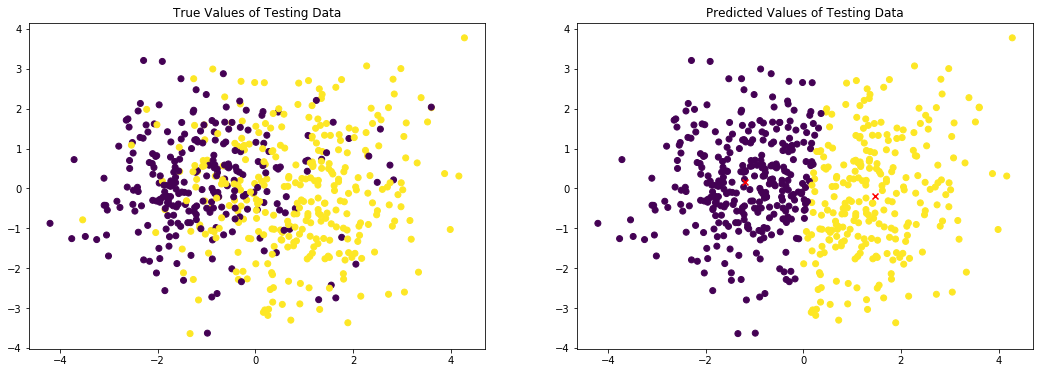

In [6]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each data in sample data set
test_predict = km_model.fit_predict(X_test_pca_d)
cluster_center = km_model.cluster_centers_

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)

#true values plot
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.scatter(X_test_pca_d[:,0],X_test_pca_d[:,1],c = y_test)
plt.title('True Values of Testing Data')

#predicted values plot
reduced_data = PCA(n_components=2).fit_transform(X_train)
plt.subplot(1,2,2)
plt.scatter(X_test_pca_d[:,0],X_test_pca_d[:,1],c = test_predict)
plt.scatter(cluster_center[0][0],cluster_center[0][1],c = 'red',marker="x") 
plt.scatter(cluster_center[1][0],cluster_center[1][1],c = 'red',marker="x")
plt.title('Predicted Values of Testing Data')
plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [7]:
###################begin code for Task 1-b-4: Print out a confusion matrix
print('Confusion Matrix Using Kmeans For Clusterring the Data\n')
print(confusion_matrix(y_test,test_predict))

###################end code for Task 1-b-4

Confusion Matrix Using Kmeans For Clusterring the Data

[[213  38]
 [101 214]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [8]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score
dict_scores = {}

## for cosine

## Calculate pairwise distance matrix for X_train for cosine
pair_cos = pairwise_distances(X_train, metric = 'cosine')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cosine_complete = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage = 'complete')
cos_predict = cosine_complete.fit_predict(pair_cos)
f1_cos = f1_score(y_train, cos_predict)
dict_scores.update({'Complete_cosine':f1_cos})
## average linkage + cosine
cosine_avg = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage = 'average')
cos_predict_avg = cosine_avg.fit_predict(pair_cos)
f1_cos_avg = f1_score(y_train, cos_predict_avg)
dict_scores.update({'Average_cosine':f1_cos_avg})


## for euclidean

## Calculate pairwise distance matrix for X_train for euclidean
pair_euc = pairwise_distances(X_train, metric = 'euclidean')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euc_complete = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
euc_predict = euc_complete.fit_predict(pair_euc)
f1_euc = f1_score(y_train, euc_predict)
dict_scores.update({'Complete_euclidean':f1_euc})
## average linkage + euclidean
euc_avg = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
euc_predict_avg = euc_avg.fit_predict(pair_euc)
f1_euc_avg = f1_score(y_train, euc_predict_avg)
dict_scores.update({'Average_euclidean':f1_euc_avg})


## for manhattan

## Calculate pairwise distance matrix for X_train for manhattan
pair_man = pairwise_distances(X_train, metric = 'manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
man_complete = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage = 'complete')
man_predict = man_complete.fit_predict(pair_man)
f1_man = f1_score(y_train, man_predict)
dict_scores.update({'Complete_manhattan':f1_man})
## average linkage + manhattan
man_avg = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage = 'average')
man_predict_avg = man_avg.fit_predict(pair_man)
f1_man_avg = f1_score(y_train, man_predict_avg)
dict_scores.update({'Average_manhattan':f1_man_avg})


print("F1-score for complete linkage + cosine is:", f1_cos)
print("F1-score for complete linkage + euclidean is:", f1_euc)
print("F1-score for complete linkage + manhattan is:", f1_man)
print("F1-score for average linkage + cosine is:", f1_cos_avg)
print("F1-score for average linkage + euclidean is:", f1_euc_avg)
print("F1-score for average linkage + manhattan is:", f1_man_avg)
###################end code for Task 2-a

F1-score for complete linkage + cosine is: 0.7785817655571635
F1-score for complete linkage + euclidean is: 0.21640903686087992
F1-score for complete linkage + manhattan is: 0.14668218859138532
F1-score for average linkage + cosine is: 0.7517509727626459
F1-score for average linkage + euclidean is: 0.6032786885245901
F1-score for average linkage + manhattan is: 0.0


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

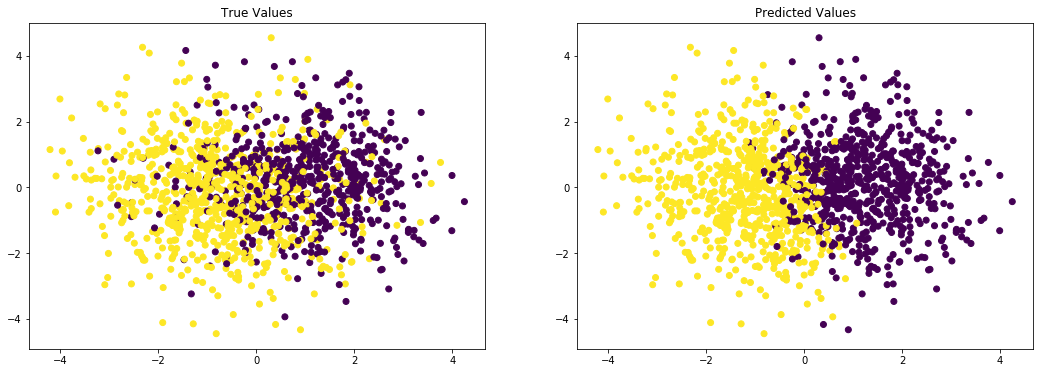

In [9]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
#take the best predicted model ex: cosine and complete
inverse = [(value, key) for key, value in dict_scores.items()]
pair_aglo = pairwise_distances(X_train, metric=max(inverse)[1].split('_')[1].lower())
#affinity - model and linkage - complete or avg
cluster_fit = AgglomerativeClustering(n_clusters = 2,affinity = max(inverse)[1].split('_')[1].lower(),linkage =  max(inverse)[1].split('_')[0].lower())
best_predict = cluster_fit.fit_predict(pair_aglo)

# Visualize the predicted training labels versus actual training labels. 
# true values
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.scatter(X_train_pca_d[:,0],X_train_pca_d[:,1],c = y_train)
plt.title('True Values')

#predicted values after training
plt.subplot(1,2,2)
plt.scatter(X_train_pca_d[:,0],X_train_pca_d[:,1],c = best_predict)
plt.title('Predicted Values')
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

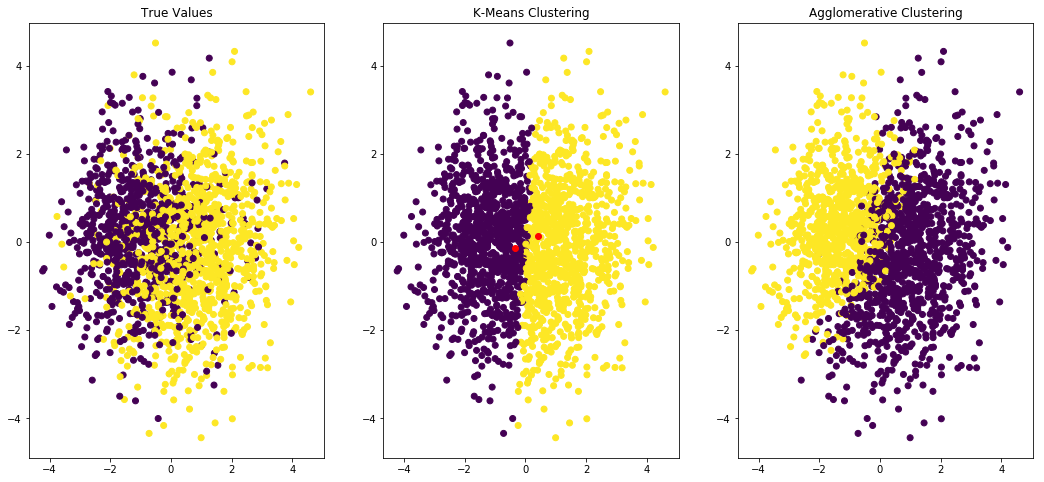

In [10]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
km_model = KMeans(n_clusters = 2)
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeans_predict = km_model.fit_predict(X)
cluster_center = km_model.cluster_centers_
### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pair_aglo = pairwise_distances(X, metric=max(inverse)[1].split('_')[1].lower())
#pairwise_distance = X
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
#print(max(inverse)[1].split('_')[1].lower(),max(inverse)[1].split('_')[0].lower())
cluster_fit = AgglomerativeClustering(n_clusters = 2,affinity = max(inverse)[1].split('_')[1].lower(),linkage =  max(inverse)[1].split('_')[0].lower())
best_predict_aglo = cluster_fit.fit_predict(pair_aglo)

### Visualize Clusters
#  Model and fit the data to the PCA model
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.figure(figsize = (18,8))
#true values plotting
plt.subplot(1,3,1).title.set_text('True Values')
plt.scatter(X[:,0],X[:,1],c = y)
#k means cluster plotting
plt.subplot(1,3,2).title.set_text('K-Means Clustering')
plt.scatter(X[:,0],X[:,1],c = kmeans_predict)
plt.scatter(cluster_center[0][0],cluster_center[0][1],c = 'red') 
plt.scatter(cluster_center[1][0],cluster_center[1][1],c = 'red')
#agglomerative cluster planning
plt.subplot(1,3,3).title.set_text('Agglomerative Clustering')
plt.scatter(X[:,0],X[:,1],c = best_predict_aglo)

plt.show()
###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [12]:
###################begin code for Task 3-b
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('Confusion Matrix Using Kmeans Clustering')
print(confusion_matrix(y,kmeans_predict))
print('\n')
print('Classification Report using kmeans Clustering')
print(classification_report(y,kmeans_predict))
print('\n')
print('Confusion Matrix Using Aglomerative Clustering')
print(confusion_matrix(y,best_predict_aglo))
print('\n')
print('Classification Report using Aglomerative Clustering')
print(classification_report(y,best_predict_aglo))
print('\n\n')
print("Reasoning: Before comparing, we would just like to know about both k means and agglomerative working in few words. After research I found out that k-means cluster the data into 0 and 1 and categorize them accordingly in terms of distance from centroid, whereas agglomerative clusters the data in a hierarchy (choosing the best one at each step). Now, let's talk out comparison, after comparing results generated from both k-means clustering and hierarchical agglomerative clustering with the help and understanding through confusion matrices, I able to find out that k-means provides the better result compared to agglomerative model. Also, K-means is able to handle large data, whereas agglomerative cannot, because time complexity of k-means is O(n) while time complexity of agglomerative is O(n^2) ")
###################end code for Task 3-b

Confusion Matrix Using Kmeans Clustering
[[683 157]
 [272 773]]


Classification Report using kmeans Clustering
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       840
           1       0.83      0.74      0.78      1045

   micro avg       0.77      0.77      0.77      1885
   macro avg       0.77      0.78      0.77      1885
weighted avg       0.78      0.77      0.77      1885



Confusion Matrix Using Aglomerative Clustering
[[237 603]
 [833 212]]


Classification Report using Aglomerative Clustering
              precision    recall  f1-score   support

           0       0.22      0.28      0.25       840
           1       0.26      0.20      0.23      1045

   micro avg       0.24      0.24      0.24      1885
   macro avg       0.24      0.24      0.24      1885
weighted avg       0.24      0.24      0.24      1885




Reasoning: Before comparing, we would just like to know about both k means and agglomerative working in f

#  Refrences

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://pythonprogramminglanguage.com/kmeans-elbow-method/

http://www.sthda.com/english/wiki/print.php?id=239

https://www.youtube.com/watch?v=XJ3194AmH40

https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733550?start=735

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

https://pythonprogramminglanguage.com/kmeans-elbow-method/

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points